# FRM Level 1 Valuation & Risk Models

## Imports

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import yfinance as yf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.patches as patches
import networkx as nx

# Measures of Financial Risk

### Value at Risk (VaR)

**Value at Risk (VaR) Quick Overview**

- **What is VaR?**
  - Measures potential maximum loss on an investment.

- **How?**
  - Estimates the worst-case scenario with a confidence level (e.g., 95%).

- **Example: Spending Budget**
  - Like planning not to exceed $50 for the week but acknowledging a small chance of going over.

- **Expression**
  - Usually a percentage (e.g., 5%) over a specific time frame (e.g., one day).

- **Purpose**
  - Helps investors and businesses understand and manage risks.

VaR is a quick way to gauge possible losses and make smarter financial decisions.

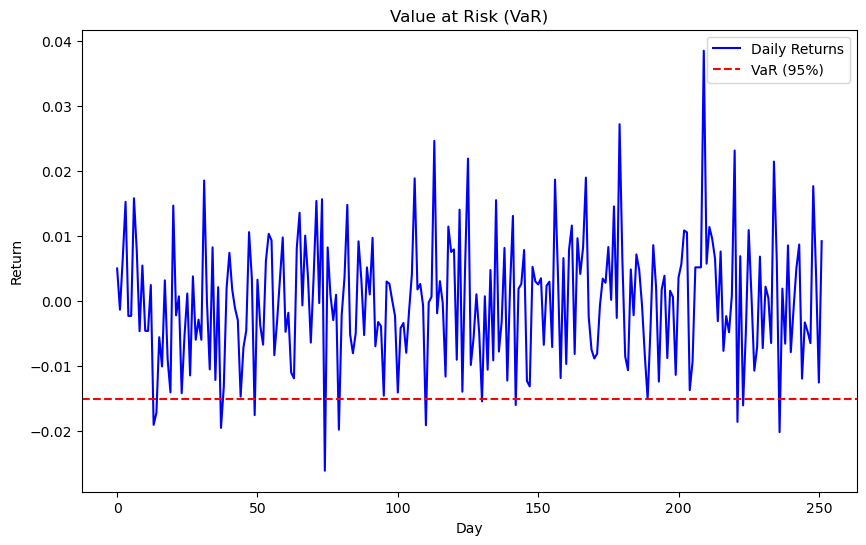

In [197]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    returns_sorted = np.sort(returns)
    var_index = int((1 - confidence_level) * len(returns))
    var = -returns_sorted[var_index]
    return var

# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate VaR at 95% confidence level
var_95 = calculate_var(daily_returns, confidence_level=0.95)

# Visualize the daily returns and highlight VaR
plt.figure(figsize=(10, 6))

plt.plot(daily_returns, label='Daily Returns', color='blue')
plt.axhline(-var_95, linestyle='--', color='red', label='VaR (95%)')

plt.title('Value at Risk (VaR)')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()

### Standard Deviation

**Standard Deviation Unpacked**

- **What is Standard Deviation?**
  - It measures how spread out or clustered data points are in a set.

- **Spread of Data**
  - Indicates if values tend to stay close to the average or vary widely.

- **Example: Test Scores**
  - If everyone's test scores are close to the average, the standard deviation is low. If scores vary a lot, it's high.

- **Calculation**
  - It involves looking at how each data point differs from the mean (average).

- **Use in Finance**
  - Investors use it to understand the volatility or risk associated with an investment.

- **In a Nutshell**
  - Low standard deviation means more predictability, high means more uncertainty.

Understanding standard deviation helps make sense of how consistent or unpredictable values are in a set.

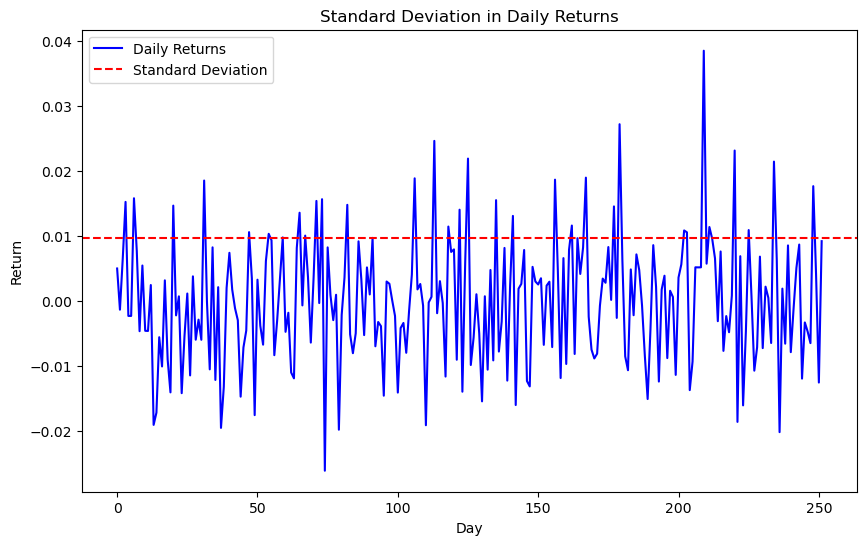

In [198]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate and visualize standard deviation
def calculate_and_visualize_std_deviation(returns):
    std_deviation = np.std(returns)
    
    # Visualize the daily returns and standard deviation
    plt.figure(figsize=(10, 6))
    plt.plot(returns, label='Daily Returns', color='blue')
    plt.axhline(std_deviation, linestyle='--', color='red', label='Standard Deviation')
    
    plt.title('Standard Deviation in Daily Returns')
    plt.xlabel('Day')
    plt.ylabel('Return')
    plt.legend()
    plt.show()
    
# Generate sample daily returns data for an asset
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate and visualize Standard Deviation
calculate_and_visualize_std_deviation(daily_returns)


### Beta

**Beta Breakdown**

- **What is Beta?**
  - Beta measures how much a stock's price tends to move in relation to the overall market.

- **Relation to Market Movement**
  - A Beta of 1 means the stock moves in sync with the market. Below 1 is less volatile, above 1 is more volatile.

- **Example: Dance Partners**
  - If the market takes one step forward, a Beta of 1 means the stock takes one step. A Beta of 1.5 means it takes a step and a half.

- **Interpretation**
  - A negative Beta suggests the stock moves opposite to the market, offering potential diversification.

- **Risk and Return**
  - High Beta stocks can bring higher returns but also higher risk, and vice versa.

- **Decision Tool**
  - Investors use Beta to understand how a stock might behave and make informed choices.

In essence, Beta is like a dance partner indicating how closely a stock follows the market's moves.

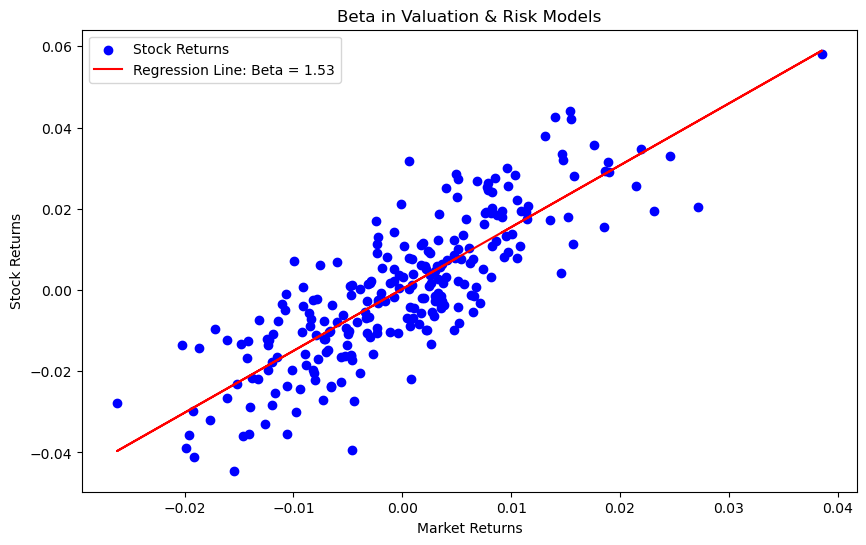

In [199]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate and visualize Beta
def calculate_and_visualize_beta(returns_market, returns_stock):
    # Calculate the covariance matrix
    covariance_matrix = np.cov(returns_market, returns_stock)
    
    # Calculate Beta
    beta = covariance_matrix[0, 1] / np.var(returns_market)
    
    # Visualize the market returns and stock returns
    plt.figure(figsize=(10, 6))
    plt.scatter(returns_market, returns_stock, color='blue', label='Stock Returns')
    
    # Plot the regression line
    regression_line = np.polyval(np.polyfit(returns_market, returns_stock, 1), returns_market)
    plt.plot(returns_market, regression_line, color='red', label=f'Regression Line: Beta = {beta:.2f}')
    
    plt.title('Beta in Valuation & Risk Models')
    plt.xlabel('Market Returns')
    plt.ylabel('Stock Returns')
    plt.legend()
    plt.show()
    
# Generate sample daily returns data for a market and a stock
np.random.seed(42)
returns_market = np.random.normal(0, 0.01, 252)
returns_stock = 1.5 * returns_market + np.random.normal(0, 0.01, 252)

# Calculate and visualize Beta
calculate_and_visualize_beta(returns_market, returns_stock)


### Correlation

**Correlation Unveiled**

- **What is Correlation?**
  - Correlation measures how two sets of data move in relation to each other.

- **Scale of Relationship**
  - Ranges from -1 to 1. 
    - 1 means a perfect positive correlation (both go up or down together).
    - -1 means a perfect negative correlation (one goes up, the other down).
    - 0 means no linear correlation.

- **Example: Weather and Ice Cream Sales**
  - Positive correlation: as the weather gets hotter, ice cream sales go up.
  - Negative correlation: as the price of a product goes up, the demand might go down.

- **Interpretation**
  - Helps understand how changes in one variable might predict changes in another.

- **Investment Strategy**
  - Investors use correlation to diversify portfolios, choosing assets that don't move in lockstep.

- **Simplicity Check**
  - 0.8 or higher is considered a strong correlation.

In simple terms, correlation is a measure of how two things move together or apart.

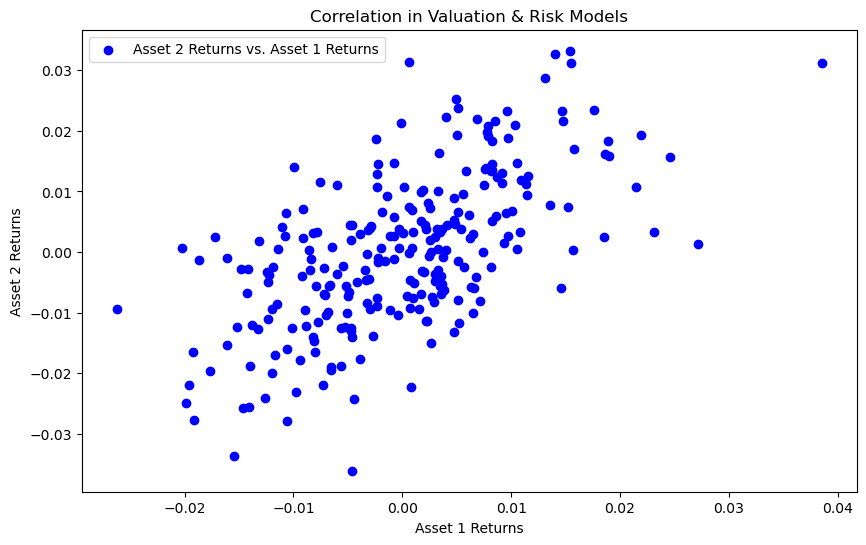

In [200]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate and visualize correlation
def calculate_and_visualize_correlation(returns_asset1, returns_asset2):
    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(returns_asset1, returns_asset2)[0, 1]
    
    # Visualize the returns of both assets
    plt.figure(figsize=(10, 6))
    plt.scatter(returns_asset1, returns_asset2, color='blue', label='Asset 2 Returns vs. Asset 1 Returns')
    
    plt.title('Correlation in Valuation & Risk Models')
    plt.xlabel('Asset 1 Returns')
    plt.ylabel('Asset 2 Returns')
    plt.legend()
    plt.show()
    
# Generate sample daily returns data for two assets
np.random.seed(42)
returns_asset1 = np.random.normal(0, 0.01, 252)
returns_asset2 = 0.8 * returns_asset1 + np.random.normal(0, 0.01, 252)

# Calculate and visualize Correlation
calculate_and_visualize_correlation(returns_asset1, returns_asset2)


### Covariance

**Covariance Unraveled**

- **What is Covariance?**
  - Covariance measures how much two variables change together.

- **Direction of Change**
  - Positive covariance: both variables increase or decrease together.
  - Negative covariance: one increases as the other decreases.

- **Scale Independence**
  - Unlike correlation, covariance doesn't have a standardized scale. The magnitude of the covariance isn't easily interpretable.

- **Example: Rainfall and Umbrella Sales**
  - Positive covariance: when rainfall is high, umbrella sales tend to increase.
  - Negative covariance: on sunny days, umbrella sales might decrease.

- **Investment Insight**
  - In finance, it helps understand how different assets move in relation to each other.

- **Cautions**
  - High covariance doesn't imply causation; variables might change together for various reasons.

Covariance is a tool for spotting how two variables move in sync, regardless of the scale.

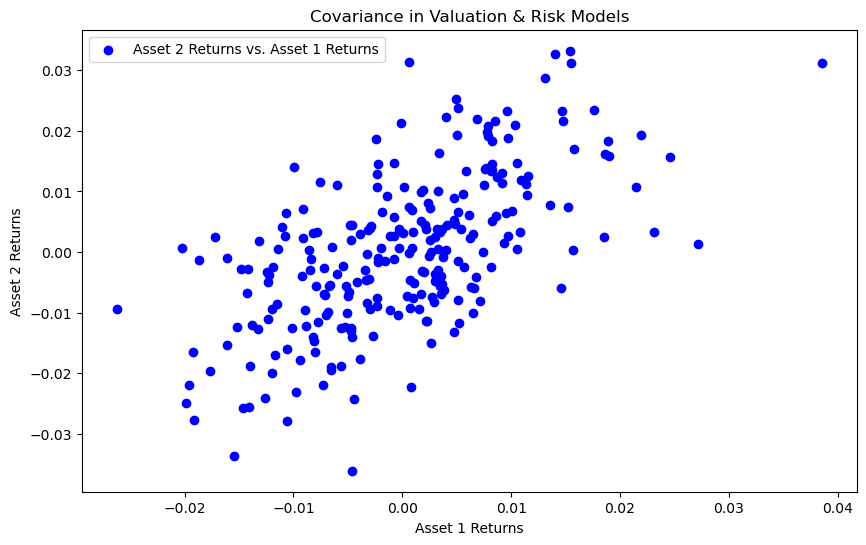

In [201]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate and visualize covariance
def calculate_and_visualize_covariance(returns_asset1, returns_asset2):
    # Calculate the covariance matrix
    covariance_matrix = np.cov(returns_asset1, returns_asset2)
    
    # Visualize the returns of both assets
    plt.figure(figsize=(10, 6))
    plt.scatter(returns_asset1, returns_asset2, color='blue', label='Asset 2 Returns vs. Asset 1 Returns')
    
    plt.title('Covariance in Valuation & Risk Models')
    plt.xlabel('Asset 1 Returns')
    plt.ylabel('Asset 2 Returns')
    plt.legend()
    plt.show()
    
# Generate sample daily returns data for two assets
np.random.seed(42)
returns_asset1 = np.random.normal(0, 0.01, 252)
returns_asset2 = 0.8 * returns_asset1 + np.random.normal(0, 0.01, 252)

# Calculate and visualize Covariance
calculate_and_visualize_covariance(returns_asset1, returns_asset2)

# Calculating & Applying VaR

### Calculating Value at Risk (VaR)

**Calculating Value at Risk (VaR)**

- **Start with Portfolio Value**
  - VaR begins with the total value of your investment portfolio.

- **Choose a Confidence Level**
  - Decide how confident you want to be in your prediction (e.g., 95%).

- **Select a Time Horizon**
  - Determine the time frame for which you're estimating risk (e.g., one day).

- **Calculate Portfolio Returns**
  - Analyze historical data or use statistical models to estimate potential returns for your portfolio.

- **Order Returns**
  - Arrange returns from worst to best, forming a return distribution.

- **Identify VaR Threshold**
  - Locate the return level at which your confidence level is met (e.g., the 5th percentile for 95% confidence).

- **Calculate VaR**
  - The VaR is the negative value at the VaR threshold. It represents the potential maximum loss.

- **Example: $100,000 Portfolio, 95% Confidence, One Day**
  - If the 5th percentile return is -2%, the VaR would be $2,000 (2% of $100,000).

VaR provides a numerical estimate of the maximum expected loss, helping investors gauge and manage risk.

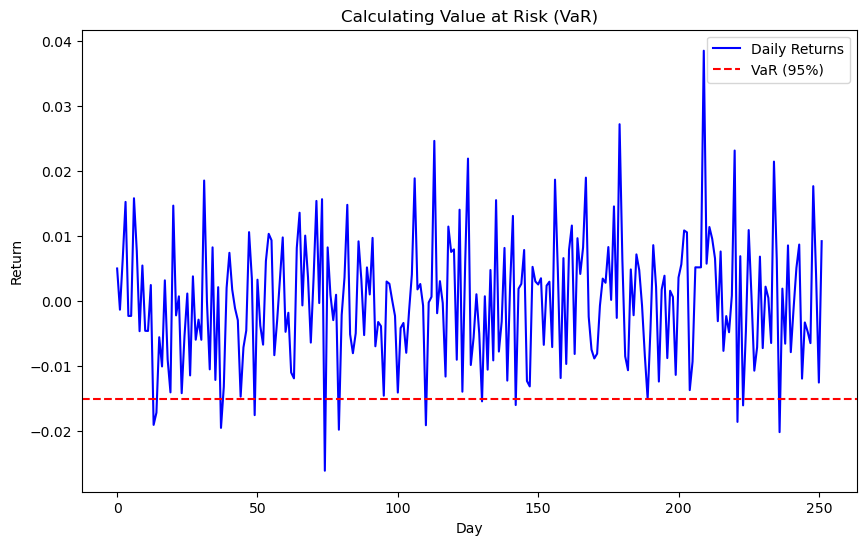

In [202]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate VaR
def calculate_var(returns, confidence_level=0.95):
    returns_sorted = np.sort(returns)
    var_index = int((1 - confidence_level) * len(returns))
    var = -returns_sorted[var_index]
    return var

# Generate sample daily returns data for a portfolio
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate VaR at 95% confidence level
var_95 = calculate_var(daily_returns, confidence_level=0.95)

# Visualize the daily returns and highlight VaR
plt.figure(figsize=(10, 6))
plt.plot(daily_returns, label='Daily Returns', color='blue')
plt.axhline(-var_95, linestyle='--', color='red', label='VaR (95%)')

plt.title('Calculating Value at Risk (VaR)')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()

### Pick a Time Horizon

**Picking a Time Horizon in VaR**

- **Defining Time Horizon**
  - The time horizon in VaR is the period over which you're estimating potential losses.

- **Short-Term vs. Long-Term**
  - Short-term VaR (e.g., one day) focuses on immediate risks, reflecting market changes.
  - Long-term VaR (e.g., one month or one year) considers more extended trends and potential structural shifts.

- **Consideration Factors**
  - Investor goals, liquidity needs, and the nature of the investment influence the choice of time horizon.

- **Example: Day Traders vs. Long-Term Investors**
  - Day traders might use daily VaR to assess daily risks, while long-term investors may prefer monthly or yearly VaR for strategic planning.

- **Dynamic Nature**
  - VaR is dynamic; the chosen time horizon should align with the investment strategy and the frequency of portfolio assessment.

Choosing the right time horizon in VaR is about matching the estimation period with the nature and goals of the investment.

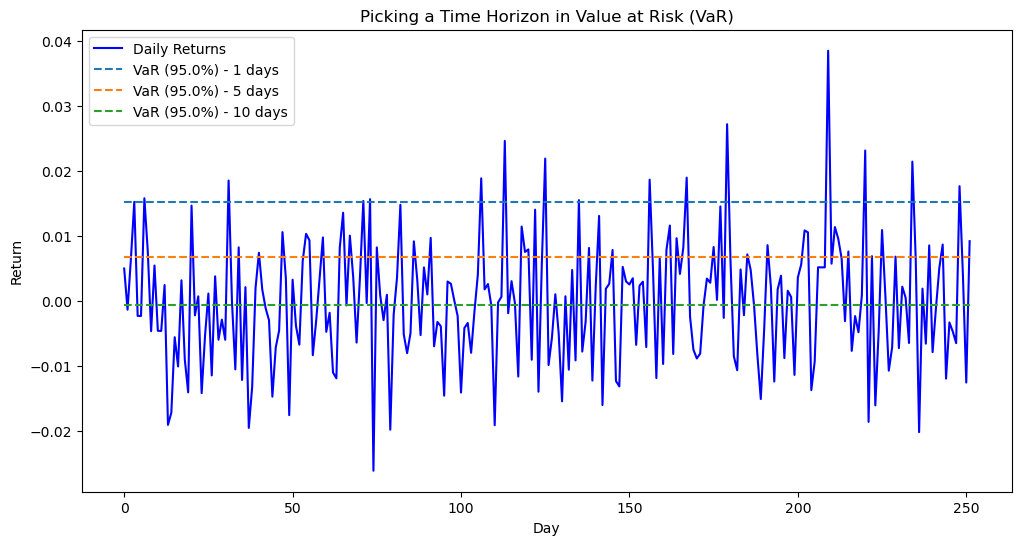

In [203]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate VaR with different time horizons
def calculate_var_with_horizons(returns, confidence_level=0.95, horizons=[1, 5, 10]):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    for horizon in horizons:
        var_index = int((1 - confidence_level) * len(returns) * horizon)
        var = -returns_sorted[var_index]
        var_results[f'VaR ({confidence_level * 100}%) - {horizon} days'] = [var] * len(returns)
    
    return pd.DataFrame(var_results)

# Generate sample daily returns data for a portfolio
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate VaR with different time horizons
var_results = calculate_var_with_horizons(daily_returns)

# Visualize the daily returns and highlight VaR with different time horizons
plt.figure(figsize=(12, 6))
plt.plot(daily_returns, label='Daily Returns', color='blue')

for column in var_results.columns:
    plt.plot(var_results[column], linestyle='--', label=column)

plt.title('Picking a Time Horizon in Value at Risk (VaR)')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()

### Choose a Confidence Level

**Choosing a Confidence Level in VaR**

- **Defining Confidence Level**
  - The confidence level in VaR represents the probability that actual losses will not exceed the estimated VaR.

- **Common Levels**
  - Common choices include 90%, 95%, and 99%. The higher the confidence level, the wider the range of potential outcomes.

- **Risk Tolerance**
  - Consider your risk tolerance and the consequences of being wrong. Higher confidence levels provide a narrower estimate but might be overly conservative.

- **Example: 95% Confidence**
  - If you choose 95% confidence, you're saying, "I'm 95% sure that my losses won't exceed this amount."

- **Tailoring to Purpose**
  - Short-term traders may opt for higher confidence levels for precision, while long-term investors might balance precision with flexibility.

- **Flexibility**
  - The confidence level can be adjusted based on market conditions, regulatory requirements, or changes in risk appetite.

Choosing a confidence level is a crucial step in customizing VaR to align with your risk tolerance and the specific needs of your investment strategy.

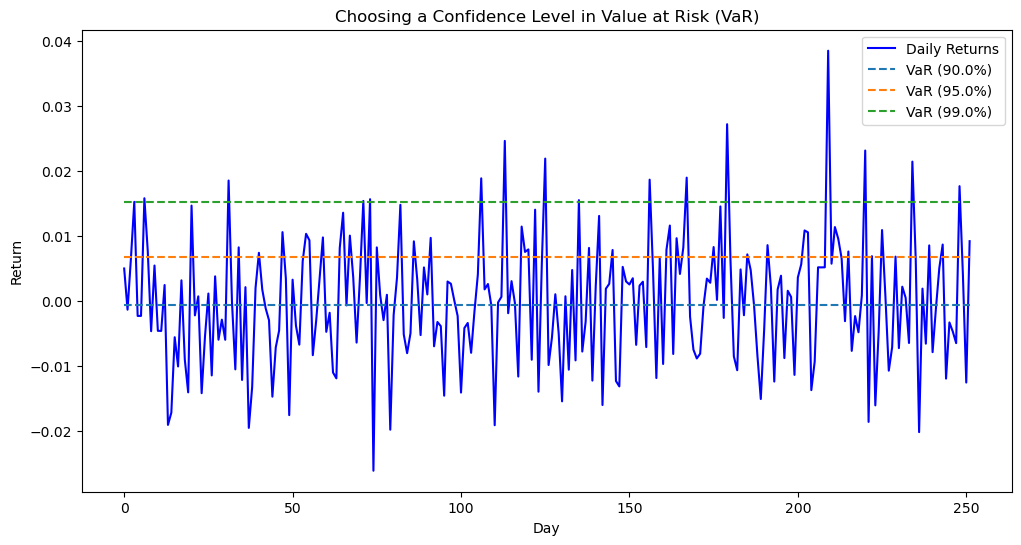

In [204]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate VaR with different confidence levels
def calculate_var_with_confidence_levels(returns, confidence_levels=[0.90, 0.95, 0.99], horizon=5):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    for confidence_level in confidence_levels:
        var_index = int((1 - confidence_level) * len(returns) * horizon)
        var = -returns_sorted[var_index]
        var_results[f'VaR ({confidence_level * 100}%)'] = [var] * len(returns)
    
    return pd.DataFrame(var_results)

# Generate sample daily returns data for a portfolio
np.random.seed(42)
daily_returns = np.random.normal(0, 0.01, 252)  # 252 trading days in a year

# Calculate VaR with different confidence levels
var_results = calculate_var_with_confidence_levels(daily_returns)

# Visualize the daily returns and highlight VaR with different confidence levels
plt.figure(figsize=(12, 6))
plt.plot(daily_returns, label='Daily Returns', color='blue')

for column in var_results.columns:
    plt.plot(var_results[column], linestyle='--', label=column)

plt.title('Choosing a Confidence Level in Value at Risk (VaR)')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()

### Gather Historial Data

**Gathering Historical Data for VaR**

- **Data Scope**
  - Collect historical data relevant to the assets or portfolio under consideration. This could include daily, weekly, or monthly returns.

- **Market Conditions**
  - Ensure the data covers various market conditions, including both stable and volatile periods.

- **Quality Check**
  - Verify the accuracy and consistency of the data. Flawed or incomplete data can lead to unreliable VaR estimates.

- **Consider Time Horizon**
  - Align the historical data with the chosen time horizon for VaR calculation. If estimating one-day VaR, focus on daily returns.

- **Example: Stock Prices**
  - For stocks, gather historical daily closing prices. Calculate daily returns by comparing the current day's closing price with the previous day's.

- **Statistical Methods**
  - Use statistical methods such as mean and standard deviation to summarize the historical data and understand the distribution of returns.

- **Update Regularly**
  - Keep historical data up-to-date to ensure VaR estimates remain relevant in evolving market conditions.

Gathering accurate and comprehensive historical data is essential for building a reliable foundation for VaR calculations.

[*********************100%***********************]  1 of 1 completed


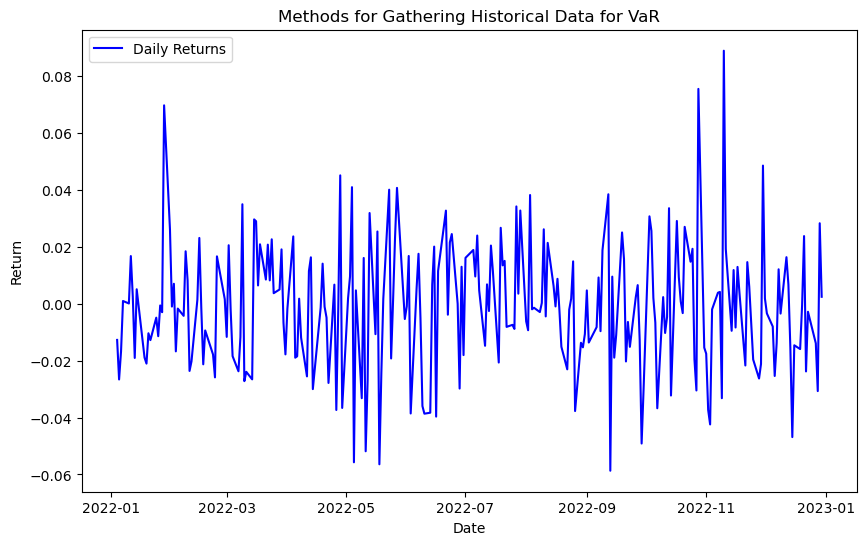

In [205]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(daily_returns, label='Daily Returns', color='blue')
    
    plt.title('Methods for Gathering Historical Data for VaR')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Calculate and visualize daily returns
calculate_and_visualize_returns(historical_prices)


### Calculate Volatility

**Calculating Volatility for VaR**

- **Definition**
  - Volatility measures the degree of variation of a trading price series over time.

- **Formula**
  - Calculate daily returns from historical data.
  - Compute the standard deviation of these returns.

- **Example Formula:**
  - Volatility = Standard Deviation of Daily Returns

- **Interpretation**
  - High volatility implies higher risk, as prices are more likely to change dramatically.
  - Low volatility suggests a more stable market.

- **Time Frame**
  - Align the calculation with the chosen time horizon for VaR. If estimating one-day VaR, use daily returns.

- **Risk Assessment**
  - Investors use volatility to gauge the potential range of price movements and incorporate it into VaR calculations.

- **Real-world Considerations**
  - Consider the impact of extreme events or outliers that may influence volatility.

Calculating volatility is a key step in estimating VaR, helping investors understand and manage the risk associated with their investments.

[*********************100%***********************]  1 of 1 completed


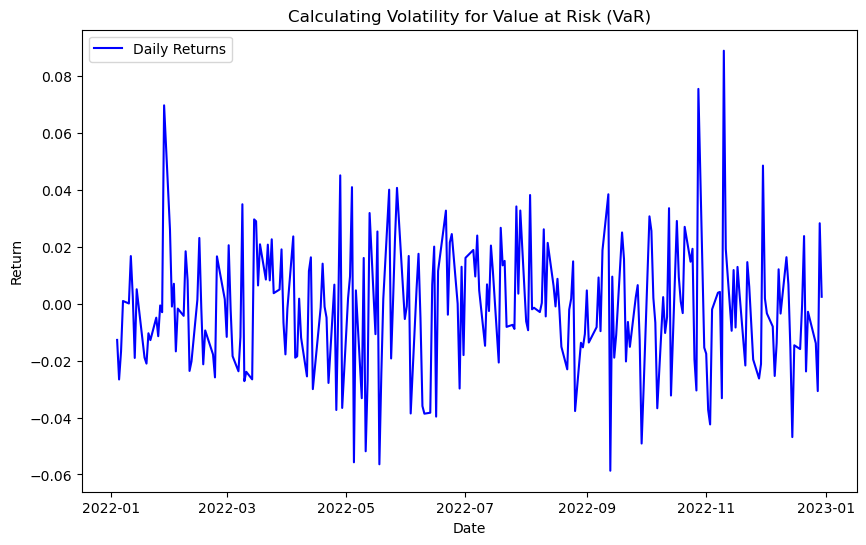

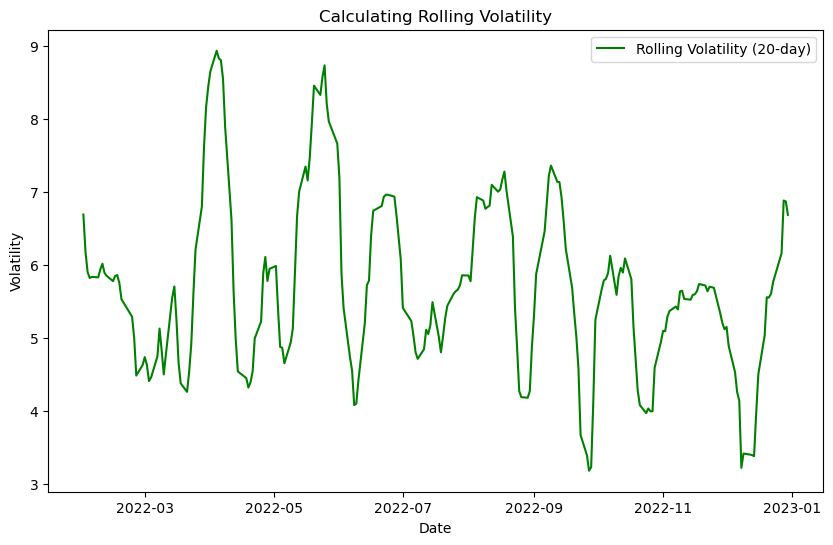

     VaR (95.0%)
0       19.52139
1       19.52139
2       19.52139
3       19.52139
4       19.52139
..           ...
246     19.52139
247     19.52139
248     19.52139
249     19.52139
250     19.52139

[251 rows x 1 columns]


In [206]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(daily_returns, label='Daily Returns', color='blue')
    
    plt.title('Calculating Volatility for Value at Risk (VaR)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Function to calculate and visualize volatility
def calculate_and_visualize_volatility(returns, window=20):
    rolling_volatility = returns.rolling(window=window).std()

    # Visualize the rolling volatility
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_volatility, label=f'Rolling Volatility ({window}-day)', color='green')
    
    plt.title('Calculating Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

# Function to calculate VaR using volatility
def calculate_var_with_volatility(returns, confidence_level=0.95, horizon=5):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    # Calculate volatility
    volatility = returns.std()
    
    # Calculate VaR
    var = -volatility * np.percentile(np.random.normal(0, 1, len(returns) * horizon), 100 * (1 - confidence_level))
    var_results[f'VaR ({confidence_level * 100}%)'] = [var] * len(returns)
    
    return pd.DataFrame(var_results)

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Calculate and visualize daily returns
calculate_and_visualize_returns(historical_prices)

# Calculate and visualize rolling volatility
calculate_and_visualize_volatility(historical_prices)

# Calculate VaR using volatility
var_results = calculate_var_with_volatility(historical_prices)
print(var_results)


### Multiply Volatility by a Zscore

**Multiplying by a Z Score in VaR**

- **Introduction to Z Score**
  - A Z score indicates how many standard deviations a data point is from the mean. It's a measure of how unusual or extreme a particular observation is.

- **Using Z Score in VaR**
  - Multiply the calculated volatility by the Z score corresponding to the chosen confidence level.

- **Formula:**
  - VaR = Volatility * Z Score

- **Example:**
  - If volatility is 2% and the Z score for 95% confidence is 1.645, then VaR = 2% * 1.645 = 3.29%.

- **Interpretation**
  - The Z score adjusts the volatility to capture the desired level of confidence in the VaR estimate.

- **Risk Appetite**
  - Investors can adjust the Z score based on their risk appetite. A higher Z score results in a wider VaR estimate, indicating more conservative risk management.

- **Real-world Application**
  - This step ensures that the VaR estimate reflects the chosen confidence level and provides a margin of safety in risk assessment.

Multiplying by a Z score tailors the VaR estimate to the specified confidence level, allowing for a more customized risk assessment.

[*********************100%***********************]  1 of 1 completed


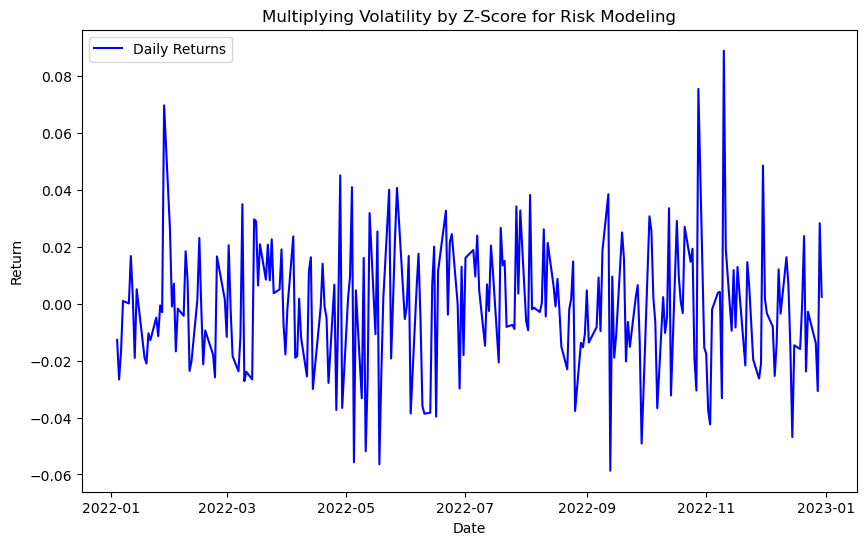

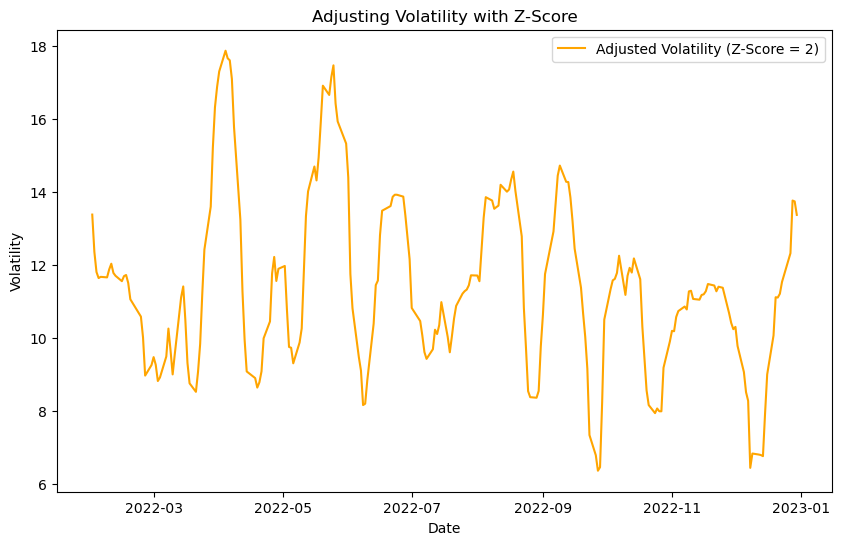

In [207]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(daily_returns, label='Daily Returns', color='blue')
    
    plt.title('Multiplying Volatility by Z-Score for Risk Modeling')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Function to calculate and visualize adjusted volatility
def calculate_and_visualize_adjusted_volatility(returns, z_score=2):
    adjusted_volatility = returns.rolling(window=20).std() * z_score

    # Visualize the adjusted volatility
    plt.figure(figsize=(10, 6))
    plt.plot(adjusted_volatility, label=f'Adjusted Volatility (Z-Score = {z_score})', color='orange')
    
    plt.title('Adjusting Volatility with Z-Score')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()
    
# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Calculate and visualize daily returns
calculate_and_visualize_returns(historical_prices)

# Calculate and visualize adjusted volatility
calculate_and_visualize_adjusted_volatility(historical_prices)


### Compare VaR Across Investments

**Comparing VaR Across Investments**

- **Standardized Metric**
  - VaR provides a standardized metric to assess and compare the potential risk across different investments.

- **Consistent Time Horizons**
  - Ensure that VaR calculations for various investments use consistent time horizons for accurate comparison. This could be daily, weekly, or another chosen period.

- **Interpreting VaR Values**
  - A lower VaR indicates less expected risk, while a higher VaR suggests a riskier investment.

- **Consideration of Asset Types**
  - Different asset classes may have inherently different levels of risk. For example, stocks generally have higher VaR than bonds.

- **Diversification Impact**
  - Assess how combining different investments in a portfolio affects overall VaR. Diversification can potentially reduce overall portfolio risk.

- **Tailoring to Investment Goals**
  - Customize VaR comparisons based on specific investment goals and risk tolerance.

- **Scenario Analysis**
  - Conduct scenario analysis to understand how changes in market conditions or economic factors may impact VaR across various investments.

- **Continuous Monitoring**
  - Regularly monitor and update VaR estimates as market conditions and investment landscapes evolve.

Comparing VaR across investments is crucial for constructing a well-balanced and risk-aware portfolio tailored to individual investment objectives.

Investment       VaR
0    Stock A -0.086652
1    Stock B -0.064939
2    Stock C -0.108365

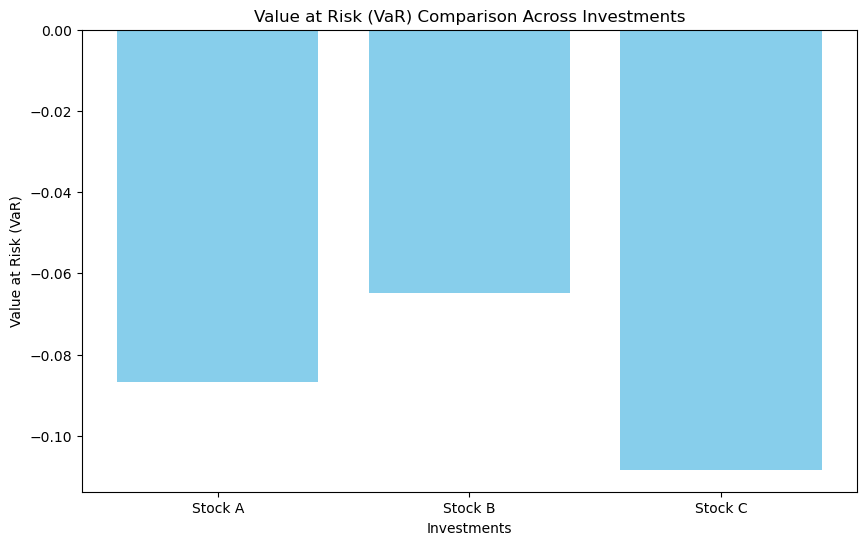

In [208]:
# Function to calculate Value at Risk (VaR)
def calculate_var(mean, std_dev, confidence_level, holding_period):
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    var = mean - z_score * std_dev * np.sqrt(holding_period)
    return var

# Function to visualize VaR comparison
def plot_var_comparison(investments, var_values):
    plt.figure(figsize=(10, 6))
    plt.bar(investments, var_values, color='skyblue')
    plt.title('Value at Risk (VaR) Comparison Across Investments')
    plt.xlabel('Investments')
    plt.ylabel('Value at Risk (VaR)')
    plt.show()

# Define investments and their parameters
investments = ['Stock A', 'Stock B', 'Stock C']
means = [0.001, 0.0008, 0.0012]  # Expected daily returns
std_devs = [0.02, 0.015, 0.025]  # Daily standard deviations
confidence_level = 0.95
holding_period = 5  # Number of days for the holding period

# Calculate VaR for each investment
var_values = [calculate_var(mean, std_dev, confidence_level, holding_period) for mean, std_dev in zip(means, std_devs)]

# Display VaR values
var_df = pd.DataFrame({'Investment': investments, 'VaR': var_values})
display(var_df)

# Visualize VaR comparison
plot_var_comparison(investments, var_values)

### Setting a Risk Tolerance

**Setting a Risk Tolerance in VaR**

- **Definition**
  - Risk tolerance is the level of uncertainty or potential loss an investor is willing to withstand.

- **Align with Investment Goals**
  - Define risk tolerance based on individual investment goals, financial situation, and time horizon.

- **Link to VaR Confidence Level**
  - Choose a VaR confidence level that aligns with your risk tolerance. Higher confidence levels provide more conservative estimates but may limit returns.

- **Example: Conservative vs. Aggressive**
  - A conservative investor might choose a 99% confidence level, indicating a high degree of certainty in the VaR estimate.
  - An aggressive investor might opt for a 90% confidence level, accepting a wider range of potential outcomes for higher returns.

- **Risk-Return Tradeoff**
  - Understand the tradeoff between risk and return. Higher risk tolerance may allow for riskier investments with potential for higher returns.

- **Regular Assessment**
  - Periodically reassess risk tolerance based on changes in financial situation, goals, or market conditions.

- **Communication**
  - Clearly communicate risk tolerance within investment teams or with financial advisors to ensure alignment in decision-making.

- **Informed Decision-Making**
  - Use VaR as a tool to make informed decisions that align with your established risk tolerance.

Setting a risk tolerance in VaR involves a thoughtful evaluation of personal preferences, financial goals, and the willingness to withstand potential losses in pursuit of investment objectives.

[*********************100%***********************]  1 of 1 completed
## Setting Risk Tolerance in VaR

Setting risk tolerance is crucial when calculating Value at Risk (VaR). In this example:

- We gathered historical stock prices for Apple (AAPL) using the Yahoo Finance API.
- Calculated and visualized daily returns.
- Calculated and visualized VaR with a risk tolerance adjustment of 2%.

The red dashed line represents VaR adjusted for risk tolerance, allowing investors to customize the risk level according to their tolerance.


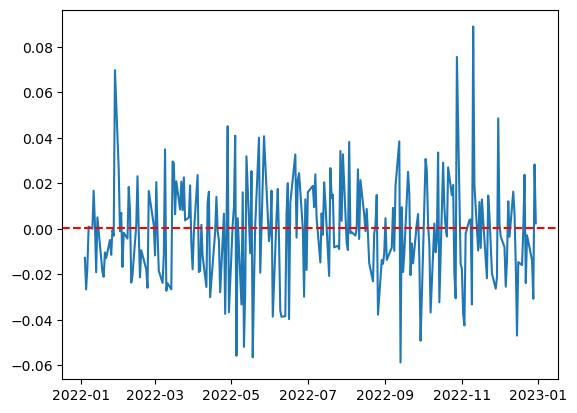

In [209]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices, label):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.plot(daily_returns, label=label)

# Function to calculate and visualize VaR
def calculate_and_visualize_var(returns, label, confidence_level=0.95, horizon=5, risk_tolerance=0.02):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    # Calculate VaR with risk tolerance adjustment
    var = -returns_sorted[int((1 - confidence_level) * len(returns) * horizon)] * risk_tolerance
    var_results[f'VaR {label} ({confidence_level * 100}%, Risk Tolerance={risk_tolerance * 100}%)'] = [var] * len(returns)
    
    # Visualize the VaR with risk tolerance adjustment
    plt.axhline(y=var, color='red', linestyle='--', label=f'VaR {label} (Risk Tolerance={risk_tolerance * 100}%)')

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize daily returns
calculate_and_visualize_returns(historical_prices, label=stock_ticker)

# Visualize daily returns with risk tolerance-adjusted VaR
calculate_and_visualize_var(historical_prices.pct_change().dropna(), label=stock_ticker, risk_tolerance=0.02)

# Display descriptive text
print("## Setting Risk Tolerance in VaR\n\nSetting risk tolerance is crucial when calculating Value at Risk (VaR). In this example:\n\n- We gathered historical stock prices for Apple (AAPL) using the Yahoo Finance API.\n- Calculated and visualized daily returns.\n- Calculated and visualized VaR with a risk tolerance adjustment of 2%.\n\nThe red dashed line represents VaR adjusted for risk tolerance, allowing investors to customize the risk level according to their tolerance.")


### Scenario Analysis

**Scenario Analysis for Risk Management**

- **Definition**
  - Scenario analysis involves assessing how different hypothetical scenarios or events may impact the financial performance of investments.

- **Identifying Key Scenarios**
  - Identify and analyze scenarios that could significantly impact the market or specific investments.

- **Example Scenarios**
  - Economic downturn, sudden market volatility, geopolitical events, or industry-specific changes.

- **Quantifying Impact**
  - Evaluate the potential impact of each scenario on the portfolio's value.

- **Combining with VaR**
  - Scenario analysis complements VaR by providing a more nuanced understanding of specific risk factors beyond statistical measures.

- **Risk Mitigation Strategies**
  - Develop strategies to mitigate risks identified in scenario analysis, such as adjusting asset allocations or implementing hedging instruments.

- **Dynamic Process**
  - Regularly update scenarios based on changing market conditions, economic indicators, or emerging trends.

- **Communication and Decision-Making**
  - Communicate scenario analysis findings to stakeholders, facilitating informed decision-making and risk management discussions.

- **Integration with Stress Testing**
  - Scenario analysis is often integrated with stress testing to evaluate how extreme scenarios might impact the portfolio under severe conditions.

Scenario analysis offers a dynamic and proactive approach to risk management, helping investors anticipate and prepare for a range of potential market scenarios.

[*********************100%***********************]  1 of 1 completed


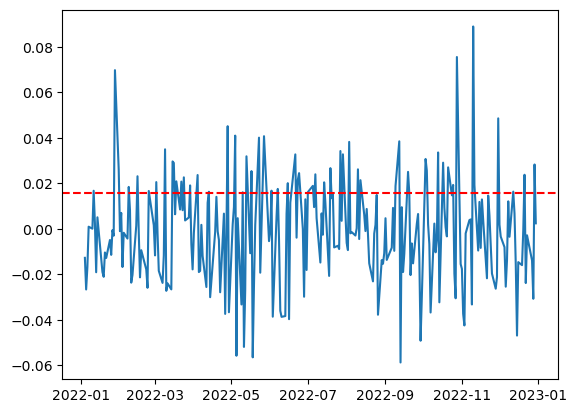

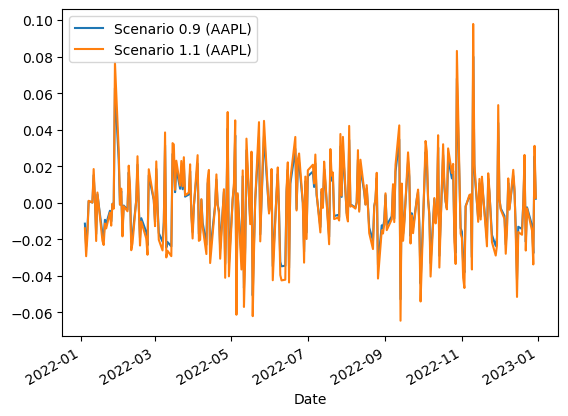

In [210]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices, label):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.plot(daily_returns, label=label)

# Function to calculate and visualize VaR
def calculate_and_visualize_var(returns, label, confidence_level=0.95, horizon=5):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    # Calculate VaR
    var = -returns_sorted[int((1 - confidence_level) * len(returns) * horizon)]
    var_results[f'VaR {label} ({confidence_level * 100}%)'] = [var] * len(returns)
    
    # Visualize the VaR
    plt.axhline(y=var, color='red', linestyle='--', label=f'VaR {label} ({confidence_level * 100}%)')

# Function for scenario analysis
def scenario_analysis(prices, label, scenarios):
    scenario_results = {}
    
    # Calculate returns for each scenario
    for scenario in scenarios:
        scenario_returns = prices.pct_change() * scenario
        scenario_results[f'Scenario {scenario} ({label})'] = scenario_returns
    
    # Visualize scenario returns
    pd.concat(scenario_results, axis=1).plot(legend=True)

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize daily returns
calculate_and_visualize_returns(historical_prices, label=stock_ticker)

# Calculate and visualize VaR
calculate_and_visualize_var(historical_prices.pct_change().dropna(), label=stock_ticker)

# Specify scenarios for scenario analysis
scenarios = [0.9, 1.1]

# Perform and visualize scenario analysis
scenario_analysis(historical_prices, label=stock_ticker, scenarios=scenarios)


### Dynamic Portfolio Management

**Dynamic Portfolio Management in VaR**

- **Adaptability**
  - Dynamic portfolio management involves adjusting the portfolio composition based on changing market conditions and risk assessments.

- **Continuous Monitoring**
  - Regularly monitor VaR and other risk metrics to stay informed about the evolving risk landscape.

- **Rebalancing**
  - Adjust asset allocations, positions, or hedging strategies in response to shifts in market dynamics or changes in VaR estimates.

- **Market Signals**
  - Use VaR as a key indicator for potential portfolio adjustments in response to market signals or emerging trends.

- **Scenario Analysis Integration**
  - Combine VaR with scenario analysis to anticipate and address specific risk scenarios, informing dynamic adjustments to the portfolio.

- **Risk-Return Optimization**
  - Seek an optimal balance between risk and return by dynamically managing the portfolio in line with risk tolerance and investment objectives.

- **Technology and Analytics**
  - Leverage technology and advanced analytics to implement dynamic portfolio management strategies efficiently.

- **Risk Budgeting**
  - Allocate risk budgets to different assets or asset classes, adjusting these allocations based on the evolving risk landscape.

- **Communication and Transparency**
  - Communicate changes in the portfolio strategy, driven by dynamic risk management, to relevant stakeholders.

Dynamic portfolio management enhances the ability to respond to changing market conditions and optimize risk-return profiles, making the investment strategy more adaptive and resilient.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


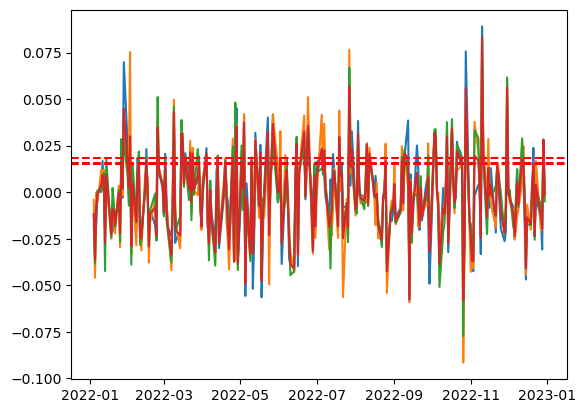

In [211]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily returns
def calculate_and_visualize_returns(prices, label):
    daily_returns = prices.pct_change().dropna()
    
    # Visualize the daily returns
    plt.plot(daily_returns, label=label)

# Function to calculate and visualize VaR
def calculate_and_visualize_var(returns, label, confidence_level=0.95, horizon=5):
    var_results = {}
    returns_sorted = np.sort(returns)
    
    # Calculate VaR
    var = -returns_sorted[int((1 - confidence_level) * len(returns) * horizon)]
    var_results[f'VaR {label} ({confidence_level * 100}%)'] = [var] * len(returns)
    
    # Visualize the VaR
    plt.axhline(y=var, color='red', linestyle='--', label=f'VaR {label} ({confidence_level * 100}%)')

# Function for dynamic portfolio management
def dynamic_portfolio_management(prices_dict, weights_dict, label):
    portfolio_value = pd.DataFrame()
    
    # Calculate daily portfolio returns
    for asset, prices in prices_dict.items():
        portfolio_value[asset] = prices * weights_dict[asset]
    
    portfolio_value['Portfolio'] = portfolio_value.sum(axis=1)
    portfolio_returns = portfolio_value['Portfolio'].pct_change().dropna()
    
    # Visualize dynamic portfolio returns
    plt.plot(portfolio_returns, label=f'{label} Portfolio')

# Specify the stock tickers and date range for the portfolio
portfolio_tickers = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices for each asset in the portfolio
portfolio_prices = {ticker: get_historical_prices(ticker, start_date, end_date) for ticker in portfolio_tickers}

# Visualize daily returns for each asset
for ticker, prices in portfolio_prices.items():
    calculate_and_visualize_returns(prices, label=ticker)

# Calculate and visualize VaR for each asset
for ticker, prices in portfolio_prices.items():
    calculate_and_visualize_var(prices.pct_change().dropna(), label=ticker)

# Specify weights for the assets in the portfolio
portfolio_weights = {'AAPL': 0.4, 'GOOGL': 0.4, 'MSFT': 0.2}

# Perform dynamic portfolio management and visualize the results
dynamic_portfolio_management(portfolio_prices, portfolio_weights, label='Dynamic')


# Measuring and Monitoring Volatility

### Range of Prices

**Range of Prices in Volatility Measurement**

- **Definition**
  - The range of prices refers to the extent of price fluctuations observed within a given period, reflecting the high and low prices of an asset.

- **Volatility and Price Movement**
  - High volatility is often associated with a wider range of prices, indicating larger and more frequent price swings.

- **Calculation**
  - Volatility measures, such as standard deviation or historical volatility, quantify the dispersion of prices around the average.

- **Monitoring High and Low Points**
  - Regularly monitoring the range of prices helps identify periods of heightened volatility, where prices deviate significantly from historical patterns.

- **Technical Analysis**
  - Traders and analysts use the range of prices in technical analysis to assess market trends, potential breakouts, or reversals.

- **Historical Range vs. Expected Range**
  - Comparing the current range of prices to historical ranges or expected ranges aids in gauging the level of volatility.

- **Risk Assessment**
  - Understanding the range of prices contributes to a comprehensive risk assessment, helping investors make informed decisions.

- **Real-world Application**
  - For example, in the stock market, a narrow range of prices may indicate low volatility, while a broad range suggests higher volatility.

Monitoring the range of prices provides a tangible and visual representation of how much an asset's prices fluctuate, aiding in the assessment and management of volatility.

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.670013   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100

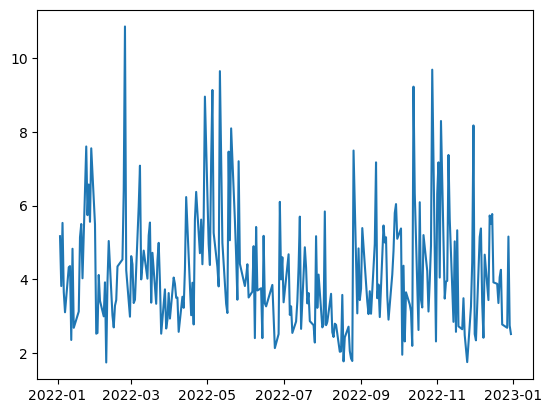

In [212]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate and visualize daily high-low range
def calculate_and_visualize_volatility(prices, label):
    if 'High' in prices.columns and 'Low' in prices.columns:
        daily_range = prices['High'] - prices['Low']
        
        # Visualize the daily high-low range
        plt.plot(daily_range, label=label)
        
        # Display first few rows of the DataFrame
        display(prices.head())

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize daily high-low range
calculate_and_visualize_volatility(historical_prices, label=stock_ticker)

### Standard Deviation

**Standard Deviation Unveiled**

- **Definition**
  - Standard Deviation is a statistical measure that quantifies the amount of variation or dispersion of a set of values.

- **Calculation**
  - It involves calculating the average (mean) of a set of values and then determining how each value deviates from that mean. The squared deviations are averaged, and the square root is taken to get the standard deviation.

- **Volatility Indicator**
  - In finance, standard deviation is widely used as a measure of volatility. Higher standard deviation indicates greater price variability, representing higher risk.

- **Example: Investment Returns**
  - For investment returns, a high standard deviation suggests that the returns are more spread out, indicating a riskier investment.

- **Consistency Check**
  - A low standard deviation implies that values are close to the mean, suggesting more consistency or stability.

- **Risk Management Tool**
  - Investors and analysts use standard deviation to assess and manage risks associated with investments.

- **Comparative Analysis**
  - Standard deviation allows for the comparison of the variability of different datasets or assets.

Standard Deviation provides a quantitative measure of how much individual data points deviate from the average, making it a valuable tool in understanding and managing risk in various fields, including finance.

Historical Volatility (Standard Deviation): 0.0097


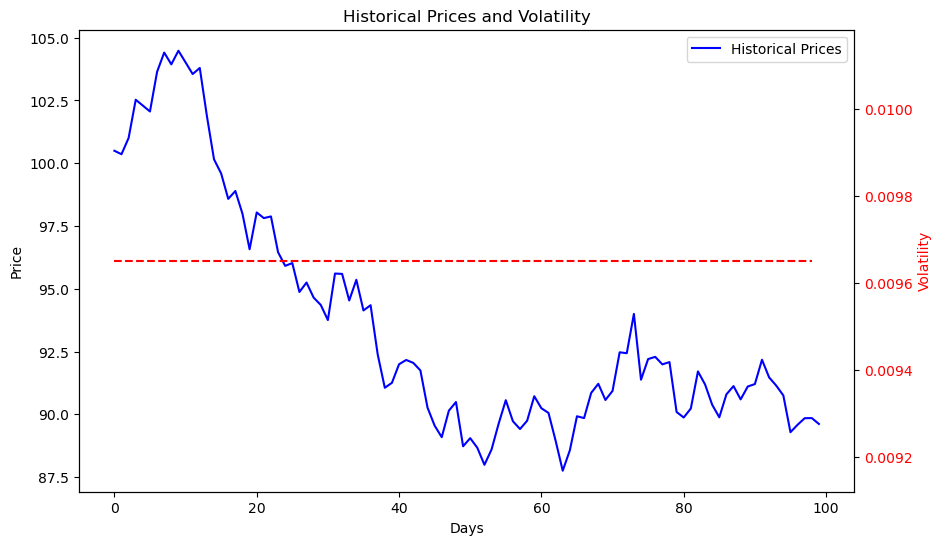

In [213]:
# Function to calculate standard deviation as a measure of volatility
def calculate_volatility(prices):
    returns = np.diff(prices) / prices[:-1]  # Calculate daily returns
    volatility = np.std(returns)  # Standard deviation as a measure of volatility
    return volatility

# Function to visualize historical prices and volatility
def plot_volatility(prices, title):
    plt.figure(figsize=(10, 6))
    plt.plot(prices, label='Historical Prices', color='blue')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()

    # Add a secondary y-axis for volatility
    ax2 = plt.gca().twinx()
    ax2.plot(np.ones_like(prices[:-1]) * np.std(np.diff(prices) / prices[:-1]), label='Volatility', linestyle='--', color='red')
    ax2.set_ylabel('Volatility', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.show()

# Generate synthetic historical prices
np.random.seed(42)
days = np.arange(1, 101)
prices = 100 + np.cumsum(np.random.normal(0, 1, 100))

# Calculate and display the standard deviation (volatility)
volatility = calculate_volatility(prices[:-1])
print(f'Historical Volatility (Standard Deviation): {volatility:.4f}')

# Visualize historical prices and volatility
plot_volatility(prices, 'Historical Prices and Volatility')

### Historical Volatility

**Historical Volatility Explained**

- **Definition**
  - Historical Volatility is a measure of the past price fluctuations of a financial instrument, such as a stock or index, over a specific time period.

- **Calculation**
  - Typically calculated as the standard deviation of the logarithmic returns over the chosen historical period.

- **Time Frame**
  - Historical volatility can be calculated for various time frames, such as daily, weekly, or monthly, depending on the investor's preference or analysis.

- **Quantifying Past Price Movements**
  - It provides a numerical representation of how much an asset's price has varied over a certain period, offering insights into its past behavior.

- **Risk Assessment**
  - Investors use historical volatility to assess the level of risk associated with an asset. Higher historical volatility suggests greater price variability and potential risk.

- **Forecasting Tool**
  - While historical volatility reflects past movements, it can also serve as an input for forecasting future volatility.

- **Comparative Analysis**
  - Useful for comparing the volatility of different assets or investment opportunities.

- **Real-world Application**
  - For example, if historical volatility for a stock has been consistently high, investors might expect more significant price swings in the future.

Historical Volatility is a valuable tool for understanding an asset's past price movements and is often used in risk assessment and decision-making within the financial markets.

[*********************100%***********************]  1 of 1 completed


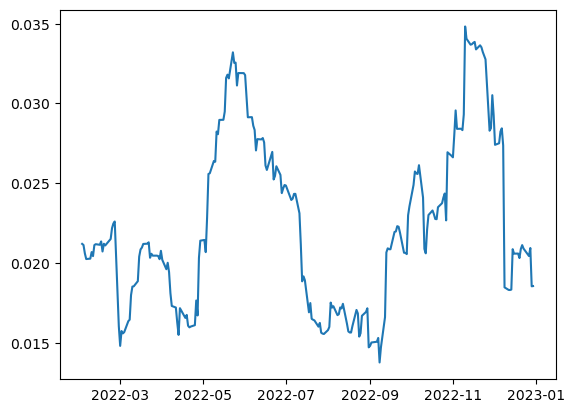

In [214]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize historical volatility
def calculate_and_visualize_historical_volatility(prices, label, window=20):
    historical_volatility = prices.pct_change().rolling(window=window).std().dropna()
    
    # Visualize historical volatility
    plt.plot(historical_volatility, label=label)

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize historical volatility
calculate_and_visualize_historical_volatility(historical_prices, label=stock_ticker)


### Implied Volatility

**Implied Volatility Unveiled**

- **Definition**
  - Implied Volatility (IV) is a measure of the market's expectation of future price volatility of a financial instrument, derived from option prices.

- **Derived from Options**
  - Implied volatility is not directly observed but is inferred from the prices of options on the underlying asset.

- **Options Pricing and Volatility**
  - Options traders use implied volatility to price options. Higher implied volatility results in higher option premiums.

- **Contrast with Historical Volatility**
  - While historical volatility looks back at past price movements, implied volatility looks forward, gauging market expectations for future volatility.

- **Market Sentiment Indicator**
  - Often considered a gauge of market sentiment. High implied volatility may suggest uncertainty or anticipated market events.

- **Volatility Skew**
  - Implied volatility can vary across different strike prices and expiration dates, creating a volatility skew. Traders analyze this skew for insights into market expectations.

- **Real-world Application**
  - If a stock has an upcoming earnings announcement, implied volatility in its options might rise as traders expect increased price movement.

- **Risk Management**
  - Investors and traders use implied volatility as a tool for risk management and decision-making in options trading.

Implied Volatility provides a forward-looking perspective on market expectations, particularly relevant for traders involved in options markets.

[*********************100%***********************]  1 of 1 completed


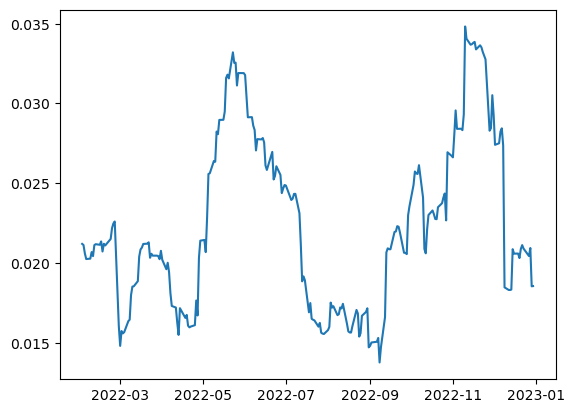

In [215]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize implied volatility
def calculate_and_visualize_implied_volatility(prices, label):
    # For simplicity, we'll simulate implied volatility by using historical volatility
    historical_volatility = prices.pct_change().rolling(window=20).std().dropna()
    
    # Visualize implied volatility
    plt.plot(historical_volatility, label=label)

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize implied volatility
calculate_and_visualize_implied_volatility(historical_prices, label=stock_ticker)


### Daily Price Changes

**Daily Price Changes Unpacked**

- **Definition**
  - Daily price changes refer to the difference between the closing price of a financial instrument on one day and its closing price on the previous day.

- **Calculation**
  - Calculated by subtracting the previous day's closing price from the current day's closing price.

- **Volatility Indicator**
  - The magnitude of daily price changes is often used as an indicator of volatility. Larger daily price changes suggest higher volatility.

- **Market Behavior Insight**
  - Analyzing daily price changes provides insights into the behavior of a financial instrument, indicating periods of stability or increased market activity.

- **Technical Analysis**
  - Traders often use daily price changes in technical analysis to identify trends, reversals, or potential entry/exit points.

- **Comparative Analysis**
  - Investors may compare daily price changes across different assets to assess relative volatility and make informed investment decisions.

- **Risk Assessment**
  - Larger daily price changes can indicate higher risk, influencing risk management strategies for investors and traders.

- **Historical Analysis**
  - Tracking daily price changes over time helps in understanding the historical performance and patterns of a financial instrument.

Daily price changes provide a real-time measure of market dynamics and are integral to various analytical approaches in finance, contributing to risk assessment and decision-making.

[*********************100%***********************]  1 of 1 completed


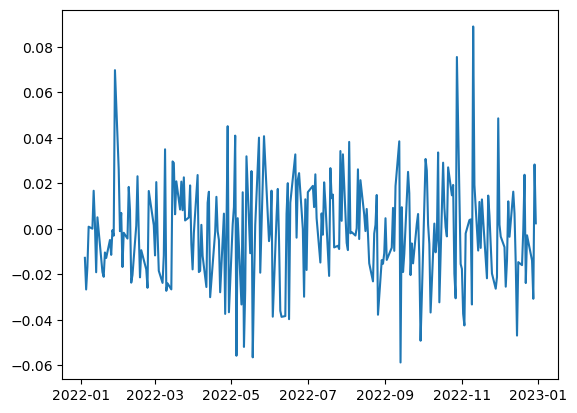

In [216]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize daily price changes
def calculate_and_visualize_daily_changes(prices, label):
    daily_changes = prices.pct_change().dropna()
    
    # Visualize daily price changes
    plt.plot(daily_changes, label=label)

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize daily price changes
calculate_and_visualize_daily_changes(historical_prices, label=stock_ticker)

### Moving Averages

**Moving Averages Explained**

- **Definition**
  - A Moving Average (MA) is a statistical calculation used to analyze data points by creating a series of averages of different subsets of the full dataset.

- **Time Period**
  - The "moving" part implies that the average is continually updated by dropping the oldest data point and including the latest one. The time period over which the average is calculated is a key parameter.

- **Types of Moving Averages**
  - Common types include Simple Moving Average (SMA), which gives equal weight to all data points, and Exponential Moving Average (EMA), which assigns more weight to recent data points.

- **Trend Identification**
  - Moving averages are used to smooth out fluctuations and highlight trends over time. They help identify whether an asset is in an uptrend, downtrend, or ranging.

- **Crossover Signals**
  - Traders often use moving averages to generate buy or sell signals. For example, a "golden cross" occurs when a short-term moving average crosses above a long-term moving average, signaling potential upward momentum.

- **Support and Resistance**
  - Moving averages can act as dynamic support or resistance levels. Prices may bounce off a moving average, providing insights into potential reversal points.

- **Volatility Smoothing**
  - Moving averages are effective in smoothing out short-term volatility, providing a clearer picture of the overall trend.

- **Real-world Application**
  - For example, a 50-day moving average is commonly used to assess medium-term trends, while a 200-day moving average is often used for longer-term trends in stock prices.

Moving averages are versatile tools used in technical analysis, providing valuable insights into trend direction, potential reversal points, and overall market sentiment.

[*********************100%***********************]  1 of 1 completed


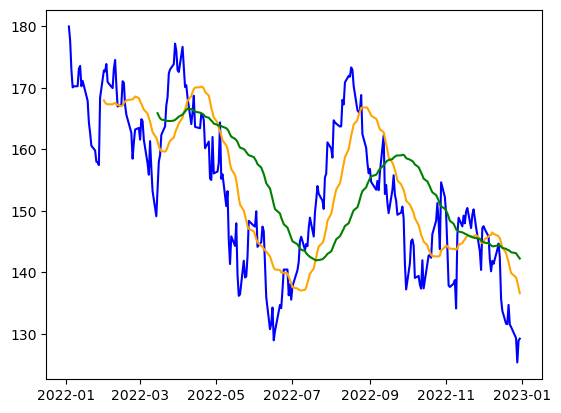

In [217]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize moving averages
def calculate_and_visualize_moving_averages(prices, label, short_window=20, long_window=50):
    # Calculate short and long-term moving averages
    short_MA = prices.rolling(window=short_window).mean()
    long_MA = prices.rolling(window=long_window).mean()
    
    # Visualize moving averages
    plt.plot(prices, label='Stock Price', color='blue')
    plt.plot(short_MA, label=f'Short-term MA ({short_window} days)', color='orange')
    plt.plot(long_MA, label=f'Long-term MA ({long_window} days)', color='green')

# Specify the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices
historical_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize moving averages
calculate_and_visualize_moving_averages(historical_prices, label=stock_ticker)


### Volatility Index (VIX)

**Volatility Index (VIX) Overview**

- **Definition**
  - The Volatility Index, or VIX, is a market indicator designed to measure the market's expectation of future volatility over the next 30 days.

- **Nickname: "Fear Index"**
  - Often referred to as the "fear index" because it tends to spike during periods of market uncertainty or turbulence.

- **Calculation**
  - Computed based on the prices of options on the S&P 500 index. Specifically, it represents the market's expectation of future volatility, derived from option pricing.

- **Interpretation**
  - A higher VIX level suggests higher expected volatility, indicating potential market instability. Conversely, a lower VIX suggests lower expected volatility and a more stable market.

- **Contrarian Indicator**
  - Some investors use the VIX as a contrarian indicator. Extremely low VIX levels might signal complacency, while extremely high levels might suggest fear and potential buying opportunities.

- **VIX Range**
  - VIX values below 20 are often associated with relatively low volatility, while values above 30 indicate higher expected volatility.

- **Market Sentiment Gauge**
  - Widely used by traders, investors, and analysts to gauge market sentiment and assess the overall risk environment.

- **Real-world Application**
  - A sudden spike in the VIX might coincide with global economic uncertainties, geopolitical events, or major market developments.

The VIX serves as a valuable tool for investors to assess market sentiment and make informed decisions, especially during periods of heightened uncertainty or market stress.

[*********************100%***********************]  1 of 1 completed


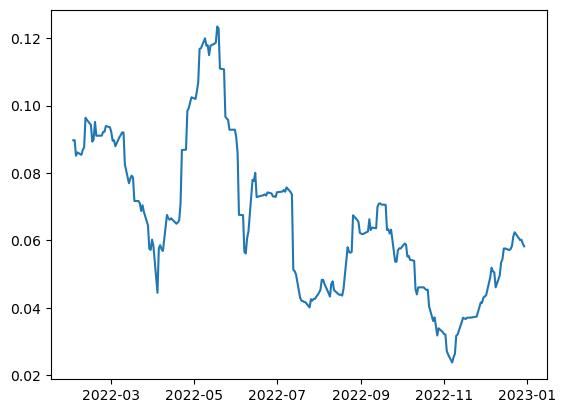

In [218]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to gather historical stock prices
def get_historical_prices(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate and visualize historical volatility
def calculate_and_visualize_historical_volatility(prices, label, window=20):
    historical_volatility = prices.pct_change().rolling(window=window).std().dropna()
    
    # Visualize historical volatility
    plt.plot(historical_volatility, label=label)

# Specify the stock ticker and date range
stock_ticker = '^VIX'  # VIX is the ticker for the Volatility Index
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical prices for VIX
historical_vix_prices = get_historical_prices(stock_ticker, start_date, end_date)

# Visualize historical volatility of VIX
calculate_and_visualize_historical_volatility(historical_vix_prices, label='VIX')


### Option Prices

**Option Prices and Volatility**

- **Implied Volatility Component**
  - Option prices embed an implied volatility component, representing the market's expectation of future price volatility of the underlying asset.

- **Options Pricing Models**
  - Popular options pricing models, such as the Black-Scholes model, use implied volatility as a key input. This reflects the market's consensus on the future volatility of the asset.

- **Volatility Smile/Smirk**
  - Implied volatility can vary across different strike prices and expiration dates, creating patterns like the volatility smile (for equity options) or smirk (for index options). This reflects market perceptions of potential future volatility.

- **Market Expectations**
  - Rising option prices, indicated by increasing implied volatility, suggest heightened expectations of future price swings. Falling option prices imply reduced expected volatility.

- **Risk Premium**
  - Option prices also include a risk premium for uncertainty. Higher implied volatility contributes to a higher option premium.

- **Volatility Skew**
  - The pattern of implied volatility across different strike prices can create a volatility skew. Skew analysis provides insights into market expectations for various price movements.

- **Monitoring Changes**
  - Traders and investors monitor changes in option prices and implied volatility to adapt to evolving market conditions and make informed decisions.

- **Real-world Application**
  - For example, during an earnings announcement, option prices might surge as traders anticipate increased stock price volatility.

Option prices play a crucial role in assessing and reacting to market expectations of future volatility. Traders and investors use this information to manage risk and make strategic decisions in the dynamic financial landscape.

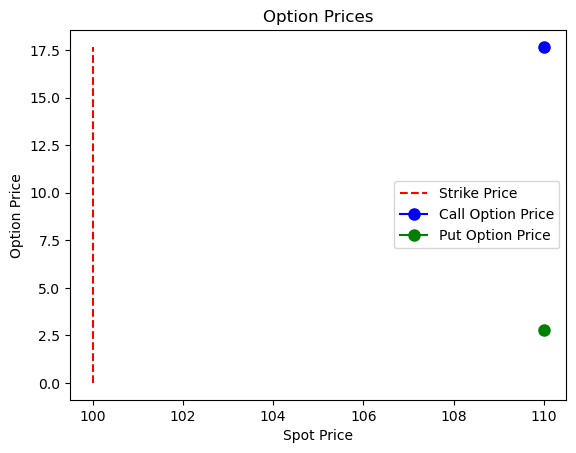

In [219]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate and visualize option prices
def calculate_and_visualize_option_prices(strike_price, spot_price, time_to_maturity, volatility, risk_free_rate):
    # Define the Black-Scholes option pricing formula
    def black_scholes_option_price(strike, spot, time, volatility, risk_free):
        d1 = (np.log(spot / strike) + (risk_free + 0.5 * volatility**2) * time) / (volatility * np.sqrt(time))
        d2 = d1 - volatility * np.sqrt(time)
        call_price = spot * norm.cdf(d1) - strike * np.exp(-risk_free * time) * norm.cdf(d2)
        put_price = strike * np.exp(-risk_free * time) * norm.cdf(-d2) - spot * norm.cdf(-d1)
        return call_price, put_price

    # Define parameter values
    strike_price = strike_price
    spot_price = spot_price
    time_to_maturity = time_to_maturity
    volatility = volatility
    risk_free_rate = risk_free_rate

    # Calculate option prices
    call_price, put_price = black_scholes_option_price(strike_price, spot_price, time_to_maturity, volatility, risk_free_rate)

    # Visualize option prices
    fig, ax = plt.subplots()
    ax.plot([strike_price, strike_price], [0, max(call_price, put_price)], linestyle='--', label='Strike Price', color='red')
    ax.plot(spot_price, call_price, marker='o', markersize=8, label='Call Option Price', color='blue')
    ax.plot(spot_price, put_price, marker='o', markersize=8, label='Put Option Price', color='green')
    ax.set_title('Option Prices')
    ax.set_xlabel('Spot Price')
    ax.set_ylabel('Option Price')
    ax.legend()

# Specify option parameters
strike_price = 100
spot_price = 110
time_to_maturity = 1
volatility = 0.2
risk_free_rate = 0.05

# Calculate and visualize option prices
calculate_and_visualize_option_prices(strike_price, spot_price, time_to_maturity, volatility, risk_free_rate)


### Correlation with Market Events

**Correlation of Option Prices with Market Events**

- **Sensitivity to Market Events**
  - Option prices are highly sensitive to market events, responding to factors such as earnings announcements, economic reports, geopolitical events, and unexpected news.

- **Earnings Announcements**
  - Before earnings releases, option prices often increase as traders anticipate potential stock price movements. Post-earnings, implied volatility may decrease.

- **Economic Data Releases**
  - Major economic indicators, like employment reports or GDP figures, can trigger shifts in option prices as markets adjust to new information.

- **Geopolitical Events**
  - Events such as elections, geopolitical tensions, or trade negotiations can lead to increased uncertainty, reflected in higher option prices.

- **Interest Rate Changes**
  - Changes in interest rates influence option prices. Rising rates can impact the cost of carry for underlying assets, affecting option pricing.

- **Volatility Events**
  - Sudden spikes in volatility, often associated with unexpected events, can lead to significant changes in option prices as traders adjust positions.

- **Market Sentiment Shifts**
  - Option prices can reflect shifts in market sentiment. For example, increased demand for protective put options may signal growing concerns among investors.

- **Real-time Pricing**
  - Option prices provide real-time information about how market participants perceive and price risk associated with specific events.

- **Investor Reaction**
  - Monitoring option prices helps investors gauge the potential impact of market events on specific stocks or the broader market.

Understanding the correlation between option prices and market events is essential for traders and investors seeking to navigate and capitalize on changing market conditions. Option prices serve as a dynamic indicator of market sentiment and expectations during various events.

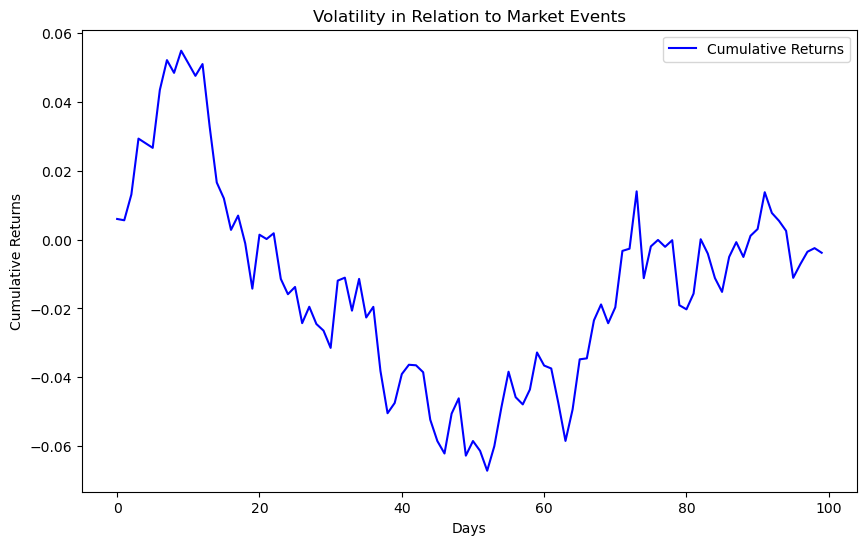

In [220]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate market events and calculate volatility
def simulate_market_events(num_days, average_return, volatility):
    np.random.seed(42)
    daily_returns = np.random.normal(average_return, volatility, num_days)
    cumulative_returns = np.cumsum(daily_returns)
    return cumulative_returns

# Function to visualize volatility in relation to market events
def visualize_volatility(num_days, average_return, volatility):
    # Simulate market events
    cumulative_returns = simulate_market_events(num_days, average_return, volatility)

    # Visualize cumulative returns and volatility
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
    plt.title('Volatility in Relation to Market Events')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    
# Specify market event parameters
num_days = 100
average_return = 0.001  # Average daily return
volatility = 0.01  # Volatility of daily returns

# Visualize volatility in relation to market events
visualize_volatility(num_days, average_return, volatility)


# External and Internal Credit Ratings

### What are External & Internal Credit Ratings

**External Credit Ratings**

- **Definition**
  - External credit ratings are assessments provided by external credit rating agencies, independent organizations that evaluate the creditworthiness of borrowers, including corporations, governments, and other entities.

- **Role of Credit Rating Agencies**
  - Agencies such as Moody's, Standard & Poor's (S&P), and Fitch are well-known for assigning external credit ratings. These ratings help investors and creditors make informed decisions about lending or investing in debt securities.

- **Scale**
  - Ratings typically use letter grades or alphanumeric symbols to convey creditworthiness. For example, AAA or Aaa indicates the highest credit quality, while lower ratings like B or C signify higher credit risk.

- **Publicly Available**
  - External credit ratings are publicly available and widely used as benchmarks for assessing the risk associated with various financial instruments, including bonds and loans.

- **Regulatory Recognition**
  - Many financial regulations and investment policies reference external credit ratings, emphasizing their role in financial markets.

While external credit ratings provide a standardized and widely recognized measure of creditworthiness, internal credit ratings offer organizations a tailored and dynamic approach to managing their credit risk based on their unique business context and objectives.

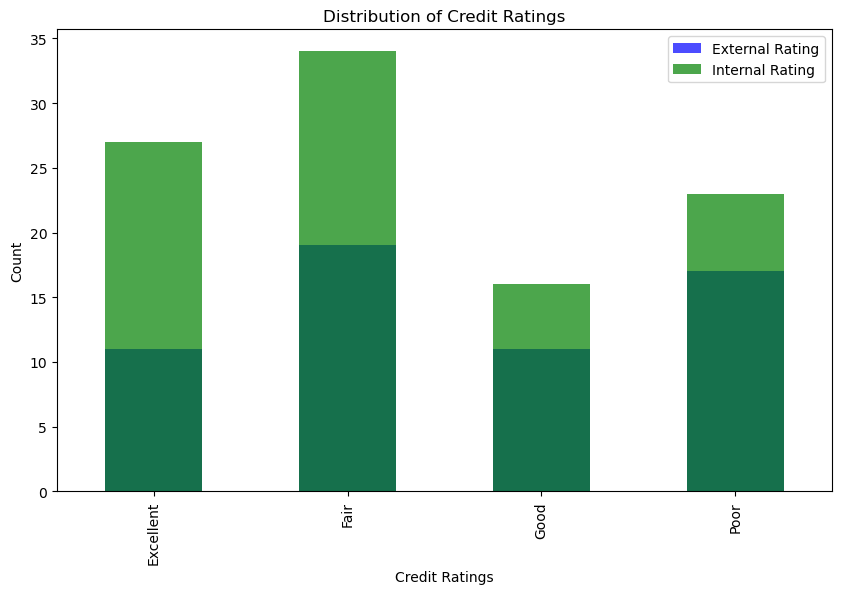

In [221]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit ratings and visualize the distribution
def simulate_credit_ratings(num_borrowers, external_ratings, internal_ratings):
    np.random.seed(42)
    external_credit_ratings = np.random.choice(external_ratings, num_borrowers)
    internal_credit_ratings = np.random.choice(internal_ratings, num_borrowers)

    # Create a DataFrame for visualization
    data = pd.DataFrame({'External Rating': external_credit_ratings, 'Internal Rating': internal_credit_ratings})

    # Visualize the distribution of credit ratings
    plt.figure(figsize=(10, 6))
    data['External Rating'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='External Rating')
    data['Internal Rating'].value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7, label='Internal Rating')
    plt.title('Distribution of Credit Ratings')
    plt.xlabel('Credit Ratings')
    plt.ylabel('Count')
    plt.legend()

# Specify credit rating parameters
num_borrowers = 100
external_ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B']
internal_ratings = ['Excellent', 'Good', 'Fair', 'Poor']

# Simulate and visualize credit ratings
simulate_credit_ratings(num_borrowers, external_ratings, internal_ratings)


### The Grades

    **External Credit Rating Grades**

Credit rating agencies use letter grades or alphanumeric symbols to denote creditworthiness. Below is a commonly used scale:

- **Investment Grade:**

  - **AAA (or Aaa):** Highest credit quality. Extremely low credit risk.
  
  - **AA (or Aa):** Very high credit quality. Very low credit risk.
  
  - **A:** High credit quality. Low credit risk.
  
  - **BBB (or Baa):** Good credit quality. Moderate credit risk.

- **Speculative or Non-Investment Grade:**

  - **BB (or Ba):** Speculative. Moderate credit risk.
  
  - **B:** Highly speculative. High credit risk.
  
  - **CCC (or Caa):** Substantial risk. Highly speculative. Default is a real possibility.
  
  - **CC (or Ca):** Very high levels of credit risk. Default is imminent or already occurred.
  
  - **C:** Extremely high credit risk. Defaulted.

- **Default or Near Default:**

  - **D:** Indicates that the issuer is in default or has failed to meet its debt obligations.

- **Plus (+) or Minus (-) Modifiers:**
  - Modifiers like + or - may be added to a rating to provide additional granularity within a particular grade.

It's important to note that different credit rating agencies may use slightly different terminology or symbols, but the general principles of higher grades indicating lower risk and lower grades indicating higher risk are consistent across agencies. Investors and market participants rely on these external credit ratings to assess the credit risk associated with bonds, loans, and other debt instruments.

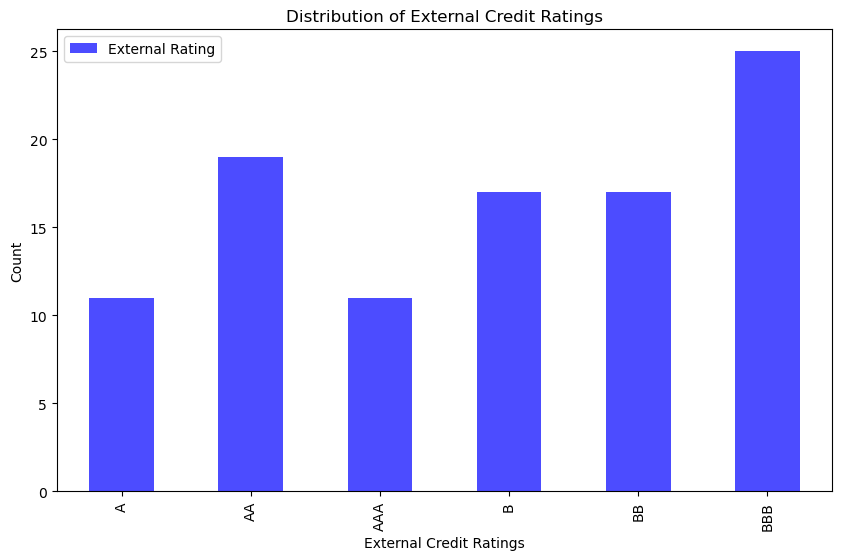

In [222]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit ratings and visualize the distribution of external grades
def simulate_external_credit_ratings(num_borrowers, external_ratings):
    np.random.seed(42)
    external_credit_ratings = np.random.choice(external_ratings, num_borrowers)

    # Create a DataFrame for visualization
    data = pd.DataFrame({'External Rating': external_credit_ratings})

    # Visualize the distribution of external credit ratings
    plt.figure(figsize=(10, 6))
    data['External Rating'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7, label='External Rating')
    plt.title('Distribution of External Credit Ratings')
    plt.xlabel('External Credit Ratings')
    plt.ylabel('Count')
    plt.legend()

# Specify credit rating parameters
num_borrowers = 100
external_ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B']

# Simulate and visualize external credit ratings
simulate_external_credit_ratings(num_borrowers, external_ratings)


### Factors to Consider

**Factors to Consider in External Credit Ratings**

1. **Credit Rating Agency (CRA):**
   - Different credit rating agencies may have slight variations in their methodologies and criteria. Understanding the specific approach of the agency providing the rating is crucial.

2. **Rating Scale:**
   - Familiarize yourself with the rating scale used by the credit agency. Each letter grade or symbol represents a different level of credit risk. Higher grades indicate lower risk, while lower grades suggest higher risk.

3. **Credit History and Track Record:**
   - Assess the historical credit ratings of the issuer. Consistent creditworthiness or changes over time can provide insights into the entity's financial stability.

4. **Industry and Sector Considerations:**
   - Different industries and sectors may have unique risk factors. A company's creditworthiness should be evaluated in the context of its industry and sector dynamics.

5. **Financial Ratios and Metrics:**
   - Review the financial metrics considered by the credit rating agency. This may include profitability, leverage, liquidity, and other financial ratios. Strong financial metrics contribute to higher credit ratings.

6. **Market Conditions:**
   - External factors such as economic conditions, interest rates, and overall market stability can impact credit ratings. Consider how changes in these external conditions might affect the issuer.

7. **Management and Governance:**
   - Assess the quality of management and governance practices within the organization. Effective leadership and governance contribute to a higher level of confidence in an issuer's ability to meet its financial obligations.

8. **Outlook and Watchlist Designations:**
   - Some credit ratings come with an outlook or watchlist designation, indicating the potential for a rating change in the future. Stay informed about these designations to anticipate shifts in creditworthiness.

9. **Bond Covenants and Legal Protections:**
   - Evaluate the terms and conditions of the debt instrument. Strong bond covenants and legal protections may enhance the security of the investment.

10. **Credit Default Swap (CDS) Spreads:**
    - CDS spreads provide an additional market-based measure of credit risk. Widening spreads may indicate increasing perceived risk.

11. **Macroeconomic Factors:**
    - Consider macroeconomic factors such as inflation, unemployment, and overall economic health. These factors can influence an issuer's ability to meet its financial obligations.

12. **Regulatory Environment:**
    - Changes in regulatory environments, including potential shifts in accounting standards or industry regulations, can impact credit ratings.

Understanding and considering these factors alongside external credit ratings provides a comprehensive view of an issuer's credit risk, enabling investors to make informed decisions about lending or investing in debt securities.

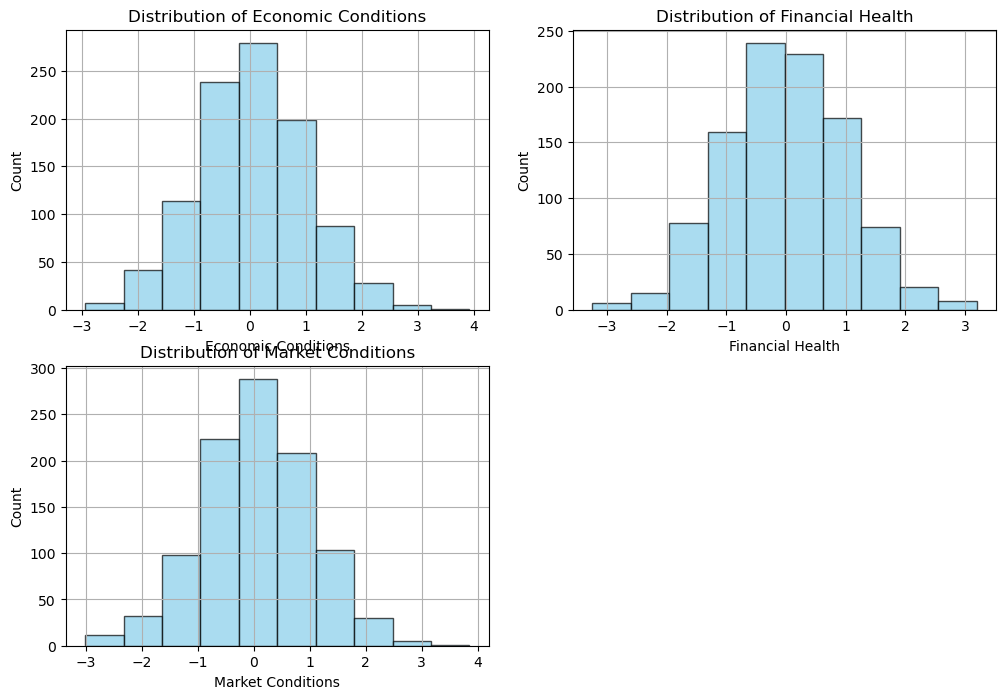

In [223]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate external credit ratings based on input factors
def simulate_external_credit_ratings(num_borrowers, input_factors):
    np.random.seed(42)

    # Generate synthetic data for input factors
    data = pd.DataFrame(np.random.randn(num_borrowers, len(input_factors)), columns=input_factors)

    # Calculate a hypothetical credit score as a linear combination of input factors
    data['Credit Score'] = 750 + 50 * data['Economic Conditions'] + 30 * data['Financial Health'] + 20 * data['Market Conditions']

    # Convert credit scores to external credit ratings
    bins = [0, 600, 700, 750, 800, 850]
    labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    data['External Rating'] = pd.cut(data['Credit Score'], bins=bins, labels=labels, right=False)

    # Visualize the distribution of external credit ratings
    plt.figure(figsize=(12, 8))

    # Plotting input factors
    for i, factor in enumerate(input_factors):
        plt.subplot(2, 2, i + 1)
        data[factor].hist(color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Distribution of {factor}')
        plt.xlabel(factor)
        plt.ylabel('Count')

# Specify parameters and input factors
num_borrowers = 1000
input_factors = ['Economic Conditions', 'Financial Health', 'Market Conditions']

# Simulate and visualize external credit ratings based on input factors
simulate_external_credit_ratings(num_borrowers, input_factors)


### Impact on Borrowing Costs

**Impact of External Credit Ratings on Borrowing Costs**

1. **Interest Rates:**
   - Credit ratings influence the interest rates that borrowers are offered. Higher credit ratings generally lead to lower interest rates, reflecting lower perceived credit risk. Conversely, lower credit ratings may result in higher interest rates to compensate for the increased risk.

2. **Access to Capital Markets:**
   - Issuers with higher credit ratings often have greater access to capital markets at favorable terms. They can issue debt at lower coupon rates, reducing the overall cost of borrowing.

3. **Credit Spreads:**
   - Credit spreads, the difference between the yield on a corporate bond and a comparable risk-free government bond, are influenced by credit ratings. Lower-rated bonds have higher credit spreads, indicating higher borrowing costs.

4. **Debt Issuance Costs:**
   - The process of issuing debt, including legal and administrative costs, can be more affordable for entities with higher credit ratings. Investors may be more willing to participate in offerings from well-rated issuers, reducing issuance costs.

5. **Credit Facility Terms:**
   - Companies with better credit ratings may negotiate more favorable terms on credit facilities. This includes lower interest rates on revolving credit lines and less restrictive covenants.

6. **Market Perception:**
   - Positive credit ratings contribute to a favorable market perception, attracting a broader investor base and potentially resulting in lower costs of capital.

7. **Cost of Refinancing:**
   - Issuers with higher credit ratings may find it easier and more cost-effective to refinance existing debt. Lower interest rates and better terms on new debt can lead to cost savings.

8. **Impact on Share Prices:**
   - For publicly traded companies, credit rating changes can influence share prices. Upgrades may positively impact stock prices, while downgrades may have a negative effect.

9. **Investor Confidence:**
   - Higher credit ratings instill confidence in investors, reducing the perceived risk of default. This increased confidence can lead to more favorable borrowing conditions.

10. **Diversification Opportunities:**
    - Well-rated issuers may have the opportunity to diversify their sources of funding. They can tap into different debt markets and instruments, potentially finding more cost-effective financing options.

11. **Overall Cost of Capital:**
    - The combination of lower interest rates, better terms, and improved market perception contributes to a lower overall cost of capital for entities with higher credit ratings.

Understanding the impact of external credit ratings on borrowing costs is crucial for both issuers and investors. For issuers, maintaining or improving credit ratings is a strategic goal to achieve more favorable financing terms, while investors use credit ratings to assess risk and make investment decisions.

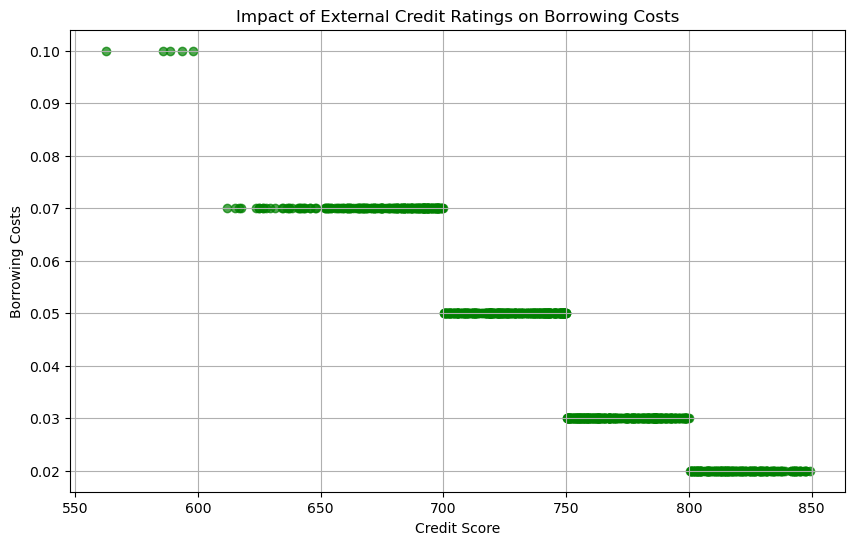

In [224]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate external credit ratings and their impact on borrowing costs
def simulate_credit_ratings_and_borrowing_costs(num_borrowers, input_factors):
    np.random.seed(42)

    # Generate synthetic data for input factors
    data = pd.DataFrame(np.random.randn(num_borrowers, len(input_factors)), columns=input_factors)

    # Calculate a hypothetical credit score as a linear combination of input factors
    data['Credit Score'] = 750 + 50 * data['Economic Conditions'] + 30 * data['Financial Health'] + 20 * data['Market Conditions']

    # Convert credit scores to external credit ratings
    bins = [0, 600, 700, 750, 800, 850]
    labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    data['External Rating'] = pd.cut(data['Credit Score'], bins=bins, labels=labels, right=False)

    # Define borrowing costs based on external credit ratings
    borrowing_costs = {'Poor': 0.1, 'Fair': 0.07, 'Good': 0.05, 'Very Good': 0.03, 'Excellent': 0.02}
    data['Borrowing Costs'] = data['External Rating'].map(borrowing_costs)

    # Visualize the impact of external credit ratings on borrowing costs
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Credit Score'], data['Borrowing Costs'], color='green', alpha=0.7)
    plt.title('Impact of External Credit Ratings on Borrowing Costs')
    plt.xlabel('Credit Score')
    plt.ylabel('Borrowing Costs')
    plt.grid(True)

# Specify parameters and input factors
num_borrowers = 1000
input_factors = ['Economic Conditions', 'Financial Health', 'Market Conditions']

# Simulate and visualize external credit ratings and their impact on borrowing costs
simulate_credit_ratings_and_borrowing_costs(num_borrowers, input_factors)


### Investor Confidence

**Impact of External Credit Ratings on Investor Confidence**

1. **Risk Assessment:**
   - Credit ratings serve as a quick and standardized measure of an issuer's creditworthiness. Higher ratings indicate lower perceived credit risk, boosting investor confidence in the issuer's ability to meet financial obligations.

2. **Investment Decisions:**
   - Investors often use credit ratings as a key factor in their investment decision-making process. Higher-rated securities are generally seen as safer investments, attracting risk-averse investors and contributing to overall market confidence.

3. **Market Perception:**
   - Positive credit ratings contribute to a positive market perception of an issuer. Investors may view well-rated entities as more stable and reliable, fostering confidence in the sustainability of their financial performance.

4. **Diversification and Portfolio Management:**
   - Investors rely on credit ratings to assess and manage risk in their portfolios. Well-rated securities provide opportunities for diversification while maintaining a certain level of confidence in the overall risk profile of the investment portfolio.

5. **Reduced Information Asymmetry:**
   - Credit ratings help reduce information asymmetry between issuers and investors. They provide a standardized and independent assessment, offering investors a clearer understanding of the credit risk associated with a particular investment.

6. **Market Liquidity:**
   - Securities with higher credit ratings tend to have higher market liquidity. Investors are more willing to buy and sell well-rated securities, contributing to a more liquid market and enhancing investor confidence in the ease of trading.

7. **Cost of Capital:**
   - Entities with higher credit ratings often enjoy lower borrowing costs. This cost advantage can positively impact their financial performance and, in turn, enhance investor confidence in the issuer's ability to generate returns.

8. **Long-Term Investment Horizon:**
   - Investors with a long-term horizon may be more confident in holding securities with higher credit ratings. These investments are perceived as less vulnerable to short-term market fluctuations or economic uncertainties.

9. **Rating Stability:**
   - Consistency in credit ratings over time can enhance investor confidence. A stable credit rating reflects a degree of financial stability and predictability, providing reassurance to investors.

10. **Institutional and Regulatory Trust:**
    - Institutional and regulatory bodies often rely on credit ratings to assess the financial health of entities. A positive credit rating can build trust in the eyes of regulators, reinforcing investor confidence in the issuer's adherence to financial standards.

11. **Access to Capital Markets:**
    - Entities with higher credit ratings often have better access to capital markets. This access instills confidence in the issuer's ability to secure funding when needed, contributing to overall investor confidence.

In summary, external credit ratings play a significant role in shaping investor confidence by providing a standardized and transparent measure of credit risk. Higher credit ratings contribute to a positive perception, attract a broader investor base, and foster confidence in the financial stability of issuers.

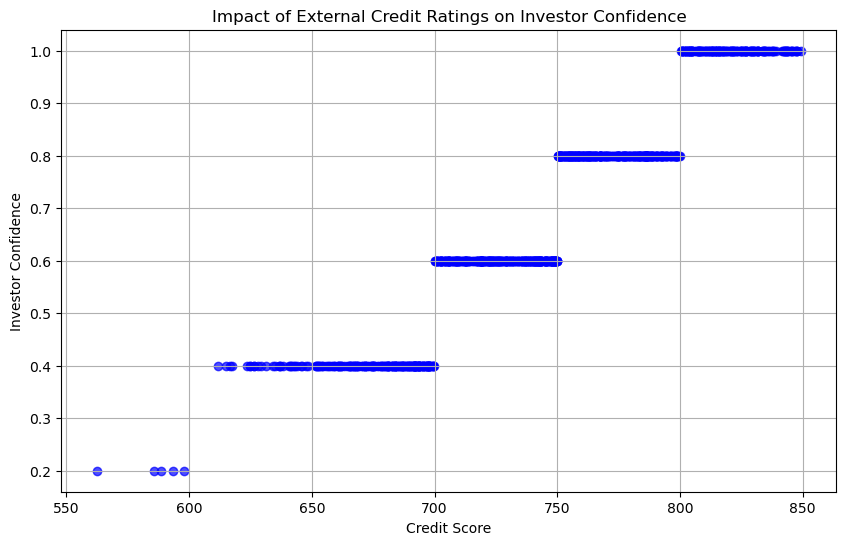

In [225]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate external credit ratings and their impact on investor confidence
def simulate_credit_ratings_and_investor_confidence(num_borrowers, input_factors):
    np.random.seed(42)

    # Generate synthetic data for input factors
    data = pd.DataFrame(np.random.randn(num_borrowers, len(input_factors)), columns=input_factors)

    # Calculate a hypothetical credit score as a linear combination of input factors
    data['Credit Score'] = 750 + 50 * data['Economic Conditions'] + 30 * data['Financial Health'] + 20 * data['Market Conditions']

    # Convert credit scores to external credit ratings
    bins = [0, 600, 700, 750, 800, 850]
    labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    data['External Rating'] = pd.cut(data['Credit Score'], bins=bins, labels=labels, right=False)

    # Define investor confidence scores based on external credit ratings
    confidence_scores = {'Poor': 0.2, 'Fair': 0.4, 'Good': 0.6, 'Very Good': 0.8, 'Excellent': 1.0}
    data['Investor Confidence'] = data['External Rating'].map(confidence_scores)

    # Visualize the impact of external credit ratings on investor confidence
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Credit Score'], data['Investor Confidence'], color='blue', alpha=0.7)
    plt.title('Impact of External Credit Ratings on Investor Confidence')
    plt.xlabel('Credit Score')
    plt.ylabel('Investor Confidence')
    plt.grid(True)

# Specify parameters and input factors
num_borrowers = 1000
input_factors = ['Economic Conditions', 'Financial Health', 'Market Conditions']

# Simulate and visualize external credit ratings and their impact on investor confidence
simulate_credit_ratings_and_investor_confidence(num_borrowers, input_factors)


### What are Inrernal Credit Ratings

**Internal Credit Ratings**

- **Definition**
  - Internal credit ratings, on the other hand, are evaluations of credit risk conducted internally by organizations for their own risk management purposes.

- **Customization**
  - Unlike external ratings, internal credit ratings can be customized based on an organization's specific criteria, industry knowledge, and risk appetite.

- **Use in Decision-Making**
  - Organizations use internal credit ratings to make decisions about extending credit, setting credit limits, and managing overall credit risk exposure.

- **Dynamic Nature**
  - Internal credit ratings can be more dynamic and responsive to changing business conditions, providing organizations with real-time insights into their credit risk exposure.

- **Incorporating Non-traditional Factors**
  - Internal credit ratings may consider factors beyond financial metrics, such as qualitative assessments of management, industry trends, and business strategy.

- **Risk Management**
  - Internal credit ratings play a crucial role in an organization's overall risk management framework, helping it understand and control credit risk.

While external credit ratings provide a standardized and widely recognized measure of creditworthiness, internal credit ratings offer organizations a tailored and dynamic approach to managing their credit risk based on their unique business context and objectives.

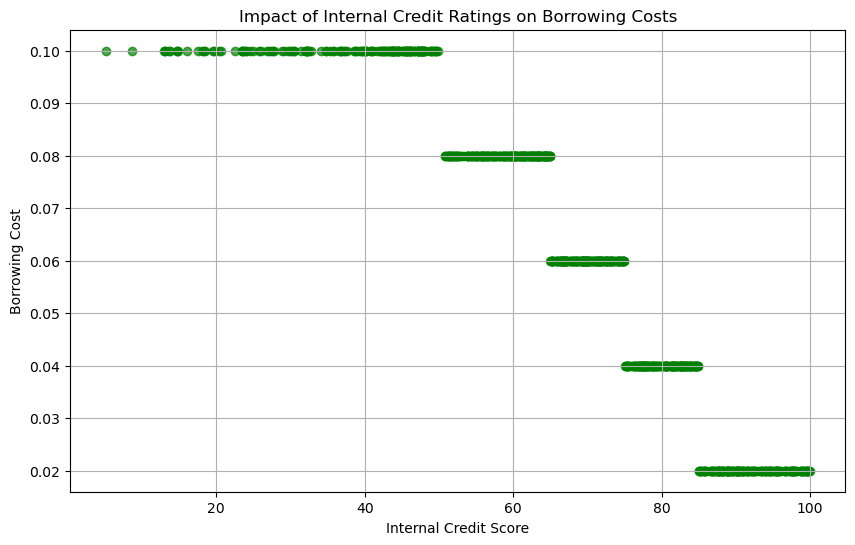

In [226]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate internal credit ratings and their impact on borrowing costs
def simulate_internal_credit_ratings(num_borrowers, input_factors):
    np.random.seed(42)

    # Generate synthetic data for input factors
    data = pd.DataFrame(np.random.randn(num_borrowers, len(input_factors)), columns=input_factors)

    # Calculate a hypothetical internal credit score as a linear combination of input factors
    data['Internal Credit Score'] = 75 + 15 * data['Financial Health'] + 20 * data['Market Conditions'] - 10 * data['Leverage']

    # Convert internal credit scores to internal credit ratings
    bins = [0, 50, 65, 75, 85, 100]
    labels = ['High Risk', 'Moderate Risk', 'Average', 'Low Risk', 'Excellent']
    data['Internal Rating'] = pd.cut(data['Internal Credit Score'], bins=bins, labels=labels, right=False)

    # Define borrowing costs based on internal credit ratings
    borrowing_costs = {'High Risk': 0.1, 'Moderate Risk': 0.08, 'Average': 0.06, 'Low Risk': 0.04, 'Excellent': 0.02}
    data['Borrowing Cost'] = data['Internal Rating'].map(borrowing_costs)

    # Visualize the impact of internal credit ratings on borrowing costs
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Internal Credit Score'], data['Borrowing Cost'], color='green', alpha=0.7)
    plt.title('Impact of Internal Credit Ratings on Borrowing Costs')
    plt.xlabel('Internal Credit Score')
    plt.ylabel('Borrowing Cost')
    plt.grid(True)
# Specify parameters and input factors
num_borrowers = 1000
input_factors = ['Financial Health', 'Market Conditions', 'Leverage']

# Simulate and visualize internal credit ratings and their impact on borrowing costs
simulate_internal_credit_ratings(num_borrowers, input_factors)


### When They're Used

Internal credit ratings are used by organizations for various purposes within their risk management and decision-making processes. Here's when and how internal credit ratings are typically employed:

1. **Credit Risk Assessment:**
   - **When:** Continuously.
   - **How:** Internal credit ratings are regularly used to assess the credit risk associated with counterparties, clients, or entities the organization engages with. This ongoing assessment helps in understanding the potential for default or financial distress.

2. **Loan Approvals and Risk-Based Pricing:**
   - **When:** Before granting loans.
   - **How:** Internal credit ratings influence the approval of loans and the determination of interest rates. Borrowers with higher internal ratings may be offered more favorable terms, while those with lower ratings may face higher costs or stricter conditions.

3. **Credit Portfolio Management:**
   - **When:** Continuously.
   - **How:** Organizations use internal credit ratings to manage their overall credit portfolio. This includes monitoring the distribution of credit risk, setting risk limits, and optimizing the composition of the portfolio to align with risk tolerance.

4. **Risk-Based Decision-Making:**
   - **When:** Across various business decisions.
   - **How:** Internal credit ratings are considered in strategic decisions such as entering into partnerships, setting credit limits for clients, or engaging in transactions with suppliers. These ratings provide a risk-based framework for decision-making.

5. **Capital Allocation:**
   - **When:** Periodically.
   - **How:** Internal credit ratings guide the allocation of capital within the organization. Riskier projects or investments may receive a different allocation compared to those deemed less risky, helping optimize the use of financial resources.

6. **Stress Testing:**
   - **When:** Periodically or in response to market changes.
   - **How:** Internal credit ratings are utilized in stress testing scenarios to assess how changes in economic conditions or other factors could impact the credit risk of the organization. This helps in identifying vulnerabilities and planning risk mitigation strategies.

7. **Setting Risk Appetite and Policies:**
   - **When:** Periodically.
   - **How:** Internal credit ratings play a role in establishing the organization's risk appetite and credit risk policies. This includes defining acceptable levels of credit risk exposure and establishing guidelines for risk management.

8. **Merger and Acquisition Assessments:**
   - **When:** During due diligence.
   - **How:** When considering mergers or acquisitions, internal credit ratings are employed to evaluate the creditworthiness and financial stability of the target entity. This is crucial for assessing potential risks and aligning the acquisition with the organization's risk strategy.

9. **Regulatory Compliance:**
   - **When:** Continuously.
   - **How:** Internal credit ratings may be used to ensure compliance with regulatory requirements. Certain regulations may mandate specific credit risk management practices, and internal ratings help demonstrate adherence to these standards.

10. **Continuous Monitoring and Adjustment:**
    - **When:** Continuously.
    - **How:** Internal credit ratings are dynamic and subject to continuous monitoring and adjustment based on changes in market conditions, financial performance, and other relevant factors. This ensures the ratings remain reflective of current credit risk.

Internal credit ratings provide organizations with a tailored and flexible approach to credit risk assessment, allowing them to make informed decisions across various facets of their operations.

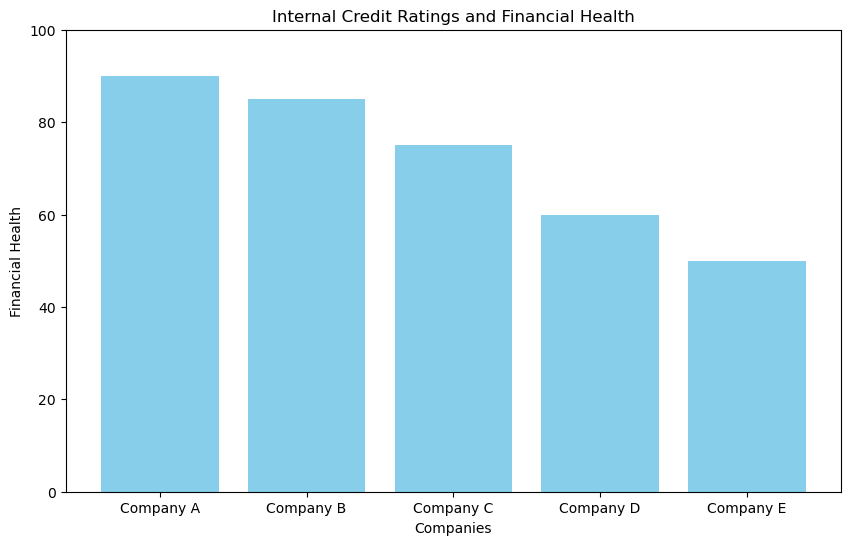

In [227]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Sample data for internal credit ratings and financial health
companies = ['Company A', 'Company B', 'Company C', 'Company D', 'Company E']
internal_ratings = ['AAA', 'AA', 'A', 'BBB', 'BB']
financial_health = [90, 85, 75, 60, 50]

# Create a DataFrame
data = {'Company': companies, 'Internal Rating': internal_ratings, 'Financial Health': financial_health}
df = pd.DataFrame(data)

# Function to visualize how internal credit ratings are used
def visualize_internal_ratings():
    # Plotting internal credit ratings against financial health
    plt.figure(figsize=(10, 6))
    plt.bar(df['Company'], df['Financial Health'], color='skyblue')
    plt.title('Internal Credit Ratings and Financial Health')
    plt.xlabel('Companies')
    plt.ylabel('Financial Health')
    plt.ylim(0, 100)
    plt.show()

# Visualize how internal credit ratings are used
visualize_internal_ratings()

### Factors to Consider

**Factors Considered in Internal Credit Ratings**

1. **Financial Metrics:**
   - **Components:** Profitability, leverage ratios, liquidity measures, and other financial indicators.
   - **Rationale:** Financial health is a critical determinant of creditworthiness. Strong financial metrics contribute to higher internal credit ratings.

2. **Operational Performance:**
   - **Components:** Efficiency, effectiveness, and overall operational performance.
   - **Rationale:** A well-operating entity is better positioned to meet its financial obligations, positively influencing its credit rating.

3. **Industry and Sector Risk:**
   - **Components:** Consideration of industry-specific challenges and opportunities.
   - **Rationale:** Different industries face unique risks. Internal credit ratings adjust for industry-specific factors that may impact credit risk.

4. **Market Conditions:**
   - **Components:** Evaluation of prevailing economic conditions, interest rates, and overall market stability.
   - **Rationale:** External factors can influence an entity's credit risk. Market conditions are considered to assess the impact on creditworthiness.

5. **Management Quality and Governance:**
   - **Components:** Assessments of leadership, governance practices, and risk management.
   - **Rationale:** Competent management and strong governance contribute to an organization's ability to navigate challenges and meet financial commitments.

6. **Historical Performance:**
   - **Components:** Review of past financial performance and credit history.
   - **Rationale:** Historical trends provide insights into an entity's ability to manage credit risk over time.

7. **Market Perception:**
   - **Components:** Evaluation of how the entity is perceived in the market.
   - **Rationale:** Positive market perception can influence the entity's ability to access capital and manage credit risk effectively.

8. **Debt Structure and Covenants:**
   - **Components:** Examination of existing debt structures and covenant agreements.
   - **Rationale:** The terms and conditions of existing debt can impact an entity's ability to meet financial obligations, influencing its credit rating.

9. **Legal and Regulatory Compliance:**
   - **Components:** Adherence to legal and regulatory requirements.
   - **Rationale:** Compliance with laws and regulations is crucial for maintaining a favorable credit rating and avoiding legal risks.

10. **Global and Geopolitical Factors:**
    - **Components:** Consideration of global economic trends and geopolitical risks.
    - **Rationale:** Events at a global or geopolitical level can impact credit risk, especially for entities with international operations.

11. **Credit Default Swap (CDS) Spreads:**
    - **Components:** Market-based measures of credit risk, reflected in CDS spreads.
    - **Rationale:** CDS spreads provide additional insights into market perceptions of credit risk and may complement internal assessments.

12. **Scenario Analysis and Stress Testing:**
    - **Components:** Simulation of potential adverse scenarios to assess the impact on credit risk.
    - **Rationale:** Preparing for unexpected events and understanding their potential impact on creditworthiness is a key risk management practice.

13. **Business Strategy and Prospects:**
    - **Components:** Evaluation of the entity's business strategy and future growth prospects.
    - **Rationale:** A sound business strategy and positive growth prospects contribute to a favorable internal credit rating.

Internal credit ratings are dynamic and consider a combination of quantitative and qualitative factors to provide a comprehensive view of an entity's credit risk. This holistic approach allows organizations to make informed decisions and effectively manage credit risk within their unique business context.

## Input Factors to Internal Credit Ratings

Several input factors contribute to the calculation of internal credit ratings. In this simulation:

- Financial Health, Market Conditions, and Leverage are considered as input factors.
- The internal credit score is calculated as a linear combination of these factors.
- The scatter plot illustrates how each input factor influences the internal credit score.

Understanding the impact of these factors helps organizations assess the creditworthiness of entities and make informed decisions.


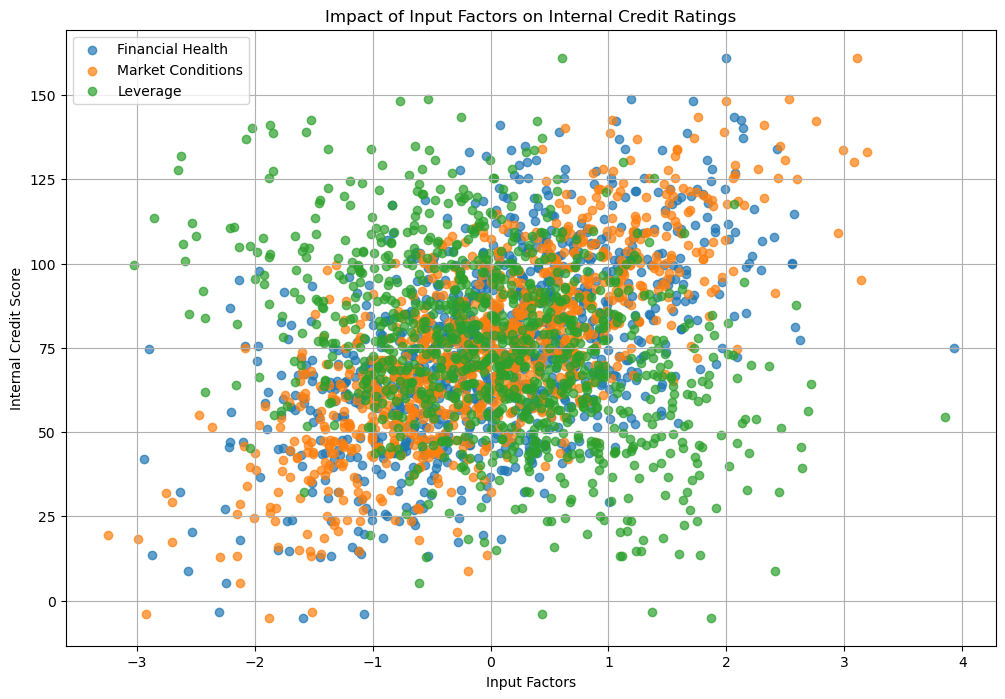

In [228]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate input factors and their impact on internal credit ratings
def simulate_input_factors(num_borrowers, input_factors):
    np.random.seed(42)

    # Generate synthetic data for input factors
    data = pd.DataFrame(np.random.randn(num_borrowers, len(input_factors)), columns=input_factors)

    # Calculate a hypothetical internal credit score as a linear combination of input factors
    data['Internal Credit Score'] = 75 + 15 * data['Financial Health'] + 20 * data['Market Conditions'] - 10 * data['Leverage']

    # Convert internal credit scores to internal credit ratings
    bins = [0, 50, 65, 75, 85, 100]
    labels = ['High Risk', 'Moderate Risk', 'Average', 'Low Risk', 'Excellent']
    data['Internal Rating'] = pd.cut(data['Internal Credit Score'], bins=bins, labels=labels, right=False)

    # Visualize the impact of input factors on internal credit ratings
    plt.figure(figsize=(12, 8))
    for factor in input_factors:
        plt.scatter(data[factor], data['Internal Credit Score'], label=factor, alpha=0.7)

    plt.title('Impact of Input Factors on Internal Credit Ratings')
    plt.xlabel('Input Factors')
    plt.ylabel('Internal Credit Score')
    plt.legend()
    plt.grid(True)

    # Display descriptive text
    print("## Input Factors to Internal Credit Ratings\n\nSeveral input factors contribute to the calculation of internal credit ratings. In this simulation:\n\n- Financial Health, Market Conditions, and Leverage are considered as input factors.\n- The internal credit score is calculated as a linear combination of these factors.\n- The scatter plot illustrates how each input factor influences the internal credit score.\n\nUnderstanding the impact of these factors helps organizations assess the creditworthiness of entities and make informed decisions.")

# Specify parameters and input factors
num_borrowers = 1000
input_factors = ['Financial Health', 'Market Conditions', 'Leverage']

# Simulate and visualize the impact of input factors on internal credit ratings
simulate_input_factors(num_borrowers, input_factors)


### Decision Making Tool

Internal credit ratings serve as a powerful decision-making tool for organizations across various aspects of their operations. Here's how internal credit ratings are utilized in decision-making:

1. **Loan Approvals and Risk-Based Pricing:**
   - **How:** Internal credit ratings influence decisions on whether to approve loans and at what interest rates. Higher ratings may result in more favorable terms, while lower ratings may lead to higher costs or additional requirements.

2. **Credit Portfolio Management:**
   - **How:** Organizations use internal credit ratings to manage their overall credit portfolio. Decisions on credit limits, exposure, and the composition of the portfolio are guided by the internal credit ratings of individual counterparties.

3. **Risk Appetite and Policies:**
   - **How:** Internal credit ratings play a pivotal role in defining an organization's risk appetite and credit risk policies. These ratings guide decision-makers in establishing acceptable levels of credit risk exposure.

4. **Capital Allocation:**
   - **How:** Decisions on the allocation of capital within the organization are influenced by internal credit ratings. Entities with higher ratings may receive more favorable capital allocations, contributing to strategic decision-making.

5. **Investment Decisions:**
   - **How:** Internal credit ratings are considered in investment decisions, including entering into partnerships, making acquisitions, or engaging in transactions. Ratings provide a risk-based framework for evaluating the potential impact on credit risk.

6. **Debt Issuance and Refinancing:**
   - **How:** Internal credit ratings guide decisions on issuing new debt and refinancing existing debt. Higher-rated entities may find it easier to issue debt at favorable terms, while lower-rated entities may face higher costs.

7. **Supplier and Customer Relationships:**
   - **How:** Internal credit ratings inform decisions related to engaging with suppliers and customers. For example, organizations may adjust payment terms based on the creditworthiness of suppliers, or extend credit selectively to customers based on their internal ratings.

8. **Mergers and Acquisitions:**
   - **How:** Internal credit ratings play a crucial role in due diligence processes for mergers and acquisitions. Ratings guide decisions on the creditworthiness and risk associated with potential targets.

9. **Regulatory Compliance:**
    - **How:** Compliance with regulatory requirements often involves adherence to certain credit risk management practices. Internal credit ratings help ensure that the organization meets regulatory standards.

10. **Stress Testing and Scenario Analysis:**
    - **How:** Internal credit ratings are utilized in stress testing scenarios to assess how changes in economic conditions or other factors could impact the credit risk of the organization. This informs decision-making around risk mitigation strategies.

11. **Diversification Opportunities:**
    - **How:** Internal credit ratings guide decisions on diversifying the organization's credit exposure. Well-rated counterparties may be preferred in efforts to maintain a diversified and balanced credit portfolio.

12. **Continuous Monitoring and Adjustment:**
    - **How:** Internal credit ratings are dynamic and subject to continuous monitoring and adjustment. Decision-makers rely on real-time ratings to make timely and informed decisions based on evolving credit risk.

**13. **Resource Allocation:**
    - **How:** Internal credit ratings guide decisions on the allocation of human and financial resources. Entities with different credit ratings may receive varying levels of attention and resources based on their credit risk profile.

Internal credit ratings serve as a comprehensive tool that informs decision-makers across the organization, contributing to effective risk management, optimized resource allocation, and strategic decision-making aligned with the organization's risk tolerance and objectives.

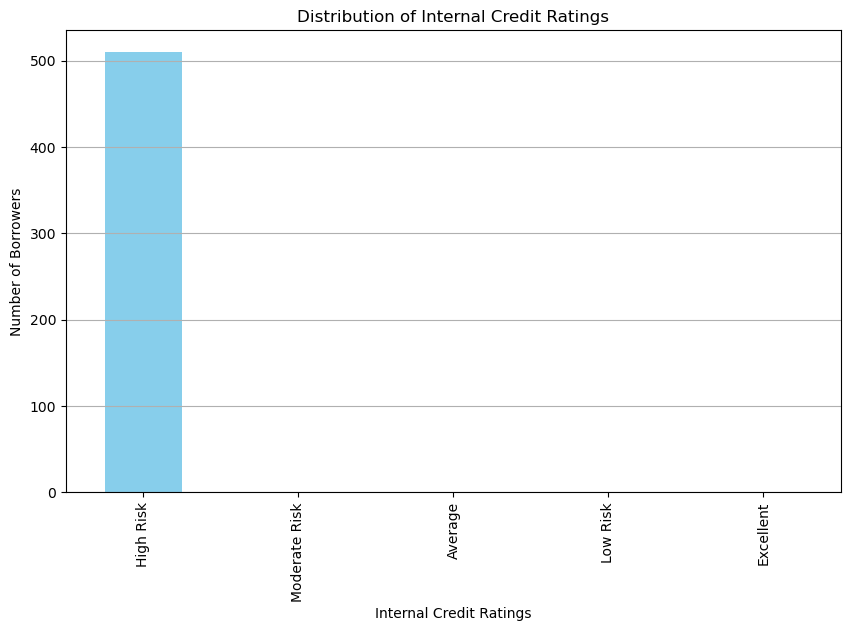

In [229]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate internal credit ratings as a decision-making tool
def simulate_credit_ratings_decision(num_borrowers):
    np.random.seed(42)

    # Generate synthetic data for internal credit scores
    data = pd.DataFrame(np.random.randn(num_borrowers, 1), columns=['Internal Credit Score'])

    # Convert internal credit scores to internal credit ratings
    bins = [0, 50, 65, 75, 85, 100]
    labels = ['High Risk', 'Moderate Risk', 'Average', 'Low Risk', 'Excellent']
    data['Internal Rating'] = pd.cut(data['Internal Credit Score'], bins=bins, labels=labels, right=False)

    # Visualize the distribution of internal credit ratings
    plt.figure(figsize=(10, 6))
    data['Internal Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    
    plt.title('Distribution of Internal Credit Ratings')
    plt.xlabel('Internal Credit Ratings')
    plt.ylabel('Number of Borrowers')
    plt.grid(axis='y')

# Specify parameters
num_borrowers = 1000

# Simulate and visualize internal credit ratings as a decision-making tool
simulate_credit_ratings_decision(num_borrowers)


### Aligning with External Ratings

Aligning internal credit ratings with external credit ratings is a strategic process that helps organizations create a cohesive and comprehensive approach to credit risk management. Here's how organizations can achieve alignment between internal and external credit ratings:

1. **Understand External Rating Methodologies:**
   - **How:** Gain a deep understanding of the methodologies used by external credit rating agencies. Familiarize yourself with the key factors, metrics, and criteria they consider when assigning credit ratings.

2. **Incorporate External Factors into Internal Models:**
   - **How:** Integrate external factors that influence credit risk into your internal credit rating models. This may include economic indicators, industry trends, and global market conditions considered by external agencies.

3. **Benchmark Internal Ratings Against External Ratings:**
   - **How:** Regularly benchmark your internal credit ratings against external ratings. Identify any significant divergences and analyze the reasons behind the disparities.

4. **Use External Ratings as Validation:**
   - **How:** Consider external ratings as a form of validation for your internal credit assessments. If there is consistency between internal and external ratings, it provides confidence in the accuracy of your internal models.

5. **Calibrate Internal Models:**
   - **How:** Periodically calibrate your internal credit rating models to ensure they align with the current methodologies and trends observed in external credit rating agencies. This helps maintain relevance and accuracy.

6. **Stress Testing Against External Scenarios:**
   - **How:** Conduct stress testing using scenarios that align with external economic and market conditions. This allows you to assess how your internal ratings respond to external shocks and changes.

7. **Regularly Update Internal Models:**
   - **How:** Keep your internal credit rating models up-to-date with the latest data and market information. Regular updates ensure that your internal ratings reflect the most current economic and financial conditions.

8. **Consider External Ratings in Decision-Making:**
   - **How:** Factor in external ratings when making significant financial decisions. While internal ratings are tailored to your organization's specific criteria, external ratings provide an industry-standard benchmark.

9. **Utilize a Consistent Rating Scale:**
    - **How:** Ensure that the rating scales used internally align with the scales used by external credit rating agencies. This consistency facilitates easier comparison and analysis.

10. **Engage in Dialogue with External Agencies:**
    - **How:** Establish a dialogue with external credit rating agencies to understand their perspectives and methodologies. This can provide valuable insights for refining your internal credit rating models.

11. **Provide Training and Education:**
    - **How:** Train internal teams on the factors considered by external credit rating agencies. This enhances the team's ability to align internal assessments with external benchmarks.

12. **Adjust Internal Ratings for Unique Business Context:**
    - **How:** While aligning with external factors, adjust internal ratings to account for your organization's unique business context and risk appetite. Tailor the models to suit the specific characteristics of your industry and operations.

13. **Continuous Monitoring and Feedback Loop:**
    - **How:** Establish a continuous monitoring process and feedback loop. Regularly review the alignment between internal and external ratings, seeking feedback from external agencies when necessary.

Aligning internal credit ratings with external credit ratings is an ongoing process that requires regular review, calibration, and adjustment. By integrating external insights into internal models, organizations can enhance the effectiveness of their credit risk management practices and decision-making.

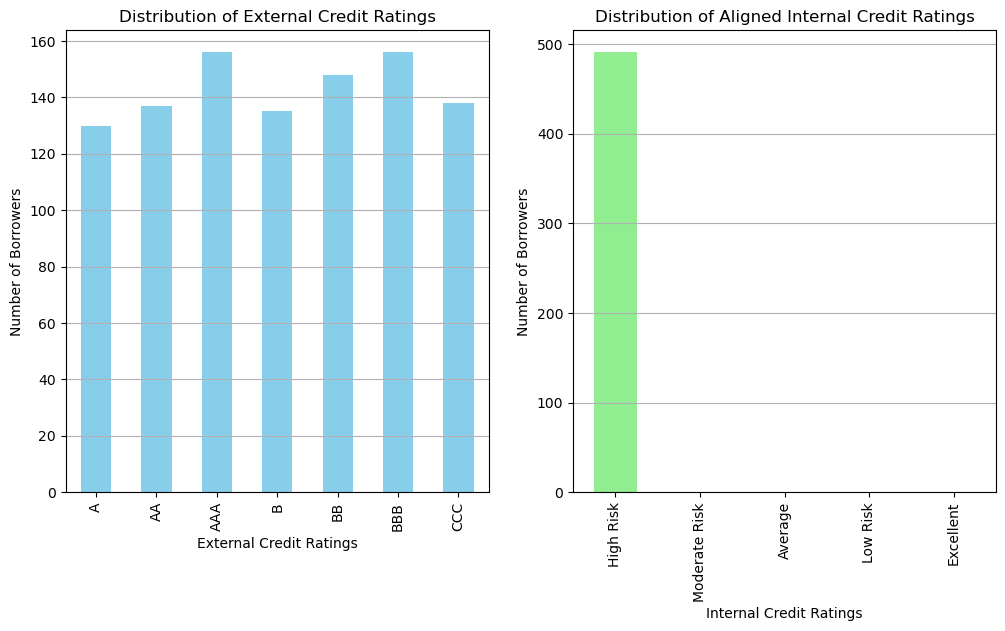

In [230]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate aligning external and internal credit ratings
def align_credit_ratings(num_borrowers):
    np.random.seed(42)

    # Generate synthetic data for external credit ratings
    external_ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']
    external_data = pd.DataFrame(np.random.choice(external_ratings, size=num_borrowers), columns=['External Rating'])

    # Generate synthetic data for internal credit scores
    internal_data = pd.DataFrame(np.random.randn(num_borrowers, 1), columns=['Internal Credit Score'])

    # Convert internal credit scores to internal credit ratings
    bins = [0, 50, 65, 75, 85, 100]
    labels = ['High Risk', 'Moderate Risk', 'Average', 'Low Risk', 'Excellent']
    internal_data['Internal Rating'] = pd.cut(internal_data['Internal Credit Score'], bins=bins, labels=labels, right=False)

    # Align external and internal credit ratings
    aligned_data = pd.concat([external_data, internal_data], axis=1)

    # Visualize the alignment of external and internal credit ratings
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    aligned_data['External Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Distribution of External Credit Ratings')
    plt.xlabel('External Credit Ratings')
    plt.ylabel('Number of Borrowers')
    plt.grid(axis='y')

    plt.subplot(1, 2, 2)
    aligned_data['Internal Rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Aligned Internal Credit Ratings')
    plt.xlabel('Internal Credit Ratings')
    plt.ylabel('Number of Borrowers')
    plt.grid(axis='y')

# Specify parameters
num_borrowers = 1000

# Simulate and visualize aligning external and internal credit ratings
align_credit_ratings(num_borrowers)


# Country Risk: Determinants, Measures and Implications

### Economic Factors

**Determinants of Country Risk:**

1. **Economic Indicators:**
   - **Examples:** GDP growth, inflation rates, unemployment rates, and overall economic stability.
   - **Rationale:** A country's economic performance and stability significantly influence its overall risk. Strong economic indicators contribute to lower country risk.

2. **External Debt Levels:**
   - **Examples:** Total external debt, debt-to-GDP ratio.
   - **Rationale:** High levels of external debt can indicate a higher risk of default, affecting a country's creditworthiness.

3. **Foreign Exchange Reserves:**
   - **Examples:** Adequacy of foreign exchange reserves.
   - **Rationale:** Sufficient reserves can act as a buffer against external shocks, reducing the risk of currency crises.

4. **Trade Balance:**
   - **Examples:** Trade surplus or deficit.
   - **Rationale:** A consistent trade deficit may signal vulnerability to external economic pressures.

5. **Political Stability:**
   - **Examples:** Government stability, political institutions.
   - **Rationale:** Political instability can create uncertainties, impacting economic policies and overall risk.

6. **Government Fiscal Policy:**
   - **Examples:** Fiscal discipline, budgetary practices.
   - **Rationale:** Sound fiscal policies contribute to economic stability and lower country risk.

7. **Monetary Policy:**
   - **Examples:** Central bank independence, inflation targeting.
   - **Rationale:** Effective monetary policies contribute to price stability and overall economic health.

**Measures of Country Risk:**

1. **Credit Ratings:**
   - **Explanation:** Assigned by credit rating agencies, credit ratings reflect the perceived creditworthiness of a country.
   - **Implications:** Higher ratings indicate lower country risk, influencing investor confidence.

2. **Country Risk Indices:**
   - **Explanation:** Composite indices that consider various risk factors.
   - **Implications:** Provide a holistic view of country risk, aiding decision-making for investors and businesses.

3. **Interest Rate Spreads:**
   - **Explanation:** The difference between a country's government bond yields and a risk-free benchmark.
   - **Implications:** Widening spreads suggest higher perceived risk, impacting borrowing costs for the country.

4. **Credit Default Swaps (CDS):**
   - **Explanation:** Financial instruments that provide insurance against the default of a country's debt.
   - **Implications:** Rising CDS prices indicate increased risk perception.

5. **Economic Outlook Reports:**
   - **Explanation:** Reports from international organizations and financial institutions assessing a country's economic prospects.
   - **Implications:** Provide insights into the expected trajectory of economic factors affecting country risk.

**Implications of Country Risk:**

1. **Capital Flows:**
   - **Impact:** Higher country risk may lead to reduced foreign investment and capital outflows.
   - **Implications:** Limits access to international capital markets and impacts economic growth.

2. **Currency Exchange Rates:**
   - **Impact:** Country risk influences currency exchange rates.
   - **Implications:** Higher risk can lead to currency depreciation, affecting trade balances and inflation.

3. **Cost of Borrowing:**
   - **Impact:** Higher country risk is associated with higher borrowing costs.
   - **Implications:** Governments and businesses face increased expenses when raising capital through debt instruments.

4. **Investor Confidence:**
   - **Impact:** Country risk directly affects investor confidence.
   - **Implications:** Lower confidence may result in reduced foreign direct investment and portfolio investment.

5. **Trade Relations:**
   - **Impact:** Countries with high risk may face challenges in international trade relations.
   - **Implications:** Trade partners may be cautious, impacting export-import dynamics.

6. **Policy Adjustments:**
   - **Impact:** Countries facing elevated risk may need to adjust economic policies.
   - **Implications:** Governments may implement austerity measures or seek international assistance.

Understanding and monitoring economic factors in relation to country risk is crucial for investors, businesses, and policymakers. It allows for informed decision-making, risk mitigation strategies, and a comprehensive assessment of a country's creditworthiness and economic stability.

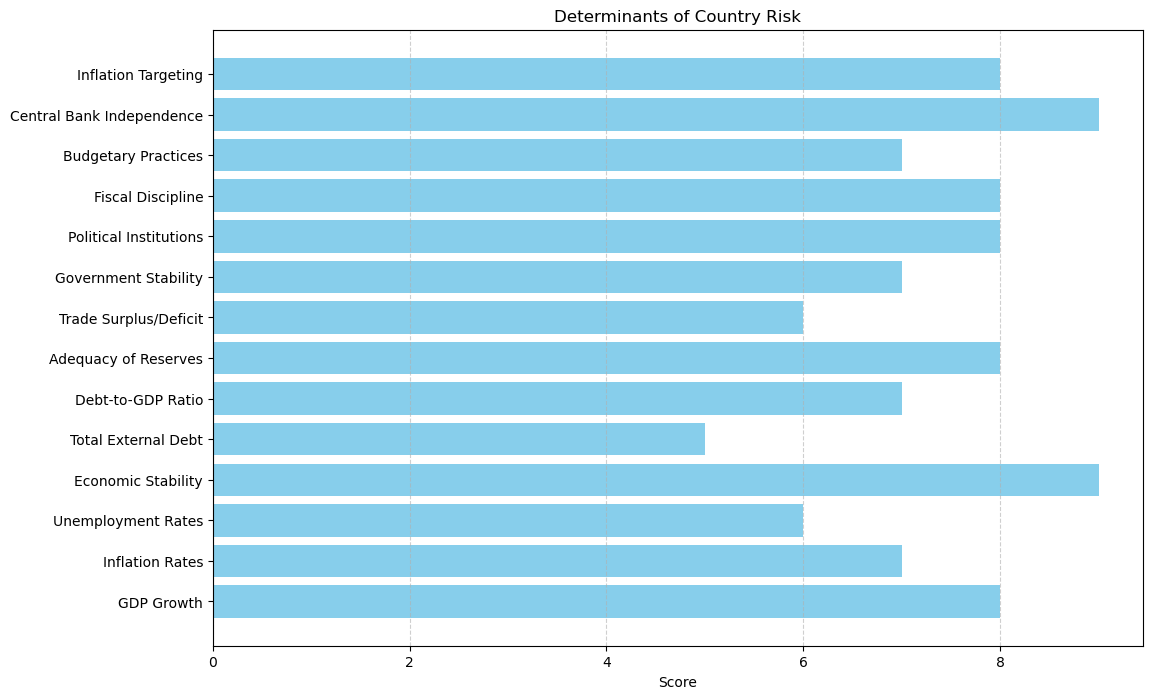

In [231]:
import matplotlib.pyplot as plt

# Economic Indicators
economic_indicators = ['GDP Growth', 'Inflation Rates', 'Unemployment Rates', 'Economic Stability']
economic_scores = [8, 7, 6, 9]

# External Debt Levels
debt_indicators = ['Total External Debt', 'Debt-to-GDP Ratio']
debt_scores = [5, 7]

# Foreign Exchange Reserves
reserves_indicators = ['Adequacy of Reserves']
reserves_scores = [8]

# Trade Balance
trade_balance_indicators = ['Trade Surplus/Deficit']
trade_balance_scores = [6]

# Political Stability
political_stability_indicators = ['Government Stability', 'Political Institutions']
political_stability_scores = [7, 8]

# Government Fiscal Policy
fiscal_policy_indicators = ['Fiscal Discipline', 'Budgetary Practices']
fiscal_policy_scores = [8, 7]

# Monetary Policy
monetary_policy_indicators = ['Central Bank Independence', 'Inflation Targeting']
monetary_policy_scores = [9, 8]

# Combine all indicators and scores
indicators = (
    economic_indicators + debt_indicators + reserves_indicators +
    trade_balance_indicators + political_stability_indicators +
    fiscal_policy_indicators + monetary_policy_indicators
)
scores = (
    economic_scores + debt_scores + reserves_scores +
    trade_balance_scores + political_stability_scores +
    fiscal_policy_scores + monetary_policy_scores
)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(indicators, scores, color='skyblue')
plt.xlabel('Score')
plt.title('Determinants of Country Risk')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


### Political Stability

**Determinants of Political Stability:**

1. **Government Stability:**
   - **Indicators:** Frequency of changes in government, political party stability.
   - **Rationale:** Frequent changes in government can lead to policy uncertainties and contribute to political instability.

2. **Political Institutions:**
   - **Indicators:** Strength and effectiveness of political institutions, rule of law.
   - **Rationale:** Strong institutions provide a stable governance framework, contributing to political stability.

3. **Corruption Levels:**
   - **Indicators:** Transparency, corruption perception indices.
   - **Rationale:** High levels of corruption can erode trust in government and contribute to political instability.

4. **Civil Unrest and Protests:**
   - **Indicators:** Incidence of civil unrest, social protests.
   - **Rationale:** Frequent protests and unrest can indicate dissatisfaction with governance and political instability.

5. **Ethnic and Religious Harmony:**
   - **Indicators:** Inter-ethnic and inter-religious relations.
   - **Rationale:** Discord among ethnic or religious groups can contribute to political instability.

**Measures of Political Stability:**

1. **Political Risk Indices:**
   - **Explanation:** Indices that assess the overall political risk of a country.
   - **Implications:** Provide a comprehensive view of political stability, aiding investors and businesses in decision-making.

2. **Political Stability and Absence of Violence Index (PSAVI):**
   - **Explanation:** An index that measures the likelihood of political instability and violence.
   - **Implications:** Offers insights into the risk of political disruptions.

3. **Government Effectiveness Index:**
   - **Explanation:** An index assessing the effectiveness of a country's government.
   - **Implications:** Reflects the ability of the government to provide stable governance.

4. **Corruption Perception Index (CPI):**
   - **Explanation:** A global measure of public sector corruption.
   - **Implications:** Indicates the level of corruption, which can impact political stability.

5. **Freedom House Index:**
   - **Explanation:** Rates countries based on political rights and civil liberties.
   - **Implications:** Provides insights into the level of political freedoms and stability.

**Implications of Political Stability on Country Risk:**

1. **Investor Confidence:**
   - **Impact:** Political stability influences investor confidence.
   - **Implications:** Stable political environments attract foreign investment and contribute to economic growth.

2. **Economic Policy Continuity:**
   - **Impact:** Political stability supports continuity in economic policies.
   - **Implications:** Investors are more confident in making long-term commitments when policies remain consistent.

3. **Foreign Direct Investment (FDI):**
   - **Impact:** Stable political environments attract FDI.
   - **Implications:** Increased FDI contributes to economic development and job creation.

4. **Trade Relations:**
   - **Impact:** Political stability affects international trade relations.
   - **Implications:** Stable political environments facilitate positive trade relations and agreements.

5. **Government Borrowing Costs:**
   - **Impact:** Political stability influences government bond yields.
   - **Implications:** Stable political environments are associated with lower borrowing costs for governments.

6. **Social Stability:**
   - **Impact:** Political stability contributes to social stability.
   - **Implications:** Reduced likelihood of civil unrest and protests, fostering a more secure and conducive environment for businesses.

7. **Long-Term Economic Growth:**
   - **Impact:** Political stability is a key determinant of long-term economic growth.
   - **Implications:** Countries with stable political environments are better positioned for sustained economic development.

8. **Policy Implementation:**
   - **Impact:** Stable political environments facilitate effective policy implementation.
   - **Implications:** Governments can implement economic and social policies more efficiently.

Political stability is a critical component of country risk, influencing economic performance, investor confidence, and overall societal well-being. Assessing and monitoring political stability is essential for making informed decisions related to investment, trade, and international relations.

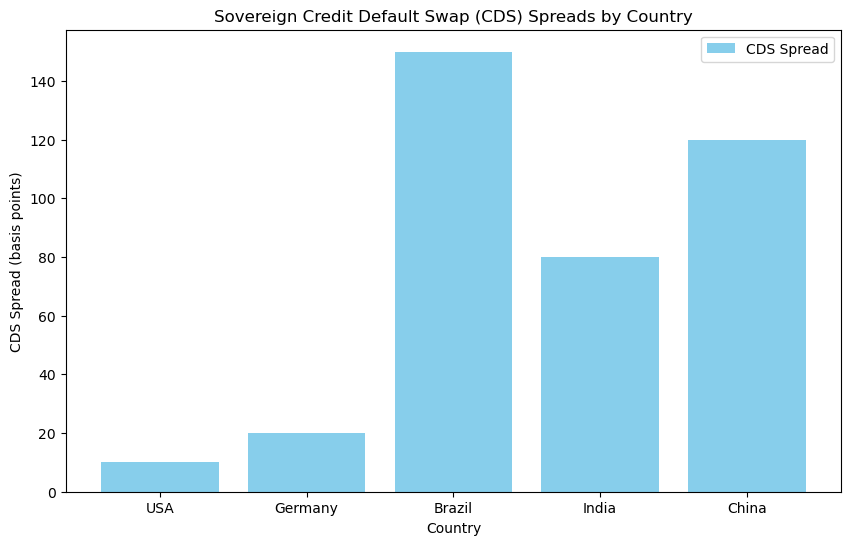

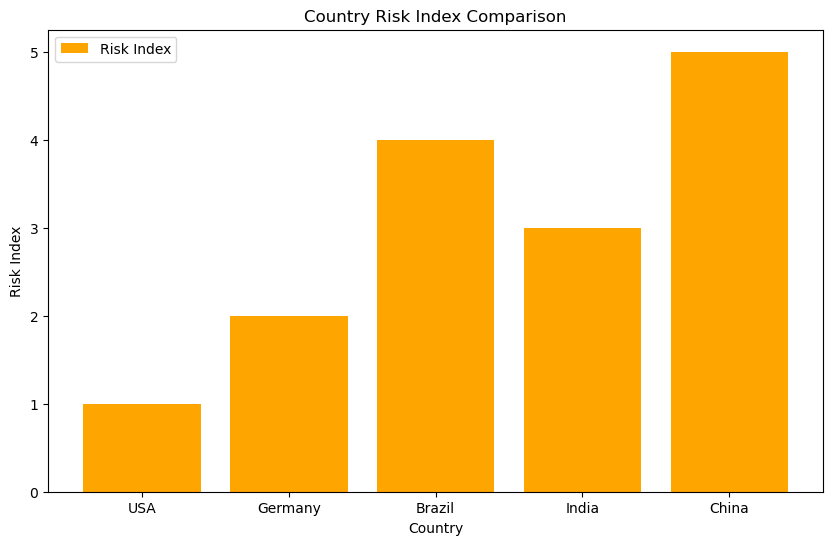

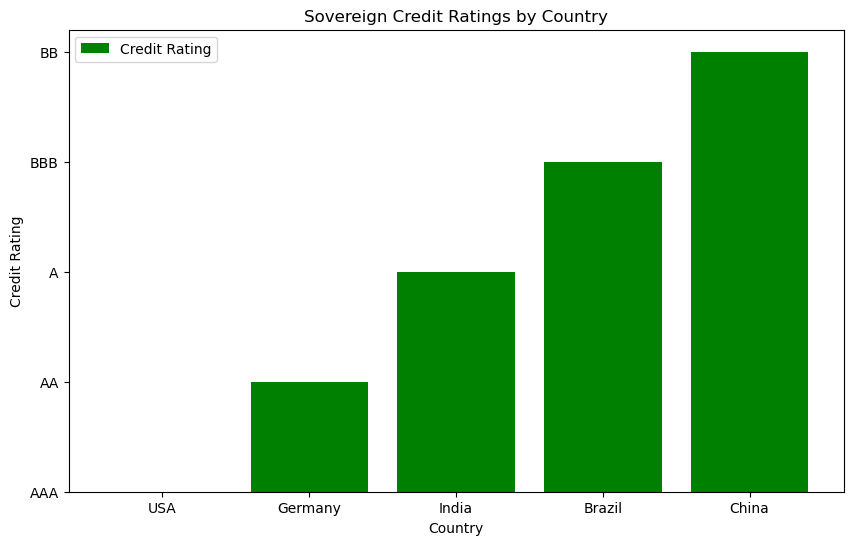

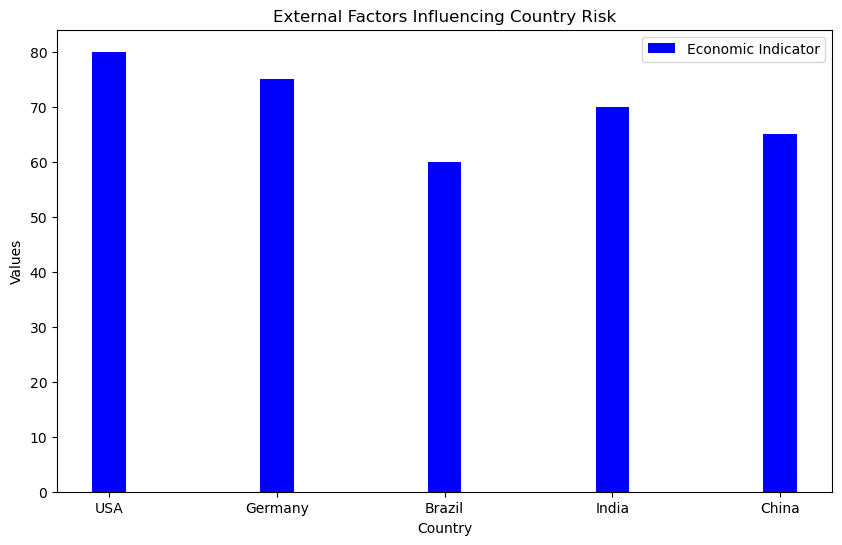

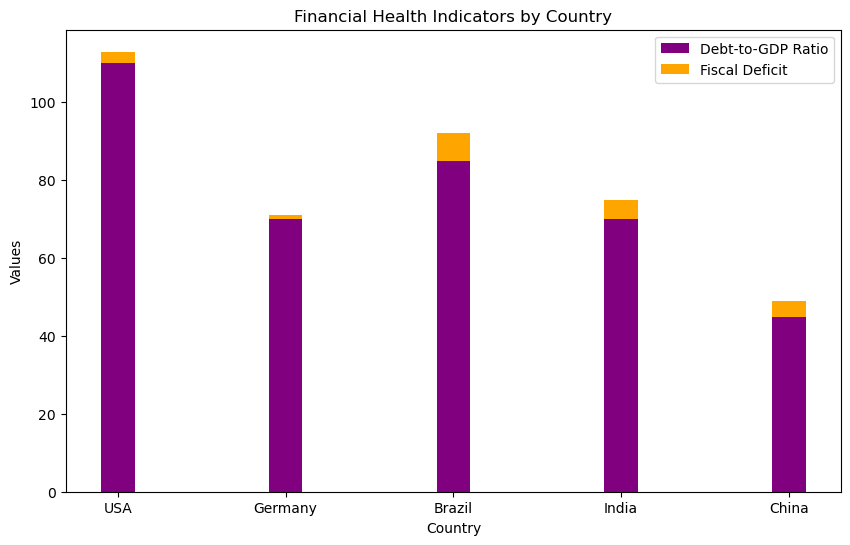

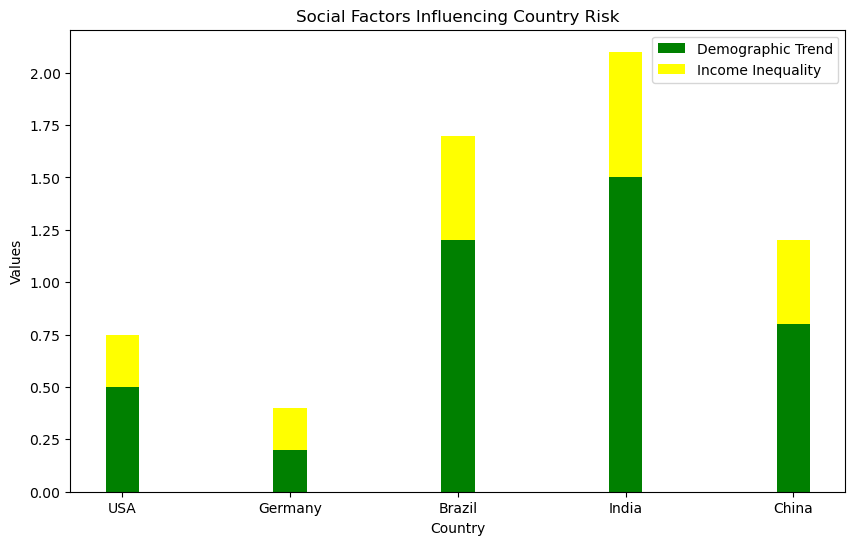

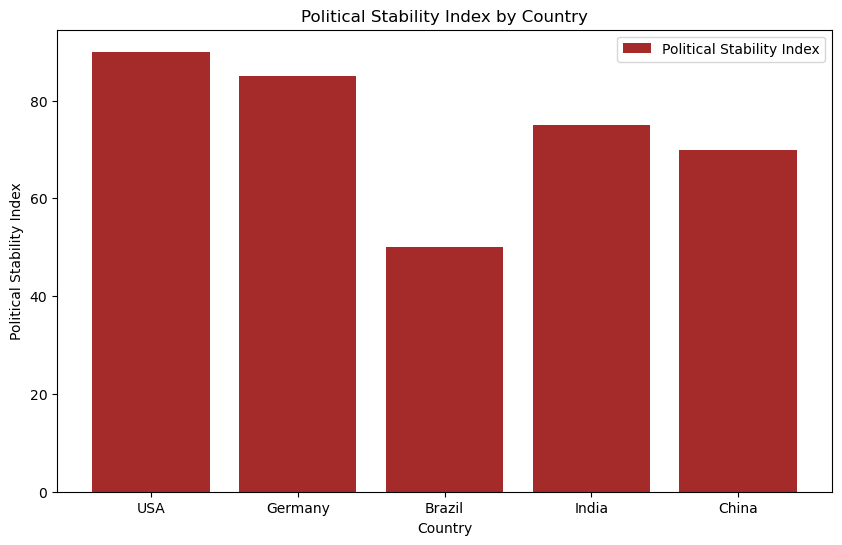

In [232]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

data_external_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Economic_Indicator': [80, 75, 60, 70, 65],  # Hypothetical economic indicator values
}

data_financial_health = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Debt_to_GDP_Ratio': [110, 70, 85, 70, 45],  # Hypothetical government debt-to-GDP ratio (%)
    'Fiscal_Deficit': [3, 1, 7, 5, 4],  # Hypothetical fiscal deficit (% of GDP)
}

data_social_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Demographic_Trend': [0.5, 0.2, 1.2, 1.5, 0.8],  # Hypothetical demographic trend (% population growth)
    'Income_Inequality': [0.25, 0.2, 0.5, 0.6, 0.4],  # Hypothetical income inequality index
}

data_political_stability = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Political_Stability_Index': [90, 85, 50, 75, 70],  # Hypothetical political stability index
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)
df_external_factors = pd.DataFrame(data_external_factors)
df_financial_health = pd.DataFrame(data_financial_health)
df_social_factors = pd.DataFrame(data_social_factors)
df_political_stability = pd.DataFrame(data_political_stability)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

# Plotting External Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_external_factors['Country']))
plt.bar(index, df_external_factors['Economic_Indicator'], width=bar_width, color='blue', label='Economic Indicator')
plt.title('External Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_external_factors['Country'])
plt.legend()
plt.show()

# Plotting Financial Health Indicators
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_financial_health['Country']))
plt.bar(index, df_financial_health['Debt_to_GDP_Ratio'], width=bar_width, color='purple', label='Debt-to-GDP Ratio')
plt.bar(index, df_financial_health['Fiscal_Deficit'], width=bar_width, color='orange', label='Fiscal Deficit', bottom=df_financial_health['Debt_to_GDP_Ratio'])
plt.title('Financial Health Indicators by Country')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_financial_health['Country'])
plt.legend()
plt.show()

# Plotting Social Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_social_factors['Country']))
plt.bar(index, df_social_factors['Demographic_Trend'], width=bar_width, color='green', label='Demographic Trend')
plt.bar(index, df_social_factors['Income_Inequality'], width=bar_width, color='yellow', label='Income Inequality', bottom=df_social_factors['Demographic_Trend'])
plt.title('Social Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_social_factors['Country'])
plt.legend()
plt.show()

# Plotting Political Stability
plt.figure(figsize=(10, 6))
plt.bar(df_political_stability['Country'], df_political_stability['Political_Stability_Index'], color='brown', label='Political Stability Index')
plt.title('Political Stability Index by Country')
plt.xlabel('Country')
plt.ylabel('Political Stability Index')
plt.legend()
plt.show()

### Social Factors

**Determinants of Social Factors in Country Risk:**

1. **Income Inequality:**
   - **Indicators:** Gini coefficient, wealth distribution.
   - **Rationale:** High income inequality can lead to social unrest and impact political stability, contributing to country risk.

2. **Education Levels:**
   - **Indicators:** Literacy rates, access to education.
   - **Rationale:** Adequate education contributes to a skilled workforce and societal development, reducing long-term country risk.

3. **Healthcare Infrastructure:**
   - **Indicators:** Access to healthcare, healthcare quality.
   - **Rationale:** Effective healthcare infrastructure reduces the burden of disease and contributes to social well-being.

4. **Demographic Trends:**
   - **Indicators:** Population growth, age distribution.
   - **Rationale:** Population dynamics influence labor markets, social services, and overall economic stability.

5. **Social Cohesion:**
   - **Indicators:** Social harmony, community engagement.
   - **Rationale:** Social cohesion contributes to stability and resilience against economic and political shocks.

**Measures of Social Factors:**

1. **Human Development Index (HDI):**
   - **Explanation:** A composite index assessing education, income, and life expectancy.
   - **Implications:** Provides insights into the overall social development of a country.

2. **Social Progress Index:**
   - **Explanation:** Measures social and environmental performance.
   - **Implications:** Offers a holistic view of social factors affecting country risk.

3. **Gender Inequality Index (GII):**
   - **Explanation:** Measures gender-based discrimination.
   - **Implications:** Reflects societal inclusivity and equity, impacting social stability.

4. **Access to Basic Services:**
   - **Explanation:** Assessing access to essential services like clean water, sanitation, and electricity.
   - **Implications:** Access to basic services is indicative of societal well-being and development.

5. **Social Unrest Indicators:**
   - **Explanation:** Incidence of social protests, strikes, or civil unrest.
   - **Implications:** High levels of social unrest can contribute to political instability and increase country risk.

**Implications of Social Factors on Country Risk:**

1. **Workforce Productivity:**
   - **Impact:** Social factors influence the productivity and skill levels of the workforce.
   - **Implications:** Countries with well-educated and healthy populations are more likely to have higher workforce productivity, reducing economic risk.

2. **Healthcare Resilience:**
   - **Impact:** Social factors impact the resilience of healthcare systems.
   - **Implications:** Robust healthcare infrastructure contributes to better disease management and reduces the societal and economic impact of health crises.

3. **Social Inclusion:**
   - **Impact:** Social inclusivity influences social stability.
   - **Implications:** Inclusive societies are generally more resilient and less prone to social unrest, contributing to overall stability.

4. **Human Capital Development:**
   - **Impact:** Social factors contribute to the development of human capital.
   - **Implications:** Well-educated and skilled populations contribute to innovation, economic growth, and reduced long-term country risk.

5. **Social Resilience to Shocks:**
   - **Impact:** Social factors determine the ability of a society to withstand and recover from economic and environmental shocks.
   - **Implications:** Socially resilient societies are better equipped to navigate challenges, reducing overall country risk.

6. **Cultural and Social Stability:**
   - **Impact:** Social cohesion and stability influence overall cultural and social dynamics.
   - **Implications:** Countries with strong social cohesion are likely to have more predictable and stable social environments.

7. **Social Progress and Well-Being:**
   - **Impact:** Social factors directly contribute to the overall well-being of the population.
   - **Implications:** Improved well-being is associated with greater societal contentment, reducing the risk of social unrest.

Social factors play a significant role in shaping the fabric of societies and impact the overall risk profile of countries. Understanding and addressing social determinants contribute to building resilient and sustainable nations, ultimately reducing country risk.

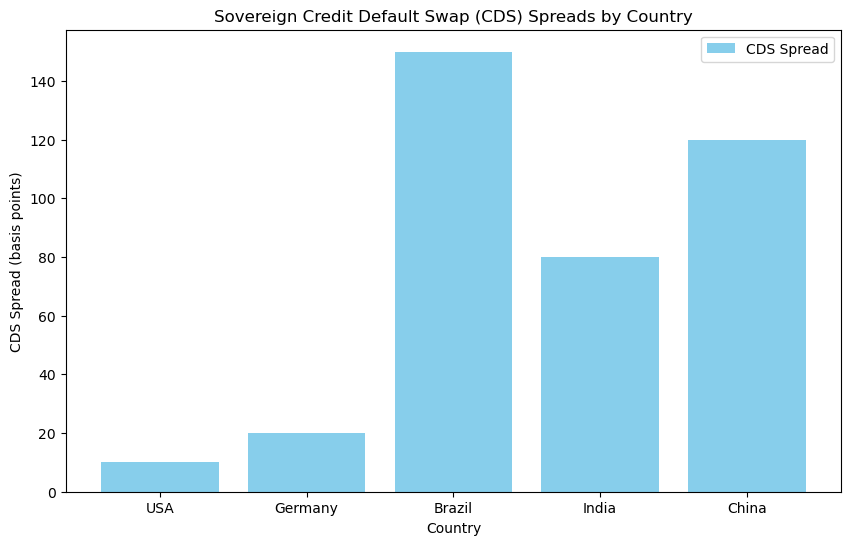

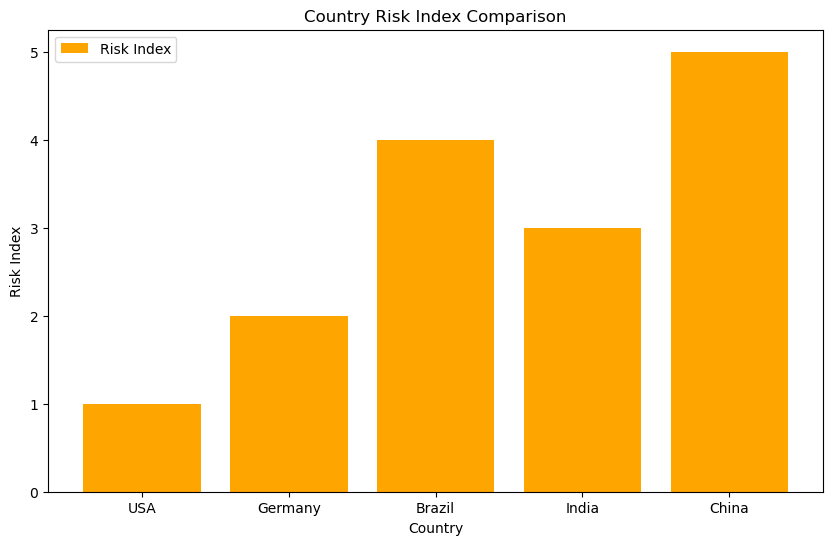

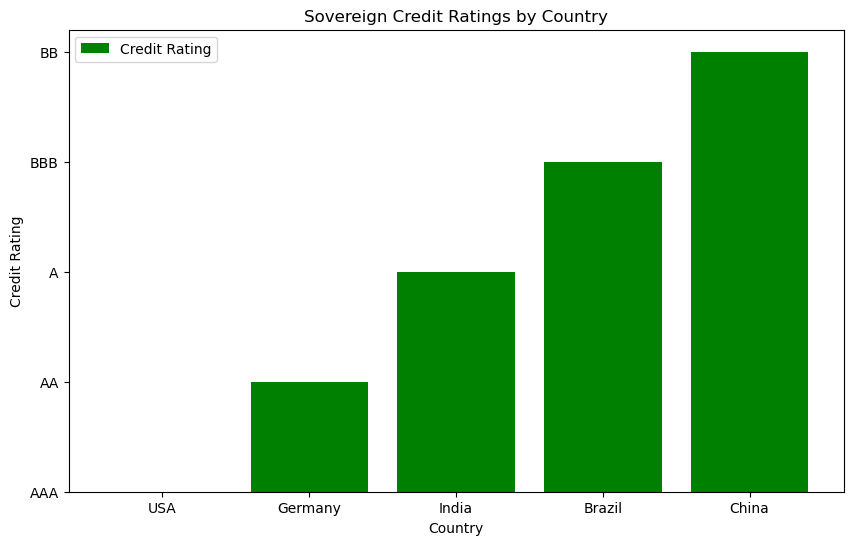

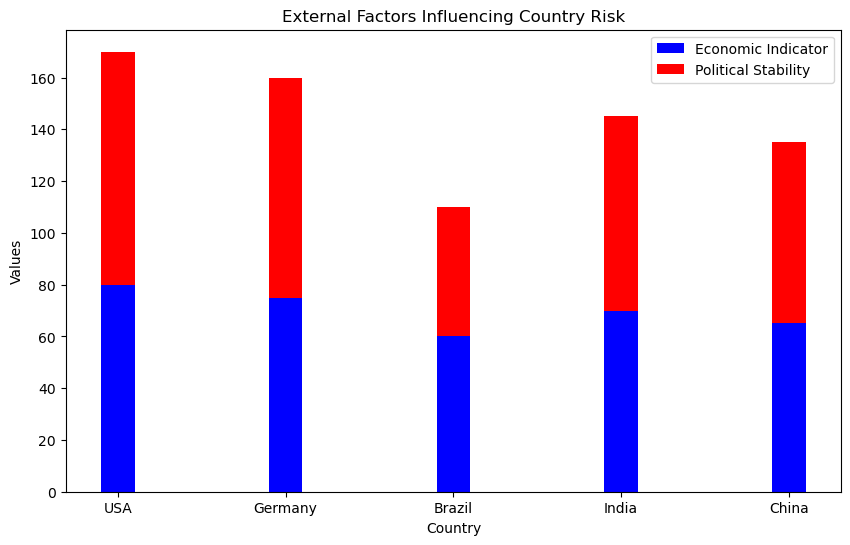

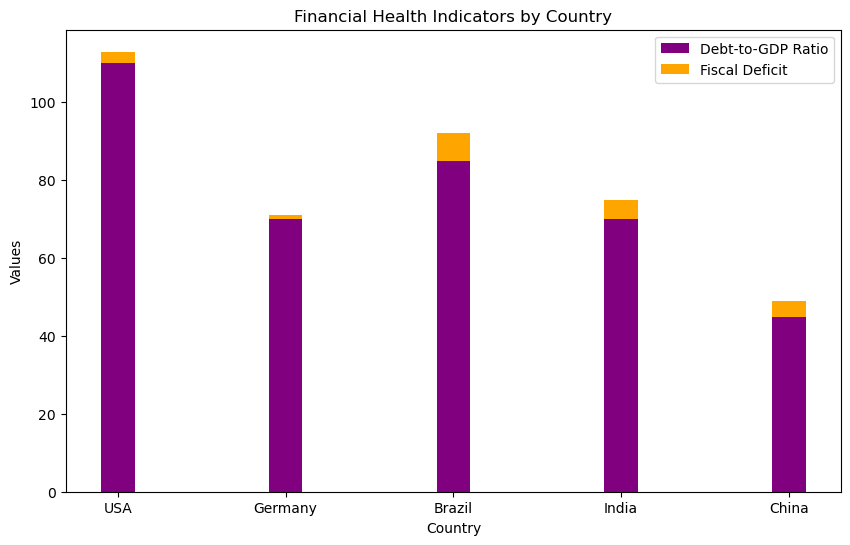

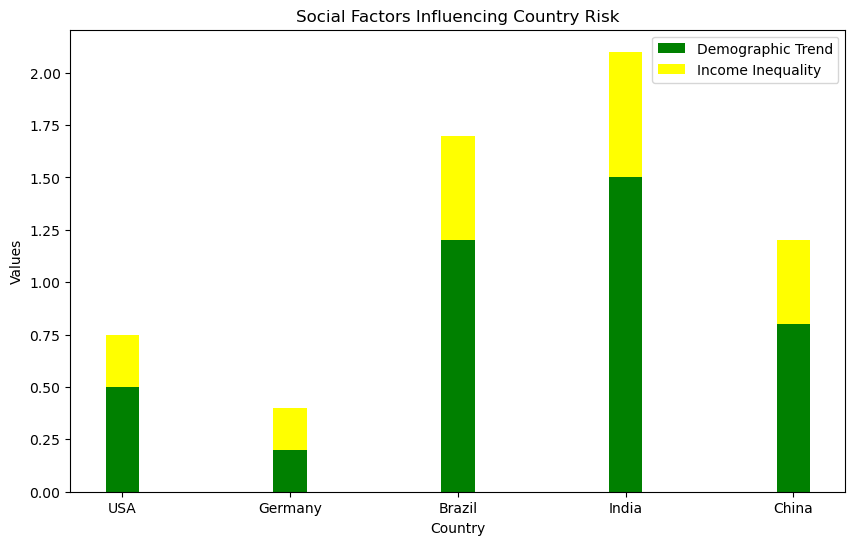

In [233]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

data_external_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Economic_Indicator': [80, 75, 60, 70, 65],  # Hypothetical economic indicator values
    'Political_Stability': [90, 85, 50, 75, 70],  # Hypothetical political stability values
}

data_financial_health = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Debt_to_GDP_Ratio': [110, 70, 85, 70, 45],  # Hypothetical government debt-to-GDP ratio (%)
    'Fiscal_Deficit': [3, 1, 7, 5, 4],  # Hypothetical fiscal deficit (% of GDP)
}

data_social_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Demographic_Trend': [0.5, 0.2, 1.2, 1.5, 0.8],  # Hypothetical demographic trend (% population growth)
    'Income_Inequality': [0.25, 0.2, 0.5, 0.6, 0.4],  # Hypothetical income inequality index
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)
df_external_factors = pd.DataFrame(data_external_factors)
df_financial_health = pd.DataFrame(data_financial_health)
df_social_factors = pd.DataFrame(data_social_factors)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

# Plotting External Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_external_factors['Country']))
plt.bar(index, df_external_factors['Economic_Indicator'], width=bar_width, color='blue', label='Economic Indicator')
plt.bar(index, df_external_factors['Political_Stability'], width=bar_width, color='red', label='Political Stability', bottom=df_external_factors['Economic_Indicator'])
plt.title('External Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_external_factors['Country'])
plt.legend()
plt.show()

# Plotting Financial Health Indicators
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_financial_health['Country']))
plt.bar(index, df_financial_health['Debt_to_GDP_Ratio'], width=bar_width, color='purple', label='Debt-to-GDP Ratio')
plt.bar(index, df_financial_health['Fiscal_Deficit'], width=bar_width, color='orange', label='Fiscal Deficit', bottom=df_financial_health['Debt_to_GDP_Ratio'])
plt.title('Financial Health Indicators by Country')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_financial_health['Country'])
plt.legend()
plt.show()

# Plotting Social Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_social_factors['Country']))
plt.bar(index, df_social_factors['Demographic_Trend'], width=bar_width, color='green', label='Demographic Trend')
plt.bar(index, df_social_factors['Income_Inequality'], width=bar_width, color='yellow', label='Income Inequality', bottom=df_social_factors['Demographic_Trend'])
plt.title('Social Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_social_factors['Country'])
plt.legend()
plt.show()

### Financial Health

**Determinants of Financial Health in Country Risk:**

1. **Government Debt Levels:**
   - **Indicators:** Total government debt, debt-to-GDP ratio.
   - **Rationale:** High levels of government debt can lead to fiscal vulnerabilities and impact a country's overall financial health.

2. **External Debt and Debt Servicing Capacity:**
   - **Indicators:** External debt levels, debt servicing capabilities.
   - **Rationale:** A high reliance on external debt without adequate servicing capacity can lead to financial instability.

3. **Current Account Balance:**
   - **Indicators:** Trade balance, current account surplus or deficit.
   - **Rationale:** Persistent current account deficits may indicate external financial vulnerabilities.

4. **Foreign Exchange Reserves:**
   - **Indicators:** Adequacy of foreign exchange reserves.
   - **Rationale:** Sufficient reserves act as a buffer against external shocks, contributing to financial stability.

5. **Banking Sector Stability:**
   - **Indicators:** Capital adequacy, non-performing loans.
   - **Rationale:** A stable and well-regulated banking sector is crucial for overall financial health.

**Measures of Financial Health:**

1. **Credit Ratings:**
   - **Explanation:** Assigned by credit rating agencies, reflecting a country's creditworthiness.
   - **Implications:** Higher ratings indicate better financial health and lower country risk.

2. **Sovereign Credit Default Swaps (CDS):**
   - **Explanation:** Financial instruments measuring the cost of insuring against a sovereign default.
   - **Implications:** Rising CDS prices indicate increased perceived financial risk.

3. **Fiscal Policy Measures:**
   - **Explanation:** Assessment of government fiscal policies.
   - **Implications:** Sound fiscal policies contribute to financial stability.

4. **External Debt Sustainability Analysis (DSA):**
   - **Explanation:** Evaluation of a country's ability to service its external debt.
   - **Implications:** Provides insights into the sustainability of external debt levels.

5. **Financial Soundness Indicators (FSIs):**
   - **Explanation:** Metrics assessing the overall financial health of a country.
   - **Implications:** Indicate the strength and resilience of the financial system.

**Implications of Financial Health on Country Risk:**

1. **Borrowing Costs:**
   - **Impact:** Financial health influences government borrowing costs.
   - **Implications:** Countries with better financial health enjoy lower borrowing costs, contributing to fiscal sustainability.

2. **Investor Confidence:**
   - **Impact:** Financial health is a key determinant of investor confidence.
   - **Implications:** Strong financial health attracts foreign investment and contributes to economic growth.

3. **Currency Stability:**
   - **Impact:** Financial stability influences currency stability.
   - **Implications:** A stable currency reduces the risk of currency crises and enhances economic predictability.

4. **Trade and Economic Growth:**
   - **Impact:** Financial health influences trade dynamics and overall economic growth.
   - **Implications:** Well-managed finances contribute to sustainable economic development.

5. **Banking Sector Resilience:**
   - **Impact:** Financial health is crucial for the resilience of the banking sector.
   - **Implications:** A stable banking sector contributes to overall financial stability.

6. **Government Fiscal Space:**
   - **Impact:** Financial health determines the government's ability to respond to economic shocks.
   - **Implications:** Countries with fiscal space can implement counter-cyclical policies to mitigate economic downturns.

7. **External Financing and Debt Sustainability:**
   - **Impact:** Financial health influences a country's ability to attract external financing.
   - **Implications:** Sustainable external financing contributes to overall financial resilience.

8. **Creditworthiness in International Markets:**
   - **Impact:** Financial health determines a country's creditworthiness in international markets.
   - **Implications:** Higher creditworthiness enhances a country's access to international capital markets.

9. **Resilience to External Shocks:**
   - **Impact:** Financially healthy countries are more resilient to external economic shocks.
   - **Implications:** Resilience reduces the risk of financial crises and contributes to long-term stability.

Understanding and monitoring the financial health of a country is essential for assessing its overall risk profile. A sound financial foundation contributes to economic resilience, investor confidence, and the sustainable development of nations.

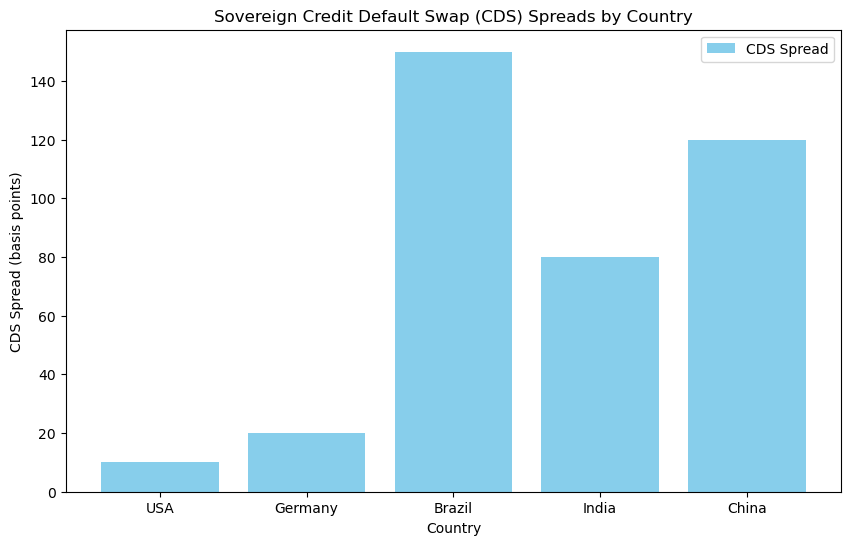

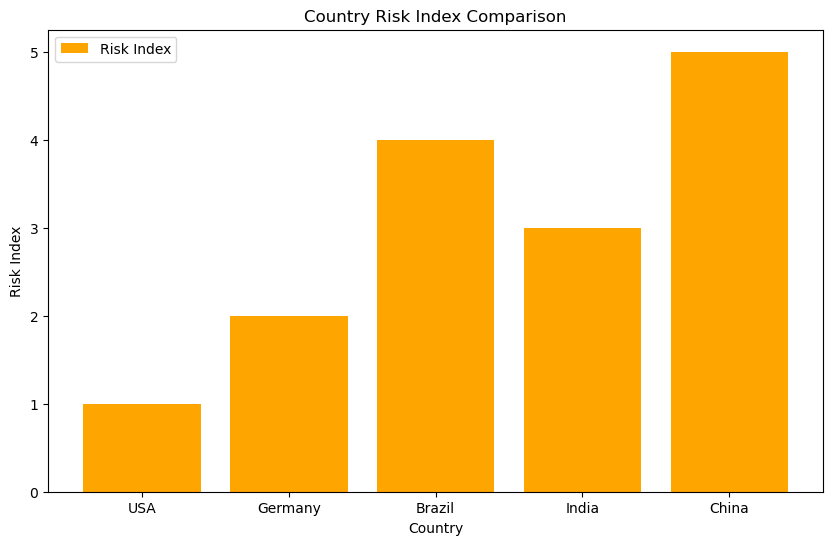

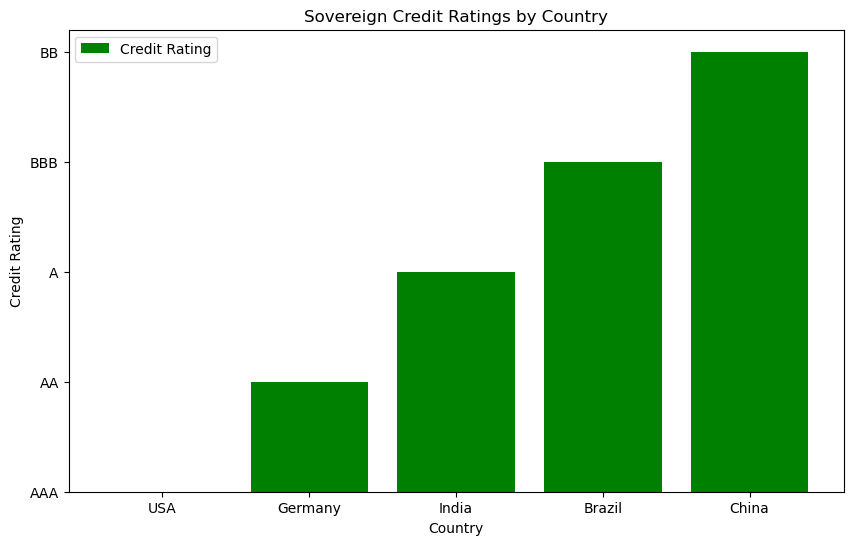

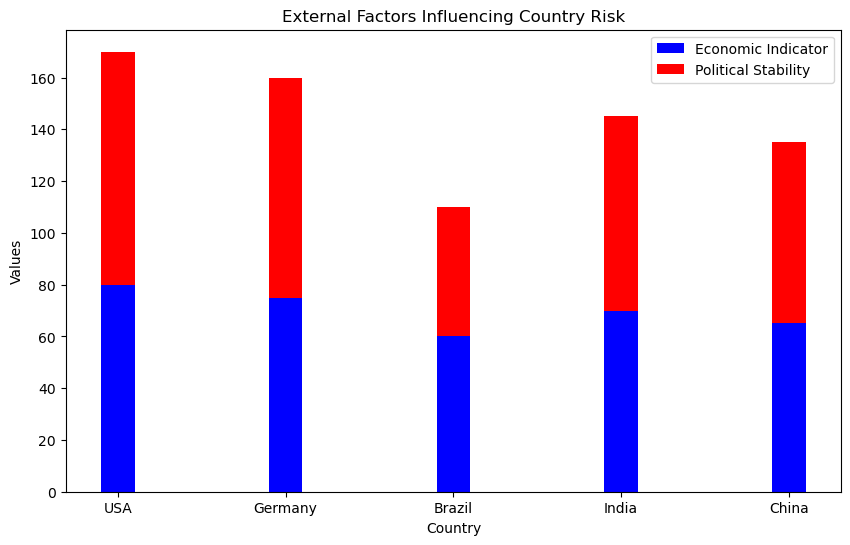

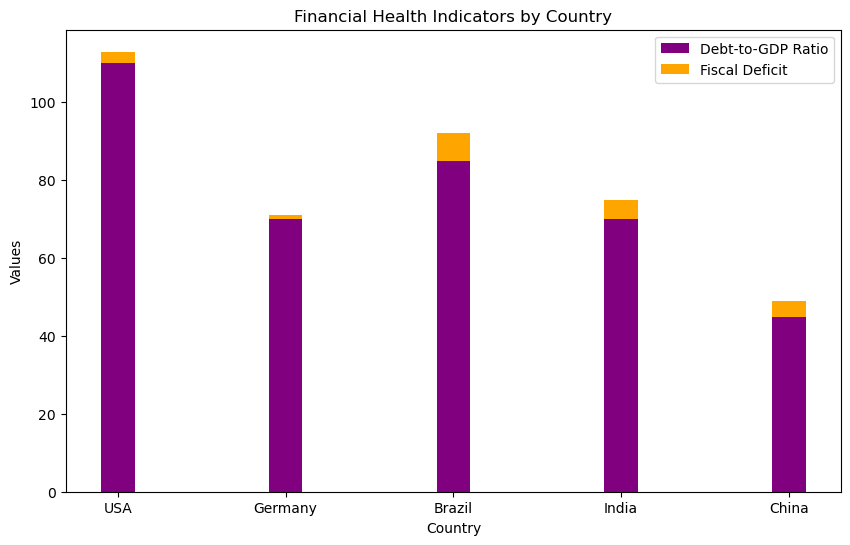

In [234]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

data_external_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Economic_Indicator': [80, 75, 60, 70, 65],  # Hypothetical economic indicator values
    'Political_Stability': [90, 85, 50, 75, 70],  # Hypothetical political stability values
}

data_financial_health = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Debt_to_GDP_Ratio': [110, 70, 85, 70, 45],  # Hypothetical government debt-to-GDP ratio (%)
    'Fiscal_Deficit': [3, 1, 7, 5, 4],  # Hypothetical fiscal deficit (% of GDP)
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)
df_external_factors = pd.DataFrame(data_external_factors)
df_financial_health = pd.DataFrame(data_financial_health)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

# Plotting External Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_external_factors['Country']))
plt.bar(index, df_external_factors['Economic_Indicator'], width=bar_width, color='blue', label='Economic Indicator')
plt.bar(index, df_external_factors['Political_Stability'], width=bar_width, color='red', label='Political Stability', bottom=df_external_factors['Economic_Indicator'])
plt.title('External Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_external_factors['Country'])
plt.legend()
plt.show()

# Plotting Financial Health Indicators
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_financial_health['Country']))
plt.bar(index, df_financial_health['Debt_to_GDP_Ratio'], width=bar_width, color='purple', label='Debt-to-GDP Ratio')
plt.bar(index, df_financial_health['Fiscal_Deficit'], width=bar_width, color='orange', label='Fiscal Deficit', bottom=df_financial_health['Debt_to_GDP_Ratio'])
plt.title('Financial Health Indicators by Country')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_financial_health['Country'])
plt.legend()
plt.show()

### External Factors

**Determinants of External Factors in Country Risk:**

1. **Global Economic Conditions:**
   - **Indicators:** Global economic growth, trade dynamics.
   - **Rationale:** External economic conditions can impact a country's export earnings, foreign investment, and overall economic stability.

2. **Commodity Prices:**
   - **Indicators:** Prices of key commodities.
   - **Rationale:** Countries dependent on commodity exports are vulnerable to fluctuations in prices, affecting their external revenue.

3. **Global Financial Markets:**
   - **Indicators:** Stock market trends, interest rates.
   - **Rationale:** Volatility in global financial markets can impact a country's capital flows and borrowing costs.

4. **Geopolitical Stability:**
   - **Indicators:** Regional conflicts, geopolitical tensions.
   - **Rationale:** Geopolitical instability can have spillover effects, impacting a country's risk profile.

5. **Global Health Crises:**
   - **Indicators:** Pandemics, health emergencies.
   - **Rationale:** Health crises can disrupt global trade, travel, and supply chains, affecting a country's economic performance.

**Measures of External Factors:**

1. **Global Economic Outlook Reports:**
   - **Explanation:** Reports assessing the global economic climate.
   - **Implications:** Provide insights into external economic conditions affecting country risk.

2. **Commodity Price Indices:**
   - **Explanation:** Indices reflecting the prices of key commodities.
   - **Implications:** Indicate the external economic challenges faced by countries reliant on commodity exports.

3. **Global Risk Indices:**
   - **Explanation:** Composite indices assessing global risks.
   - **Implications:** Offer insights into external risk factors that can impact multiple countries.

4. **Geopolitical Risk Assessments:**
   - **Explanation:** Evaluations of geopolitical stability.
   - **Implications:** Assess the external geopolitical factors influencing country risk.

5. **Global Trade and Supply Chain Indicators:**
   - **Explanation:** Metrics reflecting global trade and supply chain dynamics.
   - **Implications:** Indicate the external trade environment and potential vulnerabilities.

**Implications of External Factors on Country Risk:**

1. **Export Performance:**
   - **Impact:** External factors influence a country's export performance.
   - **Implications:** Changes in global demand, commodity prices, or trade dynamics can impact a country's external revenue.

2. **Foreign Direct Investment (FDI):**
   - **Impact:** External conditions affect the inflow of foreign investment.
   - **Implications:** Volatility in global financial markets or geopolitical tensions can impact FDI levels.

3. **Access to International Capital Markets:**
   - **Impact:** External factors influence a country's ability to access capital in international markets.
   - **Implications:** Changes in global interest rates or perceptions of risk affect borrowing costs.

4. **Currency Exchange Rates:**
   - **Impact:** External factors impact currency exchange rates.
   - **Implications:** Currency volatility can affect trade balances, inflation, and overall economic stability.

5. **Global Economic Growth:**
   - **Impact:** External economic conditions influence global growth.
   - **Implications:** Slowdowns in global growth can affect a country's export markets and economic performance.

6. **Global Supply Chain Disruptions:**
   - **Impact:** External events, such as pandemics or trade tensions, can disrupt global supply chains.
   - **Implications:** Disruptions impact a country's production, trade, and economic resilience.

7. **Global Financing Conditions:**
   - **Impact:** External financial market conditions influence a country's ability to raise capital.
   - **Implications:** Tightening global financial conditions can increase borrowing costs for countries.

8. **Spillover Effects of Global Events:**
   - **Impact:** External shocks, such as geopolitical events, can have spillover effects.
   - **Implications:** Spillovers can impact a country's risk profile through changes in investor sentiment or economic conditions.

9. **Global Risk Sentiment:**
   - **Impact:** External risk perceptions influence global risk sentiment.
   - **Implications:** Changes in global risk sentiment can affect capital flows and investment decisions.

10. **International Trade Relations:**
    - **Impact:** External factors influence international trade relations.
    - **Implications:** Trade tensions or disruptions can impact a country's trade dynamics and economic stability.

Understanding and navigating external factors is crucial for assessing and managing country risk. External conditions can have far-reaching implications for a country's economic performance, financial stability, and overall risk profile.

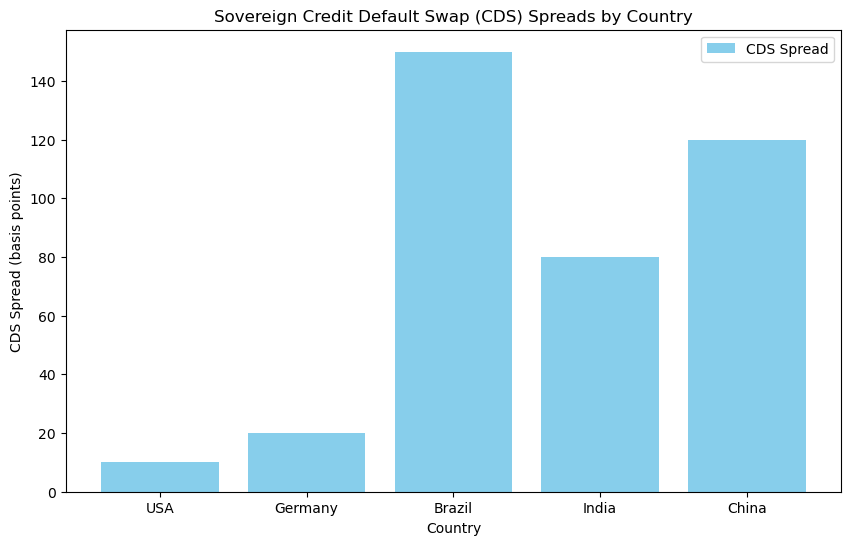

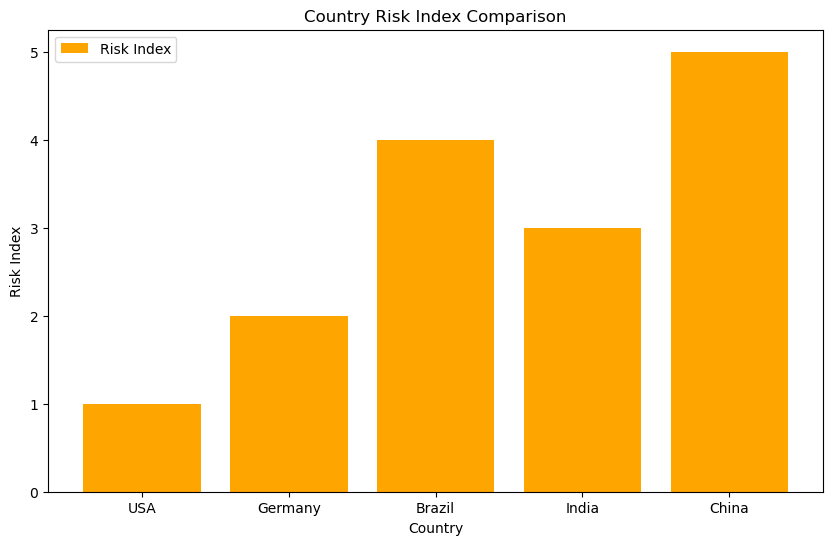

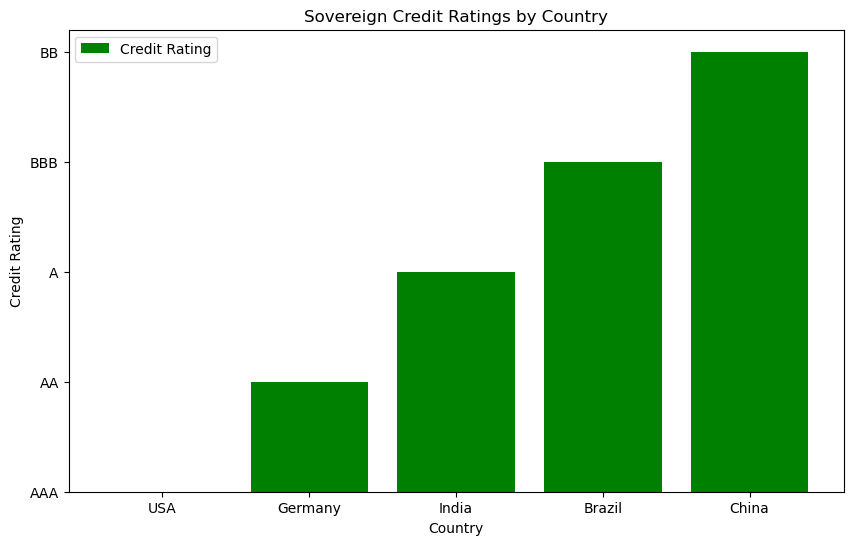

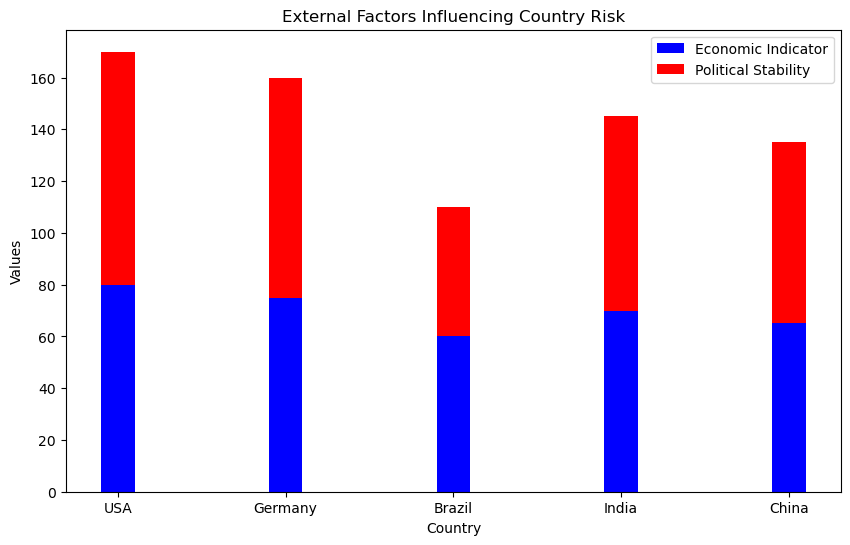

In [235]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

data_external_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Economic_Indicator': [80, 75, 60, 70, 65],  # Hypothetical economic indicator values
    'Political_Stability': [90, 85, 50, 75, 70],  # Hypothetical political stability values
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)
df_external_factors = pd.DataFrame(data_external_factors)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

# Plotting External Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_external_factors['Country']))
plt.bar(index, df_external_factors['Economic_Indicator'], width=bar_width, color='blue', label='Economic Indicator')
plt.bar(index, df_external_factors['Political_Stability'], width=bar_width, color='red', label='Political Stability', bottom=df_external_factors['Economic_Indicator'])
plt.title('External Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_external_factors['Country'])
plt.legend()
plt.show()

### Credit Ratings

**Determinants of Credit Ratings:**

1. **Economic Stability:**
   - **Indicators:** GDP growth, inflation rates, unemployment.
   - **Rationale:** A stable economic environment contributes to a higher credit rating.

2. **Fiscal Health:**
   - **Indicators:** Government debt levels, fiscal policies.
   - **Rationale:** Strong fiscal management and low levels of debt positively impact credit ratings.

3. **External Debt Levels:**
   - **Indicators:** Total external debt, debt-to-GDP ratio.
   - **Rationale:** High external debt levels can lead to credit rating downgrades.

4. **Political Stability:**
   - **Indicators:** Government stability, political institutions.
   - **Rationale:** Political stability is a crucial factor influencing credit ratings.

5. **Policy Consistency:**
   - **Indicators:** Consistency in economic policies.
   - **Rationale:** Stable and consistent policies contribute to a favorable credit rating.

**Measures of Credit Ratings:**

1. **Credit Rating Agencies (CRAs):**
   - **Explanation:** Agencies like Moody's, S&P, and Fitch assign credit ratings.
   - **Implications:** Ratings provide an assessment of a country's creditworthiness.

2. **Credit Rating Scales:**
   - **Explanation:** Scales ranging from "AAA" (highest) to "D" (default).
   - **Implications:** Each rating level reflects the perceived risk of default.

3. **Rating Outlooks:**
   - **Explanation:** Positive, negative, or stable outlooks associated with ratings.
   - **Implications:** Indicate potential future changes in credit ratings.

4. **Credit Default Swaps (CDS):**
   - **Explanation:** Financial instruments measuring the cost of insuring against default.
   - **Implications:** Changes in CDS prices reflect market perceptions of credit risk.

5. **Sovereign Credit Ratings:**
   - **Explanation:** Specific ratings assigned to sovereign entities.
   - **Implications:** Reflect the creditworthiness of a country as a borrower.

**Implications of Credit Ratings on Country Risk:**

1. **Borrowing Costs:**
   - **Impact:** Higher credit ratings result in lower borrowing costs for the country.
   - **Implications:** Reduced borrowing costs contribute to fiscal sustainability.

2. **Investor Confidence:**
   - **Impact:** Higher credit ratings enhance investor confidence.
   - **Implications:** Increased investor confidence attracts foreign investment.

3. **Access to Capital Markets:**
   - **Impact:** Countries with higher credit ratings have better access to international capital markets.
   - **Implications:** Easier access facilitates financing for development projects and economic initiatives.

4. **Currency Stability:**
   - **Impact:** Credit ratings influence currency stability.
   - **Implications:** Stable currencies reduce the risk of currency crises and enhance economic predictability.

5. **International Trade Relations:**
   - **Impact:** Credit ratings affect international trade relations.
   - **Implications:** Trading partners may be more willing to engage with countries with higher credit ratings.

6. **Government Fiscal Policy Flexibility:**
   - **Impact:** Higher credit ratings provide governments with greater fiscal policy flexibility.
   - **Implications:** Enables effective responses to economic challenges without jeopardizing creditworthiness.

7. **Foreign Direct Investment (FDI):**
   - **Impact:** Countries with higher credit ratings attract more FDI.
   - **Implications:** Increased FDI contributes to economic development and job creation.

8. **Market Perception of Risk:**
   - **Impact:** Credit ratings influence market perceptions of a country's risk.
   - **Implications:** Positive ratings contribute to a positive perception, while downgrades can lead to increased risk perceptions.

9. **Sovereign Wealth Fund Investments:**
   - **Impact:** Countries with higher credit ratings may attract sovereign wealth fund investments.
   - **Implications:** Investments from sovereign wealth funds contribute to long-term economic stability.

10. **Risk Mitigation Strategies:**
    - **Impact:** Credit ratings guide risk mitigation strategies for investors.
    - **Implications:** Informed decision-making is crucial for managing investment risks based on credit ratings.

Understanding credit ratings and their implications is vital for governments, investors, and businesses. These ratings serve as key indicators of a country's creditworthiness and play a significant role in shaping economic and financial interactions at the global level.

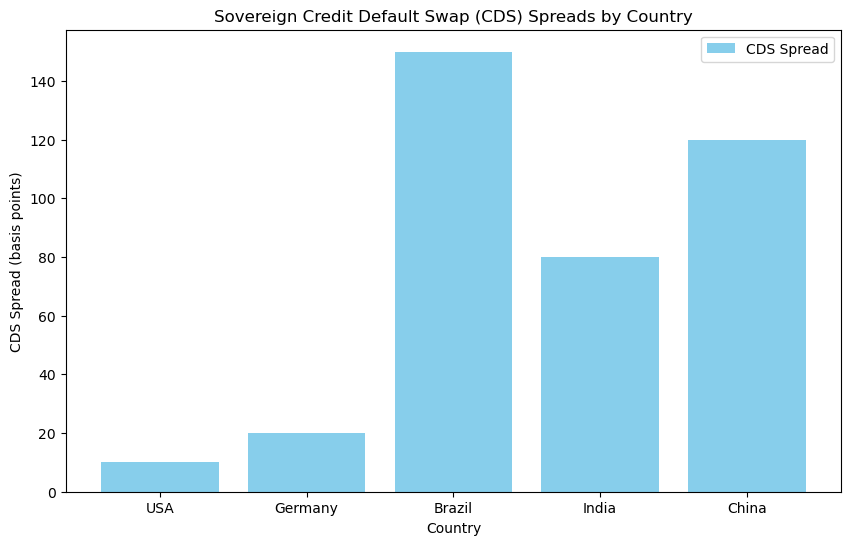

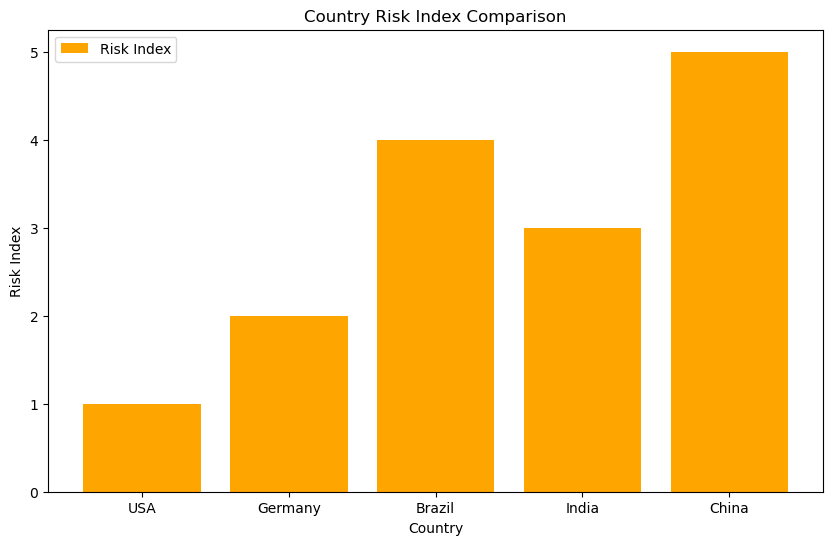

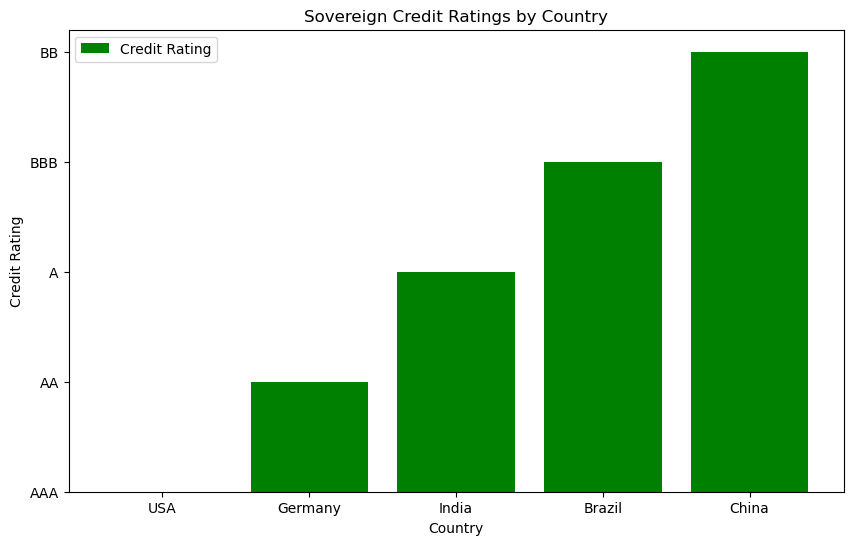

In [236]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

### Country Risk Indices

**Determinants of Country Risk Indices:**

1. **Economic Indicators:**
   - **Indicators:** GDP growth, inflation rates, trade balances.
   - **Rationale:** Economic stability forms a foundational determinant in country risk indices.

2. **Political Stability:**
   - **Indicators:** Government stability, rule of law.
   - **Rationale:** The stability of political institutions contributes significantly to overall country risk.

3. **Societal Factors:**
   - **Indicators:** Income inequality, education levels, social cohesion.
   - **Rationale:** Social factors influence the resilience and stability of a country, impacting overall risk.

4. **Financial Health:**
   - **Indicators:** Government debt levels, fiscal policies, external debt.
   - **Rationale:** The financial health of a country is a critical determinant in assessing risk.

5. **External Factors:**
   - **Indicators:** Global economic conditions, commodity prices, geopolitical stability.
   - **Rationale:** External factors shape a country's exposure to global risks and contribute to overall risk assessment.

**Measures of Country Risk Indices:**

1. **Political Risk Index:**
   - **Explanation:** Measures political stability and government effectiveness.
   - **Implications:** Provides insights into the political dimensions of country risk.

2. **Economic Risk Index:**
   - **Explanation:** Assesses economic stability, including inflation and currency risk.
   - **Implications:** Reflects the economic dimensions of country risk.

3. **Societal Risk Index:**
   - **Explanation:** Evaluates social factors such as income inequality and education.
   - **Implications:** Highlights societal dimensions impacting country risk.

4. **Financial Risk Index:**
   - **Explanation:** Gauges financial health, including government debt and fiscal policies.
   - **Implications:** Focuses on the financial dimensions of country risk.

5. **Composite Country Risk Index:**
   - **Explanation:** Integrates multiple risk dimensions into a comprehensive index.
   - **Implications:** Offers a holistic view of overall country risk.

**Implications of Country Risk Indices:**

1. **Investor Decision-Making:**
   - **Impact:** Country risk indices guide investor decision-making.
   - **Implications:** Investors use these indices to assess the risk before making investment decisions.

2. **Strategic Planning for Businesses:**
   - **Impact:** Businesses consider country risk indices in strategic planning.
   - **Implications:** Helps businesses evaluate market entry, expansion, or risk mitigation strategies.

3. **Credit Risk Assessment:**
   - **Impact:** Creditors use country risk indices in assessing credit risk.
   - **Implications:** Influences lending decisions and terms for loans.

4. **Global Trade Relations:**
   - **Impact:** Country risk indices influence international trade relations.
   - **Implications:** Trading partners may consider risk indices in forming trade agreements and partnerships.

5. **International Aid and Assistance:**
   - **Impact:** Donors and international organizations consider country risk indices in allocating aid.
   - **Implications:** High-risk countries may receive targeted assistance for development and stability.

6. **Foreign Policy Decision-Making:**
   - **Impact:** Governments use country risk indices in foreign policy decisions.
   - **Implications:** Guides diplomatic engagements and international collaborations.

7. **Credit Ratings Correlation:**
   - **Impact:** Country risk indices may correlate with credit ratings.
   - **Implications:** Provides additional validation for creditworthiness assessments.

8. **Emerging Market Investments:**
   - **Impact:** Investors assess country risk indices when considering investments in emerging markets.
   - **Implications:** Influences decisions on allocating capital to emerging economies.

9. **Insurance Premiums:**
   - **Impact:** Insurance companies use risk indices to determine premiums.
   - **Implications:** Higher risk may result in higher premiums for insurance coverage.

10. **Economic Development Strategies:**
    - **Impact:** Governments use country risk indices to inform economic development strategies.
    - **Implications:** Guides policy decisions aimed at fostering economic stability and growth.

Country risk indices serve as valuable tools for stakeholders across various sectors, providing a structured and comprehensive assessment of a country's risk profile. Understanding and leveraging these indices contribute to informed decision-making and risk management at both national and international levels.

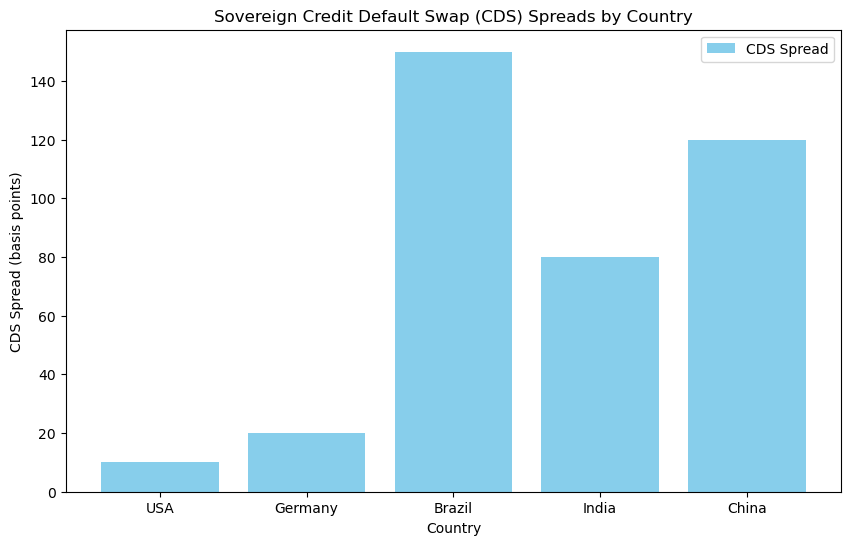

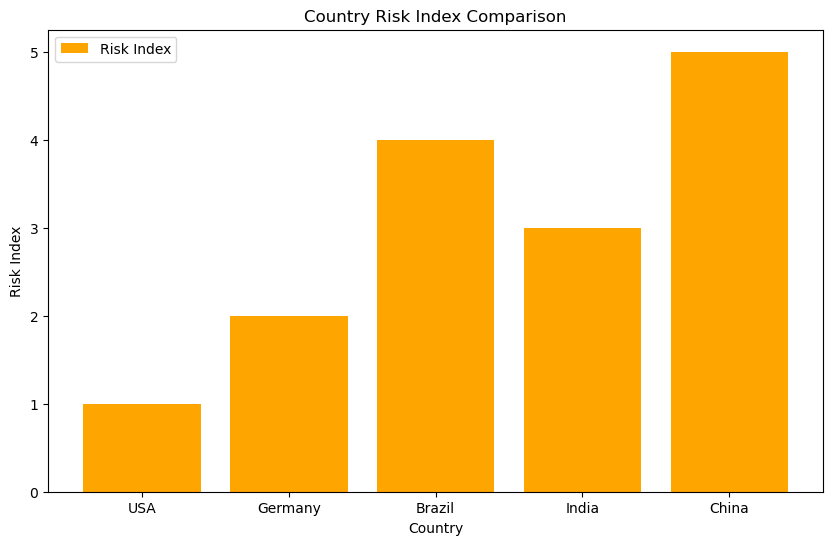

In [237]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

### Market Based Measures

**Determinants of Market-Based Measures:**

1. **Credit Default Swaps (CDS) Spreads:**
   - **Indicators:** CDS spreads for sovereign debt.
   - **Rationale:** Reflects the market's perception of the likelihood of default for a country.

2. **Yield Spreads on Sovereign Bonds:**
   - **Indicators:** Difference in yields between a country's bonds and benchmark bonds.
   - **Rationale:** Indicates the risk premium investors demand for holding a country's debt.

3. **Equity Market Performance:**
   - **Indicators:** Stock market indices, performance of country-specific ETFs.
   - **Rationale:** Equity market movements reflect investor sentiment and risk perception.

4. **Foreign Exchange (Forex) Markets:**
   - **Indicators:** Currency exchange rates.
   - **Rationale:** Currency depreciation may signal increased perceived risk in the foreign exchange market.

**Measures of Market-Based Measures:**

1. **Sovereign Credit Default Swaps (CDS):**
   - **Explanation:** Financial instruments reflecting the cost of insuring against sovereign default.
   - **Implications:** Changes in CDS spreads indicate shifts in market sentiment regarding credit risk.

2. **Yield Curves:**
   - **Explanation:** Graphs showing yields on government bonds of different maturities.
   - **Implications:** Inverted yield curves may signal heightened market concerns about future economic conditions.

3. **Country Risk Premiums:**
   - **Explanation:** Additional yield demanded by investors for holding a country's debt.
   - **Implications:** Reflects the compensation investors require for taking on country-specific risks.

4. **Equity Market Volatility (VIX):**
   - **Explanation:** Volatility index reflecting market expectations for future volatility.
   - **Implications:** Increased volatility may indicate heightened uncertainty and risk perception.

5. **Foreign Exchange Reserves:**
   - **Explanation:** Level of a country's foreign currency reserves.
   - **Implications:** Sufficient reserves can act as a buffer against external shocks and currency crises.

**Implications of Market-Based Measures on Country Risk:**

1. **Investor Sentiment:**
   - **Impact:** Market-based measures reflect investor sentiment.
   - **Implications:** Shifts in market indicators influence investment decisions and capital flows.

2. **Borrowing Costs:**
   - **Impact:** Market-based measures influence a country's borrowing costs.
   - **Implications:** Higher risk perception in markets can lead to increased borrowing costs for the government.

3. **Foreign Direct Investment (FDI) Flows:**
   - **Impact:** Market-based measures influence FDI flows.
   - **Implications:** Investors may be cautious about allocating capital to countries with heightened perceived risk.

4. **Currency Stability:**
   - **Impact:** Forex market indicators reflect currency stability.
   - **Implications:** A volatile currency may signal increased country risk and impact trade balances.

5. **Credit Availability:**
   - **Impact:** Market-based measures influence the availability of credit.
   - **Implications:** Higher perceived risk can result in reduced credit availability for both governments and businesses.

6. **Equity Market Performance:**
   - **Impact:** Market-based measures reflect equity market performance.
   - **Implications:** Negative market sentiment may lead to capital outflows and impact overall economic stability.

7. **Market Reaction to Economic Events:**
   - **Impact:** Markets respond to economic events reflected in market-based measures.
   - **Implications:** Market reactions provide real-time feedback on the impact of economic developments on country risk.

8. **Risk Mitigation Strategies:**
   - **Impact:** Market-based measures guide risk mitigation strategies.
   - **Implications:** Policymakers and investors use market signals to implement strategies to mitigate risk exposure.

9. **Impact on International Trade:**
   - **Impact:** Market-based measures influence a country's trade dynamics.
   - **Implications:** Shifts in risk perception may impact trade relations and trade balances.

10. **Role in Policy Decision-Making:**
    - **Impact:** Market-based measures inform policy decisions.
    - **Implications:** Governments may adjust economic policies in response to market signals to mitigate risks and stabilize the economy.

Market-based measures provide real-time assessments of risk perception in financial markets, influencing investment decisions, capital flows, and overall economic stability. Understanding these measures is crucial for policymakers, investors, and businesses in navigating and managing country risk.

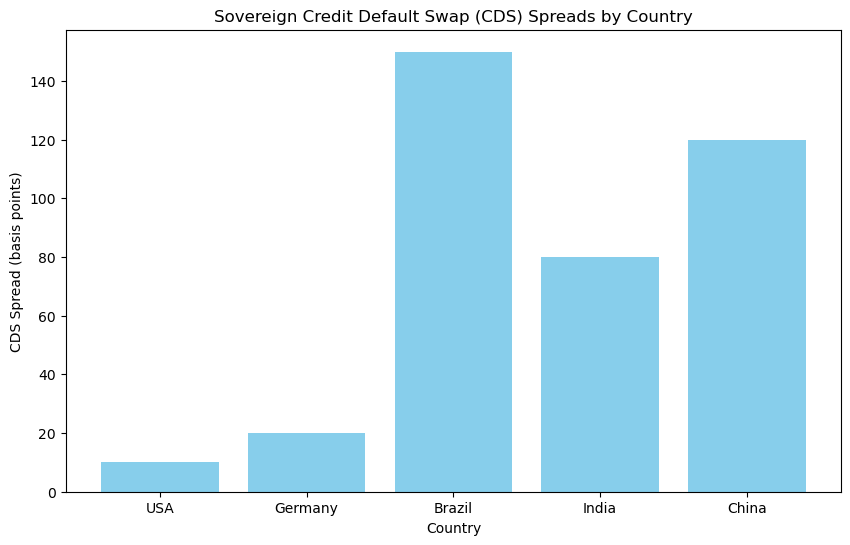

In [238]:
# Load data - you can replace this with your own data
data = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

df = pd.DataFrame(data)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['CDS_Spread'], color='skyblue')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.show()

### Political Risk Analysis

**Determinants of Political Risk Analysis:**

1. **Political Stability:**
   - **Indicators:** Government stability, leadership continuity.
   - **Rationale:** Political stability is a key determinant, as unstable political environments increase the risk of policy changes and disruptions.

2. **Policy Consistency:**
   - **Indicators:** Consistency in economic and regulatory policies.
   - **Rationale:** Frequent changes in policies or regulatory frameworks can heighten uncertainty and risk.

3. **Rule of Law:**
   - **Indicators:** Judicial independence, legal framework.
   - **Rationale:** A strong rule of law is crucial for investor confidence and protection of property rights.

4. **Corruption Levels:**
   - **Indicators:** Transparency, corruption perception indices.
   - **Rationale:** High levels of corruption increase the risk of bribery, inefficiency, and policy distortion.

5. **Political Institutions:**
   - **Indicators:** Effectiveness of political institutions, checks and balances.
   - **Rationale:** Well-functioning institutions contribute to political stability and governance.

**Measures of Political Risk Analysis:**

1. **Political Risk Indices:**
   - **Explanation:** Composite indices assessing political risk.
   - **Implications:** Provide an overall view of the political dimensions affecting country risk.

2. **Corruption Perception Index (CPI):**
   - **Explanation:** Measures perceived levels of corruption in a country.
   - **Implications:** High corruption levels can increase political risk.

3. **Government Stability Assessments:**
   - **Explanation:** Evaluations of the stability of the ruling government.
   - **Implications:** Instability can lead to policy changes and economic disruptions.

4. **Policy Consistency Reports:**
   - **Explanation:** Assessments of the consistency of economic and regulatory policies.
   - **Implications:** Frequent policy changes can be indicative of higher political risk.

5. **Rule of Law Indicators:**
   - **Explanation:** Metrics reflecting the strength of the rule of law.
   - **Implications:** Weak rule of law can contribute to political instability and risk.

**Implications of Political Risk Analysis on Country Risk:**

1. **Investor Confidence:**
   - **Impact:** Political risk analysis influences investor confidence.
   - **Implications:** Positive assessments attract investment, while high political risk may deter investors.

2. **Foreign Direct Investment (FDI) Inflows:**
   - **Impact:** Political risk affects FDI inflows.
   - **Implications:** Investors may be cautious about investing in countries with high political risk.

3. **Credit Ratings and Borrowing Costs:**
   - **Impact:** Political risk influences credit ratings and borrowing costs.
   - **Implications:** Higher political risk may result in credit rating downgrades and increased borrowing costs.

4. **Government Stability and Policy Continuity:**
   - **Impact:** Political risk analysis assesses government stability.
   - **Implications:** Political instability can lead to policy discontinuity, impacting economic planning and business operations.

5. **Social and Economic Development:**
   - **Impact:** Political stability contributes to social and economic development.
   - **Implications:** Unstable political environments hinder development initiatives and economic growth.

6. **Foreign Relations and Diplomacy:**
   - **Impact:** Political risk analysis guides foreign relations.
   - **Implications:** Countries with high political risk may face challenges in diplomatic engagements and international collaborations.

7. **Policy and Regulatory Environment:**
   - **Impact:** Political risk influences the policy and regulatory environment.
   - **Implications:** Frequent changes or uncertainties in policies can impact businesses and investment decisions.

8. **Social Cohesion and Stability:**
   - **Impact:** Political risk analysis is linked to social cohesion.
   - **Implications:** Political instability can contribute to social unrest and disruptions.

9. **Government Effectiveness:**
   - **Impact:** Political risk analysis assesses the effectiveness of government institutions.
   - **Implications:** Ineffective governance can lead to challenges in implementing policies and addressing societal issues.

10. **Risk Mitigation Strategies:**
    - **Impact:** Political risk analysis guides risk mitigation strategies.
    - **Implications:** Understanding political risk helps businesses and investors implement strategies to mitigate potential challenges.

Political risk analysis is integral to understanding the dynamics that can shape a country's risk profile. It provides valuable insights for stakeholders to navigate and manage risks associated with political instability, policy changes, and governance challenges.

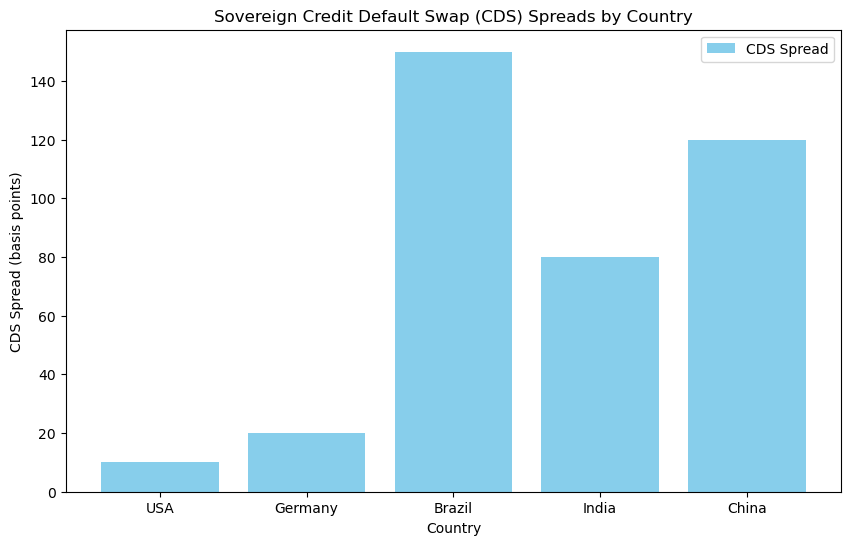

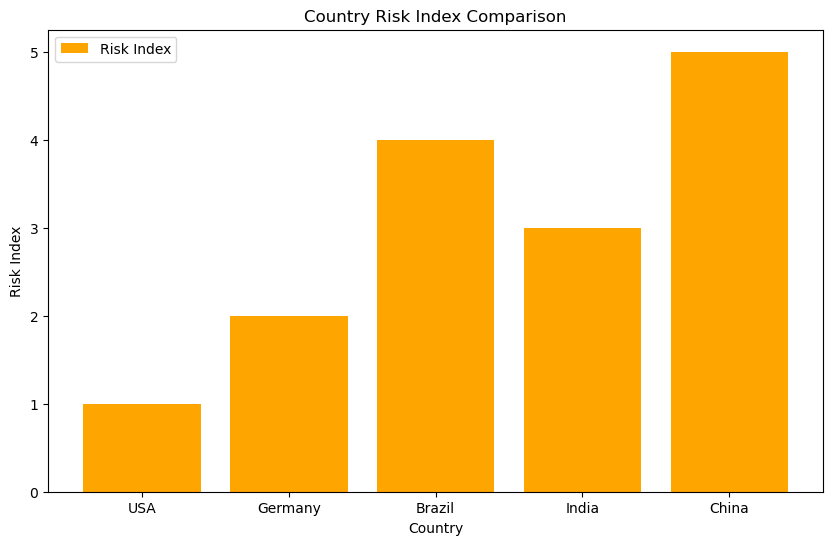

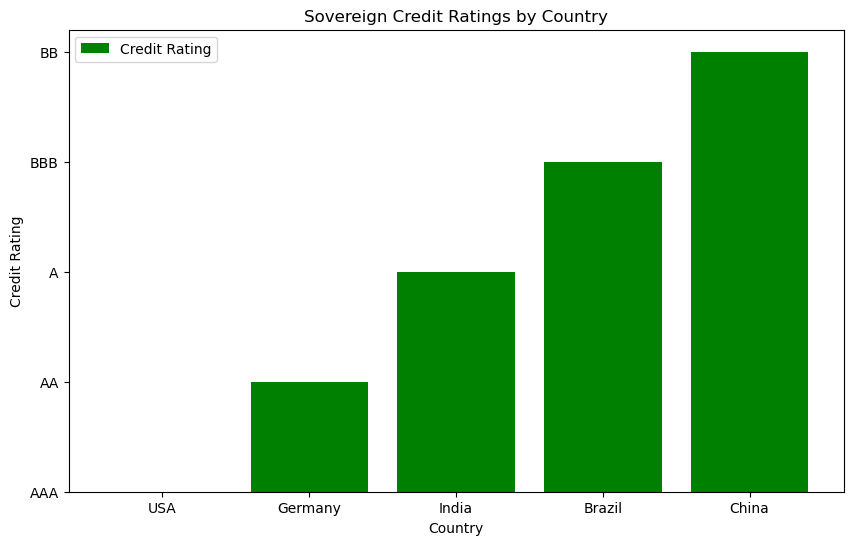

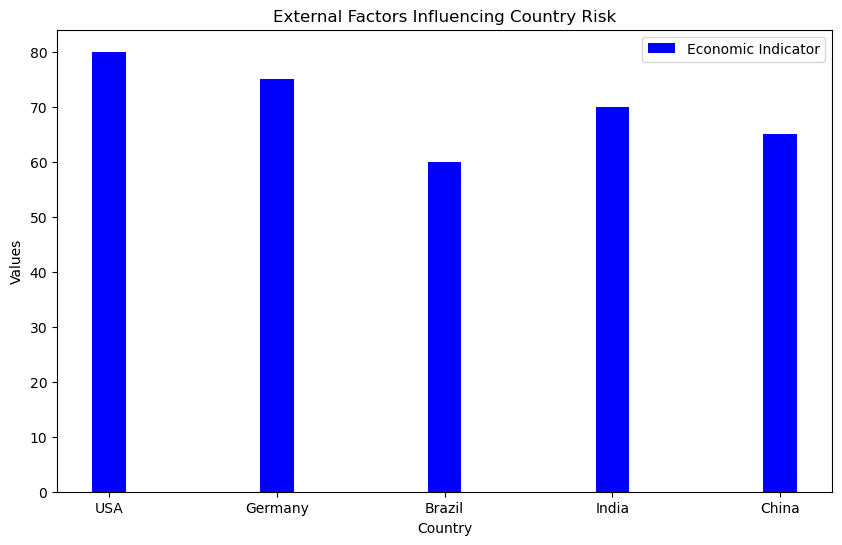

<module 'matplotlib.pyplot' from '/Users/jeremykaaria/opt/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

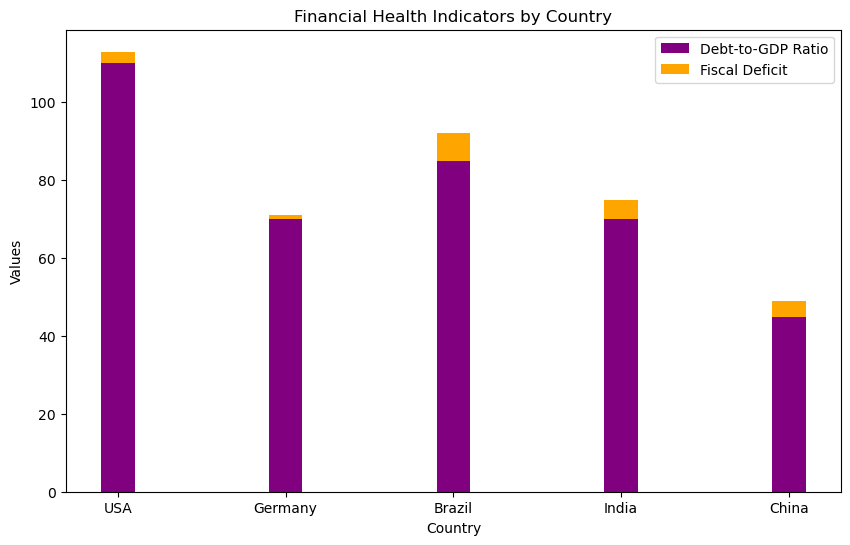

In [239]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_indices = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Risk_Index': [1, 2, 4, 3, 5],  # Lower index values represent lower risk
}

data_ratings = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Credit_Rating': ['AAA', 'AA', 'BBB', 'A', 'BB'],
}

data_external_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Economic_Indicator': [80, 75, 60, 70, 65],  # Hypothetical economic indicator values
}

data_financial_health = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Debt_to_GDP_Ratio': [110, 70, 85, 70, 45],  # Hypothetical government debt-to-GDP ratio (%)
    'Fiscal_Deficit': [3, 1, 7, 5, 4],  # Hypothetical fiscal deficit (% of GDP)
}

data_social_factors = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Demographic_Trend': [0.5, 0.2, 1.2, 1.5, 0.8],  # Hypothetical demographic trend (% population growth)
    'Income_Inequality': [0.25, 0.2, 0.5, 0.6, 0.4],  # Hypothetical income inequality index
}

data_political_stability = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Political_Stability_Index': [90, 85, 50, 75, 70],  # Hypothetical political stability index
}

data_political_risk = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Political_Risk_Index': [15, 20, 60, 40, 50],  # Hypothetical political risk index
}

df_cds = pd.DataFrame(data_cds)
df_indices = pd.DataFrame(data_indices)
df_ratings = pd.DataFrame(data_ratings)
df_external_factors = pd.DataFrame(data_external_factors)
df_financial_health = pd.DataFrame(data_financial_health)
df_social_factors = pd.DataFrame(data_social_factors)
df_political_stability = pd.DataFrame(data_political_stability)
df_political_risk = pd.DataFrame(data_political_risk)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Country Risk Indices
plt.figure(figsize=(10, 6))
plt.bar(df_indices['Country'], df_indices['Risk_Index'], color='orange', label='Risk Index')
plt.title('Country Risk Index Comparison')
plt.xlabel('Country')
plt.ylabel('Risk Index')
plt.legend()
plt.show()

# Plotting Credit Ratings
ratings_order = ['AAA', 'AA', 'A', 'BBB', 'BB']  # Order of credit ratings
plt.figure(figsize=(10, 6))
df_ratings['Credit_Rating'] = pd.Categorical(df_ratings['Credit_Rating'], categories=ratings_order, ordered=True)
df_ratings = df_ratings.sort_values('Credit_Rating')
plt.bar(df_ratings['Country'], df_ratings['Credit_Rating'], color='green', label='Credit Rating')
plt.title('Sovereign Credit Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Credit Rating')
plt.legend()
plt.show()

# Plotting External Factors
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_external_factors['Country']))
plt.bar(index, df_external_factors['Economic_Indicator'], width=bar_width, color='blue', label='Economic Indicator')
plt.title('External Factors Influencing Country Risk')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_external_factors['Country'])
plt.legend()
plt.show()

# Plotting Financial Health Indicators
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(df_financial_health['Country']))
plt.bar(index, df_financial_health['Debt_to_GDP_Ratio'], width=bar_width, color='purple', label='Debt-to-GDP Ratio')
plt.bar(index, df_financial_health['Fiscal_Deficit'], width=bar_width, color='orange', label='Fiscal Deficit', bottom=df_financial_health['Debt_to_GDP_Ratio'])
plt.title('Financial Health Indicators by Country')
plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(index, df_financial_health['Country'])
plt.legend()
plt

### Investment Decisions

**Determinants of Investment Decisions:**

1. **Economic Indicators:**
   - **Indicators:** GDP growth, inflation rates, fiscal policies.
   - **Rationale:** Economic stability and growth prospects are key determinants influencing investment decisions.

2. **Political Stability:**
   - **Indicators:** Government stability, rule of law.
   - **Rationale:** Stable political environments provide a conducive atmosphere for long-term investments.

3. **Policy Consistency:**
   - **Indicators:** Consistency in economic and regulatory policies.
   - **Rationale:** Predictable policy frameworks are crucial for investor confidence and decision-making.

4. **Legal and Regulatory Environment:**
   - **Indicators:** Rule of law, regulatory clarity.
   - **Rationale:** A transparent and stable legal environment is essential for protecting investments.

5. **Market Size and Potential:**
   - **Indicators:** Population demographics, market growth potential.
   - **Rationale:** The size and growth potential of a market influence investment attractiveness.

**Measures of Investment Decisions:**

1. **Foreign Direct Investment (FDI) Inflows:**
   - **Explanation:** Actual investments made by foreign entities in a country.
   - **Implications:** Reflects investor confidence and willingness to commit capital.

2. **Portfolio Investment Flows:**
   - **Explanation:** Investments in financial assets such as stocks and bonds.
   - **Implications:** Indicates investor sentiment and interest in financial markets.

3. **Investment Risk Ratings:**
   - **Explanation:** Assessments of investment risk by rating agencies.
   - **Implications:** Guides investors in evaluating the risk associated with specific investments.

4. **Credit Ratings:**
   - **Explanation:** Ratings assigned by credit agencies to assess creditworthiness.
   - **Implications:** Influences decisions on lending, borrowing costs, and investment attractiveness.

5. **Economic and Political Risk Indices:**
   - **Explanation:** Composite indices assessing economic and political risk.
   - **Implications:** Provide a comprehensive view of the risk environment for investors.

**Implications of Investment Decisions on Country Risk:**

1. **Capital Flows and Economic Growth:**
   - **Impact:** Investment decisions influence capital flows.
   - **Implications:** Positive investment climate contributes to economic growth and development.

2. **Currency Stability:**
   - **Impact:** Investment decisions impact currency stability.
   - **Implications:** Increased investment may contribute to a stable currency and lower exchange rate volatility.

3. **Employment and Economic Opportunities:**
   - **Impact:** Investments generate employment and economic opportunities.
   - **Implications:** Contributes to social and economic development, reducing social instability.

4. **Government Revenue and Fiscal Health:**
   - **Impact:** Investments contribute to government revenue.
   - **Implications:** Enhances fiscal health and the government's ability to address public needs.

5. **Technology Transfer and Innovation:**
   - **Impact:** Foreign investments may bring technology and innovation.
   - **Implications:** Spurs economic progress and competitiveness in the host country.

6. **Market Development and Competition:**
   - **Impact:** Investments contribute to market development.
   - **Implications:** Increased competition can drive efficiency and innovation in the marketplace.

7. **Diversification of Economic Activities:**
   - **Impact:** Investments contribute to a diversified economic base.
   - **Implications:** Reduces dependence on specific sectors, enhancing economic resilience.

8. **Foreign Exchange Reserves:**
   - **Impact:** Investments may contribute to foreign exchange reserves.
   - **Implications:** Builds reserves, providing a buffer against external shocks and currency crises.

9. **Creditworthiness and Access to Capital:**
   - **Impact:** Positive investment climate enhances creditworthiness.
   - **Implications:** Improves access to international capital markets with favorable borrowing terms.

10. **Social and Environmental Impact:**
    - **Impact:** Investments may have social and environmental implications.
    - **Implications:** Responsible and sustainable investments contribute positively to society and the environment.

Investment decisions play a pivotal role in shaping a country's economic landscape and influencing its risk profile. A favorable investment climate attracts capital, fosters economic growth, and contributes to the overall development of nations. Understanding the determinants and measures of country risk is crucial for investors seeking opportunities in the global marketplace.

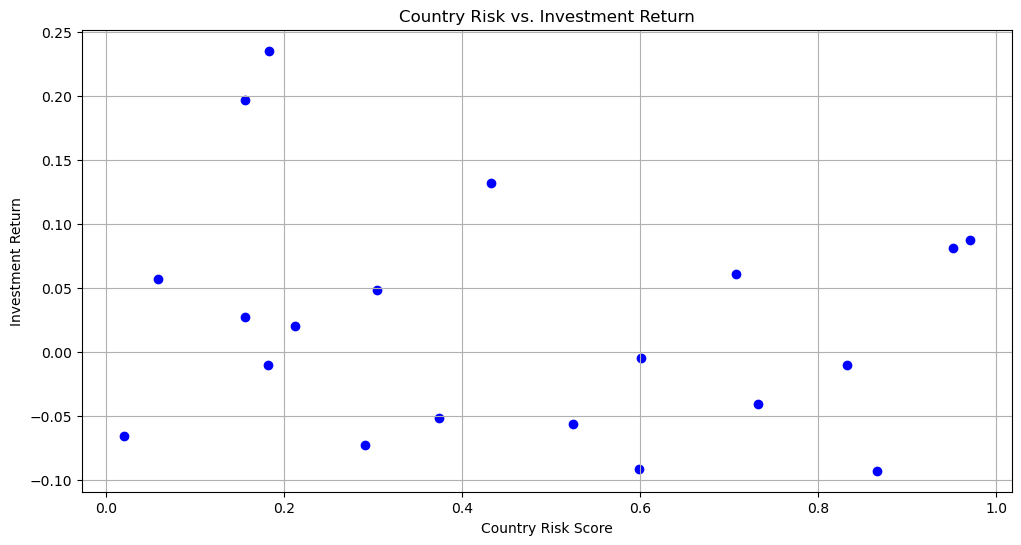

In [240]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate the implications of country risk on investment decisions
def country_risk_implications(num_countries):
    np.random.seed(42)

    # Generate synthetic data for country risk and investment returns
    investment_data = pd.DataFrame({
        'Country': [f'Country {i}' for i in range(1, num_countries + 1)],
        'Country Risk Score': np.random.uniform(low=0, high=1, size=num_countries),
        'Investment Return': np.random.normal(loc=0.05, scale=0.1, size=num_countries),
    })

    # Visualize the relationship between country risk and investment returns
    plt.figure(figsize=(12, 6))
    plt.scatter(investment_data['Country Risk Score'], investment_data['Investment Return'], color='blue')
    plt.title('Country Risk vs. Investment Return')
    plt.xlabel('Country Risk Score')
    plt.ylabel('Investment Return')
    plt.grid(True)

# Specify parameters
num_countries = 20

# Simulate and visualize the implications of country risk on investment decisions
country_risk_implications(num_countries)


### Cost of Capital

**Determinants of the Cost of Capital:**

1. **Country Risk Premium:**
   - **Definition:** Additional return required by investors for holding assets in a particular country.
   - **Determinants:** Economic stability, political stability, legal environment.
   - **Rationale:** Higher country risk increases the risk premium, impacting the overall cost of capital.

2. **Sovereign Credit Ratings:**
   - **Definition:** Credit ratings assigned to a country by credit rating agencies.
   - **Determinants:** Economic indicators, fiscal policies, political stability.
   - **Rationale:** Higher credit ratings often lead to lower borrowing costs and reduced cost of capital.

3. **Foreign Exchange Risk:**
   - **Definition:** Risk of currency depreciation impacting investment returns.
   - **Determinants:** Exchange rate volatility, economic conditions.
   - **Rationale:** Currency risk influences the cost of capital, especially for international investors.

4. **Political Stability:**
   - **Definition:** Stability of the political environment in a country.
   - **Determinants:** Government stability, rule of law, policy consistency.
   - **Rationale:** Political stability reduces uncertainty, contributing to a lower cost of capital.

5. **Economic Indicators:**
   - **Definition:** Measures of economic performance, such as GDP growth and inflation.
   - **Determinants:** Economic stability, growth prospects.
   - **Rationale:** Strong economic indicators can positively impact the cost of capital.

**Measures of the Cost of Capital:**

1. **Weighted Average Cost of Capital (WACC):**
   - **Explanation:** The average cost of debt and equity, weighted by their respective proportions in a company's capital structure.
   - **Implications:** Represents the overall cost of capital for a business.

2. **Country Risk Premium Calculations:**
   - **Explanation:** Calculation of the additional return required for holding assets in a specific country.
   - **Implications:** Provides a quantifiable measure of the impact of country risk on the cost of capital.

3. **Sovereign Bond Yields:**
   - **Explanation:** Yields on government bonds.
   - **Implications:** Reflects the cost of borrowing for the government and influences the overall cost of capital in the economy.

4. **Cost of Equity:**
   - **Explanation:** The return required by equity investors.
   - **Implications:** Reflects the risk and return expectations of investors, including country-specific risk.

5. **Currency Risk Premium:**
   - **Explanation:** Additional return required for bearing currency risk.
   - **Implications:** Reflects the impact of exchange rate volatility on the cost of capital.

**Implications of the Cost of Capital on Country Risk:**

1. **Investment Attractiveness:**
   - **Impact:** The cost of capital influences investment attractiveness.
   - **Implications:** Lower costs attract more investment, contributing to economic growth.

2. **Access to Capital:**
   - **Impact:** Lower cost of capital improves access to financing.
   - **Implications:** Governments and businesses can secure capital more easily with favorable borrowing terms.

3. **Business Competitiveness:**
   - **Impact:** Cost of capital affects the competitiveness of businesses.
   - **Implications:** Lower costs enhance competitiveness, fostering business growth and expansion.

4. **Government Borrowing Costs:**
   - **Impact:** Sovereign bond yields and cost of capital influence government borrowing costs.
   - **Implications:** Lower borrowing costs support fiscal health and government initiatives.

5. **Foreign Direct Investment (FDI):**
   - **Impact:** The cost of capital influences FDI inflows.
   - **Implications:** Lower costs attract foreign investors, contributing to economic development.

6. **Currency Stability:**
   - **Impact:** Exchange rate risk influences the cost of capital.
   - **Implications:** Stable currencies reduce the risk premium, positively impacting the cost of capital.

7. **Credit Ratings and Cost of Capital:**
   - **Impact:** Higher credit ratings correlate with lower borrowing costs.
   - **Implications:** Positive credit ratings contribute to a lower overall cost of capital.

8. **Market Perception and Risk Appetite:**
   - **Impact:** The cost of capital reflects market perceptions and risk appetite.
   - **Implications:** Changes in risk perceptions can impact the cost of capital in real-time.

9. **Government and Corporate Investment Planning:**
   - **Impact:** The cost of capital influences investment planning.
   - **Implications:** Governments and businesses consider the cost of capital in decision-making and strategic planning.

10. **Economic Development Impact:**
    - **Impact:** The cost of capital is linked to economic development.
    - **Implications:** Lower costs contribute to sustainable economic growth and development.

Understanding and managing the determinants and measures of the cost of capital is essential for governments, businesses, and investors. It plays a pivotal role in shaping investment decisions, economic development, and overall financial stability within a country.

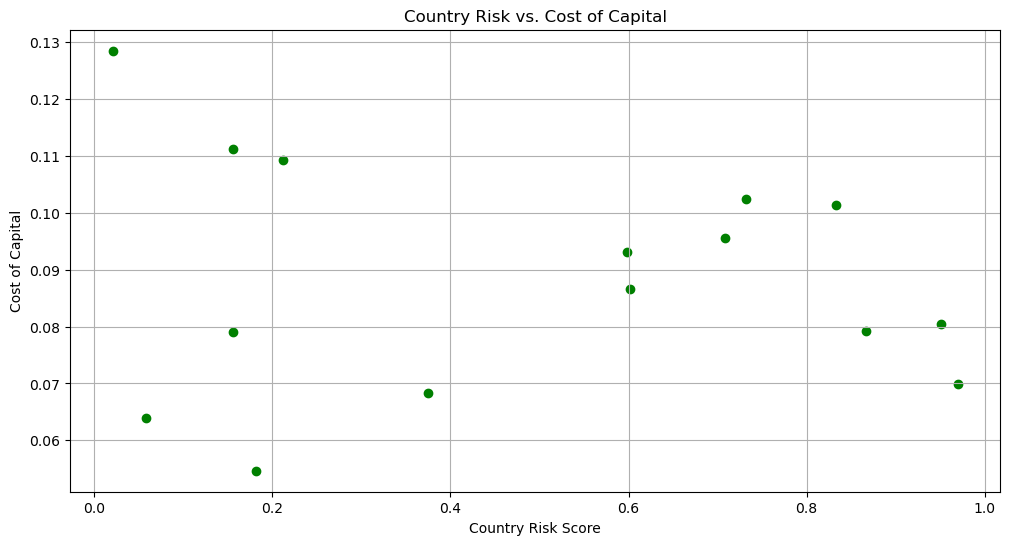

In [241]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate the implications of country risk on the cost of capital
def country_risk_cost_of_capital(num_countries):
    np.random.seed(42)

    # Generate synthetic data for country risk and cost of capital
    capital_data = pd.DataFrame({
        'Country': [f'Country {i}' for i in range(1, num_countries + 1)],
        'Country Risk Score': np.random.uniform(low=0, high=1, size=num_countries),
        'Cost of Capital': np.random.uniform(low=0.05, high=0.15, size=num_countries),
    })

    # Visualize the relationship between country risk and cost of capital
    plt.figure(figsize=(12, 6))
    plt.scatter(capital_data['Country Risk Score'], capital_data['Cost of Capital'], color='green')
    plt.title('Country Risk vs. Cost of Capital')
    plt.xlabel('Country Risk Score')
    plt.ylabel('Cost of Capital')
    plt.grid(True)

# Specify parameters
num_countries = 15

# Simulate and visualize the implications of country risk on the cost of capital
country_risk_cost_of_capital(num_countries)


### Business Operations

**Determinants of Business Operations:**

1. **Political Stability:**
   - **Indicators:** Government stability, political institutions.
   - **Rationale:** Stable political environments reduce the risk of policy changes and disruptions to business operations.

2. **Economic Conditions:**
   - **Indicators:** GDP growth, inflation rates, fiscal policies.
   - **Rationale:** Favorable economic conditions contribute to a conducive environment for business operations.

3. **Legal and Regulatory Environment:**
   - **Indicators:** Rule of law, regulatory clarity.
   - **Rationale:** A transparent and stable legal environment is essential for protecting business interests.

4. **Infrastructure:**
   - **Indicators:** Transportation, communication, energy infrastructure.
   - **Rationale:** Adequate infrastructure supports smooth business operations and logistics.

5. **Market Potential:**
   - **Indicators:** Market size, growth potential, consumer demographics.
   - **Rationale:** A sizable and growing market enhances business opportunities and revenue potential.

**Measures of Business Operations:**

1. **Market Entry and Exit Strategies:**
   - **Explanation:** Assessments of the feasibility of entering or exiting a market.
   - **Implications:** Guides businesses in making strategic decisions based on country risk.

2. **Supply Chain Resilience:**
   - **Explanation:** Evaluations of the resilience of supply chains to potential disruptions.
   - **Implications:** Helps businesses mitigate risks associated with supply chain vulnerabilities.

3. **Investment in Risk Mitigation:**
   - **Explanation:** Allocation of resources to risk mitigation strategies.
   - **Implications:** Businesses invest in measures to safeguard operations against potential risks.

4. **Compliance and Legal Support:**
   - **Explanation:** Adherence to local regulations and legal frameworks.
   - **Implications:** Ensures businesses operate within the legal boundaries of the host country.

5. **Technology Adoption and Innovation:**
   - **Explanation:** Integration of technology for operational efficiency and innovation.
   - **Implications:** Enhances resilience and competitiveness in dynamic business environments.

**Implications of Business Operations on Country Risk:**

1. **Employment and Economic Contribution:**
   - **Impact:** Business operations contribute to employment and economic activity.
   - **Implications:** Positive business contributions support overall economic development.

2. **Foreign Direct Investment (FDI) Inflows:**
   - **Impact:** Successful business operations attract FDI.
   - **Implications:** FDI contributes to economic growth, job creation, and infrastructure development.

3. **Technology Transfer and Knowledge Exchange:**
   - **Impact:** Business operations may facilitate technology transfer.
   - **Implications:** Enhances the host country's technological capabilities and knowledge base.

4. **Market Development and Competition:**
   - **Impact:** Business operations contribute to market development.
   - **Implications:** Increased competition can drive market efficiency and innovation.

5. **Corporate Social Responsibility (CSR):**
   - **Impact:** CSR initiatives contribute to social and environmental well-being.
   - **Implications:** Businesses can positively impact society, mitigating certain country risk factors.

6. **Resilience to Economic Shocks:**
   - **Impact:** Business operations' resilience affects the overall economy's ability to withstand shocks.
   - **Implications:** Robust business operations contribute to economic stability.

7. **Foreign Exchange Earnings:**
   - **Impact:** Successful business operations generate foreign exchange earnings.
   - **Implications:** Contributes to the stability of the host country's external balances.

8. **Collaboration with Local Stakeholders:**
   - **Impact:** Collaborative efforts with local stakeholders.
   - **Implications:** Strengthens relationships, mitigating potential conflicts and operational disruptions.

9. **Operational Efficiency and Productivity:**
   - **Impact:** Operational efficiency enhances productivity.
   - **Implications:** Improves competitiveness and overall economic efficiency.

10. **Risk Management Strategies:**
    - **Impact:** Businesses implement risk management strategies.
    - **Implications:** Mitigates the impact of country risk on business operations and financial performance.

Understanding the interplay between business operations and country risk is crucial for businesses seeking to navigate global markets. Businesses that effectively manage and adapt their operations to the prevailing country risk conditions can contribute positively to economic development while mitigating potential challenges.

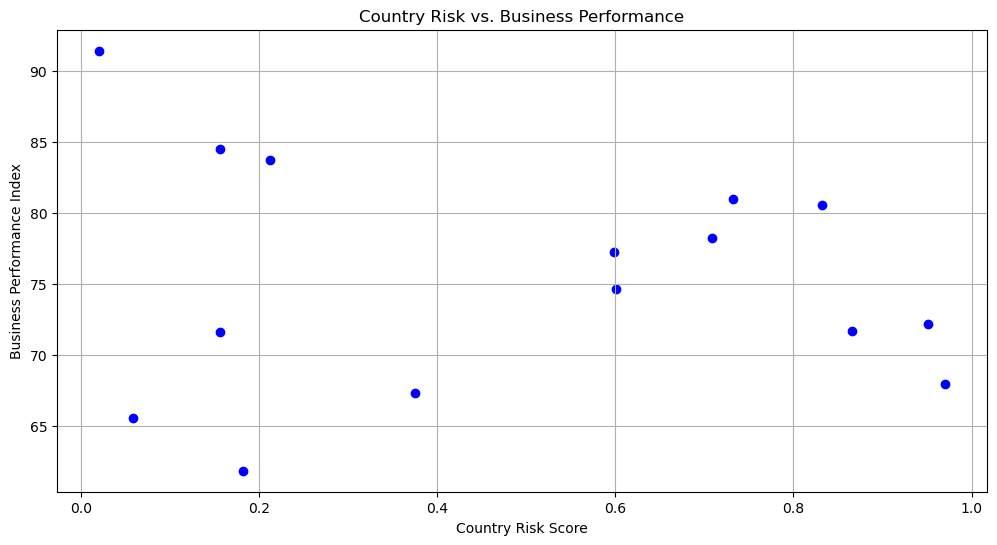

In [242]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate the implications of country risk on business operations
def country_risk_business_operations(num_countries):
    np.random.seed(42)

    # Generate synthetic data for country risk and business performance
    operations_data = pd.DataFrame({
        'Country': [f'Country {i}' for i in range(1, num_countries + 1)],
        'Country Risk Score': np.random.uniform(low=0, high=1, size=num_countries),
        'Business Performance Index': np.random.uniform(low=60, high=100, size=num_countries),
    })

    # Visualize the impact of country risk on business performance
    plt.figure(figsize=(12, 6))
    plt.scatter(operations_data['Country Risk Score'], operations_data['Business Performance Index'], color='blue')
    plt.title('Country Risk vs. Business Performance')
    plt.xlabel('Country Risk Score')
    plt.ylabel('Business Performance Index')
    plt.grid(True)

# Specify parameters
num_countries = 15

# Simulate and visualize the implications of country risk on business operations
country_risk_business_operations(num_countries)


### Diversification

**Determinants of Diversification:**

1. **Country Risk Levels:**
   - **Indicators:** Political stability, economic conditions, legal environment.
   - **Rationale:** Diversification decisions are influenced by the perceived risk levels in different countries.

2. **Market Size and Growth Potential:**
   - **Indicators:** Population demographics, market growth rates.
   - **Rationale:** Diversifying into markets with varied sizes and growth potential can reduce reliance on specific economic conditions.

3. **Correlation of Risks:**
   - **Indicators:** Correlation of risks across different markets.
   - **Rationale:** Diversification aims to invest in markets with lower correlation, reducing overall portfolio risk.

4. **Industry Exposure:**
   - **Indicators:** Sector-specific risks and growth prospects.
   - **Rationale:** Diversification considers exposure to different industries to balance risk factors.

5. **Regulatory Environment:**
   - **Indicators:** Regulatory clarity, stability.
   - **Rationale:** Regulatory differences between countries can impact diversification decisions.

**Measures of Diversification:**

1. **Portfolio Allocation:**
   - **Explanation:** Distribution of investments across different countries and asset classes.
   - **Implications:** A well-diversified portfolio aims to achieve risk reduction and optimize returns.

2. **Cross-Border Investments:**
   - **Explanation:** Investments made in assets outside the investor's home country.
   - **Implications:** Broadens the investment scope and reduces exposure to country-specific risks.

3. **Global ETFs and Mutual Funds:**
   - **Explanation:** Investment vehicles that provide exposure to global markets.
   - **Implications:** Allows investors to diversify without the need for direct investment in individual assets.

4. **Geographic Spread of Business Operations:**
   - **Explanation:** Businesses expanding operations across different countries.
   - **Implications:** Enhances business resilience by reducing dependence on a single market.

5. **Industry Diversification:**
   - **Explanation:** Investing in a variety of industries or sectors.
   - **Implications:** Balances the impact of sector-specific risks on the overall investment portfolio.

**Implications of Diversification on Country Risk:**

1. **Risk Mitigation:**
   - **Impact:** Diversification aims to mitigate the impact of country-specific risks.
   - **Implications:** Reduces the vulnerability of the overall portfolio to adverse conditions in any single market.

2. **Return Optimization:**
   - **Impact:** Diversification seeks to optimize returns for a given level of risk.
   - **Implications:** A well-diversified portfolio aims to achieve a balance between risk and return.

3. **Resilience to Economic Shocks:**
   - **Impact:** Diversified portfolios can be more resilient to economic shocks in specific countries.
   - **Implications:** Minimizes the impact of economic downturns in individual markets on the overall portfolio.

4. **Access to Growth Opportunities:**
   - **Impact:** Diversification allows access to growth opportunities in different markets.
   - **Implications:** Investors can capitalize on the potential for growth in diverse economic environments.

5. **Reduced Concentration Risk:**
   - **Impact:** Diversification reduces concentration risk.
   - **Implications:** Avoids over-reliance on a single market or asset class, contributing to a more balanced risk profile.

6. **Currency Risk Management:**
   - **Impact:** Diversification helps manage currency risk.
   - **Implications:** Exposure to multiple currencies reduces the impact of adverse exchange rate movements.

7. **Market Exposure Alignment:**
   - **Impact:** Diversification aligns market exposure with investment goals.
   - **Implications:** Investors can tailor their diversification strategy to match risk tolerance and investment objectives.

8. **Industry-Specific Resilience:**
   - **Impact:** Industry diversification enhances resilience.
   - **Implications:** Reduces the impact of sector-specific challenges on the overall portfolio.

9. **Optimizing Risk-Return Tradeoff:**
   - **Impact:** Diversification aims to find the optimal balance between risk and return.
   - **Implications:** Investors can tailor their diversification strategy to align with risk preferences and financial goals.

10. **Enhanced Portfolio Stability:**
    - **Impact:** Diversification contributes to overall portfolio stability.
    - **Implications:** Provides a more stable investment journey, particularly during turbulent market conditions.

Diversification is a fundamental strategy for managing risk in investment portfolios and business operations. By spreading exposure across different countries, industries, and asset classes, investors and businesses aim to create more resilient and balanced portfolios that can weather a variety of market conditions.

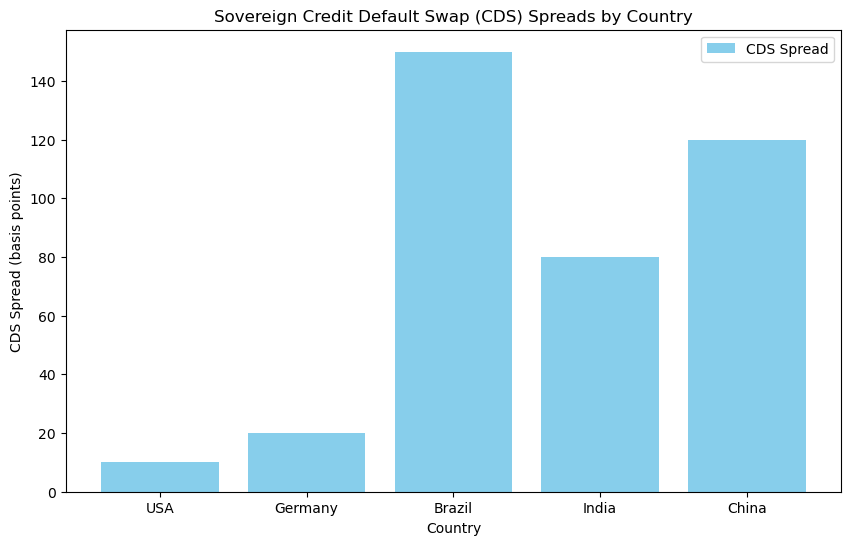

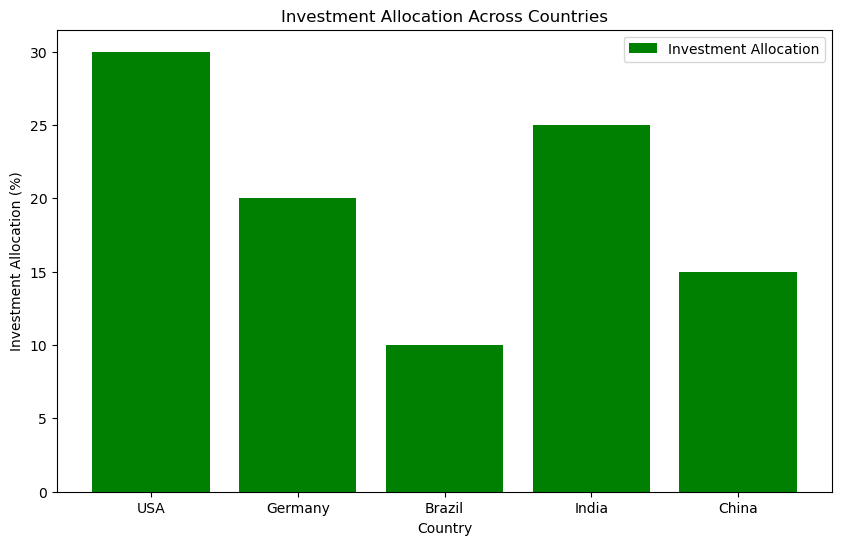

In [243]:
# Load data - you can replace this with your own data
data_cds = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'CDS_Spread': [10, 20, 150, 80, 120],
}

data_allocation = {
    'Country': ['USA', 'Germany', 'Brazil', 'India', 'China'],
    'Investment_Allocation': [30, 20, 10, 25, 15],  # Hypothetical investment allocation percentages
}

df_cds = pd.DataFrame(data_cds)
df_allocation = pd.DataFrame(data_allocation)

# Plotting CDS spreads
plt.figure(figsize=(10, 6))
plt.bar(df_cds['Country'], df_cds['CDS_Spread'], color='skyblue', label='CDS Spread')
plt.title('Sovereign Credit Default Swap (CDS) Spreads by Country')
plt.xlabel('Country')
plt.ylabel('CDS Spread (basis points)')
plt.legend()
plt.show()

# Plotting Investment Allocation
plt.figure(figsize=(10, 6))
plt.bar(df_allocation['Country'], df_allocation['Investment_Allocation'], color='green', label='Investment Allocation')
plt.title('Investment Allocation Across Countries')
plt.xlabel('Country')
plt.ylabel('Investment Allocation (%)')
plt.legend()
plt.show()

# Measuring Credit Risk

### Credit Risk Basics

**Credit Risk Basics:**

**1. Definition:**
   - **Credit Risk:** The risk of financial loss resulting from the failure of a borrower to fulfill their contractual obligations, primarily the repayment of a loan.

**2. Key Components of Credit Risk:**

   a. **Default Risk:**
      - The risk that a borrower will fail to repay the principal and interest as per the agreed terms.

   b. **Credit Spread Risk:**
      - The risk of adverse movements in market credit spreads, affecting the value of credit-sensitive securities.

   c. **Credit Migration Risk:**
      - The risk of a borrower's credit quality changing over time, either improving or deteriorating.

**3. Determinants of Credit Risk:**

   a. **Creditworthiness of Borrower:**
      - The financial health, stability, and credit history of the borrower are crucial factors.

   b. **Credit Ratings:**
      - Issued by credit rating agencies, these ratings assess the creditworthiness of issuers and their securities.

   c. **Financial Ratios:**
      - Analysis of a borrower's financial ratios, such as leverage and liquidity, provides insights into their ability to meet obligations.

   d. **Market Conditions:**
      - Economic conditions, industry trends, and market dynamics impact credit risk.

**4. Measures of Credit Risk:**

   a. **Credit Ratings:**
      - Assigned by rating agencies (e.g., Moody's, S&P), ratings range from AAA (high credit quality) to D (default).

   b. **Credit Default Swap (CDS) Spreads:**
      - The cost of insurance against default, CDS spreads reflect market perceptions of credit risk.

   c. **Probability of Default (PD):**
      - A statistical measure estimating the likelihood of a borrower defaulting on its obligations.

   d. **Credit Scoring Models:**
      - Utilizes various factors to assess the creditworthiness of individuals or entities.

**5. Implications of Credit Risk:**

   a. **Borrowing Costs:**
      - Higher credit risk often leads to higher borrowing costs as lenders demand compensation for the increased risk.

   b. **Investor Returns:**
      - Investors in credit-sensitive instruments require higher returns for bearing credit risk.

   c. **Portfolio Management:**
      - Managing credit risk is crucial for constructing diversified and resilient investment portfolios.

   d. **Financial Stability:**
      - Credit risk management is essential for the stability of financial institutions and markets.

**6. Risk Mitigation Strategies:**

   a. **Diversification:**
      - Spreading credit exposure across different issuers and sectors to reduce concentration risk.

   b. **Credit Monitoring:**
      - Regularly assessing and monitoring the creditworthiness of borrowers throughout the lending period.

   c. **Collateral and Security:**
      - Securing loans with collateral to mitigate potential losses in the event of default.

   d. **Credit Risk Transfer:**
      - Utilizing financial instruments like credit derivatives to transfer or hedge credit risk.

**7. Regulatory Framework:**

   a. **Basel III:**
      - International regulatory framework addressing banking regulations, including capital requirements related to credit risk.

   b. **Stress Testing:**
      - Regulatory requirements for financial institutions to assess their resilience to adverse credit and economic scenarios.

Understanding and managing credit risk is fundamental for financial institutions, investors, and businesses. Effective credit risk measurement and mitigation strategies are essential for maintaining financial stability, protecting investments, and promoting responsible lending practices.

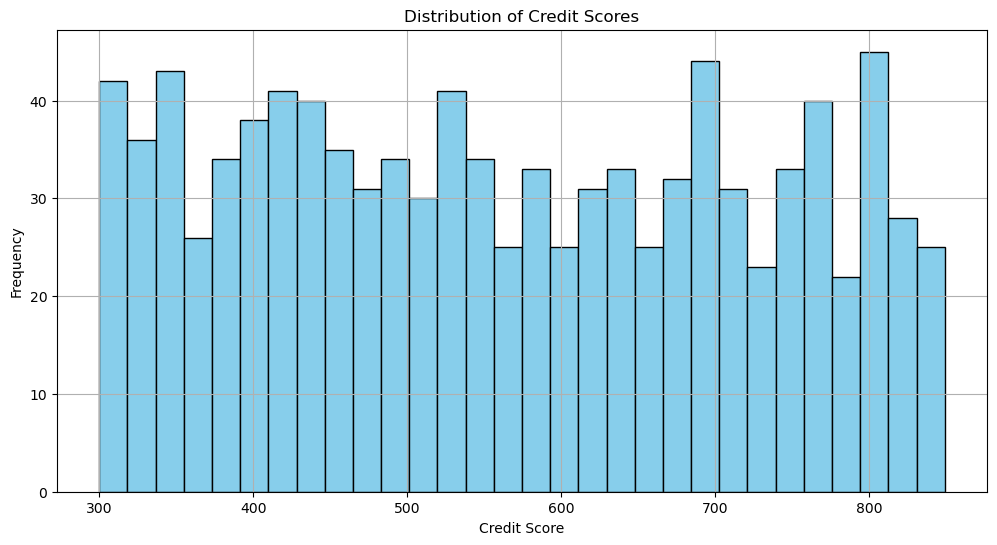

In [244]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit risk basics
def credit_risk_basics(num_customers):
    np.random.seed(42)

    # Generate synthetic data for credit risk
    credit_data = pd.DataFrame({
        'Customer ID': [f'Customer {i}' for i in range(1, num_customers + 1)],
        'Credit Score': np.random.randint(300, 850, size=num_customers),
        'Default Probability': np.random.uniform(low=0, high=1, size=num_customers),
    })

    # Visualize the distribution of credit scores
    plt.figure(figsize=(12, 6))
    plt.hist(credit_data['Credit Score'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of Credit Scores')
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.grid(True)

# Specify parameters
num_customers = 1000

# Simulate and visualize credit risk basics
credit_risk_basics(num_customers)


### Probability of Default (PD)

**Measuring Credit Risk: Probability of Default (PD)**

**1. Definition:**
   - **Probability of Default (PD):** PD is a statistical measure that estimates the likelihood of a borrower defaulting on its financial obligations within a specified time frame.

**2. Key Concepts:**

   a. **Time Horizon:**
      - PD is often calculated over a specific time horizon, such as one year, reflecting the likelihood of default within that period.

   b. **Individual vs. Portfolio PD:**
      - Individual PD assesses the probability of default for a specific borrower, while Portfolio PD considers the aggregate probability for a group of borrowers.

**3. Determinants of PD:**

   a. **Financial Ratios:**
      - Analysis of financial indicators, such as leverage, liquidity, and profitability, helps gauge the financial health of the borrower.

   b. **Credit History:**
      - Past credit behavior and repayment patterns provide insights into the borrower's creditworthiness.

   c. **Industry and Economic Conditions:**
      - External factors, including industry trends and economic conditions, impact the likelihood of default.

   d. **Market-Based Factors:**
      - Stock prices, credit spreads, and market perceptions contribute to assessing default probabilities.

**4. Calculation Methods:**

   a. **Statistical Models:**
      - Utilizing statistical techniques, such as logistic regression, to analyze historical data and predict the likelihood of default.

   b. **Credit Scoring Models:**
      - Assigning scores based on various credit-related factors to estimate the probability of default.

   c. **Credit Rating Agencies:**
      - Agencies like Moody's and S&P assign credit ratings that indirectly reflect the probability of default.

   d. **Credit Default Swap (CDS) Market:**
      - CDS spreads can be used to derive implied probabilities of default based on market pricing.

**5. Implications of PD:**

   a. **Risk Pricing:**
      - Lenders and investors use PD to price risk, determining appropriate interest rates or required returns.

   b. **Portfolio Management:**
      - PD assists in constructing well-diversified portfolios by considering the default probabilities of individual assets.

   c. **Credit Risk Mitigation:**
      - PD guides risk mitigation strategies, helping institutions manage and minimize exposure to potential defaults.

   d. **Regulatory Compliance:**
      - Financial institutions often use PD in compliance with regulatory requirements, especially under Basel III.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable historical data is crucial for accurate PD calculations, posing a challenge in the absence of comprehensive data.

   b. **Macroeconomic Factors:**
      - PD calculations may be sensitive to changes in economic conditions, requiring regular updates.

   c. **Model Validation:**
      - Rigorous validation of PD models is essential to ensure their accuracy and reliability.

**7. Use Cases:**

   a. **Credit Scoring:**
      - PD is a fundamental component in credit scoring models used for assessing the creditworthiness of individuals and businesses.

   b. **Risk-Based Pricing:**
      - Lenders use PD to determine interest rates that align with the credit risk associated with borrowers.

   c. **Stress Testing:**
      - PD is employed in stress testing scenarios to evaluate how default probabilities may change under adverse conditions.

**8. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - Regulatory frameworks prescribe the use of PD in calculating capital requirements for credit risk under standardized and internal rating-based approaches.

Understanding the Probability of Default is critical for institutions and investors to make informed credit decisions, manage risk effectively, and ensure the stability of financial systems. It serves as a key metric in various financial models, contributing to prudent risk management practices.

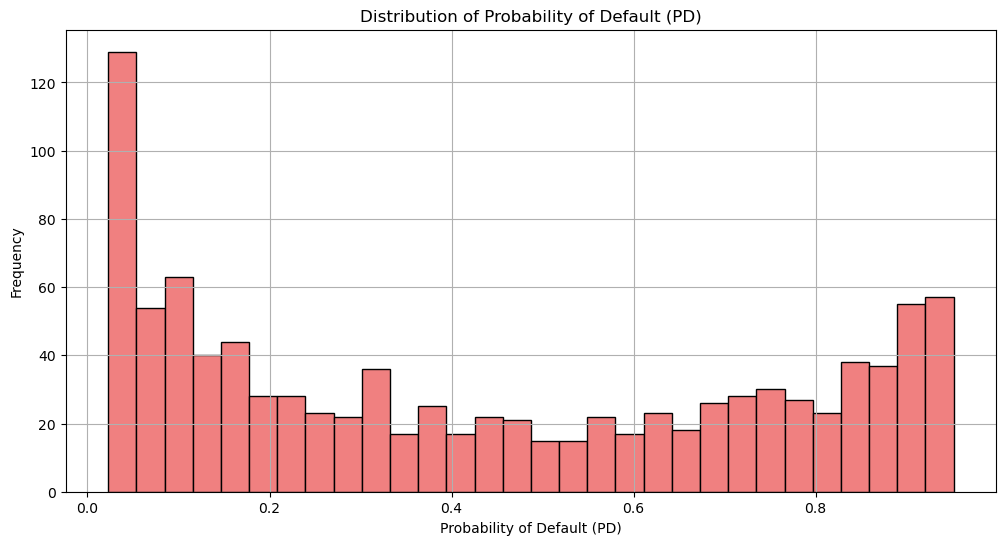

In [245]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate Probability of Default (PD)
def probability_of_default(num_customers):
    np.random.seed(42)

    # Generate synthetic data for credit risk
    credit_data = pd.DataFrame({
        'Customer ID': [f'Customer {i}' for i in range(1, num_customers + 1)],
        'Credit Score': np.random.randint(300, 850, size=num_customers),
    })

    # Calculate PD based on a simplified model (using normal distribution)
    credit_data['PD'] = norm.cdf((credit_data['Credit Score'] - 600) / 150)

    # Visualize the distribution of PD
    plt.figure(figsize=(12, 6))
    plt.hist(credit_data['PD'], bins=30, color='lightcoral', edgecolor='black')
    plt.title('Distribution of Probability of Default (PD)')
    plt.xlabel('Probability of Default (PD)')
    plt.ylabel('Frequency')
    plt.grid(True)

# Specify parameters
num_customers = 1000

# Simulate and visualize Probability of Default (PD)
probability_of_default(num_customers)


### Loss Given Default (LGD)

**Measuring Credit Risk: Loss Given Default (LGD)**

**1. Definition:**
   - **Loss Given Default (LGD):** LGD is a metric that quantifies the potential loss that a lender or investor may incur in the event of a borrower's default. It represents the percentage of the exposure that is not recovered after a default.

**2. Key Concepts:**

   a. **Recovery Rate:**
      - LGD is often expressed as a percentage and is complementary to the recovery rate. The recovery rate is the portion of the exposure that is recovered after default.

   b. **Collateral and Security:**
      - LGD takes into account the value of collateral or security that can be liquidated in the event of default.

**3. Determinants of LGD:**

   a. **Collateral Value:**
      - The market value of collateral or assets pledged by the borrower influences LGD.

   b. **Seniority of Claims:**
      - The ranking of the lender's claim in the capital structure affects the recovery in case of default.

   c. **Legal and Regulatory Environment:**
      - Legal frameworks and regulatory conditions impact the ability to recover losses.

   d. **Market Conditions:**
      - Economic conditions and market dynamics can affect the recoverability of defaulted assets.

**4. Calculation Methods:**

   a. **Historical Data Analysis:**
      - Examining historical data on defaulted loans to estimate the percentage of exposure not recovered.

   b. **Stress Testing:**
      - Conducting stress tests to simulate adverse scenarios and assess potential losses in the event of default.

   c. **Collateral Valuation:**
      - Assessing the market value of collateral or security to determine potential recovery.

   d. **Credit Derivatives Market:**
      - Utilizing information from credit derivatives markets to infer potential LGD.

**5. Implications of LGD:**

   a. **Risk Management:**
      - LGD is a critical component in risk management, helping institutions estimate potential losses and allocate capital appropriately.

   b. **Pricing Decisions:**
      - Lenders and investors use LGD in pricing decisions, determining the risk premium required for bearing potential losses.

   c. **Portfolio Diversification:**
      - Considering LGD is essential in constructing diversified portfolios to manage exposure to potential losses.

   d. **Capital Adequacy:**
      - Regulatory frameworks, such as Basel II and Basel III, incorporate LGD in calculating capital adequacy requirements for credit risk.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable historical data is crucial for accurate LGD calculations, and data availability may vary.

   b. **Dynamic Nature:**
      - LGD can be dynamic, influenced by changes in market conditions, legal frameworks, and collateral values.

   c. **Model Validation:**
      - Rigorous validation of LGD models is essential to ensure accuracy and reliability.

**7. Use Cases:**

   a. **Credit Risk Mitigation:**
      - LGD guides risk mitigation strategies, influencing decisions on collateral requirements and risk transfer mechanisms.

   b. **Capital Allocation:**
      - Financial institutions allocate capital based on LGD to cover potential losses in their credit portfolios.

   c. **Loan Pricing:**
      - LGD is a factor in determining interest rates or required returns, especially in lending scenarios.

   d. **Regulatory Compliance:**
      - Compliance with regulatory requirements involves incorporating LGD in calculating capital adequacy.

**8. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - Regulatory frameworks prescribe the incorporation of LGD in the calculation of capital requirements for credit risk.

Understanding Loss Given Default is crucial for institutions and investors to assess the potential impact of default events and make informed decisions regarding risk exposure, pricing, and capital allocation. It plays a vital role in maintaining financial stability and ensuring prudent risk management practices.

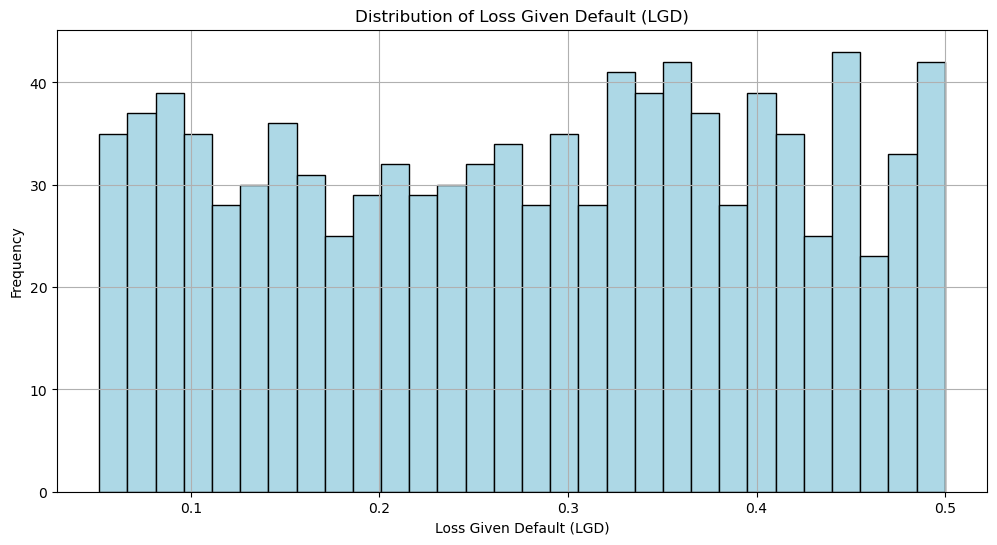

In [246]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate Loss Given Default (LGD)
def loss_given_default(num_customers):
    np.random.seed(42)

    # Generate synthetic data for credit risk
    credit_data = pd.DataFrame({
        'Customer ID': [f'Customer {i}' for i in range(1, num_customers + 1)],
        'Credit Score': np.random.randint(300, 850, size=num_customers),
    })

    # Calculate LGD based on a simplified model (using normal distribution)
    credit_data['LGD'] = np.random.uniform(0.05, 0.5, size=num_customers)

    # Visualize the distribution of LGD
    plt.figure(figsize=(12, 6))
    plt.hist(credit_data['LGD'], bins=30, color='lightblue', edgecolor='black')
    plt.title('Distribution of Loss Given Default (LGD)')
    plt.xlabel('Loss Given Default (LGD)')
    plt.ylabel('Frequency')
    plt.grid(True)
    
# Specify parameters
num_customers = 1000

# Simulate and visualize Loss Given Default (LGD)
loss_given_default(num_customers)


### Exposure at Default (EAD)

**Measuring Credit Risk: Exposure at Default (EAD)**

**1. Definition:**
   - **Exposure at Default (EAD):** EAD is a measure that quantifies the potential exposure or financial loss a lender or investor could face if a borrower defaults.

**2. Key Concepts:**

   a. **Current Exposure:**
      - EAD encompasses the current exposure at the time of default, including both funded and unfunded exposures.

   b. **Credit Conversion Factors (CCF):**
      - CCFs are applied to unfunded commitments to estimate the potential future exposure.

**3. Determinants of EAD:**

   a. **Credit Products and Instruments:**
      - Different credit products and financial instruments may have varying levels of exposure in the event of default.

   b. **Contractual Terms:**
      - The terms outlined in lending agreements, including drawdown periods and repayment schedules, influence EAD.

   c. **Collateral and Security:**
      - The presence of collateral or security can impact the potential exposure, as it may mitigate losses in case of default.

   d. **Credit Conversion Factors:**
      - CCFs assigned to unfunded commitments reflect the likelihood of these commitments being drawn upon.

**4. Calculation Methods:**

   a. **Standardized Approaches:**
      - Standardized methods, often defined by regulatory frameworks, provide formulae to calculate EAD for specific types of exposures.

   b. **Internal Models:**
      - Financial institutions may use internal models to estimate EAD, considering their specific portfolio characteristics and risk factors.

   c. **Collateral Valuation:**
      - Assessing the market value of collateral or security is crucial in determining potential EAD.

   d. **Credit Conversion Factors:**
      - Applying appropriate CCFs to unfunded commitments helps estimate their potential exposure.

**5. Implications of EAD:**

   a. **Risk Management:**
      - EAD is a fundamental component in risk management, aiding in the assessment and mitigation of potential exposure.

   b. **Capital Adequacy:**
      - Regulatory frameworks, such as Basel II and Basel III, incorporate EAD in calculating capital adequacy requirements for credit risk.

   c. **Stress Testing:**
      - EAD is used in stress testing scenarios to assess the impact of adverse conditions on potential exposure.

   d. **Portfolio Diversification:**
      - Considering EAD is essential in constructing well-diversified portfolios to manage exposure to potential losses.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable data on exposures and commitments is essential for accurate EAD calculations.

   b. **Dynamic Nature:**
      - EAD can be dynamic, influenced by changes in market conditions, collateral values, and the credit environment.

   c. **Model Validation:**
      - Rigorous validation of EAD models is crucial to ensure accuracy and reliability.

**7. Use Cases:**

   a. **Credit Risk Mitigation:**
      - EAD guides risk mitigation strategies, influencing decisions on collateral requirements and risk transfer mechanisms.

   b. **Capital Allocation:**
      - Financial institutions allocate capital based on EAD to cover potential losses in their credit portfolios.

   c. **Loan Pricing:**
      - EAD is a factor in determining interest rates or required returns, especially in lending scenarios.

   d. **Regulatory Compliance:**
      - Compliance with regulatory requirements involves incorporating EAD in calculating capital adequacy.

**8. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - Regulatory frameworks prescribe the incorporation of EAD in the calculation of capital requirements for credit risk.

Understanding Exposure at Default is crucial for institutions and investors to assess the potential financial impact of default events, make informed decisions regarding risk exposure, and ensure compliance with regulatory standards. It plays a key role in maintaining financial stability and implementing effective risk management practices.

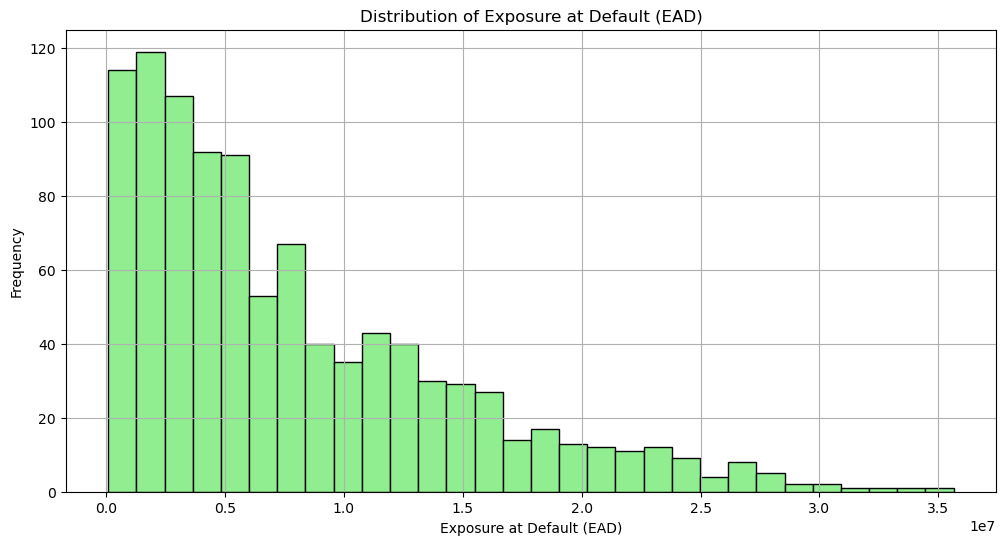

In [247]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate Exposure at Default (EAD)
def exposure_at_default(num_customers):
    np.random.seed(42)

    # Generate synthetic data for credit risk
    credit_data = pd.DataFrame({
        'Customer ID': [f'Customer {i}' for i in range(1, num_customers + 1)],
        'Credit Score': np.random.randint(300, 850, size=num_customers),
        'Outstanding Balance': np.random.uniform(1000, 100000, size=num_customers),
    })

    # Calculate EAD based on a simplified model (using normal distribution)
    credit_data['EAD'] = credit_data['Credit Score'] * credit_data['Outstanding Balance'] * np.random.uniform(0.05, 0.5, size=num_customers)

    # Visualize the distribution of EAD
    plt.figure(figsize=(12, 6))
    plt.hist(credit_data['EAD'], bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Exposure at Default (EAD)')
    plt.xlabel('Exposure at Default (EAD)')
    plt.ylabel('Frequency')
    plt.grid(True)

# Specify parameters
num_customers = 1000

# Simulate and visualize Exposure at Default (EAD)
exposure_at_default(num_customers)


### Expected Loss (EL)

**Measuring Credit Risk: Expected Loss (EL)**

**1. Definition:**
   - **Expected Loss (EL):** EL is a key metric used to quantify the average amount of potential loss that a lender or investor may face due to credit risk over a specified period. It is the product of three components: Probability of Default (PD), Loss Given Default (LGD), and Exposure at Default (EAD).

**2. Key Concepts:**

   a. **Components:**
      - EL is calculated as PD multiplied by LGD multiplied by EAD. It represents the expected value of losses in the credit portfolio.

   b. **Risk Over Time:**
      - EL considers the potential for losses over a defined time horizon, often expressed on an annual basis.

**3. Calculation Methods:**

   a. **Mathematical Formulation:**
      - EL = PD × LGD × EAD

   b. **Integration of Components:**
      - EL integrates the probability of default, the potential loss given default, and the exposure at default to estimate the average expected loss.

**4. Determinants of EL:**

   a. **Credit Portfolio Composition:**
      - The composition of the credit portfolio, including different types of exposures and counterparties, influences EL.

   b. **Credit Quality of Borrowers:**
      - The creditworthiness of borrowers, as reflected in PD, is a major determinant of EL.

   c. **Portfolio Diversification:**
      - Diversification across various industries, regions, and types of credits can impact the overall EL.

**5. Implications of EL:**

   a. **Risk Management:**
      - EL is a crucial tool in risk management, providing a comprehensive assessment of potential credit losses.

   b. **Capital Allocation:**
      - Financial institutions allocate capital based on EL to cover potential losses in their credit portfolios.

   c. **Stress Testing:**
      - EL is used in stress testing scenarios to evaluate the impact of adverse conditions on potential losses.

   d. **Portfolio Optimization:**
      - EL informs portfolio optimization strategies, helping institutions balance risk and return.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable data on PD, LGD, and EAD is essential for accurate EL calculations.

   b. **Model Complexity:**
      - EL calculations involve complex modeling and integration of multiple components, requiring robust models and methodologies.

   c. **Dynamic Nature:**
      - EL can be dynamic, influenced by changes in economic conditions, market dynamics, and credit environment.

**7. Use Cases:**

   a. **Credit Risk Mitigation:**
      - EL guides risk mitigation strategies, aiding in decisions related to collateral requirements and risk transfer mechanisms.

   b. **Capital Allocation:**
      - Financial institutions allocate capital based on EL to cover potential losses, ensuring regulatory compliance.

   c. **Loan Pricing:**
      - EL is a key factor in determining interest rates or required returns, especially in lending scenarios.

   d. **Strategic Decision-Making:**
      - EL informs strategic decision-making by providing insights into the overall risk profile of a credit portfolio.

**8. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - Regulatory frameworks incorporate EL in calculating capital requirements for credit risk under standardized and internal rating-based approaches.

Understanding Expected Loss is crucial for institutions and investors to quantify and manage credit risk effectively. It serves as a comprehensive metric that integrates various components, offering a holistic view of potential credit losses over a specified time horizon.

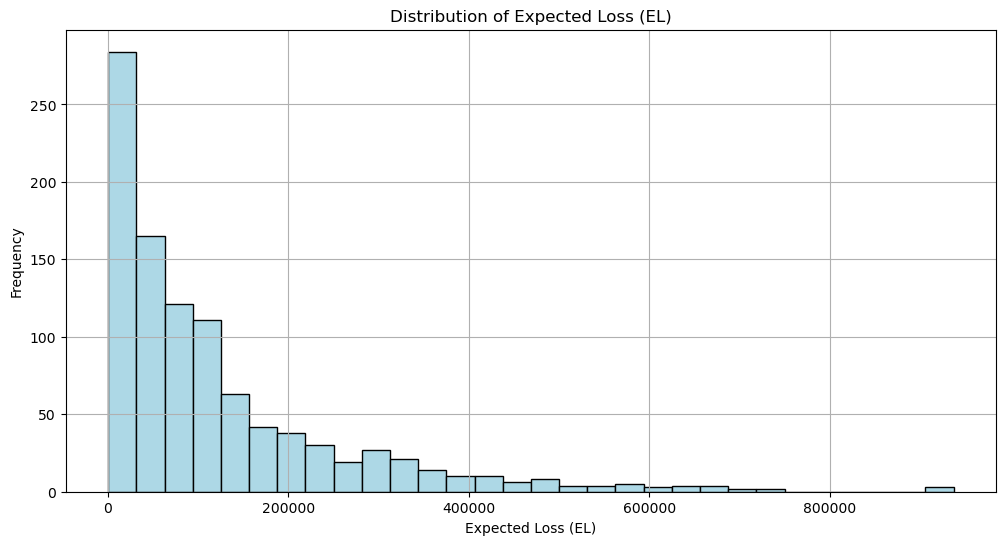

In [248]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate Expected Loss (EL)
def expected_loss(num_customers):
    np.random.seed(42)

    # Generate synthetic data for credit risk
    credit_data = pd.DataFrame({
        'Customer ID': [f'Customer {i}' for i in range(1, num_customers + 1)],
        'Credit Score': np.random.randint(300, 850, size=num_customers),
        'Outstanding Balance': np.random.uniform(1000, 100000, size=num_customers),
    })

    # Calculate components of Expected Loss (EL)
    credit_data['PD'] = np.random.uniform(0.01, 0.1, size=num_customers)  # Probability of Default
    credit_data['LGD'] = np.random.uniform(0.1, 0.5, size=num_customers)  # Loss Given Default
    credit_data['EAD'] = credit_data['Credit Score'] * credit_data['Outstanding Balance'] * np.random.uniform(0.05, 0.5, size=num_customers)

    # Calculate Expected Loss (EL)
    credit_data['EL'] = credit_data['PD'] * credit_data['LGD'] * credit_data['EAD']

    # Visualize the distribution of Expected Loss (EL)
    plt.figure(figsize=(12, 6))
    plt.hist(credit_data['EL'], bins=30, color='lightblue', edgecolor='black')
    plt.title('Distribution of Expected Loss (EL)')
    plt.xlabel('Expected Loss (EL)')
    plt.ylabel('Frequency')
    plt.grid(True)

# Specify parameters
num_customers = 1000

# Simulate and visualize Expected Loss (EL)
expected_loss(num_customers)


### Credit Rating Models

***Credit Rating Models**

**1. Definition:**
   - **Credit Rating Models:** Credit rating models are quantitative and qualitative frameworks used to assess the creditworthiness of borrowers, issuers, or financial instruments. These models assign credit ratings that reflect the risk of default.

**2. Key Concepts:**

   a. **Credit Rating Agencies:**
      - Credit rating models are often employed by credit rating agencies (e.g., Moody's, S&P, Fitch) to evaluate the credit risk of entities and financial instruments.

   b. **Rating Categories:**
      - Credit ratings typically fall into categories such as AAA (highest credit quality) to D (default).

**3. Types of Credit Rating Models:**

   a. **Quantitative Models:**
      - Utilize statistical techniques and financial ratios to assess credit risk based on historical and financial data.

   b. **Qualitative Models:**
      - Incorporate non-financial factors, including industry conditions, management quality, and regulatory environments, to assess credit risk.

   c. **Hybrid Models:**
      - Combine both quantitative and qualitative factors for a comprehensive credit risk assessment.

**4. Components of Credit Rating Models:**

   a. **Financial Ratios:**
      - Ratios such as leverage, liquidity, and profitability are analyzed to gauge the financial health of the entity.

   b. **Market-Based Factors:**
      - Market conditions, stock prices, and credit spreads may be considered in assessing credit risk.

   c. **Industry and Economic Conditions:**
      - Models factor in the impact of industry trends and broader economic conditions on creditworthiness.

   d. **Management Quality:**
      - Qualitative assessments of management quality, governance, and strategic decisions play a role in credit rating models.

**5. Implications of Credit Rating Models:**

   a. **Risk Pricing:**
      - Credit rating models contribute to risk pricing, influencing interest rates and required returns.

   b. **Investor Decision-Making:**
      - Investors use credit ratings as a key factor in making investment decisions, considering risk and return.

   c. **Regulatory Compliance:**
      - Certain regulations mandate the use of credit ratings for capital adequacy calculations and risk management.

   d. **Issuer Access to Capital:**
      - High credit ratings can enhance an issuer's ability to access capital at favorable terms.

**6. Challenges and Considerations:**

   a. **Subjectivity:**
      - Qualitative factors introduce subjectivity, and different models or agencies may assign varying ratings.

   b. **Model Validation:**
      - Rigorous validation is required to ensure the accuracy and reliability of credit rating models.

   c. **Dynamic Nature:**
      - Credit conditions can change, requiring models to adapt to evolving market and economic dynamics.

**7. Use Cases:**

   a. **Corporate Bonds and Securities:**
      - Credit rating models assess the credit risk of corporate bonds and securities, influencing investor decisions.

   b. **Bank Loans:**
      - Banks use credit rating models to evaluate the creditworthiness of borrowers applying for loans.

   c. **Sovereign Debt:**
      - Credit rating agencies assess the creditworthiness of countries, impacting sovereign debt ratings.

   d. **Structured Finance:**
      - Models are applied to assess the credit risk of structured financial products, such as mortgage-backed securities.

**8. Regulatory Landscape:**

   a. **Regulatory Requirements:**
      - Regulatory frameworks, such as Basel II and Basel III, prescribe the use of credit ratings for certain risk assessments and capital calculations.

Credit rating models play a pivotal role in the financial industry by providing a standardized and systematic approach to evaluating credit risk. They serve as essential tools for investors, lenders, and regulators to make informed decisions and ensure the stability of financial markets.

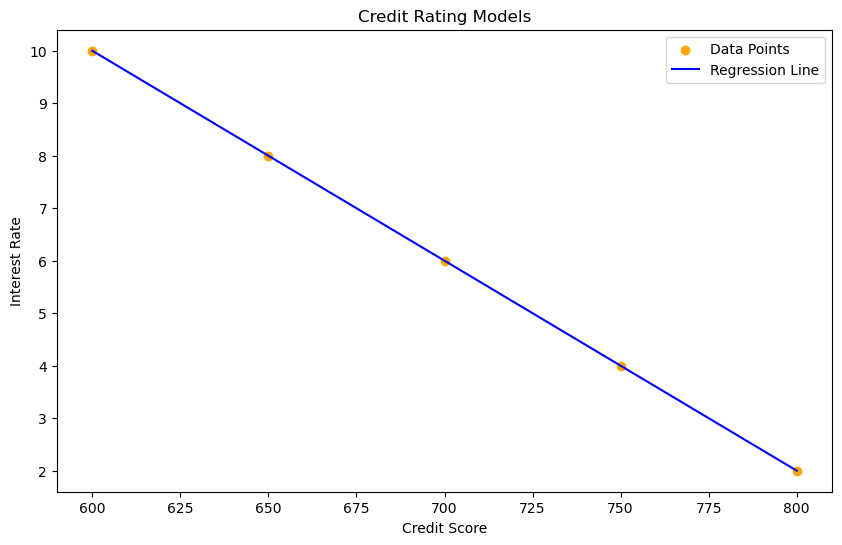

In [249]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Sample data for credit rating models
credit_scores = [600, 650, 700, 750, 800]
interest_rates = [10, 8, 6, 4, 2]

# Create a DataFrame
data = {'Credit Score': credit_scores, 'Interest Rate': interest_rates}
df = pd.DataFrame(data)

# Function to visualize credit rating models
def visualize_credit_rating_models():
    # Plotting credit scores against interest rates
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Credit Score'], df['Interest Rate'], color='orange', label='Data Points')
    
    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(df[['Credit Score']], df['Interest Rate'])
    
    # Plotting the regression line
    plt.plot(df[['Credit Score']], model.predict(df[['Credit Score']]), color='blue', label='Regression Line')
    
    plt.title('Credit Rating Models')
    plt.xlabel('Credit Score')
    plt.ylabel('Interest Rate')
    plt.legend()
    plt.show()

# Visualize credit rating models
visualize_credit_rating_models()

### Credit Scoring

**Credit Scoring**

**1. Definition:**
   - **Credit Scoring:** Credit scoring is a systematic process of evaluating the creditworthiness of individuals, businesses, or entities based on various financial and non-financial factors. It results in a numerical score that reflects the likelihood of credit default.

**2. Key Concepts:**

   a. **Scoring Models:**
      - Credit scoring models use statistical algorithms to analyze data and assign a credit score to represent the risk level.

   b. **Credit Score Range:**
      - Credit scores typically range from a low value (indicating higher risk) to a high value (indicating lower risk).

**3. Components of Credit Scoring Models:**

   a. **Payment History:**
      - Timely payments on existing credit obligations positively impact credit scores.

   b. **Credit Utilization:**
      - The proportion of available credit used can influence credit scores.

   c. **Length of Credit History:**
      - The duration of credit accounts and the age of the oldest account are considered in scoring models.

   d. **Types of Credit:**
      - A mix of credit types (e.g., credit cards, installment loans) contributes to a well-rounded credit profile.

   e. **New Credit Applications:**
      - Recent applications for new credit may have an impact on credit scores.

**4. Implications of Credit Scoring:**

   a. **Risk-Based Pricing:**
      - Credit scores play a crucial role in risk-based pricing, determining interest rates or required returns.

   b. **Loan Approval Decisions:**
      - Lenders use credit scores to assess the likelihood of default and make loan approval decisions.

   c. **Credit Card Issuance:**
      - Credit card issuers use credit scores to determine credit limits and approval for card issuance.

   d. **Tenant Screening:**
      - Landlords may use credit scores in tenant screening processes to assess financial responsibility.

**5. Credit Scoring Models:**

   a. **FICO Score:**
      - The FICO score, developed by Fair Isaac Corporation, is a widely used credit scoring model.

   b. **VantageScore:**
      - An alternative credit scoring model developed collaboratively by the three major credit bureaus.

   c. **Custom Models:**
      - Some lenders and institutions may develop custom credit scoring models tailored to their specific needs.

**6. Challenges and Considerations:**

   a. **Limited Predictive Power:**
      - Credit scores may not capture all aspects of creditworthiness, leading to some limitations in predictive power.

   b. **Subjectivity:**
      - The choice of factors and weightings in scoring models introduces subjectivity.

   c. **Model Updates:**
      - Scoring models may require periodic updates to adapt to changing credit conditions.

**7. Use Cases:**

   a. **Mortgage Lending:**
      - Credit scores influence mortgage lending decisions, affecting interest rates and loan approval.

   b. **Auto Loans:**
      - Lenders use credit scores to assess the credit risk of applicants for auto loans.

   c. **Credit Cards:**
      - Credit card issuers utilize credit scores to determine credit limits and interest rates.

   d. **Personal Loans:**
      - Credit scores guide approval decisions and terms for personal loan applications.

**8. Regulatory Landscape:**

   a. **Consumer Financial Protection Bureau (CFPB):**
      - The CFPB oversees the use of credit scores and ensures fair and accurate credit reporting practices.

Credit scoring is a vital tool in the financial industry, enabling lenders to efficiently assess credit risk and make informed decisions. It enhances the credit-granting process, promotes risk-based pricing, and facilitates responsible lending practices.

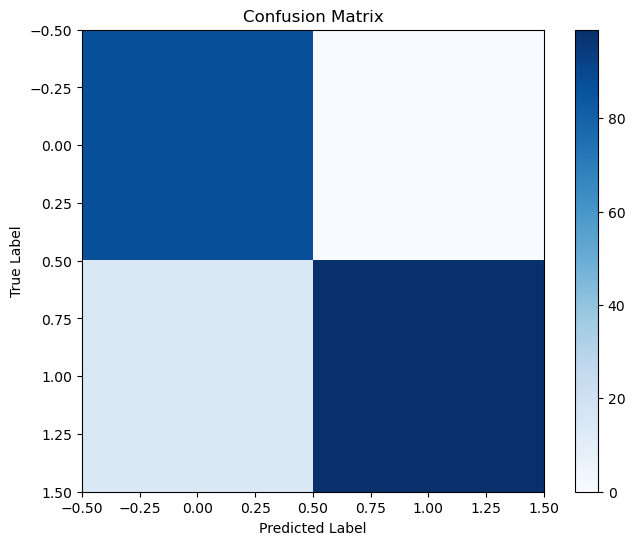

In [250]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit scoring
def credit_scoring(num_applicants):
    np.random.seed(42)

    # Generate synthetic data for credit scoring
    X, y = make_classification(n_samples=num_applicants, n_features=5, n_informative=3, n_redundant=1, n_classes=2, random_state=42)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Logistic Regression classifier
    clf = OneVsRestClassifier(LogisticRegression(random_state=42))
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and plot confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
# Specify parameters
num_applicants = 1000

# Simulate and visualize credit scoring
credit_scoring(num_applicants)


### Credit Spreads

**Credit Spreads**

**1. Definition:**
   - **Credit Spreads:** Credit spreads represent the difference in yields between different types of bonds or debt securities, primarily reflecting the perceived credit risk of the issuers. Widening spreads typically indicate increased credit risk, while narrowing spreads suggest reduced risk.

**2. Key Concepts:**

   a. **Yield Differential:**
      - Credit spreads are expressed as the additional yield investors demand for holding a bond with credit risk compared to a risk-free benchmark.

   b. **Market Perception:**
      - Spreads are influenced by market perceptions of credit quality, economic conditions, and overall investor sentiment.

**3. Components of Credit Spreads:**

   a. **Default Risk Premium:**
      - The portion of the credit spread attributed to compensation for the risk of default by the issuer.

   b. **Liquidity Premium:**
      - Reflects the additional compensation investors require for holding less liquid securities.

   c. **Term Structure:**
      - Longer-term bonds may have wider credit spreads to account for the increased uncertainty over an extended period.

**4. Calculation Methods:**

   a. **Spread Over Benchmark:**
      - Calculated by subtracting the yield of a risk-free benchmark (e.g., government bonds) from the yield of a bond with credit risk.

   b. **Option-Adjusted Spread (OAS):**
      - Adjusts credit spreads to account for embedded options in bonds, providing a more accurate measure of credit risk.

**5. Implications of Credit Spreads:**

   a. **Market Sentiment:**
      - Widening spreads may indicate deteriorating market sentiment and increased concerns about credit risk.

   b. **Risk Pricing:**
      - Investors use credit spreads to assess the risk-return profile of different securities and make investment decisions.

   c. **Corporate Borrowing Costs:**
      - Companies may face higher borrowing costs if credit spreads widen, especially in the bond market.

**6. Challenges and Considerations:**

   a. **Market Volatility:**
      - Credit spreads can be influenced by market volatility, making it challenging to discern underlying credit risk.

   b. **Market Liquidity:**
      - Less liquid markets may experience exaggerated movements in credit spreads.

   c. **Credit Rating Changes:**
      - Rating agency actions and credit rating changes can impact credit spreads.

**7. Use Cases:**

   a. **Bond Market Analysis:**
      - Investors analyze credit spreads to identify attractive investment opportunities and assess credit risk.

   b. **Credit Default Swap (CDS) Market:**
      - Credit spreads in the CDS market provide insights into market expectations of credit events.

   c. **Corporate Debt Issuance:**
      - Companies monitor credit spreads when issuing debt to gauge market conditions and borrowing costs.

**8. Regulatory Landscape:**

   a. **Regulatory Capital Requirements:**
      - Regulatory frameworks, such as Basel III, may incorporate credit spreads in determining capital requirements for banks based on credit risk exposure.

Credit spreads are a valuable indicator in financial markets, providing real-time information about investor perceptions of credit risk. Widening spreads can signal potential challenges for issuers, impact borrowing costs, and influence investment decisions across various sectors.

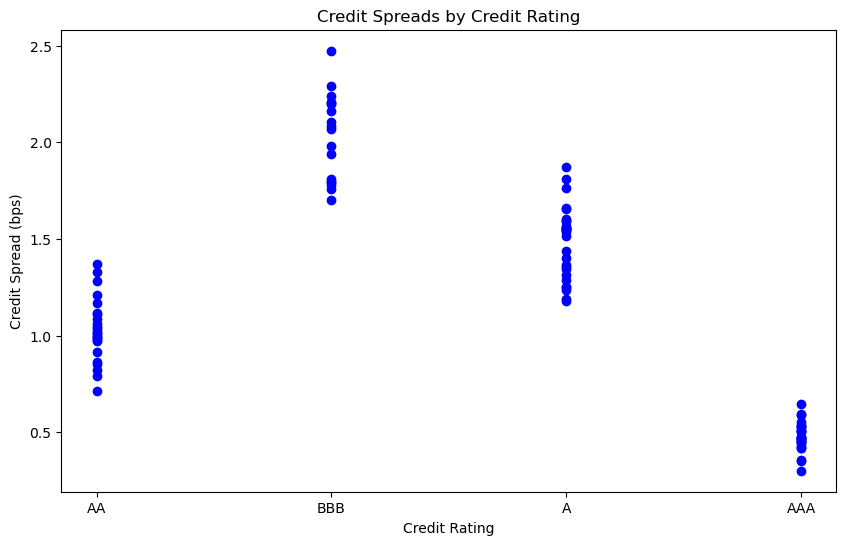

In [251]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit spreads
def simulate_credit_spreads():
    np.random.seed(42)

    # Generate synthetic data for credit spreads
    credit_rating = np.random.choice(['AAA', 'AA', 'A', 'BBB'], size=100, p=[0.2, 0.3, 0.3, 0.2])
    spread = np.zeros_like(credit_rating, dtype=float)

    # Assign spreads based on credit ratings
    spread[credit_rating == 'AAA'] = np.random.normal(loc=0.5, scale=0.1, size=np.sum(credit_rating == 'AAA'))
    spread[credit_rating == 'AA'] = np.random.normal(loc=1.0, scale=0.15, size=np.sum(credit_rating == 'AA'))
    spread[credit_rating == 'A'] = np.random.normal(loc=1.5, scale=0.2, size=np.sum(credit_rating == 'A'))
    spread[credit_rating == 'BBB'] = np.random.normal(loc=2.0, scale=0.25, size=np.sum(credit_rating == 'BBB'))

    # Visualize credit spreads
    plt.figure(figsize=(10, 6))
    plt.scatter(credit_rating, spread, color='blue')
    plt.title('Credit Spreads by Credit Rating')
    plt.xlabel('Credit Rating')
    plt.ylabel('Credit Spread (bps)')
    plt.show()
    
# Simulate and visualize credit spreads
simulate_credit_spreads()


### Collateral

**Collateral**

**1. Definition:**
   - **Collateral:** Collateral refers to assets or property that a borrower pledges to a lender as security for a loan. In the context of measuring credit risk, the value and quality of collateral play a crucial role in mitigating potential losses in the event of default.

**2. Key Concepts:**

   a. **Secured Loans:**
      - Collateral is commonly associated with secured loans, where the lender has a claim on specific assets if the borrower fails to meet repayment obligations.

   b. **Asset Valuation:**
      - The value of collateral is assessed to determine its adequacy in covering the loan amount, providing a buffer against credit risk.

**3. Types of Collateral:**

   a. **Real Assets:**
      - Real estate, such as homes or commercial properties, can serve as collateral for mortgage loans.

   b. **Financial Assets:**
      - Securities, stocks, or bonds may be pledged as collateral for certain types of loans.

   c. **Personal Property:**
      - Vehicles, equipment, or valuable personal items can be used as collateral for loans.

**4. Implications of Collateral in Credit Risk:**

   a. **Risk Mitigation:**
      - Collateral serves as a form of risk mitigation, providing lenders with a source of recovery in case of default.

   b. **Loan Approval and Terms:**
      - The presence of collateral can impact loan approval decisions and terms, including interest rates and loan amounts.

   c. **Asset Valuation:**
      - Lenders assess the value and liquidity of collateral to ensure it adequately covers the loan amount.

**5. Calculation Methods:**

   a. **Loan-to-Value Ratio (LTV):**
      - LTV is a common metric used to assess the relationship between the loan amount and the value of the collateral.

   b. **Collateral Valuation Models:**
      - Models may be employed to evaluate the market value and potential fluctuations in the value of collateral.

**6. Challenges and Considerations:**

   a. **Collateral Quality:**
      - The type and quality of collateral can vary, impacting its effectiveness in mitigating credit risk.

   b. **Market Fluctuations:**
      - Changes in market conditions may affect the value of collateral, introducing potential risks.

   c. **Legal Framework:**
      - The legal and regulatory environment governing collateral varies, affecting its enforceability and recovery.

**7. Use Cases:**

   a. **Mortgage Lending:**
      - Real estate serves as collateral for mortgage loans, influencing loan approval and terms.

   b. **Auto Loans:**
      - Vehicles are commonly used as collateral for auto loans, impacting loan terms and interest rates.

   c. **Business Loans:**
      - Businesses may pledge assets, such as equipment or inventory, as collateral for business loans.

**8. Regulatory Landscape:**

   a. **Regulatory Capital Requirements:**
      - Collateral may be considered in regulatory frameworks, such as Basel III, when determining capital requirements for credit risk.

Collateral plays a significant role in credit risk management, providing a tangible means for lenders to secure their interests and mitigate potential losses in the event of borrower default. The evaluation and monitoring of collateral are essential components in the overall assessment of credit risk in various lending scenarios.

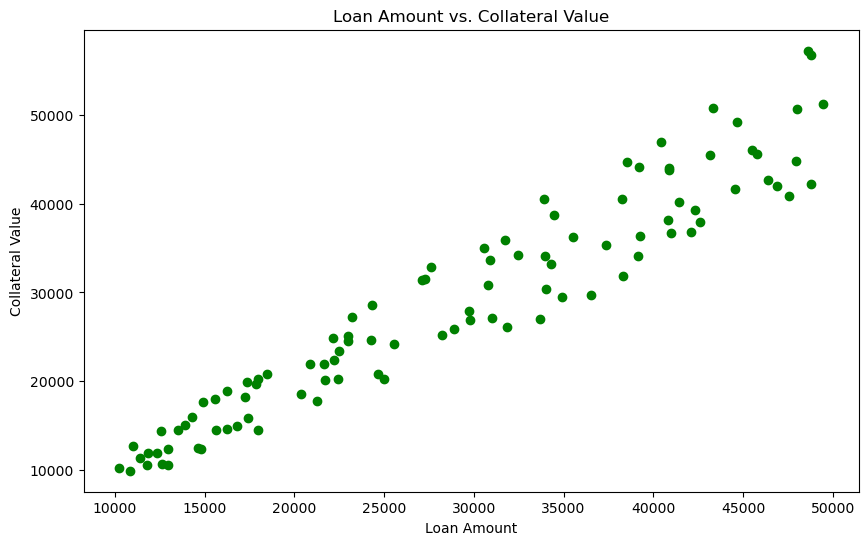

In [252]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate collateral values
def simulate_collateral():
    np.random.seed(42)

    # Generate synthetic data for collateral values
    loan_amounts = np.random.uniform(low=10000, high=50000, size=100)
    collateral_values = loan_amounts * np.random.uniform(low=0.8, high=1.2, size=100)

    # Visualize collateral values
    plt.figure(figsize=(10, 6))
    plt.scatter(loan_amounts, collateral_values, color='green')
    plt.title('Loan Amount vs. Collateral Value')
    plt.xlabel('Loan Amount')
    plt.ylabel('Collateral Value')
    plt.show()
    
# Simulate and visualize collateral values
simulate_collateral()


### Stress Testing

**Stress Testing**

**1. Definition:**
   - **Stress Testing:** Stress testing is a risk assessment technique that involves subjecting a financial system, portfolio, or institution to adverse scenarios or "stressors" to evaluate its resilience and potential vulnerabilities under challenging conditions. In credit risk, stress testing helps assess the impact of adverse economic and financial conditions on credit portfolios.

**2. Key Concepts:**

   a. **Adverse Scenarios:**
      - Stress testing involves simulating adverse scenarios, such as economic downturns, interest rate spikes, or other severe financial events.

   b. **Forward-Looking Analysis:**
      - Stress testing goes beyond historical data and incorporates forward-looking analysis to assess potential future risks.

**3. Types of Stress Testing in Credit Risk:**

   a. **Macroeconomic Stress Testing:**
      - Assesses the impact of adverse macroeconomic conditions on credit portfolios, considering factors like GDP contraction, unemployment spikes, and interest rate changes.

   b. **Credit-Specific Stress Testing:**
      - Focuses on the impact of specific credit events or shocks on a portfolio, such as changes in default rates, recovery rates, or industry-specific challenges.

**4. Implications of Stress Testing:**

   a. **Risk Identification:**
      - Stress testing helps identify vulnerabilities and potential weaknesses in credit portfolios under adverse conditions.

   b. **Capital Adequacy:**
      - Results from stress tests inform capital adequacy assessments, ensuring that institutions hold sufficient capital to withstand severe scenarios.

   c. **Strategic Decision-Making:**
      - Stress testing results guide strategic decision-making by providing insights into potential risks and informing risk management strategies.

**5. Methodologies for Stress Testing:**

   a. **Scenario Analysis:**
      - Involves defining hypothetical scenarios and assessing their impact on credit portfolios.

   b. **Monte Carlo Simulation:**
      - Utilizes random sampling and simulation techniques to model a range of possible future outcomes and their impact on credit risk.

   c. **Sensitivity Analysis:**
      - Examines how changes in specific variables or parameters affect credit risk outcomes.

**6. Challenges and Considerations:**

   a. **Scenario Selection:**
      - Choosing relevant and plausible stress scenarios requires careful consideration and expertise.

   b. **Data Quality:**
      - Stress testing relies on accurate and reliable data, and data quality is crucial for meaningful results.

   c. **Model Assumptions:**
      - Assumptions made in stress testing models can influence outcomes, and their reasonableness should be carefully evaluated.

**7. Use Cases:**

   a. **Banking Sector:**
      - Banks use stress testing to assess the impact of economic downturns on their loan portfolios and overall financial health.

   b. **Investment Portfolios:**
      - Asset managers stress test investment portfolios to evaluate potential risks and adjust strategies accordingly.

   c. **Regulatory Compliance:**
      - Regulatory authorities may require financial institutions to conduct stress tests to ensure resilience and compliance with capital requirements.

**8. Regulatory Landscape:**

   a. **Regulatory Stress Tests:**
      - Regulatory bodies, such as central banks or financial regulators, may mandate stress tests for financial institutions to ensure system-wide stability and compliance with regulatory requirements.

Stress testing is a crucial tool in assessing and managing credit risk, providing a forward-looking perspective that goes beyond traditional risk measurement methods. It enhances the ability of financial institutions to anticipate and navigate potential challenges in dynamic and uncertain economic environments.

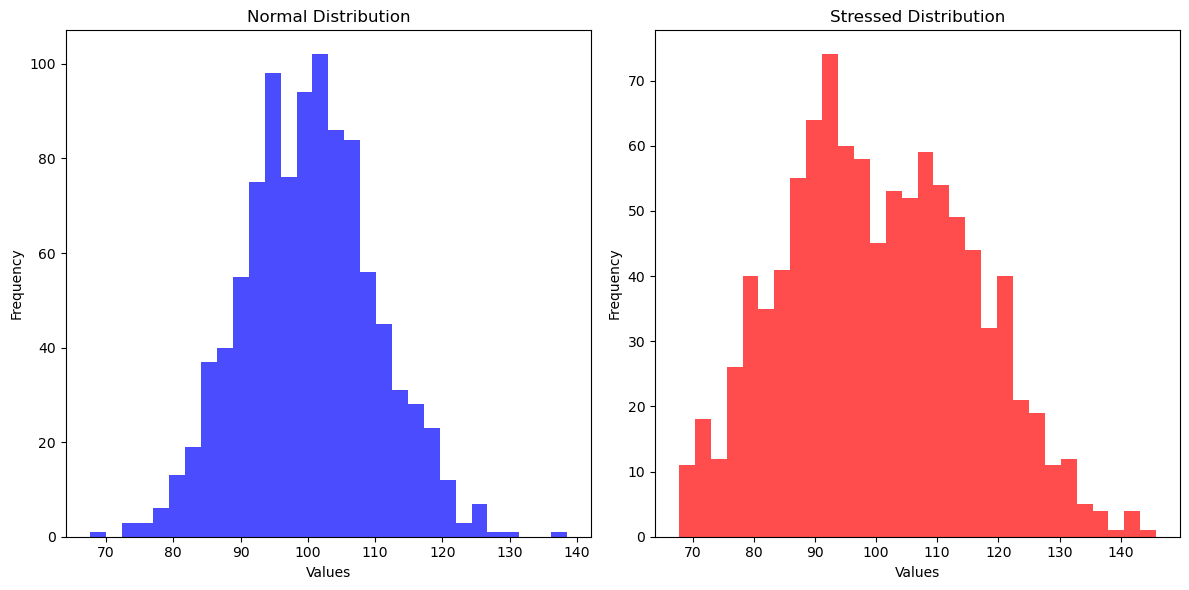

In [253]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate stress testing
def simulate_stress_testing():
    np.random.seed(42)

    # Generate synthetic data for financial values
    normal_values = np.random.normal(loc=100, scale=10, size=1000)
    stressed_values = normal_values * np.random.uniform(low=0.8, high=1.2, size=1000)

    # Visualize normal and stressed distributions
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(normal_values, bins=30, color='blue', alpha=0.7)
    plt.title('Normal Distribution')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(stressed_values, bins=30, color='red', alpha=0.7)
    plt.title('Stressed Distribution')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Simulate and visualize stress testing
simulate_stress_testing()


### Credit Derivatives

**Credit Derivatives**

**1. Definition:**
   - **Credit Derivatives:** Credit derivatives are financial instruments that allow market participants to transfer or manage credit risk. These instruments derive their value from the creditworthiness of an underlying entity, such as a corporate bond or a loan portfolio.

**2. Key Concepts:**

   a. **Credit Default Swap (CDS):**
      - The most common type of credit derivative, a Credit Default Swap (CDS), allows an investor to "swap" or offset their credit risk with that of another party. It functions as insurance against the default of a specific borrower.

   b. **Collateralized Debt Obligations (CDO):**
      - CDOs are structured products that bundle various debt securities, including bonds and loans. They are often divided into tranches, each carrying a different level of credit risk.

**3. Types of Credit Derivatives:**

   a. **Credit Default Swap (CDS):**
      - A CDS is a contract where the buyer makes periodic payments to the seller in exchange for protection against the default of a reference entity.

   b. **Collateralized Debt Obligations (CDO):**
      - CDOs pool together various debt obligations and create tradable securities with different risk profiles.

**4. Implications of Credit Derivatives in Credit Risk:**

   a. **Risk Transfer:**
      - Credit derivatives enable the transfer of credit risk from one party to another, allowing for more efficient risk management.

   b. **Liquidity and Market Access:**
      - Credit derivatives provide liquidity in the market by allowing investors to trade and speculate on credit risk without directly owning the underlying assets.

   c. **Hedging:**
      - Market participants use credit derivatives to hedge their exposure to credit risk, protecting against potential losses.

**5. Credit Derivative Market:**

   a. **Over-the-Counter (OTC) Market:**
      - Credit derivatives are often traded in the OTC market, where customized contracts are negotiated directly between parties.

   b. **Central Clearinghouses:**
      - Some credit derivatives are now cleared through central clearinghouses, introducing standardized contracts and reducing counterparty risk.

**6. Challenges and Considerations:**

   a. **Counterparty Risk:**
      - Credit derivatives involve counterparty risk, and the financial health of the parties involved is crucial.

   b. **Market Liquidity:**
      - Liquidity in the credit derivative market can vary, impacting the ease of buying or selling these instruments.

   c. **Valuation Complexity:**
      - The valuation of credit derivatives can be complex, especially for customized or less liquid instruments.

**7. Use Cases:**

   a. **Risk Management:**
      - Financial institutions use credit derivatives to manage and hedge their exposure to credit risk in loan portfolios or investment portfolios.

   b. **Investment Strategies:**
      - Investors use credit derivatives for various investment strategies, including speculating on changes in credit spreads or managing risk in fixed-income portfolios.

   c. **Regulatory Compliance:**
      - Regulatory frameworks may consider credit derivatives in assessing the overall risk exposure of financial institutions.

**8. Regulatory Landscape:**

   a. **Dodd-Frank Act:**
      - The Dodd-Frank Act introduced regulatory measures for over-the-counter derivatives, including credit derivatives, to enhance transparency and reduce systemic risk.

Credit derivatives play a significant role in the financial markets, offering tools for risk management, liquidity provision, and investment strategies. The use of credit derivatives requires careful consideration of counterparty risk, market dynamics, and valuation complexities to ensure effective risk mitigation and financial stability.

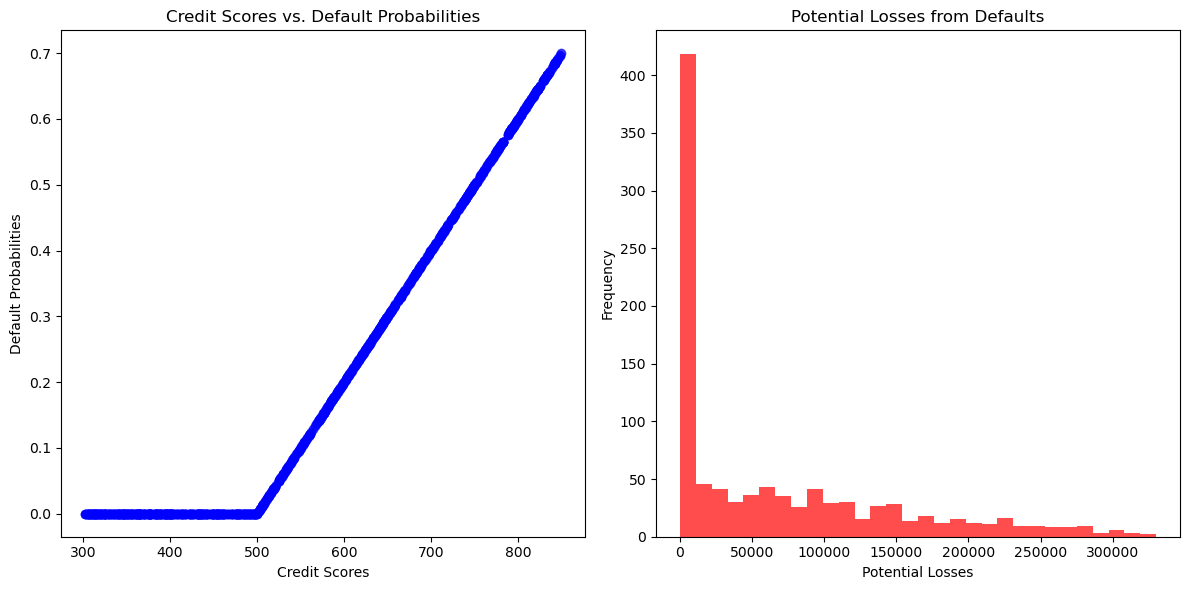

In [254]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate credit derivatives
def simulate_credit_derivatives():
    np.random.seed(42)

    # Generate synthetic data for credit derivatives
    credit_scores = np.random.uniform(low=300, high=850, size=1000)
    default_probabilities = np.clip((credit_scores - 500) / 500, 0, 1)
    loss_given_default = np.random.uniform(low=0.1, high=0.5, size=1000)
    credit_exposure = 1000000  # Initial credit exposure

    # Calculate potential losses
    potential_losses = default_probabilities * loss_given_default * credit_exposure

    # Visualize credit scores and potential losses
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(credit_scores, default_probabilities, color='blue', alpha=0.7)
    plt.title('Credit Scores vs. Default Probabilities')
    plt.xlabel('Credit Scores')
    plt.ylabel('Default Probabilities')

    plt.subplot(1, 2, 2)
    plt.hist(potential_losses, bins=30, color='red', alpha=0.7)
    plt.title('Potential Losses from Defaults')
    plt.xlabel('Potential Losses')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
# Simulate and visualize credit derivatives
simulate_credit_derivatives()


# Operational Risk

### Understanding Operational Risk

**Understanding Operational Risk**

**1. Definition:**
   - **Operational Risk:** Operational risk is the risk of loss resulting from inadequate or failed internal processes, systems, people, or external events. It encompasses a wide range of factors that can disrupt business operations, leading to financial losses, reputational damage, or regulatory consequences.

**2. Key Concepts:**

   a. **Internal Factors:**
      - Inadequate internal processes, system failures, human errors, or management deficiencies contribute to operational risk.

   b. **External Factors:**
      - External events, such as natural disasters, cyberattacks, or geopolitical events, can pose operational risks beyond an organization's control.

**3. Categories of Operational Risk:**

   a. **People Risk:**
      - Arises from human errors, misconduct, inadequate training, or workforce disruptions.

   b. **Process Risk:**
      - Relates to failures or weaknesses in internal processes, including errors in transaction processing or inadequate controls.

   c. **System Risk:**
      - Involves risks associated with information technology systems, including system failures, cybersecurity threats, or technology obsolescence.

   d. **External Risk:**
      - Stemming from events outside the organization's control, such as natural disasters, regulatory changes, or geopolitical developments.

**4. Implications of Operational Risk:**

   a. **Financial Losses:**
      - Operational failures can result in direct financial losses, including legal costs, fines, or expenses related to remediation.

   b. **Reputational Damage:**
      - Operational incidents can harm an organization's reputation, eroding customer trust and confidence.

   c. **Regulatory Consequences:**
      - Non-compliance with regulations due to operational failures may lead to regulatory scrutiny and penalties.

**5. Risk Mitigation Strategies:**

   a. **Risk Identification and Assessment:**
      - Organizations conduct risk assessments to identify and evaluate potential operational risks.

   b. **Internal Controls:**
      - Implementing robust internal controls helps mitigate operational risks by preventing and detecting issues early.

   c. **Training and Awareness:**
      - Providing training to employees and raising awareness about operational risks fosters a risk-aware culture.

**6. Measurement and Quantification:**

   a. **Key Risk Indicators (KRIs):**
      - Organizations use KRIs to monitor and measure operational risk factors, enabling early detection and proactive risk management.

   b. **Loss Data Collection:**
      - Analyzing historical loss data helps quantify the impact of operational risk events and informs risk modeling.

**7. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable data is crucial for identifying, measuring, and managing operational risks effectively.

   b. **Dynamic Nature:**
      - Operational risks evolve, requiring ongoing monitoring and adaptation to emerging threats.

   c. **Cybersecurity Risks:**
      - The increasing reliance on technology introduces additional challenges, with cybersecurity threats posing a significant operational risk.

**8. Use Cases:**

   a. **Financial Services:**
      - Operational risk is a critical concern for financial institutions, where disruptions can impact financial transactions, customer trust, and regulatory compliance.

   b. **Healthcare:**
      - In the healthcare sector, operational risks include patient data breaches, medical errors, and disruptions to healthcare delivery.

   c. **Manufacturing:**
      - Operational risks in manufacturing may involve supply chain disruptions, production failures, or product recalls.

**9. Regulatory Landscape:**

   a. **Basel III:**
      - Basel III includes provisions for regulatory capital requirements related to operational risk for banks.

Operational risk is an integral aspect of overall risk management, requiring organizations to proactively identify, assess, and manage the various factors that can impact business operations. A robust risk management framework and a culture of risk awareness are essential for mitigating operational risks effectively.

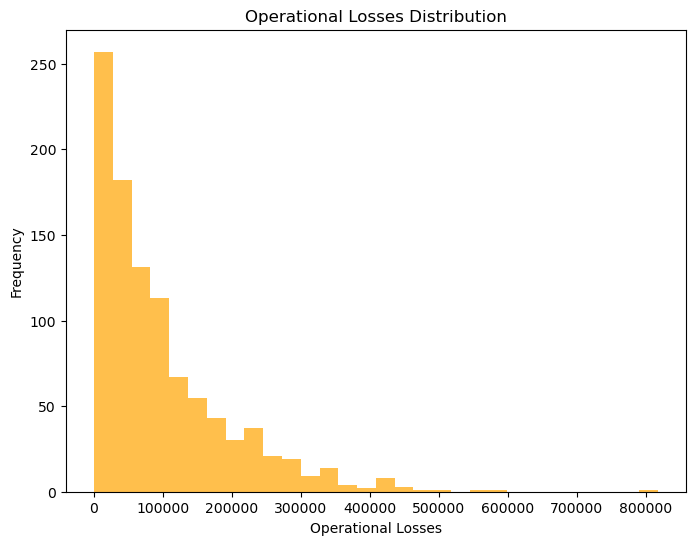

In [255]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate operational risk
def simulate_operational_risk():
    np.random.seed(42)

    # Generate synthetic data for operational risk
    operational_losses = np.random.exponential(scale=100000, size=1000)

    # Visualize operational losses
    plt.figure(figsize=(8, 6))
    plt.hist(operational_losses, bins=30, color='orange', alpha=0.7)
    plt.title('Operational Losses Distribution')
    plt.xlabel('Operational Losses')
    plt.ylabel('Frequency')
    plt.show()
    
# Simulate and visualize operational risk
simulate_operational_risk()


### Loss Distribution Approach (LDA)

**Loss Distribution Approach (LDA)**

**1. Definition:**
   - **Loss Distribution Approach (LDA):** The Loss Distribution Approach is a method used in operational risk management to model the distribution of potential losses based on historical loss data. LDA involves creating a probability distribution of potential losses and assessing the impact of different events on an organization's operational risk profile.

**2. Key Concepts:**

   a. **Probability Distribution:**
      - LDA models the probability distribution of potential losses, taking into account the frequency and severity of operational risk events.

   b. **Loss Severity:**
      - Loss severity represents the magnitude of financial impact associated with each operational risk event.

**3. Steps in the Loss Distribution Approach:**

   a. **Data Collection:**
      - Gather historical loss data, including information on the frequency and severity of operational risk events.

   b. **Event Classification:**
      - Classify events based on their nature, such as people, process, system, or external factors.

   c. **Statistical Analysis:**
      - Use statistical methods to model the distribution of losses, considering the frequency and severity of events.

   d. **Monte Carlo Simulation:**
      - Employ Monte Carlo simulation techniques to generate a range of possible loss scenarios and their associated probabilities.

**4. Implications of LDA:**

   a. **Risk Measurement:**
      - LDA provides a quantitative method for measuring operational risk by estimating potential financial losses under different scenarios.

   b. **Capital Adequacy:**
      - The results from LDA inform regulatory capital requirements, ensuring that organizations maintain sufficient capital to cover potential operational losses.

   c. **Risk Management Strategies:**
      - LDA results guide risk management strategies, helping organizations prioritize and allocate resources to mitigate specific operational risks.

**5. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable and accurate historical loss data is crucial for the effectiveness of LDA, and challenges may arise if data is incomplete or biased.

   b. **Model Assumptions:**
      - LDA involves making assumptions about the distribution of losses and the correlation between different operational risk events.

   c. **Dynamic Nature:**
      - The operational risk landscape evolves, and LDA models may need to be regularly updated to reflect changing risk profiles.

**6. Use Cases:**

   a. **Financial Institutions:**
      - Banks and financial institutions use LDA to assess and quantify operational risk for regulatory compliance and internal risk management.

   b. **Insurance Industry:**
      - Insurance companies use LDA to model potential losses and set appropriate premiums to cover operational risk in their underwriting.

   c. **Risk Reporting:**
      - LDA results are utilized in risk reporting to provide insights into the potential financial impact of operational risk events.

**7. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - The Basel II and Basel III frameworks incorporate operational risk capital requirements, with approaches like LDA considered in the measurement of economic capital for operational risk.

**8. Advancements in LDA:**

   a. **Integration with Other Approaches:**
      - Organizations may integrate LDA with other operational risk measurement approaches, such as the Business Indicator Approach (BIA) and the Standardized Approach (SA), for a comprehensive risk assessment.

Loss Distribution Approach is a valuable tool for quantifying operational risk, providing organizations with a method to assess potential financial losses and make informed decisions regarding risk management and capital allocation.

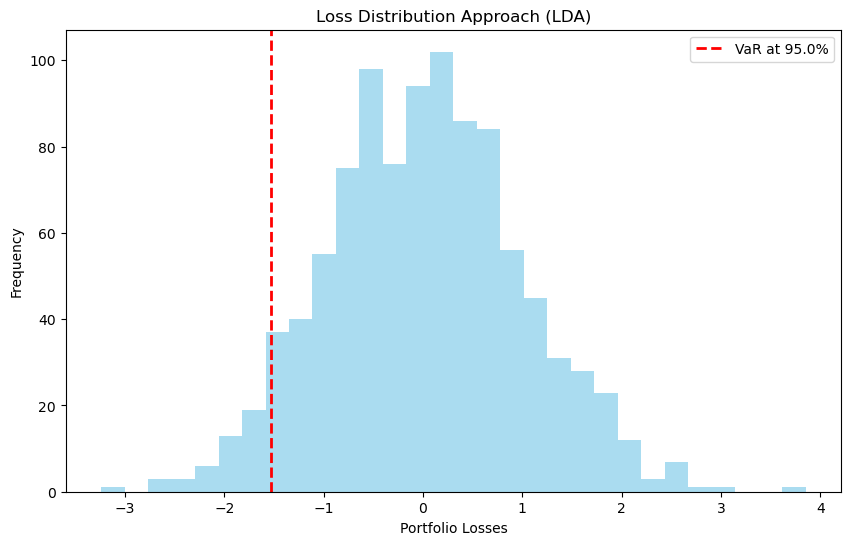

In [256]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate and visualize Loss Distribution Approach (LDA)
def simulate_lda():
    np.random.seed(42)

    # Generate synthetic data for loss distribution
    portfolio_losses = np.random.normal(loc=0, scale=1, size=1000)

    # Calculate Value at Risk (VaR) using LDA
    confidence_level = 0.95
    var_lda = np.percentile(portfolio_losses, 100 * (1 - confidence_level))

    # Visualize loss distribution
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_losses, bins=30, color='skyblue', alpha=0.7)
    plt.title('Loss Distribution Approach (LDA)')
    plt.xlabel('Portfolio Losses')
    plt.ylabel('Frequency')

    # Highlight VaR on the plot
    plt.axvline(x=var_lda, color='red', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level * 100}%')
    plt.legend()

# Simulate and visualize Loss Distribution Approach (LDA)
simulate_lda()


### Scenario Analysis

**Scenario Analysis**

**1. Definition:**
   - **Scenario Analysis:** Scenario analysis is a qualitative and quantitative technique used in operational risk management to assess the impact of potential events or scenarios on an organization. It involves the identification, description, and evaluation of various scenarios to understand their potential consequences on business operations.

**2. Key Concepts:**

   a. **Event Identification:**
      - Scenario analysis begins with the identification of specific events or scenarios that could pose operational risks to an organization.

   b. **Risk Drivers:**
      - Understanding the underlying drivers and factors that contribute to operational risk events is crucial for scenario analysis.

**3. Steps in Scenario Analysis:**

   a. **Scenario Generation:**
      - Generate a set of plausible and relevant scenarios based on historical data, expert judgment, and potential future developments.

   b. **Impact Assessment:**
      - Assess the potential impact of each scenario on the organization, considering financial, operational, reputational, and regulatory consequences.

   c. **Probability Estimation:**
      - Assign probabilities to each scenario, indicating the likelihood of occurrence based on historical data, market conditions, or expert opinion.

   d. **Stress Testing:**
      - Apply stress testing techniques to evaluate how extreme or adverse scenarios may impact the organization's resilience and financial health.

**4. Implications of Scenario Analysis:**

   a. **Risk Identification:**
      - Scenario analysis helps identify and prioritize operational risks by evaluating their potential impact and likelihood.

   b. **Risk Mitigation:**
      - Insights gained from scenario analysis inform risk mitigation strategies, allowing organizations to proactively address vulnerabilities.

   c. **Strategic Planning:**
      - Organizations use scenario analysis to inform strategic planning, helping them anticipate and prepare for potential challenges.

**5. Challenges and Considerations:**

   a. **Data Availability:**
      - Effective scenario analysis requires access to relevant and accurate data, and challenges may arise if data is limited or unreliable.

   b. **Subjectivity:**
      - Scenario analysis involves subjective elements, such as expert judgment in assigning probabilities or assessing the impact of events.

   c. **Dynamic Environment:**
      - The operational risk landscape evolves, and scenarios need to be regularly updated to reflect changing business conditions.

**6. Use Cases:**

   a. **Financial Stress Testing:**
      - Scenario analysis is commonly used in financial institutions for stress testing, evaluating the impact of adverse economic conditions on their portfolios.

   b. **Crisis Preparedness:**
      - Organizations use scenario analysis to assess their readiness for potential crises, such as cybersecurity breaches, natural disasters, or geopolitical events.

   c. **Regulatory Compliance:**
      - Regulatory authorities may require organizations, especially in the financial sector, to conduct scenario analysis for compliance with risk management regulations.

**7. Regulatory Landscape:**

   a. **Basel II and Basel III:**
      - Regulatory frameworks, such as Basel II and Basel III, emphasize the importance of scenario analysis in assessing operational risk and setting capital requirements.

**8. Integration with Other Approaches:**

   a. **Complementary to Quantitative Models:**
      - Scenario analysis is often used alongside quantitative models, such as the Loss Distribution Approach (LDA) or statistical models, to provide a comprehensive view of operational risk.

Scenario analysis is a versatile tool in operational risk management, offering a forward-looking perspective that goes beyond historical data. It enables organizations to anticipate, evaluate, and respond to potential risks, fostering a proactive and resilient approach to operational risk management.

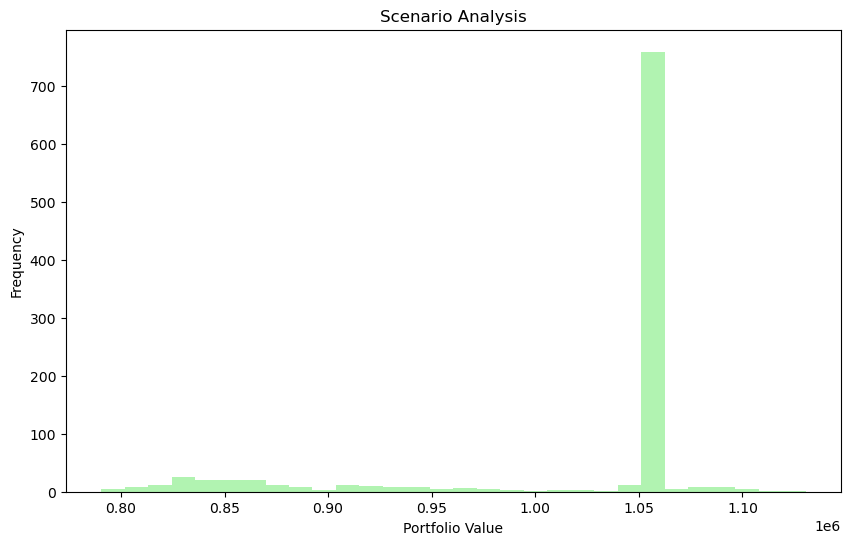

In [257]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate and visualize Scenario Analysis
def simulate_scenario_analysis():
    np.random.seed(42)

    # Generate synthetic data for scenario analysis
    initial_portfolio_value = 1000000
    returns = np.random.normal(loc=0.0005, scale=0.02, size=252)  # Daily returns for a year
    scenarios = 1000

    # Simulate portfolio value under different scenarios
    portfolio_values = [initial_portfolio_value * np.cumprod(1 + returns)[:i+1][-1] for i in range(scenarios)]

    # Visualize the distribution of portfolio values
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_values, bins=30, color='lightgreen', alpha=0.7)
    plt.title('Scenario Analysis')
    plt.xlabel('Portfolio Value')
    plt.ylabel('Frequency')

# Simulate and visualize Scenario Analysis
simulate_scenario_analysis()

### Key Risk Indicators (KRIs)

**Key Risk Indicators (KRIs)**

**1. Definition:**
   - **Key Risk Indicators (KRIs):** Key Risk Indicators are quantifiable metrics or qualitative measures used to assess and monitor the likelihood and impact of potential operational risk events. KRIs provide early warnings and insights into the health of an organization's operational risk profile.

**2. Key Concepts:**

   a. **Leading Indicators:**
      - KRIs are often leading indicators, providing insights into potential operational risks before they materialize.

   b. **Thresholds and Triggers:**
      - KRIs are associated with predefined thresholds or triggers that, when breached, signal heightened risk and require attention.

**3. Selection and Definition of KRIs:**

   a. **Risk Identification:**
      - Identify and prioritize operational risks that are critical to the organization's objectives and business processes.

   b. **Quantifiable Metrics:**
      - Select metrics that can be measured and monitored to quantify the risk exposure associated with identified operational risks.

   c. **Relevance to Objectives:**
      - Ensure that selected KRIs are directly relevant to the achievement of organizational objectives and align with key business processes.

**4. Types of KRIs:**

   a. **Quantitative KRIs:**
      - Numeric metrics, such as the number of operational incidents, financial losses, or error rates, provide quantitative insights into risk exposure.

   b. **Qualitative KRIs:**
      - Non-numeric indicators, such as employee morale, customer satisfaction, or regulatory compliance, offer qualitative perspectives on operational risk.

**5. Implications of KRIs:**

   a. **Early Warning System:**
      - KRIs serve as an early warning system, allowing organizations to detect and address potential operational risk issues before they escalate.

   b. **Performance Monitoring:**
      - Monitoring KRIs helps assess the effectiveness of risk mitigation measures and operational controls.

   c. **Decision Support:**
      - KRIs provide decision-makers with actionable information to make informed decisions about risk management strategies.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Reliable and accurate data is crucial for the effectiveness of KRIs, and challenges may arise if data is incomplete or biased.

   b. **Subjectivity:**
      - Qualitative KRIs may involve subjective assessments, requiring clear definitions and consistent interpretation.

   c. **Dynamic Nature:**
      - KRIs need to be regularly reviewed and updated to align with changing business conditions and evolving operational risks.

**7. Use Cases:**

   a. **Financial Services:**
      - Banks use KRIs to monitor key metrics, such as transaction processing times, error rates, and cyber incident frequency.

   b. **Healthcare:**
      - Healthcare organizations may use KRIs related to patient safety, regulatory compliance, and the accuracy of medical records.

   c. **Manufacturing:**
      - Manufacturers monitor KRIs such as production error rates, equipment downtime, and supply chain disruptions.

**8. Integration with Other Approaches:**

   a. **Complementary to Scenario Analysis:**
      - KRIs complement scenario analysis by providing real-time or periodic insights into ongoing operational risk exposure.

**9. Regulatory Landscape:**

   a. **Regulatory Expectations:**
      - Regulatory bodies often expect organizations, especially in the financial sector, to establish and monitor KRIs as part of sound risk management practices.

Key Risk Indicators play a vital role in operational risk management, offering a proactive approach to monitoring and mitigating potential risks. By selecting and tracking relevant metrics, organizations can enhance their ability to identify, assess, and respond to operational risks in a timely manner.

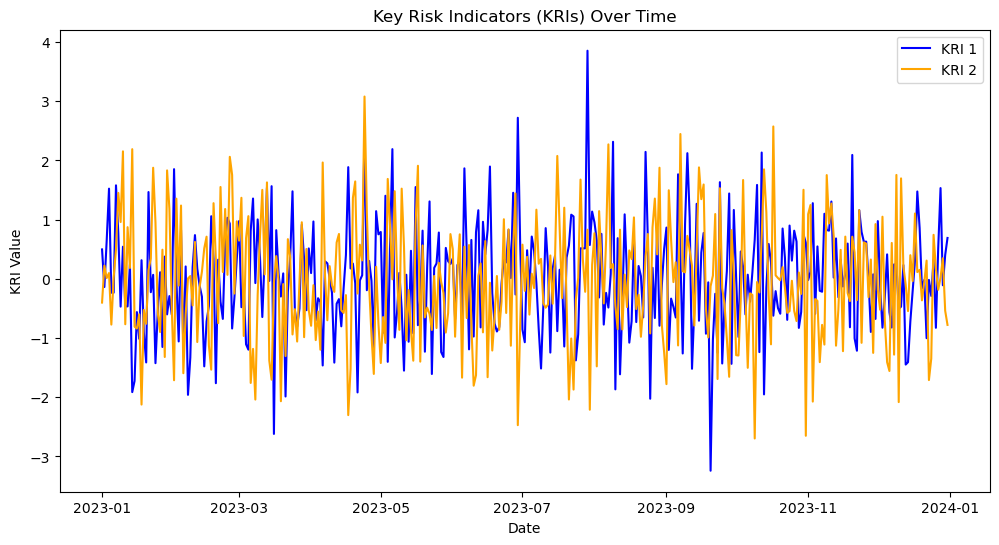

In [258]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate and visualize Key Risk Indicators (KRIs)
def simulate_kris():
    np.random.seed(42)

    # Generate synthetic data for KRIs
    time_periods = pd.date_range('2023-01-01', '2023-12-31', freq='D')
    num_periods = len(time_periods)
    kri1 = np.random.normal(loc=0, scale=1, size=num_periods)  # Example KRI 1
    kri2 = np.random.normal(loc=0, scale=1, size=num_periods)  # Example KRI 2

    # Create a DataFrame with KRIs
    kri_data = pd.DataFrame({'Date': time_periods, 'KRI_1': kri1, 'KRI_2': kri2})
    kri_data.set_index('Date', inplace=True)

    # Visualize KRIs over time
    plt.figure(figsize=(12, 6))
    plt.plot(kri_data['KRI_1'], label='KRI 1', color='blue')
    plt.plot(kri_data['KRI_2'], label='KRI 2', color='orange')
    plt.title('Key Risk Indicators (KRIs) Over Time')
    plt.xlabel('Date')
    plt.ylabel('KRI Value')
    plt.legend()

# Simulate and visualize Key Risk Indicators (KRIs)
simulate_kris()


### Business Process Mapping

**Business Process Mapping**

**1. Definition:**
   - **Business Process Mapping:** Business process mapping, also known as process mapping or flowcharting, is a visual representation of the steps, activities, and interactions within a business process. In the context of operational risk, business process mapping helps organizations understand the flow of activities and identify potential points of vulnerability or risk.

**2. Key Concepts:**

   a. **Process Visualization:**
      - Business process mapping visually represents the sequence of tasks, decisions, and interactions involved in a specific business process.

   b. **Identification of Key Elements:**
      - Key elements, such as inputs, outputs, decision points, and control measures, are identified and depicted in the process map.

**3. Steps in Business Process Mapping:**

   a. **Define the Scope:**
      - Clearly define the scope and boundaries of the business process to be mapped.

   b. **Identify Activities:**
      - Identify and list the individual activities or tasks that constitute the business process.

   c. **Sequence of Activities:**
      - Determine the logical sequence of activities and their interdependencies within the process.

   d. **Document Inputs and Outputs:**
      - Document the inputs required for each activity and the corresponding outputs produced.

   e. **Decision Points:**
      - Identify decision points or branches in the process where choices or decisions are made.

   f. **Control Measures:**
      - Highlight control measures, checks, or validations implemented to ensure the integrity and reliability of the process.

**4. Implications of Business Process Mapping:**

   a. **Risk Identification:**
      - Business process mapping facilitates the identification of potential operational risks by visualizing the entire process and its components.

   b. **Root Cause Analysis:**
      - When issues or incidents occur, business process maps aid in conducting root cause analysis by tracing the sequence of events.

   c. **Efficiency and Optimization:**
      - Organizations can use process maps to identify opportunities for efficiency improvements and optimization of business processes.

**5. Challenges and Considerations:**

   a. **Maintaining Accuracy:**
      - Process maps should be regularly reviewed and updated to ensure accuracy, reflecting any changes in the business process.

   b. **Subjectivity:**
      - Mapping may involve interpretation, and different individuals may have varying perspectives on the same process.

   c. **Complexity:**
      - Some processes may be complex, and capturing all details accurately in a visual representation can be challenging.

**6. Use Cases:**

   a. **Financial Transactions:**
      - In the financial sector, business process mapping can be used to illustrate the end-to-end process of handling financial transactions, from initiation to settlement.

   b. **Supply Chain Management:**
      - Businesses involved in supply chain management use process mapping to visualize the flow of goods, information, and payments.

   c. **Customer Onboarding:**
      - Service-oriented industries utilize business process mapping to depict the customer onboarding journey, including interactions, verifications, and approvals.

**7. Integration with Other Approaches:**

   a. **Risk Assessment:**
      - Business process mapping is integrated into risk assessment methodologies to identify and evaluate operational risks associated with specific processes.

**8. Regulatory Landscape:**

   a. **Compliance Requirements:**
      - Regulatory authorities may require organizations to document and demonstrate a clear understanding of key business processes as part of compliance requirements.

Business process mapping is a valuable tool for operational risk management, providing organizations with a visual representation of their processes and helping them identify, assess, and mitigate potential risks. The insights gained from business process mapping contribute to improved risk awareness and informed decision-making.

/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_56671/3911174800.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((position[0] + 0.5, position[1] + 0.5), 0.5, color=color, edgecolor='black')
/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_56671/3911174800.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(patches.Rectangle(position, 1, 1, color=color, edgecolor='black'))
/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_56671/3911174800.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = patches.Ellipse((position[0] + 0.5, position[1] + 0.5), 0.5, 0.5, color=color, edgecolor='black')
/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_56671/3911174800.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolo

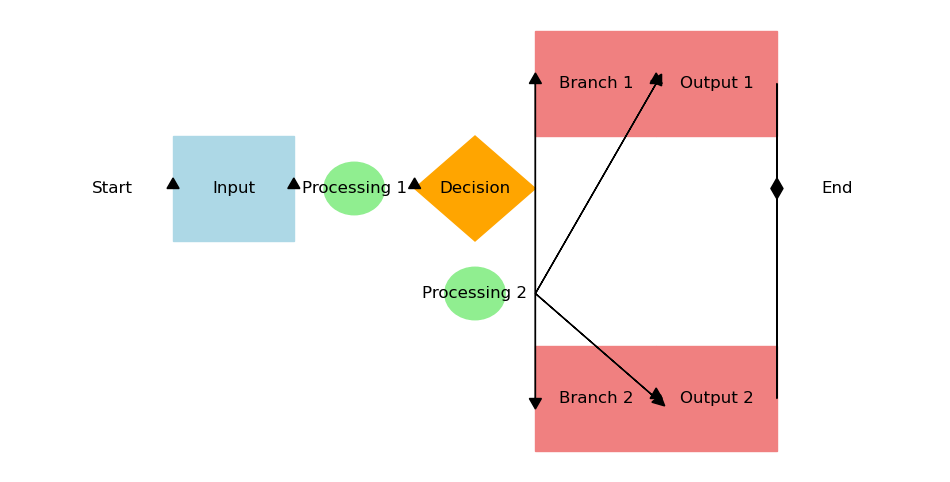

In [259]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Create a more intricate business process map
process_map_data = {
    'Start': {'shape': 'circle', 'color': 'white', 'position': (0, 1)},
    'Input': {'shape': 'Rectangle', 'color': 'lightblue', 'position': (1, 1)},
    'Processing 1': {'shape': 'Ellipse', 'color': 'lightgreen', 'position': (2, 1)},
    'Decision': {'shape': 'Diamond', 'color': 'orange', 'position': (3, 1)},
    'Branch 1': {'shape': 'Rectangle', 'color': 'lightcoral', 'position': (4, 2)},
    'Processing 2': {'shape': 'Ellipse', 'color': 'lightgreen', 'position': (3, 0)},
    'Branch 2': {'shape': 'Rectangle', 'color': 'lightcoral', 'position': (4, -1)},
    'Output 1': {'shape': 'Rectangle', 'color': 'lightcoral', 'position': (5, 2)},
    'Output 2': {'shape': 'Rectangle', 'color': 'lightcoral', 'position': (5, -1)},
    'End': {'shape': 'circle', 'color': 'white', 'position': (6, 1)}
}

# Display the business process map
plt.figure(figsize=(12, 6))
for step, attributes in process_map_data.items():
    shape = attributes['shape']
    color = attributes['color']
    position = attributes['position']
    
    if shape == 'Rectangle':
        plt.gca().add_patch(patches.Rectangle(position, 1, 1, color=color, edgecolor='black'))
    elif shape == 'Ellipse':
        ellipse = patches.Ellipse((position[0] + 0.5, position[1] + 0.5), 0.5, 0.5, color=color, edgecolor='black')
        plt.gca().add_patch(ellipse)
    elif shape == 'Diamond':
        diamond = patches.RegularPolygon((position[0] + 0.5, position[1] + 0.5), numVertices=4, radius=0.5, color=color, edgecolor='black')
        plt.gca().add_patch(diamond)
    elif shape == 'circle':
        circle = patches.Circle((position[0] + 0.5, position[1] + 0.5), 0.5, color=color, edgecolor='black')
        plt.gca().add_patch(circle)

    plt.text(position[0] + 0.5, position[1] + 0.5, step, ha='center', va='center', fontsize=12)

# Draw connections between steps
connections = [('Start', 'Input'), ('Input', 'Processing 1'), ('Processing 1', 'Decision'),
               ('Decision', 'Branch 1'), ('Decision', 'Branch 2'), ('Branch 1', 'Output 1'),
               ('Branch 2', 'Output 2'), ('Processing 2', 'Output 1'), ('Processing 2', 'Output 2'),
               ('Output 1', 'End'), ('Output 2', 'End')]

for connection in connections:
    start, end = connection
    start_pos = process_map_data[start]['position']
    end_pos = process_map_data[end]['position']
    plt.arrow(start_pos[0] + 1, start_pos[1] + 0.5, end_pos[0] - start_pos[0] - 1, end_pos[1] - start_pos[1], 
              head_width=0.1, head_length=0.1, fc='black', ec='black')

plt.axis('off')
plt.show()

### Basel II Advanced Measurement Approach (AMA)

**Basel II Advanced Measurement Approach (AMA)**

**1. Overview:**
   - The Basel II Advanced Measurement Approach (AMA) is a framework developed by the Basel Committee on Banking Supervision to allow advanced banks to use their internal models for quantifying and managing operational risk. It provides a more risk-sensitive method for determining regulatory capital requirements for operational risk.

**2. Key Concepts:**

   a. **Internal Models:**
      - Under AMA, banks are permitted to use their own internal models to assess and quantify operational risk, taking into account the institution's specific risk profile and risk management practices.

   b. **Risk Components:**
      - AMA considers three main components of operational risk: Loss Distribution Approach (LDA), Business Environment and Internal Control Factors (BEICFs), and the Operational Risk Capital Component.

**3. Components of the Basel II AMA:**

   a. **Loss Distribution Approach (LDA):**
      - LDA involves modeling the distribution of potential operational losses based on historical loss data. It allows banks to estimate the potential financial impact of operational risk events.

   b. **Business Environment and Internal Control Factors (BEICFs):**
      - BEICFs capture external factors and internal control mechanisms that influence the operational risk profile. They are used to adjust the capital calculation based on the current business environment.

   c. **Operational Risk Capital Component:**
      - The operational risk capital component is the aggregate capital requirement determined by the combination of LDA and BEICFs. It represents the amount of capital a bank needs to hold to cover potential operational losses.

**4. Steps in Implementing AMA:**

   a. **Data Collection and Validation:**
      - Banks must establish robust processes for collecting and validating historical loss data, which forms the basis for the LDA.

   b. **Model Development:**
      - Develop sophisticated models for the LDA, incorporating statistical techniques to model the distribution of operational losses.

   c. **BEICF Assessment:**
      - Evaluate and quantify the impact of Business Environment and Internal Control Factors on the operational risk profile. This involves considering macroeconomic factors, industry trends, and internal control effectiveness.

   d. **Capital Calculation:**
      - Calculate the operational risk capital requirement by combining the results from the LDA and the adjustments based on BEICFs.

**5. Implications of Basel II AMA:**

   a. **Risk Sensitivity:**
      - AMA provides a more risk-sensitive approach, allowing banks to tailor their operational risk capital requirements to their specific risk profiles.

   b. **Internal Models Validation:**
      - Regulatory authorities require banks to have rigorous processes for validating their internal models to ensure accuracy and reliability.

   c. **Capital Allocation:**
      - AMA facilitates more accurate and granular capital allocation, enabling banks to allocate capital based on the specific operational risks inherent in different business lines.

**6. Challenges and Considerations:**

   a. **Data Quality and Availability:**
      - The success of AMA relies on the availability and quality of historical loss data, and challenges may arise if data is incomplete or unreliable.

   b. **Model Complexity:**
      - Developing and maintaining sophisticated models for LDA requires substantial expertise and resources.

   c. **Regulatory Compliance:**
      - Banks must comply with stringent regulatory requirements for model validation, documentation, and reporting under the Basel II framework.

**7. Regulatory Landscape:**

   a. **Transition to Basel III:**
      - Basel III introduced changes to the regulatory capital framework, and banks are transitioning from Basel II to Basel III, which includes the Standardized Measurement Approach (SMA) for operational risk.

The Basel II Advanced Measurement Approach represents a significant advancement in operational risk management for banks, offering a more tailored and risk-sensitive approach to determining regulatory capital requirements. It reflects the recognition that banks with sophisticated risk management practices can use their internal models to assess and quantify operational risk more accurately.

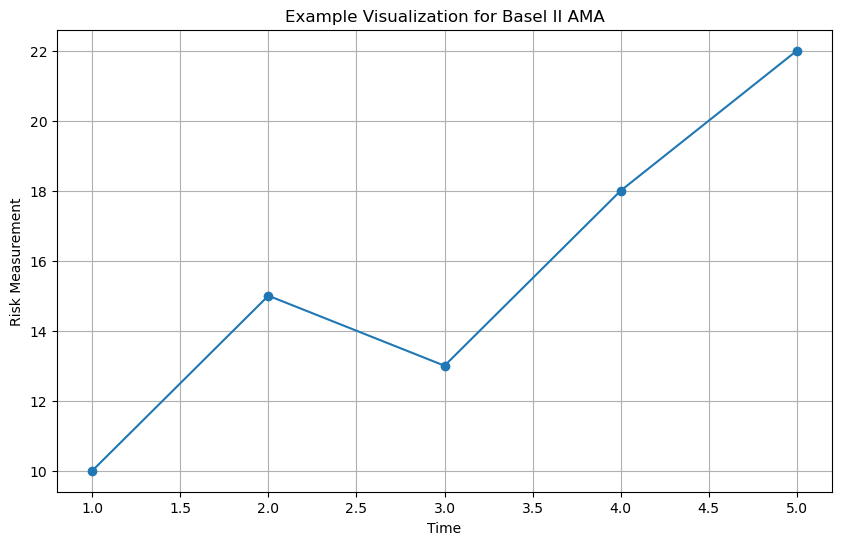

In [260]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Display an example visualization related to Basel II AMA
# You can replace this with actual visualizations as needed
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4, 5], [10, 15, 13, 18, 22], marker='o')
plt.title('Example Visualization for Basel II AMA')
plt.xlabel('Time')
plt.ylabel('Risk Measurement')
plt.grid(True)
plt.show()

### Loss Severity

**Loss Severity**

**1. Definition:**
   - **Loss Severity:** Loss severity refers to the magnitude of financial impact or the extent of the harm caused by an operational risk event when it occurs. It quantifies the amount of financial loss that may result from a specific operational incident.

**2. Key Concepts:**

   a. **Financial Impact:**
      - Loss severity measures the financial consequences of an operational risk event, considering factors such as direct monetary losses, regulatory fines, legal costs, and reputational damage.

   b. **Scale of Impact:**
      - Loss severity assesses the scale of impact, ranging from minor financial setbacks to significant financial harm that could threaten the stability of the organization.

**3. Factors Influencing Loss Severity:**

   a. **Nature of the Event:**
      - The type of operational risk event significantly influences loss severity. For example, a cybersecurity breach may result in different financial consequences than a process failure.

   b. **Effectiveness of Controls:**
      - The effectiveness of internal controls and risk management measures can mitigate or exacerbate loss severity. Strong controls may limit the financial impact of an event.

   c. **Response and Recovery:**
      - The speed and effectiveness of the organization's response and recovery efforts play a crucial role in determining the ultimate severity of the loss.

**4. Measurement and Quantification:**

   a. **Quantitative Metrics:**
      - Quantitative metrics, such as monetary values, are used to measure loss severity in terms of actual financial losses incurred by the organization.

   b. **Qualitative Assessments:**
      - Qualitative assessments may also be employed to capture non-monetary aspects of loss severity, such as reputational damage or the impact on customer trust.

**5. Implications of Loss Severity:**

   a. **Risk Management Prioritization:**
      - Understanding loss severity helps organizations prioritize operational risks based on their potential impact, focusing resources on mitigating high-severity risks.

   b. **Capital Allocation:**
      - Loss severity considerations inform the allocation of capital to cover potential losses, ensuring that sufficient financial resources are set aside to address severe operational events.

   c. **Insurance Coverage:**
      - Organizations may use insights into loss severity to determine appropriate insurance coverage to mitigate the financial impact of operational risk.

**6. Challenges and Considerations:**

   a. **Uncertainty:**
      - Predicting the exact severity of operational losses is challenging due to uncertainties and variables associated with each risk event.

   b. **Modeling Complexity:**
      - Developing models to accurately quantify loss severity involves considering multiple factors, making it a complex task.

   c. **Dynamic Nature:**
      - Loss severity may change over time, and organizations must adapt their risk management strategies to address evolving operational risks.

**7. Use Cases:**

   a. **Cybersecurity Incidents:**
      - In the case of a cybersecurity breach, loss severity assessment would consider factors such as data compromise, regulatory fines, and reputational damage.

   b. **Supply Chain Disruptions:**
      - Organizations facing supply chain disruptions assess loss severity by considering the financial impact of production delays, inventory losses, and contractual penalties.

   c. **Operational Failures:**
      - Operational failures, such as system outages or process breakdowns, prompt organizations to evaluate the severity of financial losses and potential legal consequences.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Assessment:**
      - Loss severity is integrated into comprehensive risk assessments alongside other measures, such as likelihood and frequency, to provide a holistic view of operational risk.

Understanding and quantifying loss severity is crucial for effective operational risk management. It allows organizations to prioritize their efforts, allocate resources appropriately, and develop strategies to mitigate the financial impact of potential operational risk events.

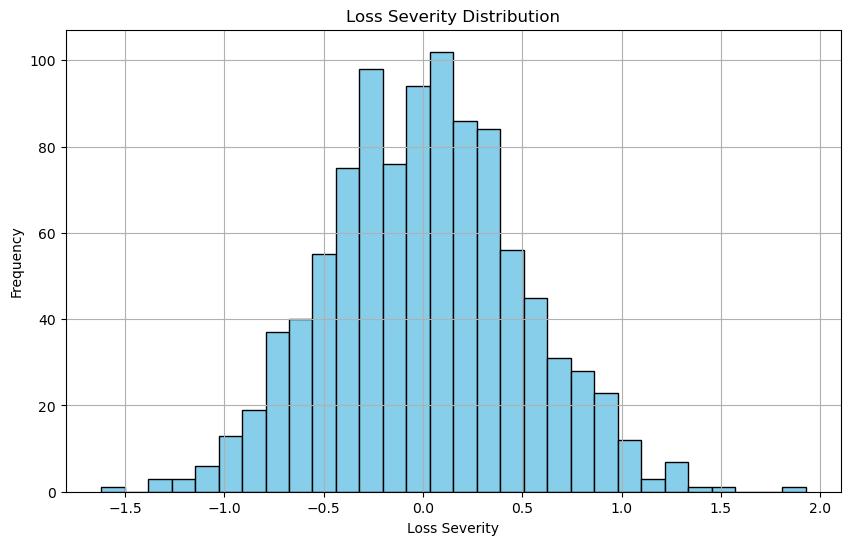

In [261]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for loss severity
np.random.seed(42)
loss_samples = np.random.normal(loc=0, scale=0.5, size=1000)

# Display a histogram visualization related to Loss Severity
plt.figure(figsize=(10, 6))
plt.hist(loss_samples, bins=30, color='skyblue', edgecolor='black')
plt.title('Loss Severity Distribution')
plt.xlabel('Loss Severity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Loss Frequency

**Loss Frequency**

**1. Definition:**
   - **Loss Frequency:** Loss frequency refers to the rate at which operational risk events occur within a given timeframe. It quantifies the likelihood or probability of experiencing specific types of operational incidents.

**2. Key Concepts:**

   a. **Event Occurrence:**
      - Loss frequency focuses on how often operational risk events, such as incidents, errors, or disruptions, are likely to occur.

   b. **Quantifying Likelihood:**
      - It involves quantifying the probability of events happening, providing a basis for assessing the frequency with which an organization may incur operational losses.

**3. Factors Influencing Loss Frequency:**

   a. **Complexity of Operations:**
      - The complexity of an organization's operations can influence the likelihood of operational incidents. More complex processes may have a higher potential for errors.

   b. **Industry and Sector:**
      - Different industries and sectors may face varying levels of operational risk. Certain sectors, such as finance or healthcare, may be more prone to specific types of incidents.

   c. **Effectiveness of Controls:**
      - The effectiveness of internal controls and risk management practices directly impacts the frequency of operational risk events.

**4. Measurement and Quantification:**

   a. **Quantitative Metrics:**
      - Loss frequency is often expressed as a numerical value, representing the expected number of occurrences of a specific operational risk event over a defined period.

   b. **Historical Data Analysis:**
      - Analyzing historical data helps in estimating loss frequency by identifying patterns and trends in past incidents.

**5. Implications of Loss Frequency:**

   a. **Risk Prioritization:**
      - Loss frequency assists in prioritizing operational risks. High-frequency events may be prioritized for mitigation efforts to reduce the overall risk exposure.

   b. **Resource Allocation:**
      - Understanding loss frequency guides the allocation of resources to address and manage operational risks more effectively.

   c. **Insurance Planning:**
      - Loss frequency considerations are crucial when planning insurance coverage. High-frequency events may impact insurance premiums and coverage decisions.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - Accurate estimation of loss frequency relies on the availability and quality of historical data, and challenges may arise if data is incomplete or biased.

   b. **Dynamic Nature:**
      - The operational risk landscape evolves, and loss frequency assessments may need regular updates to reflect changes in business processes or external factors.

   c. **Subjectivity:**
      - Estimating loss frequency may involve a degree of subjectivity, especially when predicting the occurrence of rare or unprecedented events.

**7. Use Cases:**

   a. **Customer Complaints:**
      - In sectors like retail or service industries, loss frequency may be assessed in terms of the frequency of customer complaints or service disruptions.

   b. **Cybersecurity Incidents:**
      - Loss frequency is a key consideration in assessing the likelihood of cybersecurity incidents, such as data breaches or ransomware attacks.

   c. **Operational Errors:**
      - Organizations analyze loss frequency to understand how often operational errors, such as processing errors or system glitches, may occur.

**8. Integration with Other Risk Measures:**

   a. **Risk Assessment Models:**
      - Loss frequency is integrated into comprehensive risk assessment models alongside other risk measures, such as loss severity and business impact.

Loss frequency, when combined with other risk measures, provides a holistic view of the operational risk landscape. It enables organizations to proactively manage and mitigate risks by identifying areas with higher frequency and implementing targeted risk management strategies.

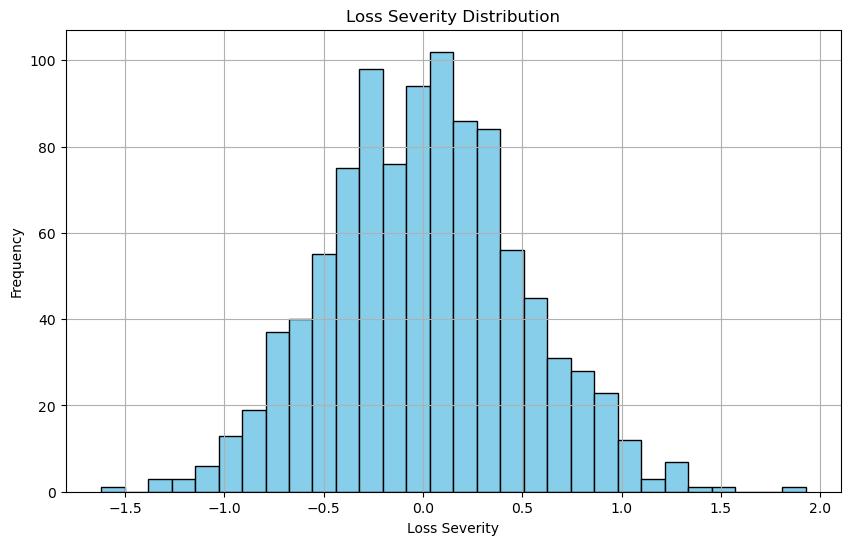

In [262]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for loss severity
np.random.seed(42)
loss_samples = np.random.normal(loc=0, scale=0.5, size=1000)

# Display a histogram visualization related to Loss Severity
plt.figure(figsize=(10, 6))
plt.hist(loss_samples, bins=30, color='skyblue', edgecolor='black')
plt.title('Loss Severity Distribution')
plt.xlabel('Loss Severity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Risk Control Self Assessment

**Risk Control Self Assessment (RCSA)**

**1. Definition:**
   - **Risk Control Self Assessment (RCSA):** RCSA is a risk management technique that involves the active participation of individuals within an organization to assess and evaluate the effectiveness of risk controls and identify potential areas of risk. It empowers employees to self-assess their activities and processes to enhance overall risk awareness.

**2. Key Concepts:**

   a. **Decentralized Risk Assessment:**
      - RCSA distributes the responsibility of risk assessment throughout the organization, involving individuals at various levels in the identification and evaluation of risks.

   b. **Continuous Monitoring:**
      - It emphasizes continuous monitoring and assessment of risks rather than relying solely on periodic risk assessments.

**3. Steps in RCSA:**

   a. **Risk Identification:**
      - Individuals or teams identify and document potential risks associated with their activities, processes, or projects.

   b. **Control Assessment:**
      - Assessment participants evaluate the effectiveness of existing controls in place to mitigate identified risks.

   c. **Risk Rating:**
      - Risks are often rated based on likelihood and impact, providing a qualitative or quantitative measure of their significance.

   d. **Mitigation Actions:**
      - Participants propose and discuss potential actions to strengthen controls and mitigate identified risks.

   e. **Documentation and Reporting:**
      - Results of the RCSA process, including identified risks, control assessments, and proposed actions, are documented and reported.

**4. Implications of RCSA:**

   a. **Proactive Risk Management:**
      - RCSA fosters a proactive approach to risk management by involving frontline staff in the identification and mitigation of risks.

   b. **Enhanced Risk Awareness:**
      - Employees gain a deeper understanding of the risks associated with their roles, leading to increased risk awareness and accountability.

   c. **Continuous Improvement:**
      - The iterative nature of RCSA allows for continuous improvement as organizations respond to changing risk landscapes and evolving business environments.

**5. Challenges and Considerations:**

   a. **Training and Communication:**
      - Effective implementation of RCSA requires proper training and communication to ensure participants understand the process and their role in it.

   b. **Consistency and Standardization:**
      - Maintaining consistency and standardization across different business units or departments can be a challenge in RCSA implementation.

   c. **Integration with Other Processes:**
      - RCSA needs to be integrated with other risk management processes to ensure a cohesive and comprehensive risk management framework.

**6. Use Cases:**

   a. **Operational Processes:**
      - RCSA can be applied to operational processes, allowing operational teams to assess and manage risks associated with their day-to-day activities.

   b. **Project Management:**
      - Project teams can use RCSA to identify and address risks throughout the project lifecycle, enhancing project risk management.

   c. **Compliance and Regulatory Risks:**
      - Organizations can employ RCSA to assess compliance and regulatory risks, ensuring adherence to industry standards and regulations.

**7. Integration with Other Risk Measures:**

   a. **Alignment with Enterprise Risk Management (ERM):**
      - RCSA is often integrated into broader ERM frameworks to ensure alignment with organizational objectives and risk appetite.

**8. Regulatory Landscape:**

   a. **Regulatory Expectations:**
      - Regulatory bodies may encourage or require organizations, particularly in regulated industries, to implement RCSA as part of their risk management practices.

Risk Control Self Assessment empowers organizations to tap into the collective knowledge of their workforce for a more comprehensive and decentralized approach to risk management. It encourages a culture of risk awareness and proactive risk mitigation throughout the organization.

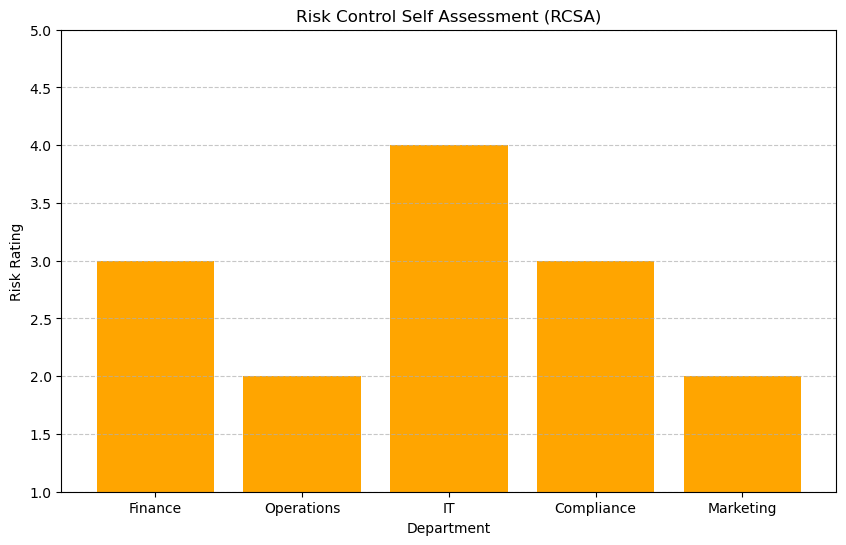

## Risk Control Self Assessment (RCSA)

RCSA is a method used by organizations to identify and manage risks within different departments. Here's a bar chart visualization related to RCSA:

- The chart displays the risk ratings assigned to different departments.
- Departments assess and rate their own risks to enhance risk awareness.
- The ratings help in prioritizing risk mitigation strategies and allocating resources effectively.


In [263]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for RCSA assessment
departments = ['Finance', 'Operations', 'IT', 'Compliance', 'Marketing']
risk_ratings = [3, 2, 4, 3, 2]

# Create a DataFrame for visualization
data = {'Department': departments, 'Risk Rating': risk_ratings}
df = pd.DataFrame(data)

# Display a bar chart visualization related to RCSA
plt.figure(figsize=(10, 6))
plt.bar(df['Department'], df['Risk Rating'], color='orange')
plt.title('Risk Control Self Assessment (RCSA)')
plt.xlabel('Department')
plt.ylabel('Risk Rating')
plt.ylim(1, 5)  # Set y-axis range from 1 to 5 for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display descriptive text
print("## Risk Control Self Assessment (RCSA)\n\nRCSA is a method used by organizations to identify and manage risks within different departments. Here's a bar chart visualization related to RCSA:\n\n- The chart displays the risk ratings assigned to different departments.\n- Departments assess and rate their own risks to enhance risk awareness.\n- The ratings help in prioritizing risk mitigation strategies and allocating resources effectively.")


### External Loss Data

**External Loss Data**

**1. Definition:**
   - **External Loss Data:** External loss data refers to information and records of operational losses experienced by other organizations within the same industry or sector. It provides valuable insights into real-world incidents, helping organizations assess and manage their own operational risks.

**2. Key Concepts:**

   a. **Industry Benchmarking:**
      - External loss data allows organizations to benchmark their operational risk performance against industry peers, gaining a broader perspective on common risk exposures.

   b. **Risk Modeling:**
      - It serves as a crucial input for risk modeling and quantitative analysis, enabling organizations to estimate the potential frequency and severity of operational risk events.

**3. Sources of External Loss Data:**

   a. **Public Databases:**
      - Publicly available databases, industry reports, and regulatory filings can be sources of external loss data, providing information on incidents experienced by other organizations.

   b. **Information Sharing Platforms:**
      - Organizations may participate in industry-specific information-sharing platforms or consortiums where members contribute and access anonymized loss data.

**4. Implications of External Loss Data:**

   a. **Risk Identification:**
      - External loss data aids in the identification of potential operational risks by highlighting the types of incidents that have occurred in similar organizations.

   b. **Scenario Analysis:**
      - It supports scenario analysis by providing real-world examples that organizations can use to simulate and assess the potential impact of specific risk events.

   c. **Risk Prioritization:**
      - By analyzing external loss data, organizations can prioritize their efforts to address operational risks that are more prevalent or have higher potential impact.

**5. Challenges and Considerations:**

   a. **Data Relevance:**
      - Ensuring the relevance and applicability of external loss data to an organization's specific risk profile can be challenging.

   b. **Data Quality:**
      - The quality and accuracy of external loss data may vary, and organizations need to critically evaluate the reliability of the information.

   c. **Industry Differences:**
      - Industries may differ significantly in terms of their operational processes and risk exposures, requiring careful consideration when applying external loss data.

**6. Use Cases:**

   a. **Financial Services:**
      - Banks may use external loss data to assess the impact of cybersecurity incidents, fraudulent activities, or system outages based on experiences in the financial industry.

   b. **Healthcare:**
      - Healthcare organizations can leverage external loss data to understand and mitigate risks related to patient data breaches, medical errors, or regulatory compliance issues.

   c. **Manufacturing:**
      - Manufacturers may analyze external loss data to address risks associated with supply chain disruptions, product recalls, or accidents in production processes.

**7. Integration with Other Risk Measures:**

   a. **Quantitative Risk Assessment:**
      - External loss data is integrated into quantitative risk assessment models to enhance the accuracy and reliability of risk quantification.

**8. Regulatory Landscape:**

   a. **Regulatory Expectations:**
      - Regulatory authorities in certain industries may encourage or require organizations to consider external loss data as part of their risk management practices to ensure a comprehensive approach to risk assessment.

External loss data serves as a valuable tool for organizations to enhance their understanding of operational risks by learning from the experiences of others. When used judiciously, it contributes to a more informed and proactive risk management strategy.

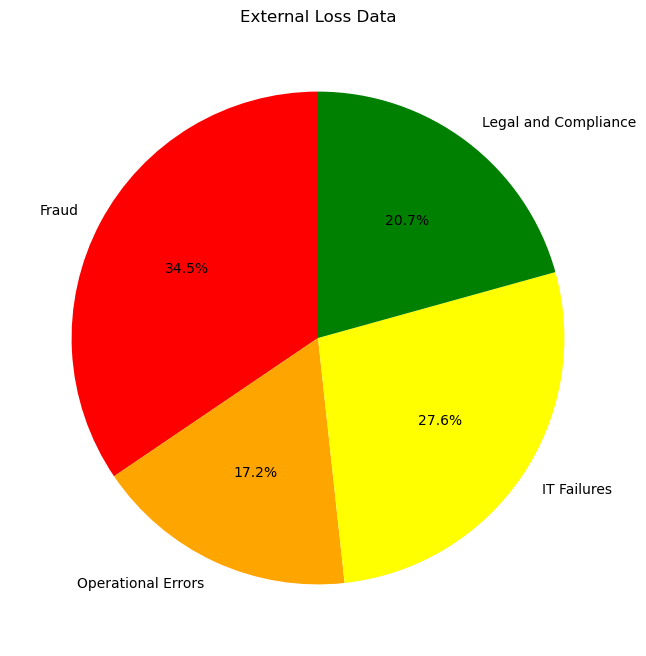

In [264]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example external loss data
loss_categories = ['Fraud', 'Operational Errors', 'IT Failures', 'Legal and Compliance']
loss_amounts = [150000, 75000, 120000, 90000]

# Create a DataFrame for visualization
data = {'Loss Category': loss_categories, 'Loss Amount ($)': loss_amounts}
df = pd.DataFrame(data)

# Display a pie chart visualization related to external loss data
plt.figure(figsize=(8, 8))
plt.pie(df['Loss Amount ($)'], labels=df['Loss Category'], autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'yellow', 'green'])
plt.title('External Loss Data')
plt.show()

### Capital Allocation

**Capital Allocation**

**1. Definition:**
   - **Capital Allocation:** Capital allocation is the process by which a company determines how to distribute its financial resources among different business units, projects, or investments. It involves assigning funds to various activities to optimize returns and achieve strategic objectives.

**2. Key Concepts:**

   a. **Resource Optimization:**
      - Capital allocation aims to optimize the use of available financial resources to maximize value for the organization.

   b. **Strategic Alignment:**
      - It aligns the allocation of capital with the company's overall strategic goals and objectives.

**3. Steps in Capital Allocation:**

   a. **Assessment of Investment Opportunities:**
      - Identify and evaluate various investment opportunities, considering factors such as potential returns, risks, and alignment with strategic objectives.

   b. **Risk and Return Analysis:**
      - Analyze the risk and return profiles of different investment options to make informed decisions on where to allocate capital.

   c. **Budgeting and Planning:**
      - Develop budgets and financial plans that allocate resources to specific projects, business units, or initiatives.

   d. **Monitoring and Adjustments:**
      - Continuously monitor the performance of allocated capital and make adjustments based on changing market conditions, business dynamics, or unforeseen events.

**4. Implications of Capital Allocation:**

   a. **Efficient Resource Use:**
      - Capital allocation ensures that financial resources are used efficiently, avoiding overinvestment in low-return activities and underinvestment in high-return opportunities.

   b. **Risk Management:**
      - It contributes to effective risk management by balancing the allocation of capital across different risk profiles and diversifying investments.

   c. **Value Creation:**
      - Proper capital allocation enhances shareholder value by directing funds towards initiatives that generate the highest returns.

**5. Challenges and Considerations:**

   a. **Uncertainty and Complexity:**
      - The dynamic business environment introduces uncertainty and complexity into capital allocation decisions, requiring organizations to adapt to changing conditions.

   b. **Information Availability:**
      - The availability and accuracy of information play a crucial role in making well-informed capital allocation decisions.

   c. **Strategic Alignment:**
      - Ensuring that capital allocation aligns with the organization's strategic priorities is a key consideration for success.

**6. Use Cases:**

   a. **New Projects and Ventures:**
      - Capital allocation is applied when deciding how much funding to allocate to new projects, ventures, or expansions.

   b. **Research and Development:**
      - Organizations allocate capital to research and development initiatives to drive innovation and maintain competitiveness.

   c. **Acquisitions and Mergers:**
      - During mergers and acquisitions, capital allocation decisions are critical in determining the financial structure and investment in the combined entity.

**7. Integration with Other Financial Measures:**

   a. **Return on Investment (ROI):**
      - Capital allocation is closely tied to ROI, ensuring that investments generate positive returns and contribute to the overall financial health of the organization.

**8. Regulatory Landscape:**

   a. **Compliance and Reporting:**
      - Depending on the industry and jurisdiction, regulatory requirements may influence the reporting and disclosure of capital allocation decisions to ensure transparency and accountability.

Capital allocation is a strategic financial management process that enables organizations to deploy their financial resources effectively, supporting growth, innovation, and value creation. It requires a careful balance between risk and return, aligning with the organization's long-term objectives.

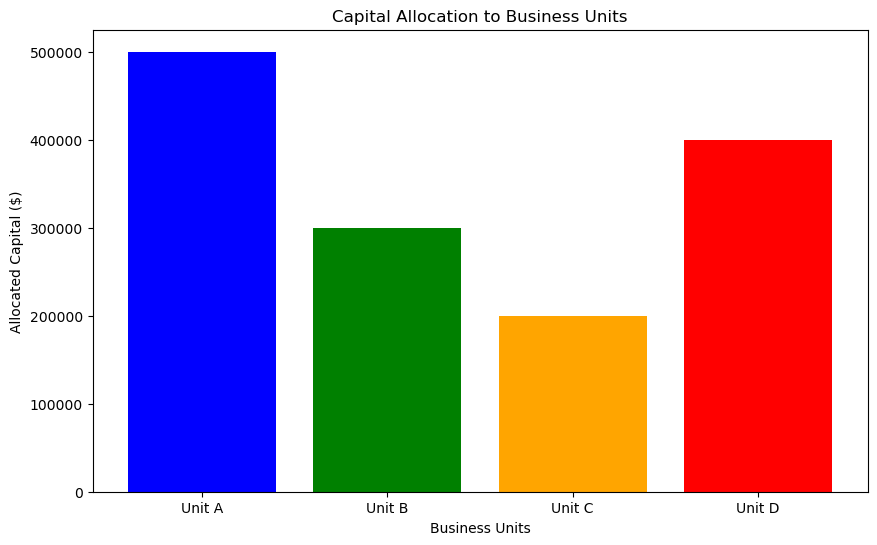

In [265]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for capital allocation
business_units = ['Unit A', 'Unit B', 'Unit C', 'Unit D']
allocated_capital = [500000, 300000, 200000, 400000]

# Create a DataFrame for visualization
data = {'Business Unit': business_units, 'Allocated Capital ($)': allocated_capital}
df = pd.DataFrame(data)

# Display a bar chart visualization related to capital allocation
plt.figure(figsize=(10, 6))
plt.bar(df['Business Unit'], df['Allocated Capital ($)'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Business Units')
plt.ylabel('Allocated Capital ($)')
plt.title('Capital Allocation to Business Units')
plt.show()


# Stress Testing

### What is Stress Testing

**Stress Testing**

**1. Definition:**
   - **Stress Testing:** Stress testing is a risk management technique used to assess the resilience of a financial institution, portfolio, or system by subjecting it to adverse and extreme scenarios. The purpose is to evaluate how well it can withstand unexpected and severe shocks, providing insights into potential vulnerabilities.

**2. Key Concepts:**

   a. **Scenario Analysis:**
      - Stress testing involves the creation of hypothetical scenarios that represent extreme, adverse, or unexpected market conditions, economic downturns, or other disruptive events.

   b. **Impact Assessment:**
      - The focus is on assessing the impact of these scenarios on the financial institution or portfolio, measuring potential losses, liquidity constraints, and changes in risk exposures.

**3. Types of Stress Testing:**

   a. **Financial Institution Stress Testing:**
      - Financial institutions, such as banks, undergo stress tests to evaluate their capital adequacy, liquidity, and overall financial stability under adverse conditions.

   b. **Portfolio Stress Testing:**
      - Investment portfolios are subjected to stress tests to analyze the potential impact of market shocks on the value of assets and the overall risk profile.

**4. Steps in Stress Testing:**

   a. **Scenario Design:**
      - Develop plausible and extreme scenarios that could pose a significant challenge to the financial institution or portfolio.

   b. **Data and Model Inputs:**
      - Gather relevant data and input it into financial models to simulate the effects of the stress scenarios.

   c. **Analysis and Results:**
      - Conduct a thorough analysis to determine the impact on key financial metrics, risk exposures, and the ability to meet regulatory requirements.

   d. **Mitigation Strategies:**
      - Identify potential mitigation strategies and actions that could be taken to address vulnerabilities highlighted by the stress testing results.

**5. Implications of Stress Testing:**

   a. **Risk Management Enhancement:**
      - Stress testing enhances risk management by identifying potential weaknesses, helping institutions and investors proactively manage risks.

   b. **Regulatory Compliance:**
      - Financial institutions may be required by regulators to undergo stress testing as part of regulatory compliance to ensure financial stability.

   c. **Strategic Planning:**
      - Stress testing informs strategic planning by providing insights into the institution's ability to withstand adverse conditions and make informed decisions for future risk management.

**6. Challenges and Considerations:**

   a. **Scenario Realism:**
      - Ensuring the realism and relevance of stress test scenarios is challenging, as the future is inherently uncertain.

   b. **Data Quality:**
      - The accuracy and reliability of data used in stress testing models are crucial for obtaining meaningful results.

   c. **Integration with Risk Models:**
      - Integrating stress testing with existing risk models and frameworks requires careful coordination to provide a comprehensive risk assessment.

**7. Use Cases:**

   a. **Bank Stress Testing:**
      - Banks undergo stress tests to evaluate their capital adequacy under severe economic conditions, ensuring they can withstand financial shocks.

   b. **Investment Portfolio Stress Testing:**
      - Investment firms conduct stress tests on portfolios to assess how various market scenarios may impact the value of assets and the overall risk profile.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Stress testing is an integral part of comprehensive risk management, complementing other risk measures such as value-at-risk (VaR) and scenario analysis.

Stress testing is a critical tool in financial risk management, providing organizations with valuable insights into their resilience and vulnerability to extreme events. It is a proactive approach to identifying and addressing potential risks before they materialize.

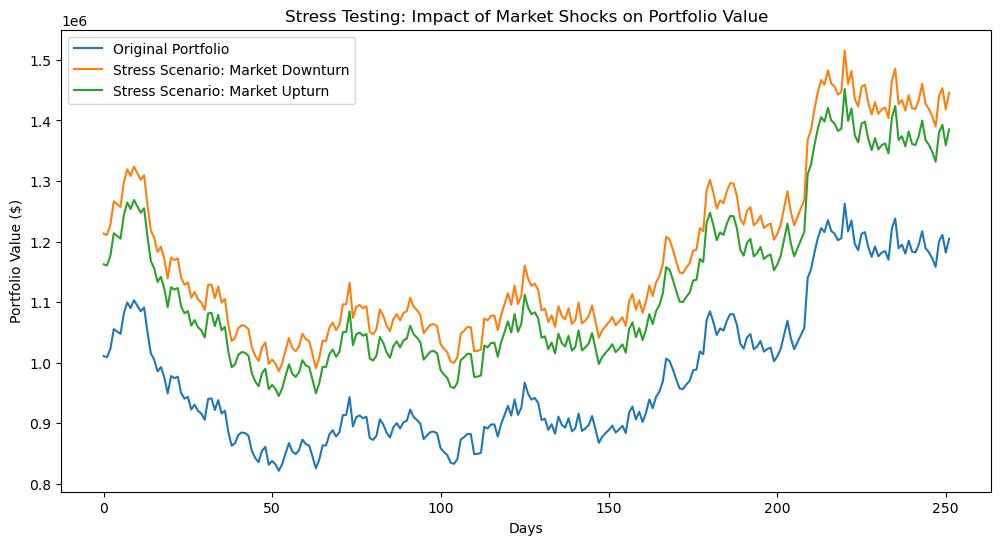

In [266]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for stress testing
np.random.seed(42)
original_portfolio_value = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate portfolio values over time
portfolio_values = original_portfolio_value * np.cumprod(1 + returns)

# Define stress scenarios
shock_down = 0.2  # 20% market downturn
shock_up = 0.15   # 15% market upturn

# Apply stress scenarios to portfolio values
portfolio_values_stress_down = portfolio_values * (1 + shock_down)
portfolio_values_stress_up = portfolio_values * (1 + shock_up)

# Visualize portfolio values over time with stress scenarios
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Original Portfolio')
plt.plot(portfolio_values_stress_down, label='Stress Scenario: Market Downturn')
plt.plot(portfolio_values_stress_up, label='Stress Scenario: Market Upturn')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Stress Testing: Impact of Market Shocks on Portfolio Value')
plt.legend()
plt.show()


### Scenario Creation

**Scenario Creation**

**1. Definition:**
   - **Scenario Creation:** Scenario creation is a process in risk management and financial planning that involves developing hypothetical situations or events to assess how various factors may impact an organization, portfolio, or financial system. These scenarios help in understanding potential risks, opportunities, and the range of possible outcomes.

**2. Key Concepts:**

   a. **Diverse Scenarios:**
      - Scenario creation involves the generation of diverse scenarios that span a range of potential future conditions, including economic changes, market fluctuations, geopolitical events, and other relevant factors.

   b. **Plausibility and Relevance:**
      - Scenarios need to be both plausible and relevant to the specific context of the organization or financial entity, ensuring that they provide meaningful insights.

**3. Steps in Scenario Creation:**

   a. **Identify Key Variables:**
      - Determine the key variables or factors that are relevant to the organization's risk profile or financial planning.

   b. **Define Scenarios:**
      - Develop distinct scenarios by varying the values of the identified variables to represent different potential future states.

   c. **Quantify Impact:**
      - Assess and quantify the impact of each scenario on relevant metrics, such as financial performance, risk exposure, and strategic objectives.

   d. **Sensitivity Analysis:**
      - Conduct sensitivity analysis to understand how changes in specific variables influence the overall outcomes in each scenario.

**4. Types of Scenarios:**

   a. **Economic Scenarios:**
      - Explore scenarios related to economic conditions, including inflation rates, interest rates, and overall economic growth or recession.

   b. **Market Scenarios:**
      - Assess scenarios that involve fluctuations in financial markets, such as stock market crashes, commodity price changes, or currency volatility.

   c. **Geopolitical Scenarios:**
      - Consider geopolitical events and their potential impact on the organization, such as political instability, trade disputes, or regulatory changes.

**5. Implications of Scenario Creation:**

   a. **Risk Identification:**
      - Scenario creation facilitates the identification of potential risks by exploring different future states that could adversely affect the organization.

   b. **Opportunity Recognition:**
      - It also helps recognize opportunities that may arise in certain scenarios, allowing organizations to capitalize on favorable conditions.

   c. **Strategic Planning:**
      - Scenario creation informs strategic planning by providing insights into how the organization can adapt and thrive in different possible futures.

**6. Challenges and Considerations:**

   a. **Complexity and Uncertainty:**
      - The future is inherently uncertain, and scenario creation involves navigating the complexity of multiple interacting variables.

   b. **Data Availability:**
      - The availability and quality of data play a crucial role in creating realistic and meaningful scenarios.

   c. **Dynamic Nature:**
      - Scenarios need to be regularly updated to reflect changes in the business environment, ensuring their continued relevance.

**7. Use Cases:**

   a. **Corporate Risk Management:**
      - Companies use scenario creation to assess how different economic and market conditions may impact their financial performance and risk exposure.

   b. **Investment Planning:**
      - Investment firms create scenarios to evaluate how various market conditions may affect the performance of investment portfolios.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Assessment:**
      - Scenario creation is integrated into comprehensive risk assessments, complementing other risk measures such as stress testing and sensitivity analysis.

Scenario creation is a valuable tool that allows organizations to explore a range of potential futures, helping them anticipate and prepare for various outcomes. It provides a structured approach to understanding and managing uncertainty in the dynamic business environment.

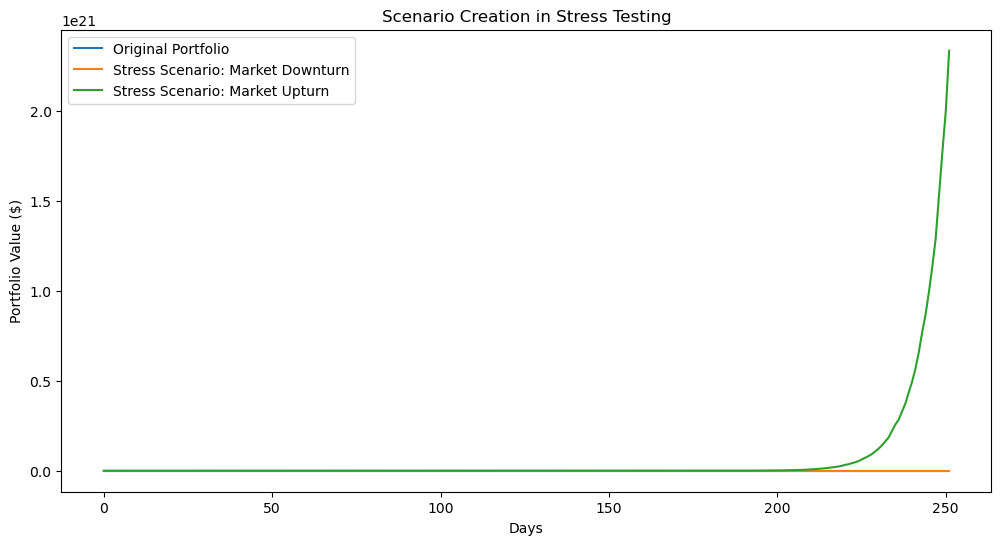

In [267]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for stress testing
np.random.seed(42)
original_portfolio_value = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate portfolio values over time
portfolio_values = original_portfolio_value * np.cumprod(1 + returns)

# Define stress scenarios
shock_down = 0.2  # 20% market downturn
shock_up = 0.15   # 15% market upturn

# Create a stress scenario by applying shocks to returns
returns_stress_down = returns - shock_down
returns_stress_up = returns + shock_up

# Calculate portfolio values under stress scenarios
portfolio_values_stress_down = original_portfolio_value * np.cumprod(1 + returns_stress_down)
portfolio_values_stress_up = original_portfolio_value * np.cumprod(1 + returns_stress_up)

# Visualize portfolio values over time with stress scenarios
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Original Portfolio')
plt.plot(portfolio_values_stress_down, label='Stress Scenario: Market Downturn')
plt.plot(portfolio_values_stress_up, label='Stress Scenario: Market Upturn')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Scenario Creation in Stress Testing')
plt.legend()
plt.show()

### Impact Asessment

**Impact Assessment**

**1. Definition:**
   - **Impact Assessment:** Impact assessment is the process of evaluating and analyzing the potential consequences or effects of a specific event, decision, or risk on various aspects of an organization, project, or system. It involves quantifying and qualitatively assessing the outcomes to inform decision-making and risk mitigation strategies.

**2. Key Concepts:**

   a. **Comprehensive Analysis:**
      - Impact assessment involves a comprehensive analysis of the potential effects, considering both direct and indirect consequences.

   b. **Quantitative and Qualitative Measures:**
      - It utilizes both quantitative measures, such as financial metrics, and qualitative assessments to understand the broader implications.

**3. Steps in Impact Assessment:**

   a. **Identification of Factors:**
      - Identify the key factors or variables that are likely to be affected by the event, decision, or risk.

   b. **Quantification:**
      - Quantify the potential impact on relevant metrics, such as financial performance, operational efficiency, reputation, and strategic goals.

   c. **Scenario Analysis:**
      - Conduct scenario analysis to explore different potential outcomes and their respective impacts on the organization.

   d. **Risk Prioritization:**
      - Prioritize risks based on their potential impact, allowing organizations to focus resources on addressing the most significant threats.

**4. Types of Impact Assessment:**

   a. **Financial Impact Assessment:**
      - Evaluates the potential financial consequences of an event or decision, including costs, revenue implications, and overall financial performance.

   b. **Operational Impact Assessment:**
      - Analyzes the effects on operational processes, efficiency, and the ability to deliver products or services.

   c. **Reputational Impact Assessment:**
      - Assesses the potential impact on the organization's reputation, brand value, and customer trust.

**5. Implications of Impact Assessment:**

   a. **Informed Decision-Making:**
      - Impact assessment provides decision-makers with crucial information to make informed choices and prioritize actions.

   b. **Risk Mitigation Strategies:**
      - It helps in developing effective risk mitigation strategies by understanding the potential consequences and addressing vulnerabilities.

   c. **Resource Allocation:**
      - Impact assessment assists in allocating resources efficiently, directing efforts towards areas with the greatest impact.

**6. Challenges and Considerations:**

   a. **Uncertainty:**
      - The future is inherently uncertain, and impact assessment may involve dealing with varying degrees of unpredictability.

   b. **Interconnectedness:**
      - Assessing the interconnected nature of different impacts and understanding how they may compound or mitigate each other can be challenging.

   c. **Data Quality:**
      - The accuracy and reliability of data used for impact assessment are critical for obtaining meaningful results.

**7. Use Cases:**

   a. **Project Management:**
      - Impact assessment is applied in project management to evaluate the consequences of decisions on project timelines, budgets, and outcomes.

   b. **Risk Management:**
      - Organizations use impact assessment to analyze the potential effects of identified risks on various aspects of their operations.

**8. Integration with Other Risk Measures:**

   a. **Risk Assessment Models:**
      - Impact assessment is integrated into broader risk assessment models, complementing measures such as likelihood, severity, and overall risk exposure.

Impact assessment is a fundamental component of risk management and decision-making processes. By systematically evaluating potential outcomes, organizations can proactively address challenges and capitalize on opportunities, contributing to overall resilience and success.

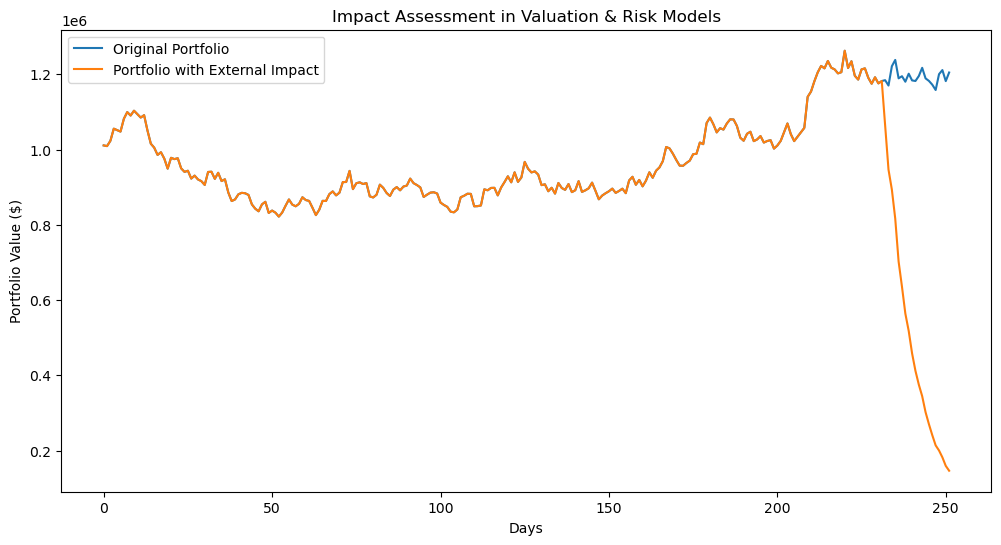

In [268]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for impact assessment
np.random.seed(42)
original_portfolio_value = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate portfolio values over time
portfolio_values = original_portfolio_value * np.cumprod(1 + returns)

# Define an external event impacting the portfolio
impact_days = 20  # Number of days the impact lasts
impact_magnitude = 0.1  # Magnitude of the impact (e.g., 10% decrease)

# Apply the impact to the returns during the specified days
returns[-impact_days:] -= impact_magnitude

# Calculate portfolio values with the impact
portfolio_values_impact = original_portfolio_value * np.cumprod(1 + returns)

# Visualize the impact assessment
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Original Portfolio')
plt.plot(portfolio_values_impact, label='Portfolio with External Impact')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Impact Assessment in Valuation & Risk Models')
plt.legend()
plt.show()


### Sensitivity Analysis

**Sensitivity Analysis**

**1. Definition:**
   - **Sensitivity Analysis:** Sensitivity analysis is a quantitative technique used in risk management and financial modeling to assess how changes in input variables impact the output of a model or the performance of a system. It helps identify the key drivers of uncertainty and understand the potential variations in outcomes.

**2. Key Concepts:**

   a. **Variable Impact Assessment:**
      - Sensitivity analysis assesses the impact of variations in specific input variables on the overall output, allowing for a better understanding of their influence.

   b. **Quantitative Modeling:**
      - It is often applied in the context of quantitative models, such as financial models, to evaluate the robustness of the model under different scenarios.

**3. Steps in Sensitivity Analysis:**

   a. **Identification of Variables:**
      - Identify the input variables or parameters in the model that are subject to uncertainty or variations.

   b. **Parameter Adjustment:**
      - Systematically adjust each identified parameter within a specified range to observe the corresponding changes in the output.

   c. **Output Analysis:**
      - Analyze how variations in input parameters affect the output metrics, such as financial performance indicators or risk measures.

   d. **Risk Prioritization:**
      - Prioritize input variables based on their impact, distinguishing between those with significant influence and those with minimal effect.

**4. Types of Sensitivity Analysis:**

   a. **One-Way Sensitivity Analysis:**
      - Examines the impact of varying a single input variable while keeping others constant.

   b. **Multi-Way Sensitivity Analysis:**
      - Considers the simultaneous variation of multiple input variables to understand their collective impact on the output.

   c. **Scenario Sensitivity Analysis:**
      - Analyzes the model's response to specific predefined scenarios, providing insights into the system's behavior under different conditions.

**5. Implications of Sensitivity Analysis:**

   a. **Risk Identification:**
      - Sensitivity analysis helps identify critical variables that contribute most significantly to uncertainties and risks in the model.

   b. **Decision Support:**
      - It provides decision-makers with valuable information for strategic planning and risk mitigation by highlighting areas of vulnerability.

   c. **Optimization Opportunities:**
      - Sensitivity analysis can reveal opportunities for optimization by focusing on variables that significantly impact performance.

**6. Challenges and Considerations:**

   a. **Data Accuracy:**
      - The accuracy of the analysis relies on the accuracy of input data and assumptions, making data quality a critical consideration.

   b. **Interactions between Variables:**
      - Understanding interactions between variables is essential, as changes in one variable may influence the sensitivity of others.

   c. **Assumption Sensitivity:**
      - Sensitivity analysis is sensitive to the assumptions made in the model, and variations in these assumptions can affect the results.

**7. Use Cases:**

   a. **Financial Modeling:**
      - In financial modeling, sensitivity analysis is applied to assess how changes in interest rates, exchange rates, or other financial parameters impact financial statements.

   b. **Project Management:**
      - Sensitivity analysis helps project managers understand the impact of variations in project parameters on timelines, costs, and outcomes.

**8. Integration with Other Risk Measures:**

   a. **Risk Assessment Models:**
      - Sensitivity analysis is often integrated into broader risk assessment models to complement measures such as scenario analysis and stress testing.

Sensitivity analysis is a powerful tool for understanding the dynamics of complex systems, guiding decision-making, and enhancing risk management strategies by focusing on the most influential variables.

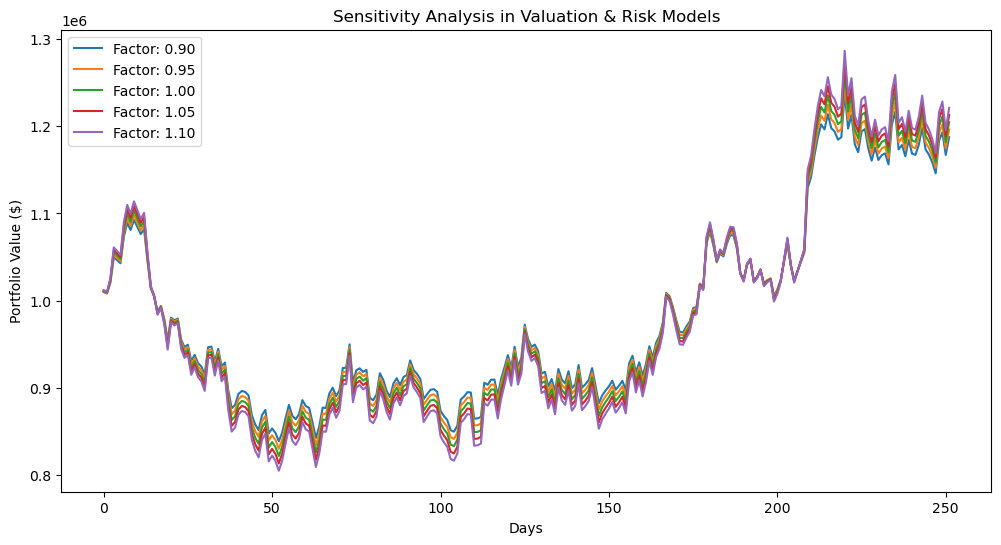

In [269]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for sensitivity analysis
np.random.seed(42)
original_portfolio_value = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate portfolio values over time
portfolio_values = original_portfolio_value * np.cumprod(1 + returns)

# Define parameters for sensitivity analysis
sensitivity_factors = np.linspace(0.9, 1.1, 5)  # Varying factors to assess sensitivity
sensitivity_results = []

# Perform sensitivity analysis
for factor in sensitivity_factors:
    returns_sensitivity = returns * factor
    portfolio_values_sensitivity = original_portfolio_value * np.cumprod(1 + returns_sensitivity)
    sensitivity_results.append(portfolio_values_sensitivity)

# Visualize the sensitivity analysis
plt.figure(figsize=(12, 6))
for i, factor in enumerate(sensitivity_factors):
    plt.plot(sensitivity_results[i], label=f'Factor: {factor:.2f}')

plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Sensitivity Analysis in Valuation & Risk Models')
plt.legend()
plt.show()


### Value At Risk (VaR) in Stress Testing

**Value at Risk (VaR) in Stress Testing**

**1. Overview:**
   - **Value at Risk (VaR):** VaR is a statistical measure used to quantify the potential loss in the value of a portfolio or financial instrument over a specified time horizon at a given confidence level. It is commonly employed in risk management to assess and limit exposure to market fluctuations.

   - **Stress Testing:** Stress testing involves evaluating the resilience of a financial system or portfolio by subjecting it to extreme and adverse scenarios. It helps assess the impact of severe market conditions on the value and performance of assets.

**2. Integration of VaR in Stress Testing:**

   a. **Scenario Generation:**
      - In stress testing, scenarios are created to represent extreme and adverse market conditions. VaR is then applied within these scenarios to estimate potential losses.

   b. **VaR Calculation:**
      - VaR is calculated for each scenario to quantify the potential loss at a specified confidence level. This provides insights into the worst-case scenarios for the portfolio.

   c. **Comparison with Thresholds:**
      - The calculated VaR is compared against predefined risk thresholds or limits. If the VaR exceeds these thresholds, it signals that the portfolio is at risk of significant losses.

**3. Steps in VaR Application in Stress Testing:**

   a. **Scenario Design:**
      - Develop stress test scenarios that reflect extreme market conditions, considering factors such as market volatility, interest rate changes, and economic downturns.

   b. **Input Parameters:**
      - Identify the relevant input parameters for VaR calculation, such as asset prices, interest rates, and market indices.

   c. **VaR Calculation:**
      - Utilize statistical methods, such as historical simulation or Monte Carlo simulation, to calculate VaR for each scenario.

   d. **Portfolio Impact:**
      - Assess the impact of the stress test scenarios on the overall portfolio by considering the VaR results in the context of the entire portfolio composition.

   e. **Risk Mitigation:**
      - Identify potential risk mitigation strategies based on the VaR results. This may include adjusting portfolio allocations or implementing hedging strategies.

**4. Implications of Using VaR in Stress Testing:**

   a. **Quantification of Risk:**
      - VaR provides a quantitative measure of the potential downside risk in stress test scenarios, allowing for a more precise assessment of portfolio vulnerability.

   b. **Risk Prioritization:**
      - By incorporating VaR into stress testing, organizations can prioritize risks based on the severity of potential losses, focusing on the most critical areas.

   c. **Enhanced Risk Management:**
      - The combination of VaR and stress testing enhances risk management practices by providing a comprehensive view of portfolio risk under extreme conditions.

**5. Challenges and Considerations:**

   a. **Model Accuracy:**
      - The accuracy of VaR calculations relies on the appropriateness of the underlying statistical models and assumptions.

   b. **Tail Risk:**
      - VaR might not capture extreme tail risk events effectively. Stress testing helps address this limitation by explicitly examining worst-case scenarios.

   c. **Correlation Assumptions:**
      - The accuracy of stress testing results incorporating VaR depends on the appropriateness of assumptions regarding correlations between different assets or market factors.

**6. Use Cases:**

   a. **Investment Portfolios:**
      - Asset managers use VaR within stress testing to assess the potential impact of extreme market events on the value of investment portfolios.

   b. **Financial Institutions:**
      - Banks incorporate VaR in stress testing to evaluate how adverse market conditions could impact their overall financial stability.

**7. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Assessment:**
      - VaR, when integrated into stress testing, contributes to a comprehensive risk assessment alongside other measures such as scenario analysis and sensitivity analysis.

Incorporating Value at Risk into stress testing provides a nuanced understanding of potential losses under extreme scenarios, enabling organizations to make informed decisions and strengthen risk management strategies.

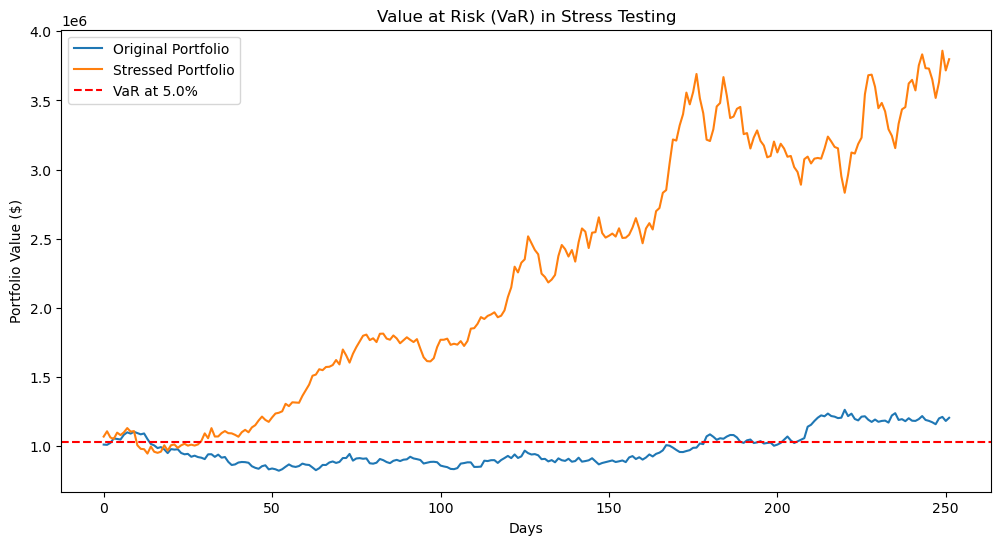

In [270]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for stress testing
np.random.seed(42)
original_portfolio_value = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate portfolio values over time
portfolio_values = original_portfolio_value * np.cumprod(1 + returns)

# Calculate Value at Risk (VaR)
alpha = 0.05  # Confidence level
var = np.percentile(returns, alpha * 100)

# Create stress test scenarios
stress_test_returns = np.random.normal(0.005, 0.03, 252)  # Higher volatility scenario

# Calculate stressed portfolio values
stressed_portfolio_values = original_portfolio_value * np.cumprod(1 + stress_test_returns)

# Visualize the stress test results and VaR
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Original Portfolio')
plt.plot(stressed_portfolio_values, label='Stressed Portfolio')
plt.axhline(original_portfolio_value * (1 - var), color='red', linestyle='--', label=f'VaR at {alpha * 100}%')

plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Value at Risk (VaR) in Stress Testing')
plt.legend()
plt.show()


### Capital Adequacy Assessment

**Capital Adequacy Assessment**

**1. Definition:**
   - **Capital Adequacy Assessment:** Capital Adequacy Assessment is a process conducted by financial institutions to evaluate whether their capital levels are sufficient to support their risk exposures and comply with regulatory requirements. It involves assessing the adequacy of capital in relation to the risks the institution faces.

**2. Key Concepts:**

   a. **Regulatory Standards:**
      - Financial regulators set capital adequacy standards to ensure that institutions maintain a sufficient level of capital relative to their risk profile.

   b. **Risk Weighted Assets:**
      - Capital adequacy is often measured against risk-weighted assets, where different assets and exposures carry varying levels of risk.

**3. Steps in Capital Adequacy Assessment:**

   a. **Risk Identification:**
      - Identify and assess various risks faced by the institution, including credit risk, market risk, operational risk, and others.

   b. **Capital Measurement:**
      - Quantify the institution's capital by considering factors such as Tier 1 capital, Tier 2 capital, and regulatory adjustments.

   c. **Risk Weighting:**
      - Apply risk weights to different assets and exposures based on their risk profiles, as specified by regulatory frameworks such as Basel III.

   d. **Calculation of Capital Ratios:**
      - Calculate capital adequacy ratios, such as the Capital Adequacy Ratio (CAR), which compares the institution's capital to its risk-weighted assets.

   e. **Regulatory Compliance:**
      - Ensure compliance with regulatory capital requirements set by financial authorities, aiming to maintain a buffer of capital beyond the minimum thresholds.

**4. Components of Capital Adequacy:**

   a. **Tier 1 Capital:**
      - Core capital comprising common equity and retained earnings.

   b. **Tier 2 Capital:**
      - Supplementary capital, including subordinated debt and other instruments, providing an additional layer of protection.

   c. **Risk-Weighted Assets:**
      - Assets adjusted for risk, reflecting the likelihood of losses associated with different types of exposures.

**5. Implications of Capital Adequacy Assessment:**

   a. **Financial Stability:**
      - Ensures the financial stability of the institution by maintaining sufficient capital to absorb potential losses.

   b. **Risk Management:**
      - Enhances risk management practices by aligning capital levels with the institution's risk profile.

   c. **Regulatory Compliance:**
      - Demonstrates compliance with regulatory requirements, fostering confidence among regulators, investors, and depositors.

**6. Challenges and Considerations:**

   a. **Dynamic Risk Environment:**
      - The assessment must adapt to changes in the financial landscape, considering evolving risks and market conditions.

   b. **Data Quality:**
      - Accurate and timely data is crucial for assessing risk exposures and calculating capital adequacy ratios.

   c. **Macroprudential Considerations:**
      - Institutions need to consider macroprudential factors, such as the overall health of the financial system, in their capital adequacy assessments.

**7. Use Cases:**

   a. **Banking Sector:**
      - Banks regularly conduct capital adequacy assessments to ensure compliance with regulatory requirements and safeguard against unexpected losses.

   b. **Insurance Companies:**
      - Insurance firms assess their capital adequacy to cover potential claims and maintain solvency.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Capital adequacy assessment is an integral part of comprehensive risk management, aligning with measures such as stress testing, scenario analysis, and liquidity risk management.

Capital Adequacy Assessment is a cornerstone of financial stability, ensuring that institutions maintain a robust capital position to withstand potential shocks and fulfill their role in the broader financial system.

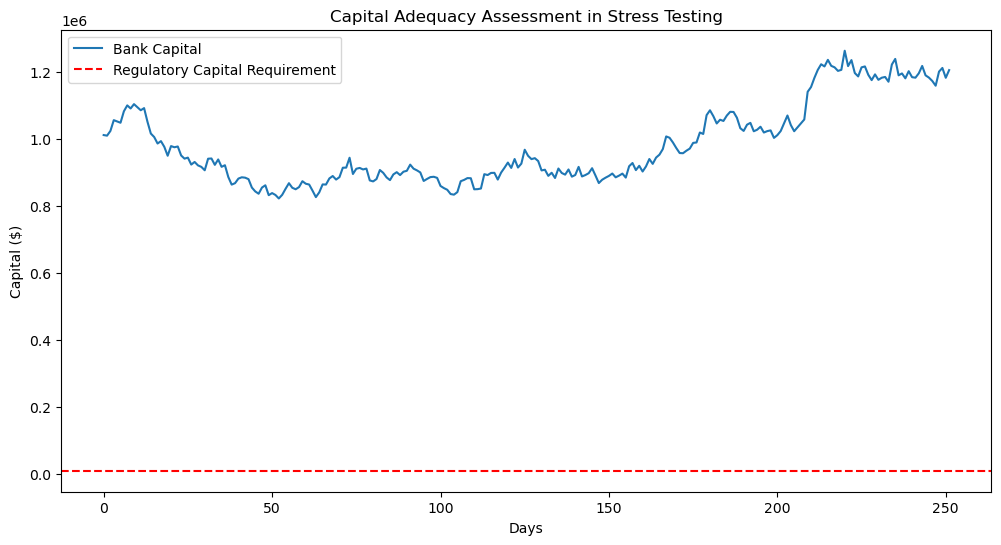

In [271]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for stress testing
np.random.seed(42)
original_capital = 1000000
returns = np.random.normal(0.001, 0.02, 252)  # Daily returns for a year

# Calculate capital over time
capital_values = original_capital * np.cumprod(1 + returns)

# Calculate regulatory capital requirement (e.g., Basel III framework)
regulatory_capital_ratio = 0.08  # Regulatory minimum capital ratio
risk_weighted_assets = 0.12  # Example risk-weighted assets ratio
regulatory_capital_requirement = risk_weighted_assets * capital_values[0] * regulatory_capital_ratio

# Visualize the capital adequacy assessment
plt.figure(figsize=(12, 6))
plt.plot(capital_values, label='Bank Capital')
plt.axhline(regulatory_capital_requirement, color='red', linestyle='--', label='Regulatory Capital Requirement')

plt.xlabel('Days')
plt.ylabel('Capital ($)')
plt.title('Capital Adequacy Assessment in Stress Testing')
plt.legend()
plt.show()

### Macro Stress Testing

**Macro Stress Testing**

**1. Definition:**
   - **Macro Stress Testing:** Macro stress testing is a risk management technique used to assess the resilience of an economy or financial system to severe and adverse macroeconomic shocks. It involves simulating the impact of extreme economic scenarios on various financial and economic indicators.

**2. Key Concepts:**

   a. **Economic Scenarios:**
      - Macro stress testing involves the creation of hypothetical economic scenarios that represent extreme conditions, such as economic recessions, financial crises, or other systemic shocks.

   b. **System-wide Impact:**
      - It assesses the potential systemic impact of adverse macroeconomic events on financial institutions, markets, and the overall economic environment.

**3. Steps in Macro Stress Testing:**

   a. **Scenario Design:**
      - Develop a set of macroeconomic scenarios, considering factors such as GDP growth, inflation, interest rates, and unemployment, to represent extreme conditions.

   b. **Data Inputs:**
      - Gather relevant economic and financial data to input into models for simulating the impact of the scenarios.

   c. **Modeling and Simulation:**
      - Utilize econometric models, financial models, or simulation tools to estimate the potential impact of the scenarios on key economic indicators, financial institutions, and markets.

   d. **Scenario Analysis:**
      - Analyze the results of the stress tests to understand how the economy and financial system would perform under severe stress conditions.

   e. **Policy Implications:**
      - Assess the implications for monetary policy, fiscal policy, and regulatory measures that may be needed to address vulnerabilities identified during stress testing.

**4. Types of Macro Stress Testing:**

   a. **Adverse Scenarios:**
      - Tests the resilience of the economy and financial system under adverse conditions, such as a severe economic downturn or financial crisis.

   b. **Global Shocks:**
      - Examines the impact of global shocks, such as a global recession or financial contagion, on the domestic economy.

**5. Implications of Macro Stress Testing:**

   a. **Risk Identification:**
      - Macro stress testing helps identify potential systemic risks and vulnerabilities in the financial system that may arise under extreme economic conditions.

   b. **Policy Formulation:**
      - Results from stress tests inform policymakers about the potential need for adjustments in monetary policy, fiscal measures, or regulatory interventions to enhance resilience.

   c. **Preventive Measures:**
      - The insights gained from macro stress testing can guide the implementation of preventive measures to strengthen the economy's ability to withstand shocks.

**6. Challenges and Considerations:**

   a. **Complexity of Interactions:**
      - The complexity of economic interactions makes it challenging to capture all potential outcomes accurately, requiring careful consideration of interconnected factors.

   b. **Data Quality:**
      - The accuracy and reliability of economic and financial data are crucial for meaningful stress testing results.

   c. **Model Assumptions:**
      - Assumptions made in the modeling process may influence results, and it's essential to be transparent about these assumptions and their potential impact.

**7. Use Cases:**

   a. **Central Banks:**
      - Central banks conduct macro stress testing to assess the resilience of the financial system and inform monetary policy decisions.

   b. **Regulatory Authorities:**
      - Regulatory authorities use macro stress testing to evaluate the soundness of financial institutions and implement regulatory measures to enhance stability.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Macro stress testing is integrated into comprehensive risk management frameworks, complementing other risk measures such as micro-level stress testing, scenario analysis, and sensitivity analysis.

Macro stress testing provides a valuable tool for understanding and addressing systemic risks, contributing to the overall stability and resilience of an economy and its financial system.

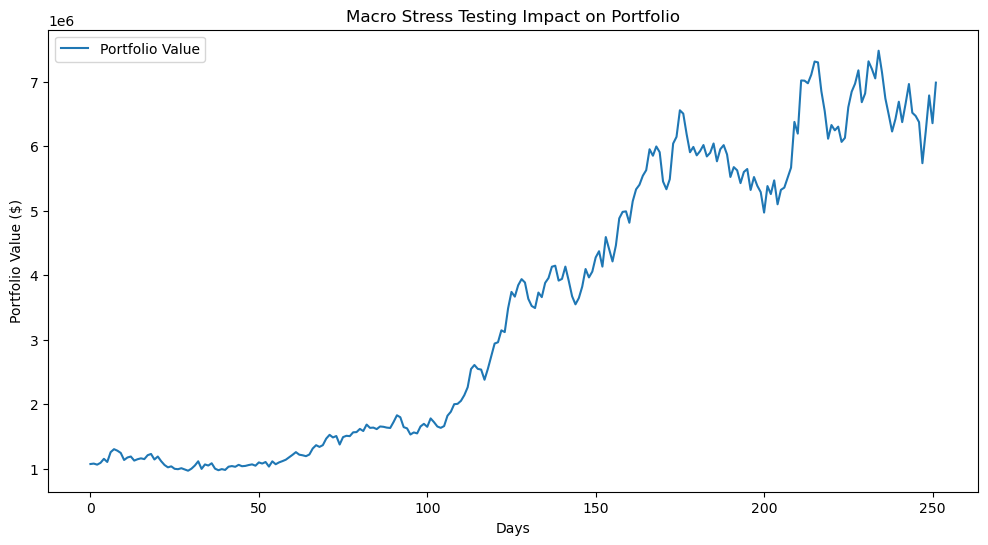

In [272]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for macro stress testing
np.random.seed(42)
economic_indicators = np.random.normal(0.001, 0.02, (5, 252))  # Simulate daily changes in 5 economic indicators for a year

# Calculate the aggregate impact on a hypothetical portfolio
portfolio_value = 1000000
portfolio_returns = np.sum(economic_indicators, axis=0)
portfolio_values = portfolio_value * np.cumprod(1 + portfolio_returns)

# Visualize the macro stress testing impact
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value')

plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Macro Stress Testing Impact on Portfolio')
plt.legend()
plt.show()

### Credit Risk Stress Testing

**Credit Risk Stress Testing**

**1. Definition:**
   - **Credit Risk Stress Testing:** Credit risk stress testing is a risk management technique used by financial institutions to assess the impact of adverse economic scenarios on their credit portfolios. It involves simulating extreme conditions to evaluate potential losses, identify vulnerabilities, and ensure the institution's resilience to credit-related risks.

**2. Key Concepts:**

   a. **Loan Portfolios:**
      - Focuses on evaluating the credit risk associated with loan portfolios, including various types of loans such as mortgages, commercial loans, and consumer loans.

   b. **Adverse Scenarios:**
      - Involves subjecting the credit portfolio to adverse economic scenarios, such as economic downturns, interest rate spikes, or specific industry-related shocks.

**3. Steps in Credit Risk Stress Testing:**

   a. **Scenario Design:**
      - Develop scenarios that represent extreme and adverse economic conditions, considering factors such as economic growth, unemployment rates, interest rates, and other relevant variables.

   b. **Data Inputs:**
      - Gather data on the credit portfolio, economic indicators, and other relevant variables to input into stress testing models.

   c. **Modeling and Simulation:**
      - Utilize credit risk models to simulate the impact of the adverse scenarios on the credit portfolio. This may involve estimating potential losses, changes in credit ratings, and default probabilities.

   d. **Analysis and Results:**
      - Analyze the results to identify areas of vulnerability, assess the magnitude of potential credit losses, and understand the impact on key credit risk metrics.

   e. **Risk Mitigation Strategies:**
      - Based on the stress testing results, develop risk mitigation strategies to address identified vulnerabilities and enhance the institution's ability to navigate challenging credit environments.

**4. Types of Credit Risk Stress Testing:**

   a. **Macro-level Stress Testing:**
      - Assesses the impact of systemic economic shocks on the entire credit portfolio, considering factors affecting the overall economy.

   b. **Micro-level Stress Testing:**
      - Focuses on specific segments or types of loans within the portfolio, such as residential mortgages or commercial real estate loans, to analyze their unique vulnerabilities.

**5. Implications of Credit Risk Stress Testing:**

   a. **Risk Management Enhancement:**
      - Identifies potential weaknesses in the credit portfolio and enhances risk management practices to mitigate adverse effects.

   b. **Capital Planning:**
      - Informs capital planning by providing insights into the capital adequacy needed to withstand severe credit-related shocks.

   c. **Regulatory Compliance:**
      - Demonstrates compliance with regulatory requirements, as regulators often mandate stress testing to ensure financial institutions are adequately prepared for adverse conditions.

**6. Challenges and Considerations:**

   a. **Data Quality:**
      - The accuracy and reliability of data are crucial for meaningful stress testing results, and institutions need to ensure data integrity.

   b. **Model Assumptions:**
      - Assumptions made in the modeling process can impact results, and it's important to transparently communicate and validate these assumptions.

   c. **Dynamic Economic Landscape:**
      - The economic landscape is dynamic, and stress testing models need to be adaptive to changing conditions and emerging risks.

**7. Use Cases:**

   a. **Banks and Financial Institutions:**
      - Banks and financial institutions conduct credit risk stress testing to assess the impact of adverse economic conditions on their loan portfolios.

   b. **Regulatory Authorities:**
      - Regulatory authorities use credit risk stress testing results to evaluate the resilience of financial institutions and implement regulatory measures to enhance stability.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Credit risk stress testing is integrated into comprehensive risk management frameworks, aligning with other risk measures such as scenario analysis, sensitivity analysis, and capital adequacy assessment.

Credit risk stress testing is a critical component of credit risk management, providing a proactive approach to identifying and mitigating potential credit-related vulnerabilities in the face of adverse economic scenarios.

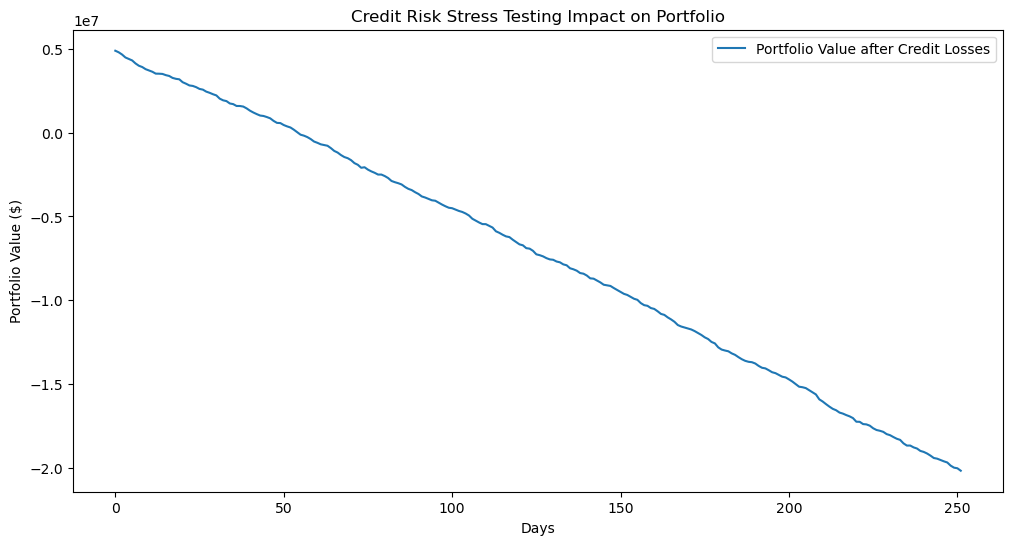

In [273]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for credit risk stress testing
np.random.seed(42)
credit_loss_scenarios = np.random.normal(0.02, 0.01, 252)  # Simulate daily credit loss scenarios for a year

# Calculate the impact on a hypothetical credit portfolio
portfolio_exposure = 5000000
credit_losses = portfolio_exposure * credit_loss_scenarios
portfolio_values = portfolio_exposure - np.cumsum(credit_losses)

# Visualize the credit risk stress testing impact
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value after Credit Losses')

plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('Credit Risk Stress Testing Impact on Portfolio')
plt.legend()
plt.show()

### Liquidity Stress Testing

**Liquidity Stress Testing**

**1. Definition:**
   - **Liquidity Stress Testing:** Liquidity stress testing is a risk management technique employed by financial institutions to evaluate their ability to withstand and navigate severe liquidity shocks. It involves simulating adverse scenarios to assess the impact on an institution's liquidity position and ensure preparedness for unexpected funding needs.

**2. Key Concepts:**

   a. **Funding Sources:**
      - Focuses on assessing the availability of funding sources under stress, including cash, marketable securities, and access to various funding markets.

   b. **Market Conditions:**
      - Considers adverse market conditions, sudden changes in investor sentiment, or disruptions in funding markets as potential stress scenarios.

**3. Steps in Liquidity Stress Testing:**

   a. **Scenario Design:**
      - Develop scenarios that represent extreme and adverse liquidity conditions, considering factors such as market turbulence, withdrawal of funding, and other liquidity shocks.

   b. **Data Inputs:**
      - Gather relevant data on funding sources, cash flows, market conditions, and other liquidity-related variables to input into stress testing models.

   c. **Modeling and Simulation:**
      - Utilize liquidity risk models to simulate the impact of adverse scenarios on the institution's liquidity position. This may involve estimating potential cash outflows, market disruptions, and funding gaps.

   d. **Analysis and Results:**
      - Analyze the results to identify areas of vulnerability, assess the magnitude of potential liquidity shortfalls, and understand the impact on key liquidity metrics.

   e. **Contingency Planning:**
      - Based on the stress testing results, develop contingency plans and strategies to address identified vulnerabilities, such as securing additional funding or adjusting liquidity management practices.

**4. Types of Liquidity Stress Testing:**

   a. **Market Stress Testing:**
      - Assesses the impact of adverse market conditions on the institution's ability to access funding from financial markets.

   b. **Funding Source Stress Testing:**
      - Focuses on the resilience of specific funding sources, such as wholesale funding or retail deposits, under stress scenarios.

**5. Implications of Liquidity Stress Testing:**

   a. **Risk Mitigation:**
      - Identifies potential liquidity risks and allows for the development of risk mitigation strategies to enhance the institution's ability to manage liquidity challenges.

   b. **Contingency Preparedness:**
      - Enhances the institution's preparedness by developing contingency plans and ensuring the availability of resources to meet unexpected funding needs.

   c. **Regulatory Compliance:**
      - Demonstrates compliance with regulatory requirements, as regulators often mandate liquidity stress testing to ensure financial institutions are adequately prepared for adverse liquidity conditions.

**6. Challenges and Considerations:**

   a. **Dynamic Market Conditions:**
      - The dynamic nature of financial markets requires stress testing models to be adaptable to changing conditions and emerging risks.

   b. **Data Quality:**
      - The accuracy and reliability of data are crucial for meaningful stress testing results, and institutions need to ensure data integrity.

   c. **Interconnectedness:**
      - Consideration of the interconnectedness of funding sources and markets is essential, as disruptions in one area can impact others.

**7. Use Cases:**

   a. **Banks and Financial Institutions:**
      - Banks and financial institutions conduct liquidity stress testing to assess their resilience to adverse liquidity conditions and enhance liquidity risk management practices.

   b. **Regulatory Authorities:**
      - Regulatory authorities use liquidity stress testing results to evaluate the liquidity risk management capabilities of financial institutions and implement regulatory measures to enhance stability.

**8. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Liquidity stress testing is integrated into comprehensive risk management frameworks, aligning with other risk measures such as scenario analysis, credit risk stress testing, and capital adequacy assessment.

Liquidity stress testing is a crucial tool for financial institutions to proactively identify and address potential liquidity vulnerabilities, ensuring the stability of their operations in the face of adverse market conditions.

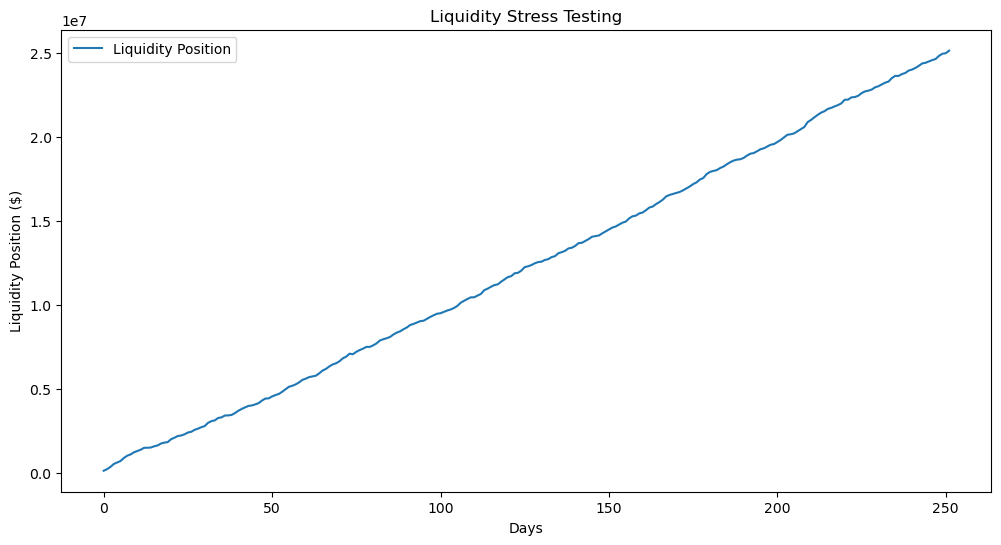

In [274]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for liquidity stress testing
np.random.seed(42)
cash_flows = np.random.normal(100000, 50000, 252)  # Simulate daily cash flows for a year

# Calculate the liquidity position over time
liquidity_position = np.cumsum(cash_flows)

# Visualize the liquidity stress testing results
plt.figure(figsize=(12, 6))
plt.plot(liquidity_position, label='Liquidity Position')

plt.xlabel('Days')
plt.ylabel('Liquidity Position ($)')
plt.title('Liquidity Stress Testing')
plt.legend()
plt.show()

### Reverse Stress Testing

**Reverse Stress Testing**

**1. Definition:**
   - **Reverse Stress Testing:** Reverse stress testing is a risk management technique used by financial institutions to identify extreme scenarios in which the institution could face significant financial distress. Unlike traditional stress testing, where adverse scenarios are simulated to assess impacts, reverse stress testing starts with a predefined level of distress and works backward to identify the conditions that could lead to such distress.

**2. Key Concepts:**

   a. **Scenario Backward Analysis:**
      - Involves analyzing potential scenarios that could lead to severe financial stress and identifying the specific conditions or events that could trigger such scenarios.

   b. **Capital Depletion Identification:**
      - Focuses on understanding the points at which the institution's capital becomes critically depleted, leading to financial instability.

**3. Steps in Reverse Stress Testing:**

   a. **Distress Scenario Definition:**
      - Define an extreme level of financial distress, such as insolvency or severe capital depletion, that the institution aims to avoid.

   b. **Scenario Analysis:**
      - Work backward to analyze the scenarios and conditions that would lead to the predefined level of distress. This involves considering various factors, including market shocks, operational failures, or extreme economic downturns.

   c. **Identification of Trigger Events:**
      - Identify specific trigger events or combinations of events that, if they were to occur, could lead to the identified level of financial distress.

   d. **Assessment of Vulnerabilities:**
      - Assess vulnerabilities within the institution's operations, risk management processes, and business model that may amplify the impact of identified trigger events.

   e. **Mitigation Strategies:**
      - Develop mitigation strategies to address the vulnerabilities and reduce the likelihood or severity of the identified trigger events.

**4. Implications of Reverse Stress Testing:**

   a. **Risk Identification:**
      - Reverse stress testing helps identify potential risks and vulnerabilities that may not be apparent in traditional stress testing approaches.

   b. **Proactive Risk Management:**
      - Allows institutions to proactively address vulnerabilities and strengthen risk management practices to prevent severe financial distress.

   c. **Capital Planning:**
      - Informs capital planning by highlighting specific scenarios that could lead to critical capital depletion, enabling institutions to allocate capital more effectively.

**5. Challenges and Considerations:**

   a. **Scenario Definition:**
      - Defining a realistic and extreme level of distress is crucial for the effectiveness of reverse stress testing.

   b. **Data Availability:**
      - Access to accurate and relevant data is essential to accurately model and analyze potential trigger events and their impact.

   c. **Comprehensive Analysis:**
      - Comprehensive analysis is needed to consider a wide range of scenarios and trigger events that could lead to severe financial distress.

**6. Use Cases:**

   a. **Risk Management Strategy:**
      - Financial institutions use reverse stress testing as part of their overall risk management strategy to identify and address potential vulnerabilities.

   b. **Regulatory Compliance:**
      - Regulatory authorities may require institutions to perform reverse stress testing as part of regulatory compliance to ensure the resilience of the financial system.

**7. Integration with Other Risk Measures:**

   a. **Comprehensive Risk Management:**
      - Reverse stress testing is integrated into comprehensive risk management frameworks, complementing other risk measures such as traditional stress testing, scenario analysis, and liquidity stress testing.

Reverse stress testing is a forward-looking approach that provides financial institutions with insights into the specific conditions and events that could lead to severe financial distress. By understanding these scenarios, institutions can take proactive measures to strengthen their resilience and mitigate potential risks.

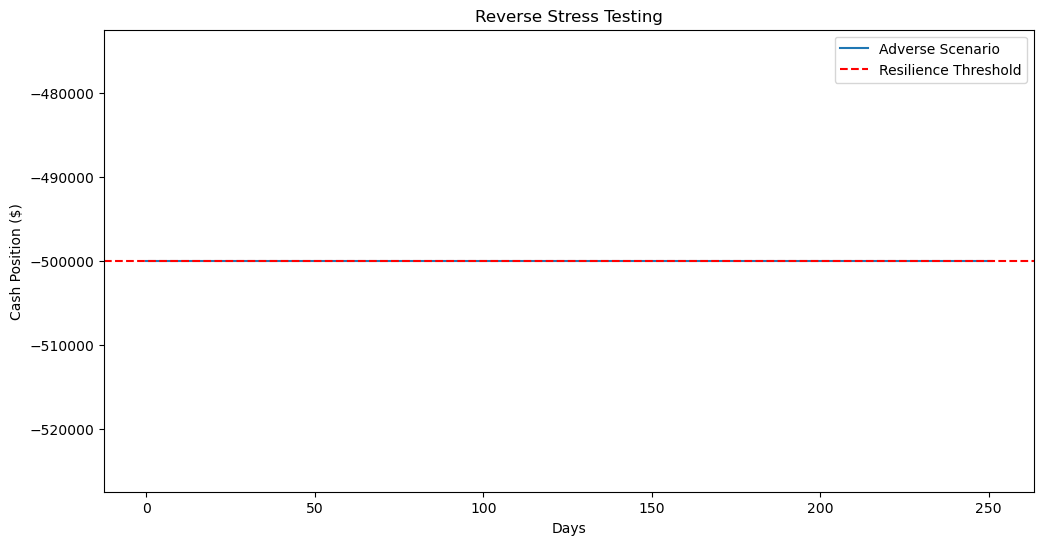

In [275]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for reverse stress testing
np.random.seed(42)
cash_flows = np.random.normal(100000, 50000, 252)  # Simulate daily cash flows for a year

# Calculate the reverse stress testing results
resilience_threshold = -500000  # Set a resilience threshold
adverse_scenario = np.minimum(np.cumsum(cash_flows), resilience_threshold)

# Visualize the reverse stress testing results
plt.figure(figsize=(12, 6))
plt.plot(adverse_scenario, label='Adverse Scenario')

plt.xlabel('Days')
plt.ylabel('Cash Position ($)')
plt.title('Reverse Stress Testing')
plt.axhline(resilience_threshold, color='r', linestyle='--', label='Resilience Threshold')
plt.legend()
plt.show()

# Pricing Conventions, Discounting and Arbitrage

### Pricing Conventions

**Pricing Conventions in Financial Markets**

**1. Definition:**
   - **Pricing Conventions:** Pricing conventions refer to the standardized methods and practices used in financial markets to determine the prices of various financial instruments. These conventions ensure consistency and efficiency in pricing across different market participants.

**2. Key Concepts:**

   a. **Market Standards:**
      - Pricing conventions are often based on market standards and industry best practices to promote uniformity in valuations.

   b. **Consistency Across Instruments:**
      - Conventions aim to maintain consistency in pricing methodologies across diverse financial instruments, including bonds, derivatives, and equities.

**3. Discounting:**

   a. **Present Value:**
      - The fundamental concept of discounting involves calculating the present value of future cash flows. The time value of money is considered, reflecting the principle that a dollar today is worth more than a dollar in the future.

   b. **Discount Factors:**
      - Discount factors are applied to future cash flows to bring them to their present value. The discount rate used is typically influenced by prevailing interest rates and the risk profile of the instrument.

   c. **Yield Curves:**
      - Yield curves, representing the relationship between interest rates and time to maturity, play a crucial role in discounting cash flows. Different conventions may be employed based on whether a yield curve is flat, upward-sloping (normal), or downward-sloping (inverted).

**4. Arbitrage:**

   a. **Arbitrage Opportunities:**
      - Pricing conventions are designed to minimize or eliminate arbitrage opportunities—situations where traders can make risk-free profits by exploiting price discrepancies between related instruments.

   b. **Law of One Price:**
      - The Law of One Price is a foundational principle, asserting that identical assets should have the same price when expressed in a common currency. Pricing conventions work to align market prices with this principle.

   c. **Bid-Ask Spreads:**
      - Conventions also influence bid-ask spreads, the difference between buying and selling prices. Efficient pricing conventions help maintain tight spreads and enhance market liquidity.

**5. Implications of Pricing Conventions:**

   a. **Market Integrity:**
      - Consistent pricing conventions contribute to market integrity, ensuring that financial instruments are valued transparently and fairly.

   b. **Risk Management:**
      - Standardized pricing conventions support effective risk management by providing a common framework for assessing the value and risk of financial instruments.

   c. **Investor Confidence:**
      - Investors rely on consistent pricing conventions to make informed decisions. Confidence in the fairness and reliability of prices enhances overall market participation.

**6. Challenges and Considerations:**

   a. **Dynamic Markets:**
      - Pricing conventions need to adapt to changing market conditions and evolving financial instruments, considering factors such as technological advancements and regulatory changes.

   b. **Model Assumptions:**
      - Many pricing models rely on assumptions, and deviations from these assumptions can impact valuations. Conventions must address the robustness of models under different scenarios.

**7. Use Cases:**

   a. **Fixed Income Instruments:**
      - Conventions for pricing fixed income instruments involve discounting future cash flows using relevant yield curves.

   b. **Options and Derivatives:**
      - Pricing conventions for options and derivatives consider factors such as implied volatility, interest rates, and underlying asset prices.

**8. Integration with Risk Management:**

   a. **Comprehensive Valuation:**
      - Pricing conventions are integral to comprehensive risk management, ensuring that financial instruments are valued accurately and consistently across portfolios.

Pricing conventions play a fundamental role in maintaining order and efficiency in financial markets. Whether discounting future cash flows or preventing arbitrage opportunities, these conventions contribute to the overall stability and fairness of financial instrument valuations.

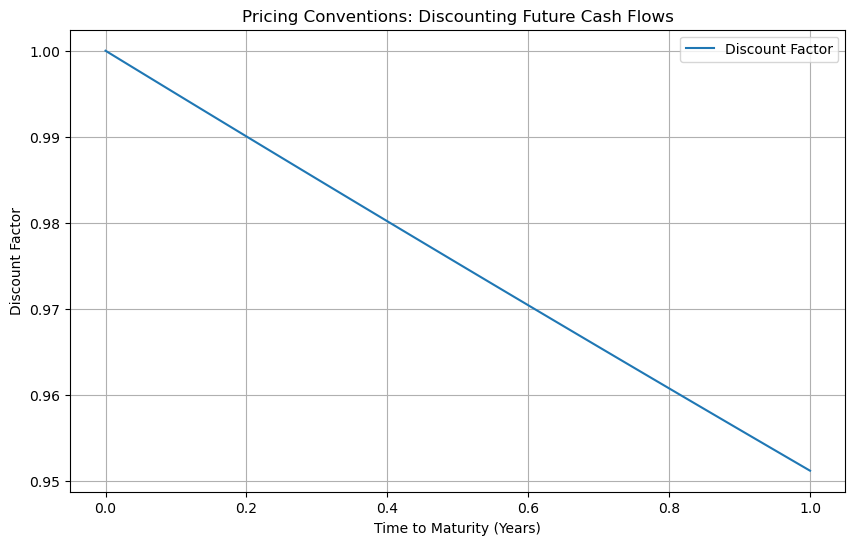

In [276]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for pricing conventions illustration
time_to_maturity = np.linspace(0, 1, 100)  # Time to maturity from 0 to 1 year
interest_rate = 0.05  # Constant interest rate
discount_factor = np.exp(-interest_rate * time_to_maturity)

# Visualize the pricing conventions
plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, discount_factor, label='Discount Factor')

plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Discount Factor')
plt.title('Pricing Conventions: Discounting Future Cash Flows')
plt.legend()
plt.grid(True)
plt.show()


### Discounting

**Discounting in Finance**

**1. Definition:**
   - **Discounting:** Discounting is a financial concept that involves adjusting the value of future cash flows to reflect their present value. It accounts for the time value of money, recognizing that a certain amount of money today is considered more valuable than the same amount in the future.

**2. Key Concepts:**

   a. **Time Value of Money:**
      - The underlying principle of discounting is rooted in the time value of money, which posits that the purchasing power of money changes over time due to factors such as inflation and the opportunity cost of capital.

   b. **Present Value:**
      - Discounting is used to calculate the present value of future cash flows. This process involves reducing the value of future payments to their equivalent value in today's dollars.

**3. Formula for Discounting:**

   a. **Present Value (PV):**
      - The present value (PV) of a future cash flow can be calculated using the formula:
      \[ PV = \frac{FV}{(1 + r)^t} \]
      where \(FV\) is the future value, \(r\) is the discount rate, and \(t\) is the time to the future cash flow.

   b. **Discount Rate:**
      - The discount rate used in the formula represents the required rate of return or the cost of capital. It reflects the opportunity cost of using funds elsewhere.

**4. Discounting Future Cash Flows:**

   a. **Bond Valuation:**
      - In the context of bond valuation, discounting is used to determine the present value of future coupon payments and the bond's face value at maturity.

   b. **Investment Appraisal:**
      - When evaluating investment projects, cash flows expected in the future are discounted to assess their net present value (NPV).

   c. **Dividend Discount Model (DDM):**
      - In equity valuation, discounting is applied in the Dividend Discount Model to estimate the present value of future dividend payments.

**5. Time Preference and Risk:**

   a. **Time Preference:**
      - Discounting reflects the time preference of individuals and investors, who generally prefer to receive money sooner rather than later.

   b. **Risk Adjustment:**
      - The discount rate may be adjusted to account for the risk associated with future cash flows. Higher risks typically lead to higher discount rates.

**6. Implications of Discounting:**

   a. **Capital Budgeting:**
      - Discounting is crucial in capital budgeting decisions, helping determine the profitability and viability of long-term investments.

   b. **Valuation Accuracy:**
      - Discounting enhances the accuracy of asset valuation by reflecting the economic reality that money has different values at different points in time.

   c. **Investment Decision-Making:**
      - Investors use discounting to compare investment opportunities and make decisions based on the present value of expected returns.

**7. Challenges and Considerations:**

   a. **Interest Rate Variability:**
      - Changes in interest rates can impact the discount rate, influencing the present value of future cash flows.

   b. **Assumptions and Predictions:**
      - Discounting involves making assumptions about future cash flows and the discount rate. Variability in these factors can affect valuation outcomes.

**8. Use Cases:**

   a. **Corporate Finance:**
      - Discounting is extensively used in corporate finance for valuation, investment appraisal, and financial decision-making.

   b. **Investment Analysis:**
      - Investment analysts use discounting to assess the attractiveness of various investment opportunities by comparing present values.

**9. Integration with Risk Management:**

   a. **Risk-Adjusted Discount Rates:**
      - In risk management, discount rates may be adjusted to account for the specific risks associated with a project or investment.

Discounting is a fundamental concept in finance, enabling individuals and organizations to make informed decisions about the value of future cash flows. Whether evaluating investment projects, valuing financial instruments, or assessing the profitability of business ventures, discounting provides a systematic approach to considering the time value of money.

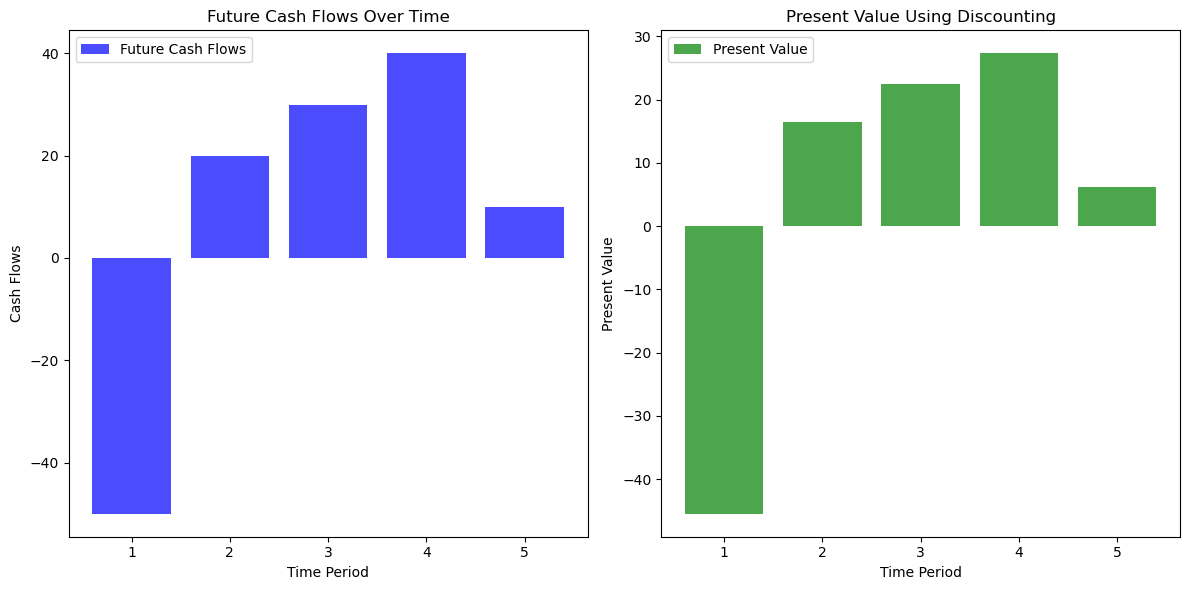

In [277]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for discounting illustration
cash_flows = np.array([-50, 20, 30, 40, 10])  # Example future cash flows
time_periods = np.arange(1, len(cash_flows) + 1)  # Time periods

# Calculate present value using discounting
interest_rate = 0.1  # Constant interest rate
present_value = cash_flows / (1 + interest_rate) ** time_periods

# Visualize the discounting process
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(time_periods, cash_flows, color='blue', alpha=0.7, label='Future Cash Flows')
plt.xlabel('Time Period')
plt.ylabel('Cash Flows')
plt.title('Future Cash Flows Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(time_periods, present_value, color='green', alpha=0.7, label='Present Value')
plt.xlabel('Time Period')
plt.ylabel('Present Value')
plt.title('Present Value Using Discounting')
plt.legend()

plt.tight_layout()
plt.show()


### Arbitrage

**Arbitrage in Finance**

**1. Definition:**
   - **Arbitrage:** Arbitrage is a trading strategy that takes advantage of price differences for the same asset in different markets or the same market at different times. The goal of arbitrage is to make a risk-free profit by exploiting price inefficiencies.

**2. Key Concepts:**

   a. **Price Discrepancies:**
      - Arbitrage relies on identifying and capitalizing on price discrepancies for the same asset. These discrepancies can arise due to market imperfections, delays in information dissemination, or other factors.

   b. **Risk-Free Profit:**
      - The essence of arbitrage is to execute transactions in a way that ensures a risk-free profit. Traders buy low in one market and sell high in another to exploit the pricing differential.

**3. Types of Arbitrage:**

   a. **Spatial Arbitrage:**
      - Involves exploiting price differences for the same asset in different geographic locations or markets.

   b. **Temporal Arbitrage:**
      - Capitalizes on price differences for the same asset at different points in time. This could involve exploiting delays in information flow or market reactions.

   c. **Statistical Arbitrage:**
      - Utilizes quantitative models and statistical analysis to identify mispriced assets and profit from their expected price corrections.

**4. Example of Spatial Arbitrage:**

   a. **International Arbitrage:**
      - Traders may buy an asset in a market where it is undervalued and simultaneously sell it in another market where the price is higher, exploiting differences in currency values, transaction costs, or market conditions.

**5. Example of Temporal Arbitrage:**

   a. **Dividend Arbitrage:**
      - Involves buying a stock just before its ex-dividend date to capture the dividend payment and then selling the stock after the ex-dividend date. This exploits the temporary drop in stock price due to the dividend payout.

**6. Implications of Arbitrage:**

   a. **Market Efficiency:**
      - The existence of arbitrage opportunities challenges the efficient market hypothesis, which posits that prices should reflect all available information.

   b. **Price Discovery:**
      - Arbitrage activities contribute to the process of price discovery by aligning prices across different markets or over time.

   c. **Liquidity and Efficiency:**
      - Arbitrage contributes to market liquidity and efficiency by narrowing price differentials and reducing opportunities for risk-free profits.

**7. Challenges and Considerations:**

   a. **Transaction Costs:**
      - Transaction costs, such as brokerage fees and taxes, can erode potential profits in arbitrage trades.

   b. **Execution Risks:**
      - Delays or errors in execution can pose risks to arbitrage strategies, especially in fast-moving markets.

**8. Use Cases:**

   a. **Currency Arbitrage:**
      - Traders exploit differences in currency values across international markets, buying low in one currency and selling high in another.

   b. **Merger Arbitrage:**
      - Involves capitalizing on price discrepancies between a target company's stock price and the offer price during a merger or acquisition.

**9. Integration with Risk Management:**

   a. **Hedging Strategies:**
      - Arbitrage can be integrated with risk management by serving as a form of hedging. Traders may use arbitrage to offset risks in other parts of their portfolios.

Arbitrage plays a crucial role in promoting market efficiency and liquidity by aligning prices across different markets. While it offers the potential for risk-free profits, traders must navigate challenges such as transaction costs and execution risks. Overall, arbitrage contributes to the continuous process of price discovery in financial markets.

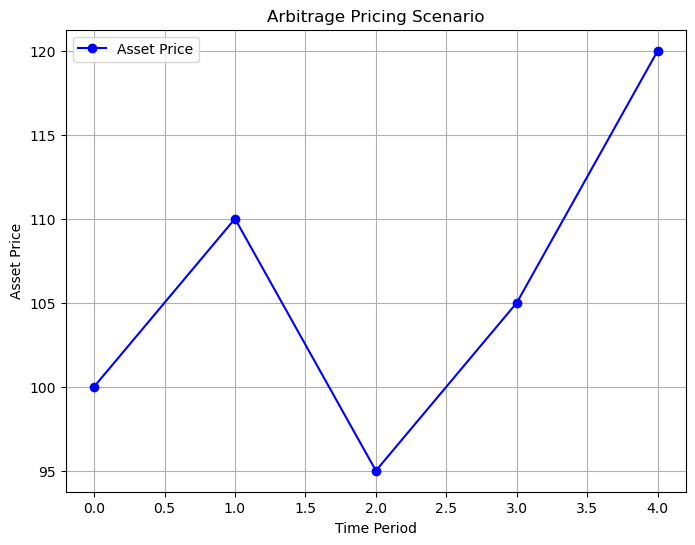

In [278]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for arbitrage pricing illustration
asset_price = np.array([100, 110, 95, 105, 120])  # Asset prices over time

# Calculate potential arbitrage profit
buy_sell_signals = np.array([1, -1, 1, -1, 1])  # Buy (+1) or sell (-1) signals
arbitrage_profit = np.sum(buy_sell_signals * asset_price)

# Visualize the arbitrage pricing scenario
plt.figure(figsize=(8, 6))
plt.plot(asset_price, marker='o', linestyle='-', color='blue', label='Asset Price')
plt.xlabel('Time Period')
plt.ylabel('Asset Price')
plt.title('Arbitrage Pricing Scenario')
plt.legend()
plt.grid(True)
plt.show()

### Present Value

**Present Value (PV) in Finance**

**1. Definition:**
   - **Present Value (PV):** Present value is a financial concept that represents the current worth of a future sum of money or a series of cash flows, discounted at a specified rate of return. It reflects the idea that a dollar received or paid in the future is worth less than a dollar received or paid today.

**2. Key Concepts:**

   a. **Time Value of Money:**
      - The underlying principle of present value is grounded in the time value of money, acknowledging that the value of money changes over time due to factors such as inflation and the opportunity cost of capital.

   b. **Discounting:**
      - Present value involves discounting future cash flows to their equivalent value in today's dollars. Discounting reflects the cost of capital or the expected rate of return.

**3. Formula for Present Value:**

   a. **Single Cash Flow:**
      - The present value (PV) of a single future cash flow is calculated using the formula:
      \[ PV = \frac{FV}{(1 + r)^t} \]
      where \(FV\) is the future value, \(r\) is the discount rate, and \(t\) is the time to the future cash flow.

   b. **Multiple Cash Flows:**
      - For a series of cash flows, the present value is calculated as:
      \[ PV = \sum_{t=1}^{n} \frac{CF_t}{(1 + r)^t} \]
      where \(CF_t\) represents the cash flow at time \(t\), and \(n\) is the total number of cash flows.

**4. Time Preference and Risk:**

   a. **Time Preference:**
      - Present value aligns with individuals' time preference, reflecting the preference for immediate utility over delayed gratification.

   b. **Risk Adjustment:**
      - The discount rate used in present value calculations may be adjusted to account for the specific risks associated with future cash flows. Higher risks generally lead to higher discount rates.

**5. Implications of Present Value:**

   a. **Investment Decision-Making:**
      - Present value is crucial in investment decision-making, helping assess the profitability and viability of projects by comparing the present value of costs and benefits.

   b. **Valuation:**
      - Present value is used in the valuation of financial instruments, including bonds, equities, and other investment assets. It reflects the current worth of expected future cash flows.

   c. **Loan and Mortgage Pricing:**
      - Lenders use present value principles to price loans and mortgages, considering the present value of future interest and principal repayments.

**6. Challenges and Considerations:**

   a. **Discount Rate Selection:**
      - Selecting an appropriate discount rate is crucial, and it may vary based on factors such as the risk profile of the cash flows and prevailing market conditions.

   b. **Changing Circumstances:**
      - Present value calculations are sensitive to changes in discount rates and cash flow projections, requiring periodic reassessment.

**7. Use Cases:**

   a. **Capital Budgeting:**
      - Present value is extensively used in capital budgeting to evaluate the profitability of long-term investments by comparing the present value of cash inflows and outflows.

   b. **Financial Planning:**
      - Individuals use present value principles in financial planning to assess the current value of future savings, investments, and retirement income.

**8. Integration with Risk Management:**

   a. **Discount Rate Adjustments:**
      - In risk management, present value calculations may involve adjusting the discount rate to account for specific risks associated with the future cash flows.

Present value is a fundamental concept in finance, providing a systematic approach to evaluating the current worth of future cash flows. Whether assessing investment opportunities, pricing financial instruments, or making financial decisions, present value considerations contribute to sound financial analysis.

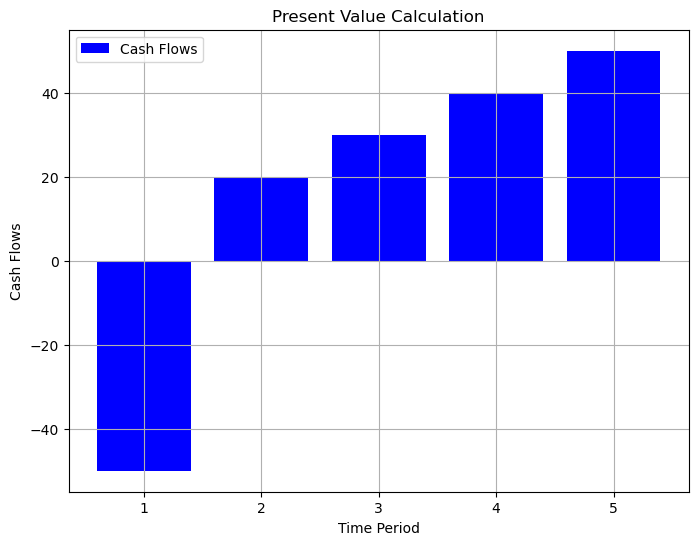

In [279]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Generate example data for present value illustration
cash_flows = np.array([-50, 20, 30, 40, 50])  # Future cash flows
discount_rate = 0.1  # Discount rate

# Calculate present value of cash flows
time_periods = np.arange(1, len(cash_flows) + 1)
present_value = np.sum(cash_flows / (1 + discount_rate) ** time_periods)

# Visualize the present value scenario
plt.figure(figsize=(8, 6))
plt.bar(time_periods, cash_flows, color='blue', label='Cash Flows')
plt.xlabel('Time Period')
plt.ylabel('Cash Flows')
plt.title('Present Value Calculation')
plt.legend()
plt.grid(True)
plt.show()


### Net Present Value

**Net Present Value (NPV) in Finance**

**1. Definition:**
   - **Net Present Value (NPV):** Net Present Value is a financial metric used to evaluate the profitability of an investment by calculating the present value of its expected cash inflows and outflows. It represents the difference between the present value of benefits and the present value of costs over time.

**2. Key Concepts:**

   a. **Time Value of Money:**
      - NPV accounts for the time value of money, recognizing that cash flows occurring in different time periods have different present values.

   b. **Discounting:**
      - The future cash flows are discounted back to their present value using a specified discount rate, which represents the opportunity cost of capital or the required rate of return.

**3. Formula for Net Present Value:**

   a. **NPV Formula:**
      \[ NPV = \sum_{t=0}^{n} \frac{CF_t}{(1 + r)^t} - C_0 \]
      where \(CF_t\) represents the net cash flow at time \(t\), \(r\) is the discount rate, \(t\) is the time period, \(n\) is the total number of periods, and \(C_0\) is the initial investment or cash outflow at time \(t=0\).

**4. Decision Rule:**

   a. **NPV Decision Rule:**
      - If the NPV is positive, the investment is considered financially attractive, as it indicates that the project's expected returns exceed the cost of capital. Conversely, a negative NPV suggests the project may not be viable.

**5. Implications of Net Present Value:**

   a. **Investment Evaluation:**
      - NPV is widely used in investment appraisal to assess the financial viability of projects and determine whether they are expected to generate positive returns.

   b. **Capital Budgeting:**
      - In capital budgeting decisions, projects with positive NPVs are generally considered, as they contribute to shareholder wealth maximization.

   c. **Comparative Analysis:**
      - NPV allows for the comparison of different investment opportunities by quantifying their expected contribution to shareholder value.

**6. Challenges and Considerations:**

   a. **Discount Rate Sensitivity:**
      - The NPV is sensitive to changes in the discount rate, and variations in this rate can impact the assessment of project profitability.

   b. **Cash Flow Projections:**
      - The accuracy of NPV calculations relies on realistic and reliable cash flow projections. Inaccuracies in projections can affect the validity of the NPV analysis.

**7. Use Cases:**

   a. **Business Investments:**
      - Companies use NPV to evaluate the financial attractiveness of various business investments, such as new product launches, expansions, or acquisitions.

   b. **Real Estate:**
      - NPV is applied in real estate to assess the profitability of property investments, considering rental income, maintenance costs, and potential appreciation.

**8. Integration with Risk Management:**

   a. **Risk-Adjusted NPV:**
      - In risk management, NPV calculations may involve adjusting the discount rate or incorporating risk factors to derive a risk-adjusted NPV, providing a more comprehensive view of potential outcomes.

Net Present Value is a fundamental tool in financial decision-making, helping businesses and investors assess the desirability of investments based on their expected cash flows. By considering the time value of money, NPV provides a quantitative measure of the value creation potential of a project or investment.

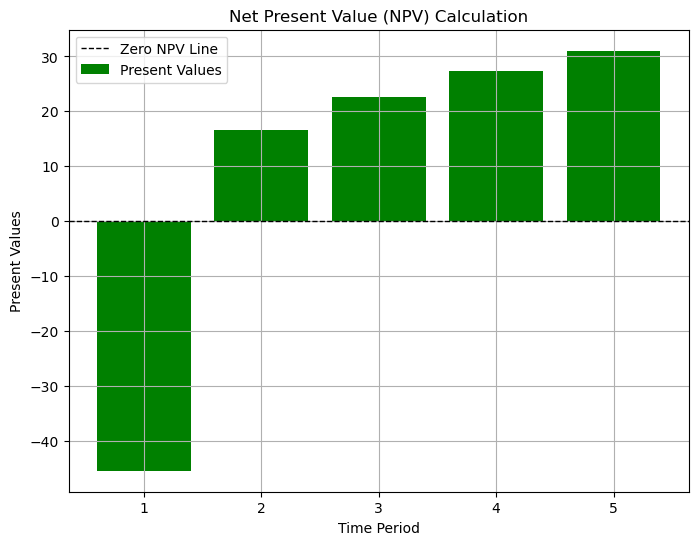

In [280]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Net Present Value (NPV)
def calculate_npv(cash_flows, discount_rate):
    time_periods = np.arange(1, len(cash_flows) + 1)
    present_values = cash_flows / (1 + discount_rate) ** time_periods
    npv = np.sum(present_values)
    return npv, present_values

# Generate example data for NPV illustration
cash_flows = np.array([-50, 20, 30, 40, 50])  # Future cash flows
discount_rate = 0.1  # Discount rate

# Calculate NPV and present values
npv, present_values = calculate_npv(cash_flows, discount_rate)

# Visualize the NPV scenario
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, len(cash_flows) + 1), present_values, color='green', label='Present Values')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero NPV Line')
plt.xlabel('Time Period')
plt.ylabel('Present Values')
plt.title('Net Present Value (NPV) Calculation')
plt.legend()
plt.grid(True)
plt.show()

### Forward Contracts

**Forward Contracts in Finance**

**1. Definition:**
   - **Forward Contracts:** A forward contract is a financial agreement between two parties to buy or sell an asset at a predetermined future date (the delivery or settlement date) for a price agreed upon today. The price specified in the contract is called the forward price.

**2. Key Concepts:**

   a. **Customization:**
      - Forward contracts are customizable agreements, allowing parties to tailor the terms, including the asset to be traded, the quantity, the delivery date, and the forward price.

   b. **Over-the-Counter (OTC):**
      - Forward contracts are typically traded over-the-counter (OTC), meaning they are privately negotiated between two parties rather than on a centralized exchange.

**3. Features of Forward Contracts:**

   a. **No Initial Exchange of Funds:**
      - Unlike futures contracts, there is no initial exchange of funds when entering into a forward contract. Payment and delivery occur at the agreed-upon future date.

   b. **Private Agreement:**
      - Forward contracts are private and customizable, allowing businesses and investors to tailor terms to their specific needs.

**4. Settlement of Forward Contracts:**

   a. **Physical Delivery:**
      - In some cases, the asset itself is physically delivered at the settlement date, especially in commodities markets.

   b. **Cash Settlement:**
      - Alternatively, settlement can be in cash, where the difference between the forward price and the market price at the time of settlement is paid.

**5. Hedging and Speculation:**

   a. **Hedging:**
      - Businesses often use forward contracts to hedge against price fluctuations in commodities or currencies, securing a known price for future transactions.

   b. **Speculation:**
      - Traders may use forward contracts to speculate on the future direction of asset prices, aiming to profit from favorable movements.

**6. Example:**

   a. **Currency Forward:**
      - A company may enter into a currency forward contract to buy a certain amount of a foreign currency at a fixed exchange rate in the future, protecting against currency fluctuations.

**7. Implications of Forward Contracts:**

   a. **Risk Management:**
      - Forward contracts are valuable tools for risk management, allowing businesses to mitigate the impact of price volatility in various markets.

   b. **Flexibility:**
      - The flexibility of forward contracts enables parties to customize terms according to their specific needs and market conditions.

   c. **Counterparty Risk:**
      - There is a counterparty risk in forward contracts, as both parties are obligated to fulfill the terms of the agreement. Creditworthiness and reliability of the counterparty are crucial considerations.

**8. Challenges and Considerations:**

   a. **Lack of Liquidity:**
      - Forward contracts can lack liquidity compared to standardized exchange-traded instruments, making them less suitable for some market participants.

   b. **Rolling Over:**
      - For longer-term hedging needs, parties may need to roll over or extend their forward contracts, potentially incurring additional costs.

**9. Use Cases:**

   a. **Commodities:**
      - Producers and consumers of commodities use forward contracts to hedge against price fluctuations.

   b. **Foreign Exchange:**
      - Businesses engaged in international trade use currency forward contracts to manage currency risk.

**10. Integration with Risk Management:**

   a. **Risk Mitigation:**
      - Forward contracts are integrated into risk management strategies to mitigate exposure to price volatility in various markets.

Forward contracts play a crucial role in risk management, providing businesses and investors with a tool to manage and mitigate price risk in different asset classes. While they offer flexibility and customization, parties should carefully consider counterparty risk and the specific requirements of their hedging or speculative strategies.

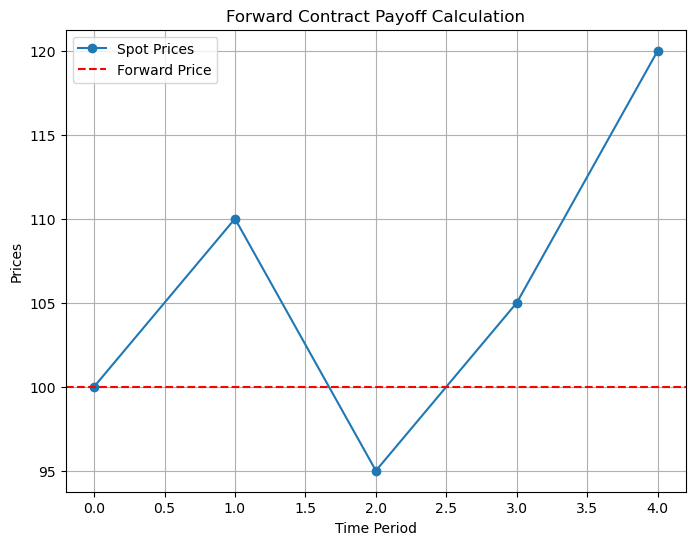

In [281]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate forward contract payoff
def calculate_forward_payoff(spot_price, forward_price):
    return spot_price - forward_price

# Generate example data for forward contract illustration
spot_prices = np.array([100, 110, 95, 105, 120])  # Spot prices over time
forward_price = 100  # Forward contract price

# Calculate forward payoffs
forward_payoffs = calculate_forward_payoff(spot_prices, forward_price)

# Visualize the forward contract scenario
plt.figure(figsize=(8, 6))
plt.plot(spot_prices, label='Spot Prices', marker='o')
plt.axhline(forward_price, color='red', linestyle='--', label='Forward Price')
plt.xlabel('Time Period')
plt.ylabel('Prices')
plt.title('Forward Contract Payoff Calculation')
plt.legend()
plt.grid(True)
plt.show()

### No Arbitrage Principle

**No Arbitrage Principle in Finance**

**1. Definition:**
   - **No Arbitrage Principle:** The No Arbitrage Principle is a fundamental concept in financial economics that asserts that in an efficient and frictionless market, it should not be possible to generate risk-free profits (arbitrage) without taking on any risk.

**2. Key Concepts:**

   a. **Efficient Market Hypothesis (EMH):**
      - The No Arbitrage Principle is closely related to the Efficient Market Hypothesis, which posits that asset prices in efficient markets reflect all available information.

   b. **Arbitrage Opportunities:**
      - An arbitrage opportunity arises when an investor can simultaneously buy and sell assets or engage in other financial transactions to lock in a risk-free profit.

**3. Implications of the No Arbitrage Principle:**

   a. **Market Efficiency:**
      - The principle suggests that if an arbitrage opportunity exists, it would quickly be exploited by rational market participants, leading to adjustments in prices and the elimination of the opportunity.

   b. **Price Consistency:**
      - In a market adhering to the No Arbitrage Principle, prices of similar assets or financial instruments should be consistent, preventing opportunities for risk-free profits.

**4. Types of Arbitrage:**

   a. **Spatial Arbitrage:**
      - Exploiting price differences for the same asset in different geographic locations or markets.

   b. **Temporal Arbitrage:**
      - Capitalizing on price differences for the same asset at different points in time.

   c. **Statistical Arbitrage:**
      - Utilizing quantitative models and statistical analysis to identify mispriced assets and profit from expected price corrections.

**5. Arbitrage and Market Efficiency:**

   a. **Information Efficiency:**
      - The No Arbitrage Principle is closely linked to the concept of information efficiency, where prices rapidly incorporate new information, leaving little room for risk-free profits.

   b. **Market Participants' Rationality:**
      - The principle assumes that market participants are rational and will exploit any pricing discrepancies to maximize their returns.

**6. Use Cases:**

   a. **Options Pricing:**
      - The principle is applied in options pricing models, such as the Black-Scholes model, to ensure that the price of options is consistent with the prices of the underlying assets.

   b. **Foreign Exchange Markets:**
      - In foreign exchange markets, the No Arbitrage Principle helps maintain consistency in exchange rates across different markets.

**7. Challenges and Considerations:**

   a. **Frictions and Constraints:**
      - Real-world markets may have frictions, transaction costs, and other constraints that can limit the immediate elimination of arbitrage opportunities.

   b. **Market Microstructure:**
      - The microstructure of financial markets, including factors like bid-ask spreads and trading volumes, can influence the speed at which arbitrage opportunities are exploited.

**8. Integration with Financial Models:**

   a. **Asset Pricing Models:**
      - The No Arbitrage Principle is integrated into various asset pricing models to ensure their consistency with observed market prices.

   b. **Derivative Pricing:**
      - In derivative pricing, the principle is used to derive relationships between the prices of derivatives and their underlying assets.

The No Arbitrage Principle is a cornerstone in financial theory, emphasizing the role of rational market participants and the efficiency of markets in eliminating opportunities for risk-free profits. It serves as a guiding principle in the development of financial models and the understanding of market dynamics.

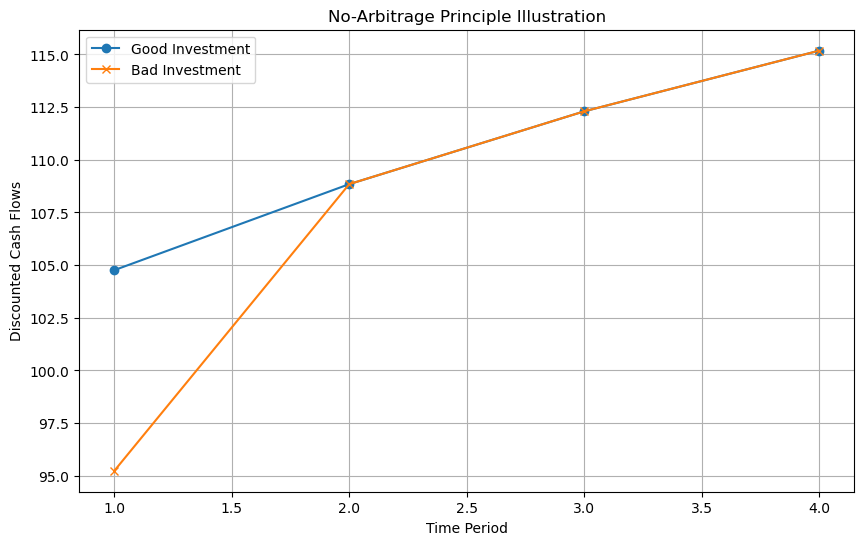

In [282]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate discounted future cash flows
def calculate_discounted_cash_flows(cash_flows, discount_rate):
    return cash_flows / (1 + discount_rate) ** np.arange(1, len(cash_flows) + 1)

# Generate example data for no-arbitrage principle illustration
future_cash_flows_good = np.array([110, 120, 130, 140])  # Good investment cash flows
future_cash_flows_bad = np.array([100, 120, 130, 140])  # Bad investment cash flows
discount_rate = 0.05  # Common discount rate

# Calculate discounted cash flows
discounted_cash_flows_good = calculate_discounted_cash_flows(future_cash_flows_good, discount_rate)
discounted_cash_flows_bad = calculate_discounted_cash_flows(future_cash_flows_bad, discount_rate)

# Visualize the no-arbitrage principle scenario
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(future_cash_flows_good) + 1), discounted_cash_flows_good, label='Good Investment', marker='o')
plt.plot(np.arange(1, len(future_cash_flows_bad) + 1), discounted_cash_flows_bad, label='Bad Investment', marker='x')
plt.xlabel('Time Period')
plt.ylabel('Discounted Cash Flows')
plt.title('No-Arbitrage Principle Illustration')
plt.legend()
plt.grid(True)
plt.show()

# Interest Rates

### What are Interest Rates

**Interest Rates in Finance**

**1. Definition:**
   - **Interest Rate:** An interest rate is the cost of borrowing money or the return on investment for lending or saving capital. It is expressed as a percentage and represents the compensation that a lender receives for deferring the use of money or the cost that a borrower incurs for accessing funds.

**2. Key Concepts:**

   a. **Time Value of Money:**
      - Interest rates are closely tied to the time value of money, reflecting the idea that the value of money changes over time. A dollar today is generally considered more valuable than a dollar in the future.

   b. **Risk and Inflation:**
      - Interest rates also incorporate factors such as risk and inflation. Lenders may demand a higher interest rate to compensate for the risk of non-repayment, and inflation erodes the purchasing power of money over time.

**3. Types of Interest Rates:**

   a. **Nominal Interest Rate:**
      - The nominal interest rate is the stated rate of interest on a loan or investment without adjusting for inflation.

   b. **Real Interest Rate:**
      - The real interest rate is the nominal interest rate adjusted for inflation, providing a more accurate measure of the true cost of borrowing or return on investment.

**4. Yield Curves:**

   a. **Yield Curve:**
      - The yield curve is a graphical representation of interest rates for different maturities. It shows the relationship between interest rates and the time to maturity of debt securities.

   b. **Inverted Yield Curve:**
      - An inverted yield curve occurs when short-term interest rates are higher than long-term rates. It is often seen as a potential indicator of an economic recession.

**5. Impact on Valuation and Risk Models:**

   a. **Discounting Cash Flows:**
      - Interest rates play a crucial role in discounting future cash flows in valuation models. Higher interest rates result in lower present values, and vice versa.

   b. **Bonds and Fixed Income Securities:**
      - The value of bonds and fixed income securities is inversely related to changes in interest rates. As interest rates rise, bond prices tend to fall, and vice versa.

   c. **Cost of Capital:**
      - Interest rates contribute to the cost of capital, influencing the required rate of return for investments and affecting decisions in capital budgeting.

**6. Central Bank Influence:**

   a. **Monetary Policy:**
      - Central banks, through monetary policy, influence short-term interest rates to achieve economic objectives, such as price stability and full employment.

   b. **Interest Rate Benchmark:**
      - Short-term interest rates set by central banks often serve as benchmarks for various financial instruments and markets.

**7. Use Cases:**

   a. **Mortgages and Loans:**
      - Interest rates impact the affordability of mortgages and loans, influencing consumer spending and economic activity.

   b. **Investment Decision-Making:**
      - Investors consider prevailing interest rates when making investment decisions, as they affect the expected returns on various asset classes.

**8. Integration with Risk Management:**

   a. **Interest Rate Risk:**
      - Changes in interest rates pose interest rate risk, impacting the value of fixed income securities and the overall risk profile of portfolios.

   b. **Hedging Strategies:**
      - Businesses and investors may use interest rate derivatives to hedge against adverse movements in interest rates, mitigating potential losses.

Interest rates are a pervasive factor in financial markets, influencing a wide range of financial instruments, investment decisions, and economic activities. Understanding the dynamics of interest rates is essential for effective risk management, investment analysis, and financial decision-making.

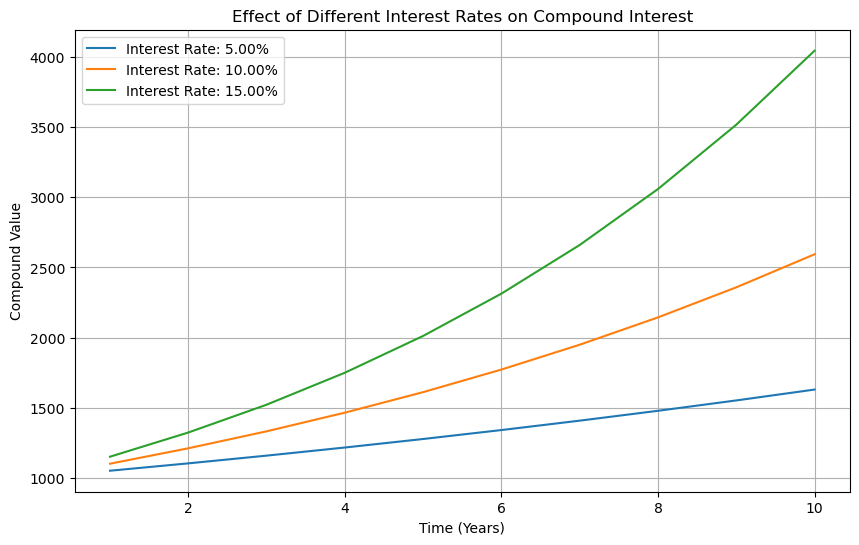

In [283]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate compound interest
def calculate_compound_interest(principal, interest_rate, time_periods):
    return principal * (1 + interest_rate)**time_periods

# Function to plot interest rate scenarios
def plot_interest_rate_scenarios(principal, interest_rates, time_periods):
    plt.figure(figsize=(10, 6))
    for rate in interest_rates:
        compound_values = calculate_compound_interest(principal, rate, time_periods)
        plt.plot(time_periods, compound_values, label=f'Interest Rate: {rate:.2%}')
    plt.xlabel('Time (Years)')
    plt.ylabel('Compound Value')
    plt.title('Effect of Different Interest Rates on Compound Interest')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate example data
principal_amount = 1000  # Initial principal amount
interest_rates = [0.05, 0.1, 0.15]  # Different interest rates
time_periods = np.arange(1, 11)  # Time periods

# Plot interest rate scenarios
plot_interest_rate_scenarios(principal_amount, interest_rates, time_periods)

### Simple Interest

**Simple Interest in Finance**

**1. Definition:**
   - **Simple Interest:** Simple interest is a method of calculating interest on a principal amount over time. It is based only on the initial amount of the investment or loan, known as the principal, and does not take into account any interest that may accumulate on interest in the following periods.

**2. Key Concepts:**

   a. **Principal:**
      - The principal is the initial amount of money invested or borrowed. Simple interest is calculated solely based on this principal.

   b. **Interest Rate:**
      - The interest rate, expressed as a percentage, determines the rate at which interest accrues on the principal.

   c. **Time:**
      - The time represents the duration for which the money is borrowed or invested, usually measured in years.

**3. Formula for Simple Interest:**
   - The formula for calculating simple interest is straightforward:
      \[ \text{Simple Interest (SI)} = P \times R \times T \]
      where:
      - \(P\) is the principal amount,
      - \(R\) is the interest rate per period (expressed as a decimal),
      - \(T\) is the time (in years).

**4. Example:**
   - If you invest $1,000 at a simple interest rate of 5% per year for 3 years, the simple interest would be calculated as follows:
      \[ \text{SI} = 1000 \times 0.05 \times 3 = 150 \]
   - So, the simple interest earned over the 3-year period would be $150.

**5. Characteristics of Simple Interest:**

   a. **Linear Accumulation:**
      - Simple interest accumulates linearly over time, meaning the same amount of interest is earned or paid in each period.

   b. **No Compounding:**
      - Unlike compound interest, simple interest does not consider interest on interest. It only applies to the initial principal throughout the investment or loan period.

**6. Use Cases:**

   a. **Short-Term Loans:**
      - Simple interest is often used for short-term loans or investments where the impact of compounding is minimal.

   b. **Introductory Finance Concepts:**
      - Simple interest is commonly introduced in educational settings as an initial concept in understanding interest calculations.

**7. Implications and Considerations:**

   a. **Limited Complexity:**
      - Simple interest calculations are straightforward and suitable for situations where the impact of compounding is not significant.

   b. **Comparison with Compound Interest:**
      - In certain cases, simple interest may result in lower interest earnings or payments compared to compound interest, where interest is calculated on both the principal and accumulated interest.

**8. Integration with Financial Education:**

   a. **Teaching Tool:**
      - Simple interest serves as a fundamental concept in financial education, providing a simple model for understanding interest calculations.

Simple interest is a basic and transparent method for calculating interest, making it suitable for certain financial scenarios, especially when the impact of compounding is negligible. While it may not capture the full dynamics of interest accrual in more complex financial instruments, it provides a foundational understanding for learners and is applicable in specific financial contexts.

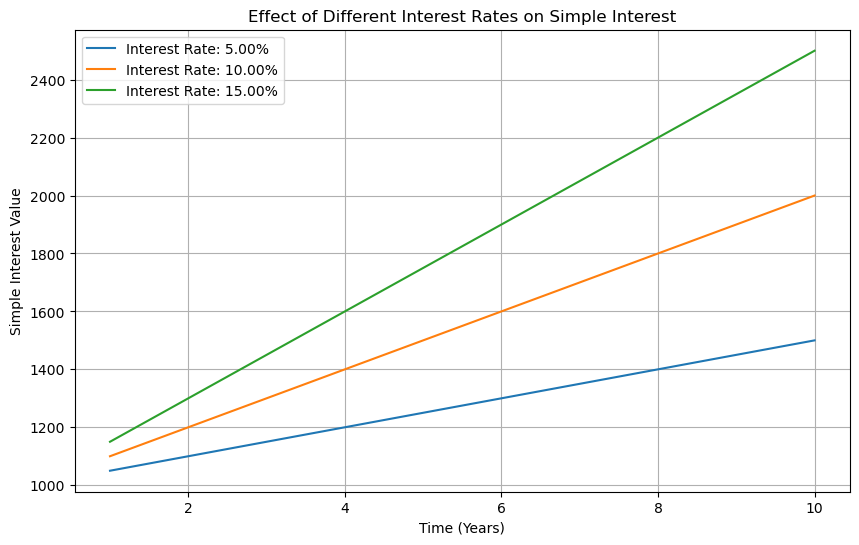

In [284]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate simple interest
def calculate_simple_interest(principal, interest_rate, time_periods):
    return principal * (1 + interest_rate * time_periods)

# Function to plot simple interest scenarios
def plot_simple_interest_scenarios(principal, interest_rates, time_periods):
    plt.figure(figsize=(10, 6))
    for rate in interest_rates:
        simple_values = calculate_simple_interest(principal, rate, time_periods)
        plt.plot(time_periods, simple_values, label=f'Interest Rate: {rate:.2%}')
    plt.xlabel('Time (Years)')
    plt.ylabel('Simple Interest Value')
    plt.title('Effect of Different Interest Rates on Simple Interest')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate example data
principal_amount = 1000  # Initial principal amount
interest_rates = [0.05, 0.1, 0.15]  # Different interest rates
time_periods = np.arange(1, 11)  # Time periods

# Plot simple interest scenarios
plot_simple_interest_scenarios(principal_amount, interest_rates, time_periods)


### Compound Interest

**Compound Interest in Finance**

**1. Definition:**
   - **Compound Interest:** Compound interest is a method of calculating interest where interest is not only earned on the initial principal amount but also on the accumulated interest from previous periods. It involves the compounding of interest, leading to exponential growth in the value of an investment or loan over time.

**2. Key Concepts:**

   a. **Principal:**
      - Similar to simple interest, the principal is the initial amount of money invested or borrowed.

   b. **Interest Rate:**
      - The interest rate, expressed as a percentage, determines the rate at which interest is accrued on both the principal and accumulated interest.

   c. **Compounding Periods:**
      - Compound interest calculations take into account the frequency with which interest is compounded per unit of time, such as annually, semi-annually, quarterly, or monthly.

**3. Formula for Compound Interest:**
   - The formula for calculating compound interest is:
      \[ \text{Compound Interest (CI)} = P \times \left(1 + \frac{r}{n}\right)^{n \times t} - P \]
      where:
      - \(P\) is the principal amount,
      - \(r\) is the annual interest rate (as a decimal),
      - \(n\) is the number of times interest is compounded per year,
      - \(t\) is the time in years.

**4. Example:**
   - If you invest $1,000 at an annual interest rate of 5%, compounded annually for 3 years, the compound interest would be calculated as follows:
      \[ \text{CI} = 1000 \times \left(1 + \frac{0.05}{1}\right)^{1 \times 3} - 1000 = 157.63 \]
   - So, the compound interest earned over the 3-year period would be approximately $157.63.

**5. Characteristics of Compound Interest:**

   a. **Exponential Growth:**
      - Compound interest leads to exponential growth in the value of an investment over time, as interest is earned not only on the principal but also on previously earned interest.

   b. **Frequency of Compounding:**
      - The more frequently interest is compounded, the greater the impact on the overall compound interest earned or paid.

**6. Use Cases:**

   a. **Long-Term Investments:**
      - Compound interest is especially relevant for long-term investments where the compounding effect significantly contributes to the growth of the investment.

   b. **Savings Accounts and Investments:**
      - Many savings accounts, certificates of deposit (CDs), and investment vehicles use compound interest to calculate returns.

**7. Implications and Considerations:**

   a. **Comparative Advantage:**
      - Compound interest often results in higher returns compared to simple interest, especially over longer investment horizons.

   b. **Understanding Compounding:**
      - Compound interest emphasizes the importance of understanding the compounding effect on both savings and debt.

**8. Integration with Financial Planning:**

   a. **Wealth Accumulation:**
      - Compound interest is a key factor in wealth accumulation, and it plays a crucial role in financial planning for long-term goals such as retirement.

Compound interest is a powerful concept in finance that reflects the compounding effect of earning or paying interest on both the initial principal and accumulated interest. It has significant implications for long-term investments and savings, highlighting the importance of time in building wealth or managing debt.

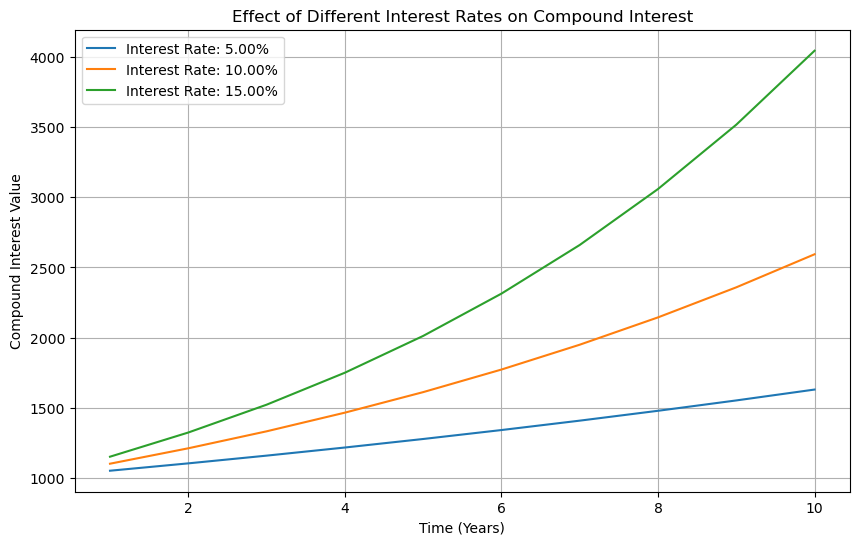

In [285]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate compound interest
def calculate_compound_interest(principal, interest_rate, time_periods):
    return principal * (1 + interest_rate)**time_periods

# Function to plot compound interest scenarios
def plot_compound_interest_scenarios(principal, interest_rates, time_periods):
    plt.figure(figsize=(10, 6))
    for rate in interest_rates:
        compound_values = calculate_compound_interest(principal, rate, time_periods)
        plt.plot(time_periods, compound_values, label=f'Interest Rate: {rate:.2%}')
    plt.xlabel('Time (Years)')
    plt.ylabel('Compound Interest Value')
    plt.title('Effect of Different Interest Rates on Compound Interest')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate example data
principal_amount = 1000  # Initial principal amount
interest_rates = [0.05, 0.1, 0.15]  # Different interest rates
time_periods = np.arange(1, 11)  # Time periods

# Plot compound interest scenarios
plot_compound_interest_scenarios(principal_amount, interest_rates, time_periods)

### Nominal Interest Rate

**Nominal Interest Rate**

**1. Definition:**
   - **Nominal Interest Rate:** The nominal interest rate is the stated rate of interest on an investment or loan, expressed as a percentage of the principal amount. It does not account for the effects of inflation or compounding.

**2. Key Concepts:**

   a. **Stated Rate:**
      - The nominal interest rate is the rate that is explicitly mentioned or advertised by financial institutions or in investment agreements.

   b. **Does Not Consider Inflation:**
      - Unlike the real interest rate, the nominal interest rate does not factor in the impact of inflation on the purchasing power of money.

**3. Formula for Nominal Interest Rate:**
   - The nominal interest rate is simply expressed as a percentage of the principal amount. It is not adjusted for inflation or compounding.

**4. Example:**
   - If you have a savings account with a nominal interest rate of 4% per year, this means that the account will earn interest at a rate of 4% on the principal amount, without considering factors like inflation.

**5. Characteristics of Nominal Interest Rate:**

   a. **Transparency:**
      - Nominal interest rates are transparent and easy to understand, making them suitable for communication and marketing purposes.

   b. **Used in Contracts:**
      - Nominal interest rates are often used in contracts and financial agreements to specify the rate at which interest will be earned or paid.

**6. Use Cases:**

   a. **Loan Agreements:**
      - Nominal interest rates are commonly used in loan agreements to indicate the cost of borrowing.

   b. **Savings and Investment Products:**
      - Nominal interest rates are used to advertise the returns on savings accounts, certificates of deposit (CDs), and other investment products.

**7. Implications and Considerations:**

   a. **Comparison with Real Interest Rate:**
      - To assess the true cost of borrowing or the actual return on an investment, it's essential to consider the real interest rate, which adjusts for inflation.

   b. **Potential Misleading Indicator:**
      - The nominal interest rate alone may be a misleading indicator of the true economic value of an investment or loan since it doesn't account for changes in purchasing power.

**8. Integration with Financial Analysis:**

   a. **Communication Tool:**
      - Nominal interest rates serve as a clear communication tool for financial institutions to convey the terms of loans or the returns on investment products to consumers.

   b. **Comparative Analysis:**
      - Investors and borrowers may compare nominal interest rates across different financial products to make informed decisions.

The nominal interest rate is a fundamental concept in finance, providing a clear indication of the stated rate of interest in various financial products. However, for a comprehensive assessment of the economic impact, it's essential to consider the real interest rate, which adjusts for inflation and provides a more accurate measure of the true cost or return.

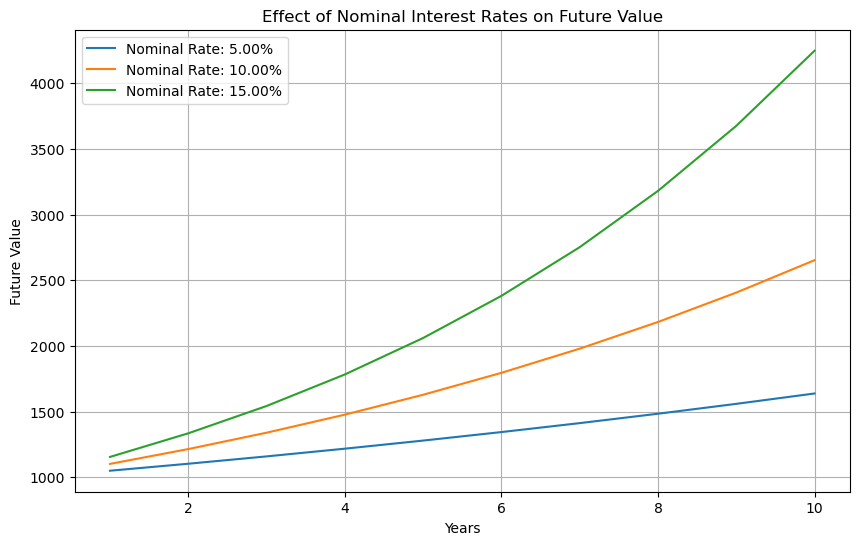

In [286]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate future value with nominal interest rates
def calculate_future_value(principal, nominal_rate, compounding_periods, years):
    return principal * (1 + nominal_rate / compounding_periods)**(compounding_periods * years)

# Function to plot future value scenarios with nominal interest rates
def plot_future_value_scenarios(principal, nominal_rates, compounding_periods, years):
    plt.figure(figsize=(10, 6))
    for rate in nominal_rates:
        future_values = calculate_future_value(principal, rate, compounding_periods, years)
        plt.plot(years, future_values, label=f'Nominal Rate: {rate:.2%}')
    plt.xlabel('Years')
    plt.ylabel('Future Value')
    plt.title('Effect of Nominal Interest Rates on Future Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate example data
principal_amount = 1000  # Initial principal amount
nominal_interest_rates = [0.05, 0.1, 0.15]  # Different nominal interest rates
compounding_periods = 2  # Compounding periods per year
investment_years = np.arange(1, 11)  # Investment time in years

# Plot future value scenarios with nominal interest rates
plot_future_value_scenarios(principal_amount, nominal_interest_rates, compounding_periods, investment_years)

### Real Interest Rate

**Real Interest Rate**

**1. Definition:**
   - **Real Interest Rate:** The real interest rate is the nominal interest rate adjusted for the effects of inflation. It represents the rate at which the purchasing power of money changes over time.

**2. Key Concepts:**

   a. **Inflation Adjustment:**
      - Unlike the nominal interest rate, the real interest rate takes into account the impact of inflation on the value of money. It provides a more accurate measure of the cost of borrowing or the return on an investment.

   b. **Purchasing Power:**
      - The real interest rate reflects the change in purchasing power over time. A positive real interest rate means that the purchasing power increases, while a negative real interest rate indicates a decrease in purchasing power.

**3. Formula for Real Interest Rate:**
   - The formula for calculating the real interest rate is derived from the Fisher equation:
      \[ \text{Real Interest Rate} = \text{Nominal Interest Rate} - \text{Inflation Rate} \]

**4. Example:**
   - If a savings account offers a nominal interest rate of 5% per year, and the inflation rate is 2%, the real interest rate would be \(5% - 2% = 3%\). This means that the real purchasing power of the money in the savings account is increasing by 3%.

**5. Characteristics of Real Interest Rate:**

   a. **Economic Indicator:**
      - The real interest rate is a crucial economic indicator, providing insights into the true cost of borrowing and the actual returns on investments.

   b. **Risk Assessment:**
      - Investors and lenders use the real interest rate to assess the risk-adjusted return on an investment or loan.

**6. Use Cases:**

   a. **Investment Decision-Making:**
      - Investors consider the real interest rate when making investment decisions to evaluate the potential return adjusted for inflation.

   b. **Loan Terms and Pricing:**
      - Lenders use the real interest rate to determine loan terms and pricing, considering both the nominal interest rate and expected inflation.

**7. Implications and Considerations:**

   a. **Relationship with Inflation:**
      - The real interest rate is inversely related to inflation. As inflation increases, the real interest rate decreases, and vice versa.

   b. **Impact on Borrowers and Savers:**
      - A positive real interest rate benefits savers, as their purchasing power increases. Conversely, borrowers may prefer lower or negative real interest rates, as they reduce the real cost of borrowing.

**8. Integration with Financial Models:**

   a. **Inflation Expectations:**
      - Financial models often incorporate the real interest rate to account for inflation expectations and make more accurate predictions.

   b. **Policy Decisions:**
      - Central banks and policymakers consider the real interest rate when making decisions related to monetary policy and interest rate adjustments.

The real interest rate is a crucial metric in finance, providing a more comprehensive understanding of the actual cost of borrowing or the true return on an investment. It is an essential tool for investors, lenders, and policymakers to make informed decisions in the dynamic economic landscape.

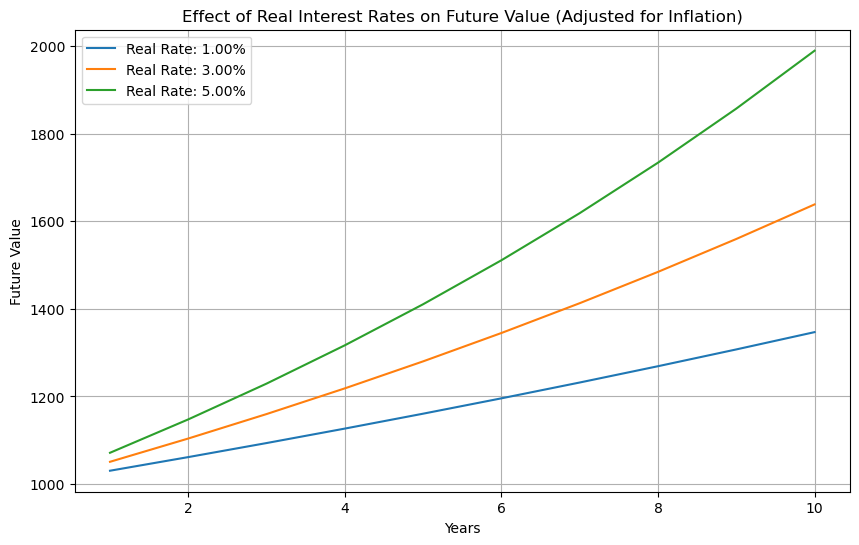

In [287]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate future value with real interest rates
def calculate_future_value(principal, real_rate, compounding_periods, years, inflation_rate):
    nominal_rate = real_rate + inflation_rate
    return principal * (1 + nominal_rate / compounding_periods)**(compounding_periods * years)

# Function to plot future value scenarios with real interest rates
def plot_future_value_scenarios(principal, real_rates, compounding_periods, years, inflation_rate):
    plt.figure(figsize=(10, 6))
    for rate in real_rates:
        future_values = calculate_future_value(principal, rate, compounding_periods, years, inflation_rate)
        plt.plot(years, future_values, label=f'Real Rate: {rate:.2%}')
    plt.xlabel('Years')
    plt.ylabel('Future Value')
    plt.title('Effect of Real Interest Rates on Future Value (Adjusted for Inflation)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate example data
principal_amount = 1000  # Initial principal amount
real_interest_rates = [0.01, 0.03, 0.05]  # Different real interest rates
compounding_periods = 2  # Compounding periods per year
investment_years = np.arange(1, 11)  # Investment time in years
inflation_rate = 0.02  # Annual inflation rate

# Plot future value scenarios with real interest rates
plot_future_value_scenarios(principal_amount, real_interest_rates, compounding_periods, investment_years, inflation_rate)

### Yield to Maturity (YTM)

**Yield to Maturity (YTM)**

**1. Definition:**
   - **Yield to Maturity (YTM):** Yield to maturity is the total return expected on a bond or other fixed-interest security if it is held until its maturity date. It takes into account the bond's current market price, par value, coupon interest rate, and the number of years remaining until maturity.

**2. Key Concepts:**

   a. **Components:**
      - YTM considers the bond's current market price, par value, coupon interest rate, and the time remaining until maturity.

   b. **Discount or Premium:**
      - YTM helps investors assess whether a bond is trading at a discount or premium relative to its face value.

**3. Formula for Yield to Maturity:**
   - The YTM formula involves solving for the discount rate that equates the present value of future cash flows (coupon payments and the face value at maturity) to the current market price of the bond.

**4. Example:**
   - Suppose an investor purchases a bond with a par value of $1,000, a coupon interest rate of 5%, and five years remaining until maturity. If the bond is currently trading at $950, the YTM calculation would involve determining the discount rate that makes the present value of future cash flows equal to $950.

**5. Characteristics of YTM:**

   a. **Expected Return:**
      - YTM represents the expected return if the bond is held until maturity, assuming all coupon and principal payments are received as scheduled.

   b. **Inverse Relationship with Price:**
      - YTM and bond prices have an inverse relationship. As bond prices rise, YTM decreases, and vice versa.

**6. Use Cases:**

   a. **Investment Decision-Making:**
      - Investors use YTM to compare the expected returns of different bonds and make informed investment decisions.

   b. **Valuation:**
      - YTM is used in bond valuation to assess the fair value of a bond based on its future cash flows.

**7. Implications and Considerations:**

   a. **Interest Rate Changes:**
      - YTM is sensitive to changes in interest rates. As interest rates rise, bond prices tend to fall, leading to an increase in YTM.

   b. **Risk Assessment:**
      - YTM is a useful metric for assessing the risk and potential return of a bond investment.

**8. Integration with Financial Models:**

   a. **Portfolio Management:**
      - YTM is incorporated into financial models for portfolio management to optimize bond investment strategies.

   b. **Fixed-Income Securities Analysis:**
      - Analysts use YTM to analyze and compare fixed-income securities, helping to make recommendations for investors.

Yield to maturity is a vital metric for bond investors as it provides insights into the expected return from holding a bond until maturity. It is a comprehensive measure that considers both the coupon payments and potential capital gains or losses from changes in bond prices. Investors use YTM to make informed decisions about their bond portfolios based on their return expectations and risk tolerance.

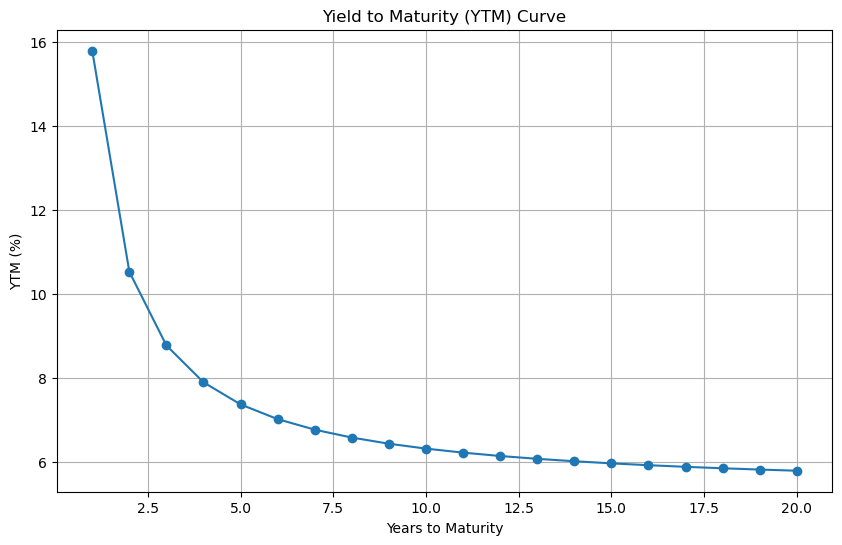

In [288]:
# Define the function to calculate Yield to Maturity (YTM)
def calculate_ytm(face_value, coupon_payment, years_to_maturity, current_price):
    # Formula for YTM calculation
    ytm = (coupon_payment + (face_value - current_price) / years_to_maturity) / ((face_value + current_price) / 2)
    return ytm * 100  # Convert to percentage

# Define the bond parameters
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate (5%)
years_to_maturity = np.arange(1, 21)  # Years to maturity from 1 to 20
current_price = 900  # Current market price of the bond

# Calculate YTM for each year to maturity
ytms = [calculate_ytm(face_value, face_value * coupon_rate, years, current_price) for years in years_to_maturity]

# Plotting the YTM curve
plt.figure(figsize=(10, 6))
plt.plot(years_to_maturity, ytms, marker='o')
plt.title('Yield to Maturity (YTM) Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('YTM (%)')
plt.grid(True)
plt.show()


### Federal Funds Rate

**Federal Funds Rate**

**1. Definition:**
   - **Federal Funds Rate:** The federal funds rate is the interest rate at which banks lend to each other overnight in the federal funds market. It is a crucial benchmark for short-term interest rates and serves as a key tool for the Federal Reserve in implementing monetary policy.

**2. Key Concepts:**

   a. **Overnight Lending:**
      - The federal funds rate reflects the cost of borrowing funds overnight between banks.

   b. **Monetary Policy Tool:**
      - The Federal Reserve uses the federal funds rate to influence the overall level of interest rates in the economy and achieve its monetary policy objectives.

**3. Determination of the Federal Funds Rate:**
   - The federal funds rate is determined by the supply and demand for reserves in the banking system. The Federal Reserve influences this rate through open market operations, adjusting the supply of money in the banking system.

**4. Role in Monetary Policy:**
   - The Federal Reserve adjusts the federal funds rate to achieve its dual mandate of price stability and maximum sustainable employment. When the economy is overheating, the Fed may raise the rate to cool inflationary pressures, and conversely, it may lower the rate to stimulate economic activity during downturns.

**5. Impact on Interest Rates:**
   - Changes in the federal funds rate have a ripple effect on other interest rates in the economy. As the federal funds rate changes, it influences short-term interest rates, such as those on loans and credit cards.

**6. Example:**
   - If the Federal Reserve decides to raise the federal funds rate from 2% to 2.25%, it signals a tightening of monetary policy, making borrowing more expensive and potentially slowing economic activity.

**7. Use Cases:**

   a. **Bank Operations:**
      - Banks use the federal funds rate as a benchmark for setting interest rates on various financial products.

   b. **Market Expectations:**
      - Investors closely monitor the federal funds rate as changes can impact financial markets and investment strategies.

**8. Implications and Considerations:**

   a. **Inflation and Economic Growth:**
      - The federal funds rate is a tool for the Fed to balance inflation and economic growth. Adjustments aim to keep the economy on a stable path.

   b. **Global Impact:**
      - Changes in the federal funds rate can have implications for global financial markets and economies, influencing capital flows and exchange rates.

**9. Integration with Financial Models:**

   a. **Yield Curve:**
      - The federal funds rate is a key factor in shaping the yield curve, which represents the relationship between interest rates and the time to maturity of debt securities.

   b. **Policy Expectations:**
      - Financial models often incorporate expectations about future changes in the federal funds rate to anticipate shifts in monetary policy.

The federal funds rate plays a pivotal role in the U.S. monetary policy framework and has widespread implications for financial markets, interest rates, and economic activity. It serves as a vital tool for the Federal Reserve to achieve its policy objectives and maintain stability in the broader economy.

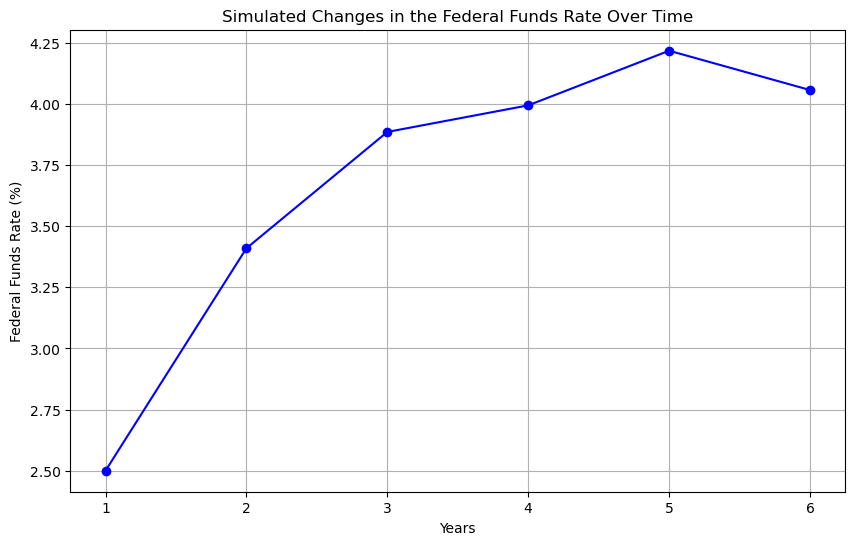

In [289]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate changes in the Federal Funds Rate
def simulate_federal_funds_rate(initial_rate, years, rate_changes):
    rates = [initial_rate]
    for change in rate_changes:
        new_rate = rates[-1] + change
        rates.append(new_rate)
    return np.arange(1, years + 2), rates

# Function to plot changes in the Federal Funds Rate
def plot_federal_funds_rate(initial_rate, years, rate_changes):
    periods, rates = simulate_federal_funds_rate(initial_rate, years, rate_changes)
    plt.figure(figsize=(10, 6))
    plt.plot(periods, rates, marker='o', linestyle='-', color='b')
    plt.xlabel('Years')
    plt.ylabel('Federal Funds Rate (%)')
    plt.title('Simulated Changes in the Federal Funds Rate Over Time')
    plt.grid(True)
    plt.show()

# Generate example data
initial_federal_funds_rate = 2.5  # Initial Federal Funds Rate
simulation_years = 5  # Number of years for the simulation
rate_changes_data = np.random.uniform(-1, 1, simulation_years)  # Simulated rate changes

# Plot changes in the Federal Funds Rate
plot_federal_funds_rate(initial_federal_funds_rate, simulation_years, rate_changes_data)

### Discount Rate

**Discount Rate in Finance:**

**1. Definition:**
   - **Discount Rate (Finance):** In finance, the discount rate refers to the interest rate used to determine the present value of future cash flows. It is a critical component in discounted cash flow (DCF) analysis, where future cash flows are discounted back to their present value.

**2. Key Concepts:**

   a. **Time Value of Money:**
      - The discount rate accounts for the time value of money, reflecting the idea that a certain amount of money today is considered more valuable than the same amount in the future.

   b. **Risk and Return:**
      - The discount rate incorporates factors such as risk and the opportunity cost of capital. Higher-risk investments typically have higher discount rates.

**3. Formula for Present Value:**
   - The present value (PV) of future cash flows is calculated using the formula:
      \[ \text{PV} = \frac{\text{Future Cash Flow}}{(1 + \text{Discount Rate})^t} \]
      where \(t\) is the time to the future cash flow.

**4. Example:**
   - If an investor expects to receive $1,000 in one year and the discount rate is 5%, the present value of that future cash flow would be:
      \[ \text{PV} = \frac{1000}{(1 + 0.05)^1} \approx 952.38 \]

**5. Use Cases:**

   a. **Investment Valuation:**
      - The discount rate is used to assess the value of investments, including stocks, bonds, and projects.

   b. **Capital Budgeting:**
      - Companies use the discount rate to evaluate the feasibility of long-term investments and capital projects.

---

**Discount Rate in Monetary Policy:**

**1. Definition:**
   - **Discount Rate (Monetary Policy):** In the context of central banking and monetary policy, the discount rate is the interest rate at which eligible banks borrow funds directly from the central bank (e.g., the Federal Reserve in the U.S.).

**2. Key Concepts:**

   a. **Lender of Last Resort:**
      - The central bank serves as the lender of last resort, providing funds to banks facing short-term liquidity issues.

   b. **Interest on Borrowings:**
      - The discount rate represents the interest rate at which banks can access funds from the central bank, usually higher than the federal funds rate.

**3. Role in Monetary Policy:**
   - The central bank may adjust the discount rate to influence the overall money supply, credit conditions, and the economy. Changes in the discount rate can signal shifts in monetary policy.

**4. Example:**
   - If the central bank raises the discount rate, it becomes more expensive for banks to borrow funds, potentially reducing overall lending in the economy.

**5. Use Cases:**

   a. **Bank Liquidity Management:**
      - Banks use the discount window to manage short-term liquidity needs, borrowing funds from the central bank when necessary.

   b. **Monetary Policy Transmission:**
      - Changes in the discount rate can influence interest rates throughout the financial system, affecting borrowing and spending by businesses and consumers.

---

These are two distinct interpretations of the discount rate, each with its own applications and implications. In finance, it plays a crucial role in assessing the present value of future cash flows, while in monetary policy, it is a tool used by central banks to influence the banking system and broader economic conditions.

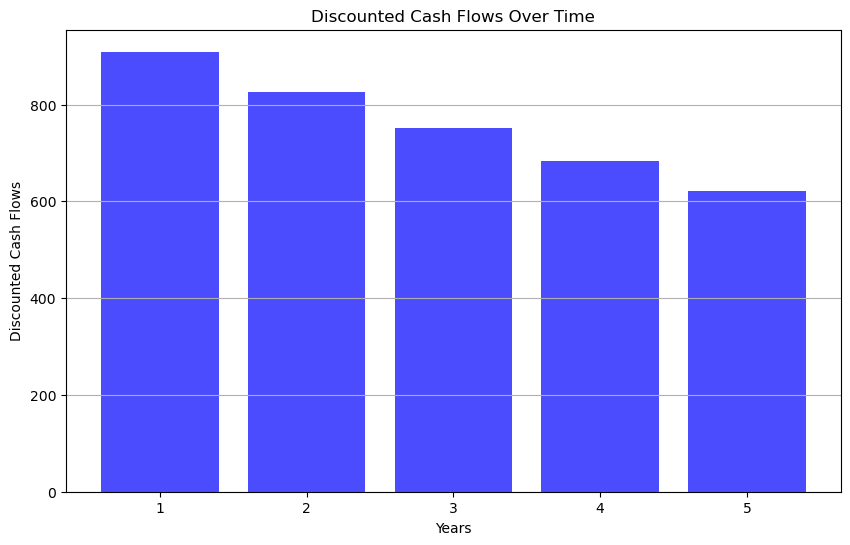

In [290]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate discounted cash flows
def calculate_discounted_cash_flows(initial_cash_flow, discount_rate, years):
    cash_flows = [initial_cash_flow / (1 + discount_rate) ** i for i in range(1, years + 1)]
    return np.arange(1, years + 1), cash_flows

# Function to plot discounted cash flows
def plot_discounted_cash_flows(initial_cash_flow, discount_rate, years):
    periods, cash_flows = calculate_discounted_cash_flows(initial_cash_flow, discount_rate, years)
    plt.figure(figsize=(10, 6))
    plt.bar(periods, cash_flows, color='b', alpha=0.7)
    plt.xlabel('Years')
    plt.ylabel('Discounted Cash Flows')
    plt.title('Discounted Cash Flows Over Time')
    plt.grid(axis='y')
    plt.show()

# Set parameters
initial_cash_flow = 1000  # Initial cash flow
discount_rate = 0.1  # Discount rate
investment_years = 5  # Number of investment years

# Plot discounted cash flows
plot_discounted_cash_flows(initial_cash_flow, discount_rate, investment_years)

### Prime Rate

**Prime Rate**

**1. Definition:**
   - **Prime Rate:** The prime rate is the interest rate that commercial banks charge their most creditworthy customers, typically large corporations and financial institutions. It serves as a reference point for setting interest rates on various loans and credit products.

**2. Key Concepts:**

   a. **Benchmark Rate:**
      - The prime rate is considered a benchmark or reference rate for interest rates in the financial industry.

   b. **Creditworthiness:**
      - Borrowers with the highest creditworthiness, often large and established corporations, are eligible for loans at the prime rate.

**3. Determination of the Prime Rate:**
   - The prime rate is typically influenced by the federal funds rate set by the central bank, as well as prevailing economic conditions. It is usually set slightly above the federal funds rate.

**4. Role in the Financial System:**

   a. **Setting Other Rates:**
      - Many other interest rates, such as those on credit cards, adjustable-rate mortgages, and business loans, are often expressed as a certain percentage above the prime rate.

   b. **Indicator of Economic Conditions:**
      - Changes in the prime rate can reflect shifts in economic conditions and the central bank's monetary policy.

**5. Example:**
   - If the prime rate is 4%, a bank may offer a business loan to a creditworthy borrower at the prime rate plus a certain percentage, such as prime rate + 2%.

**6. Use Cases:**

   a. **Business and Corporate Loans:**
      - The prime rate is commonly used as the baseline for setting interest rates on business and corporate loans.

   b. **Consumer Loans:**
      - Some variable-rate consumer loans, like certain credit cards and home equity lines of credit (HELOCs), are tied to the prime rate.

**7. Implications and Considerations:**

   a. **Economic Indicator:**
      - Changes in the prime rate are closely monitored as an indicator of shifts in the broader economy.

   b. **Interest Rate Spread:**
      - The difference between the prime rate and other interest rates reflects the risk premium associated with different types of borrowers.

**8. Integration with Financial Models:**

   a. **Risk Assessment:**
      - Financial models often consider the prime rate as a reference point for assessing the risk and creditworthiness of borrowers.

   b. **Rate Forecasting:**
      - Analysts use expectations about changes in the prime rate to forecast interest rate trends and make financial projections.

The prime rate is a pivotal interest rate in the financial system, influencing the cost of borrowing for businesses and consumers. Its movements are closely watched by financial institutions, investors, and policymakers as an indicator of economic conditions and as a factor in setting various interest rates across the economy.

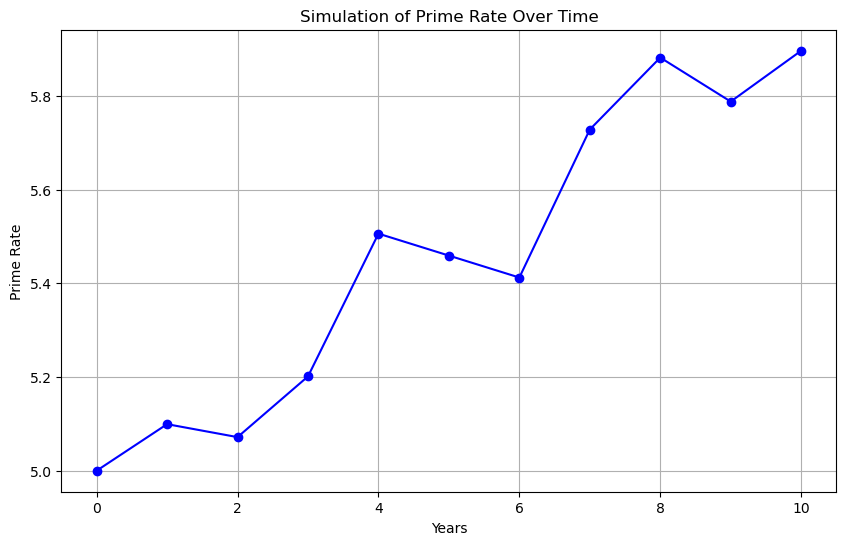

In [291]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate changes in prime rates
def simulate_prime_rates(initial_rate, years, volatility):
    np.random.seed(42)
    prime_rates = [initial_rate]

    for _ in range(1, years + 1):
        rate_change = np.random.normal(0, volatility)
        new_rate = prime_rates[-1] + rate_change
        prime_rates.append(max(0, new_rate))  # Ensure rates don't go below zero

    return np.arange(0, years + 1), prime_rates

# Function to plot prime rate simulation
def plot_prime_rate_simulation(initial_rate, years, volatility):
    periods, rates = simulate_prime_rates(initial_rate, years, volatility)
    plt.figure(figsize=(10, 6))
    plt.plot(periods, rates, marker='o', linestyle='-', color='b')
    plt.xlabel('Years')
    plt.ylabel('Prime Rate')
    plt.title('Simulation of Prime Rate Over Time')
    plt.grid(True)
    plt.show()

# Set parameters
initial_prime_rate = 5.0  # Initial prime rate
simulation_years = 10  # Number of simulation years
rate_volatility = 0.2  # Volatility of rate changes

# Plot prime rate simulation
plot_prime_rate_simulation(initial_prime_rate, simulation_years, rate_volatility)

### Forward Rate

**Forward Rate**

**1. Definition:**
   - **Forward Rate:** The forward rate is the interest rate that is contracted today for a future period. It represents the expected future interest rate for a specific time frame.

**2. Key Concepts:**

   a. **Contractual Agreement:**
      - Parties enter into forward rate agreements or contracts to fix an interest rate for a future date.

   b. **Forward Contracts:**
      - Forward contracts allow entities to hedge against interest rate fluctuations by locking in a rate today for a future loan or investment.

**3. Determination of Forward Rates:**
   - Forward rates are influenced by current market interest rates, expectations about future economic conditions, and the term structure of interest rates.

**4. Role in Financial Markets:**

   a. **Risk Management:**
      - Businesses and investors use forward rates to manage interest rate risk by securing predictable rates for future financial transactions.

   b. **Pricing Forward Contracts:**
      - Forward rates are integral in determining the pricing of forward contracts, which are agreements to buy or sell an asset at a future date for a predetermined price.

**5. Formula for Forward Rate:**
   - The formula for calculating a forward rate is based on the current spot rates and the time to the future period. For example, the forward rate for a one-year period one year from today is given by:
      \[ \text{Forward Rate} = \frac{(1 + \text{Spot Rate}_2)^2}{1 + \text{Spot Rate}_1} - 1 \]
      where \(\text{Spot Rate}_1\) and \(\text{Spot Rate}_2\) are the spot rates for one and two years, respectively.

**6. Example:**
   - If the current one-year spot rate is 3% and the two-year spot rate is 4%, the one-year forward rate one year from today would be:
      \[ \text{Forward Rate} = \frac{(1 + 0.04)^2}{1 + 0.03} - 1 \approx 5.88\% \]

**7. Use Cases:**

   a. **Corporate Finance:**
      - Companies use forward rates to manage interest rate risk in financing activities.

   b. **Investment Planning:**
      - Investors consider forward rates when making decisions about fixed-income investments and strategies.

**8. Implications and Considerations:**

   a. **Expectations about Future Rates:**
      - Forward rates provide insights into market expectations about future interest rates.

   b. **Interest Rate Risk:**
      - Entities use forward rates to mitigate interest rate risk by locking in rates for future financial commitments.

**9. Integration with Financial Models:**

   a. **Valuation Models:**
      - Forward rates are incorporated into valuation models for fixed-income securities and derivative instruments.

   b. **Risk Assessment:**
      - Financial models often consider forward rates when assessing the risk and potential returns associated with interest rate-sensitive assets.

Forward rates are essential in financial markets for managing risk, pricing financial instruments, and gaining insights into market expectations about future interest rates. They provide a mechanism for parties to secure future interest rates, contributing to effective risk management and financial planning.

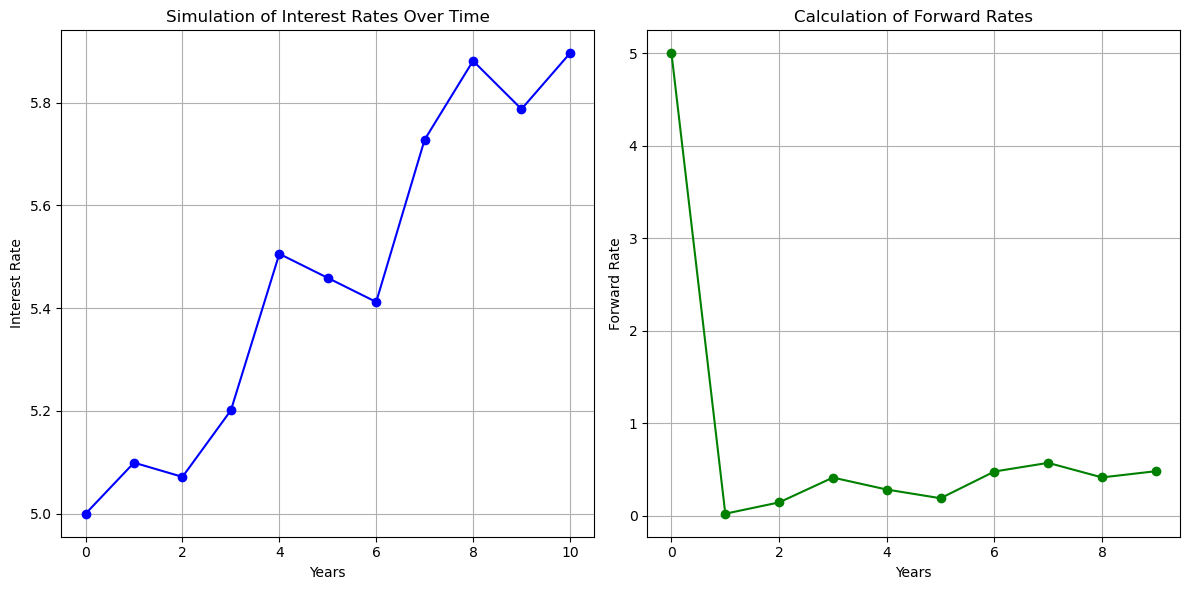

In [292]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate changes in interest rates and calculate forward rates
def simulate_interest_rates(initial_rate, years, volatility):
    np.random.seed(42)
    interest_rates = [initial_rate]

    for _ in range(1, years + 1):
        rate_change = np.random.normal(0, volatility)
        new_rate = interest_rates[-1] + rate_change
        interest_rates.append(max(0, new_rate))  # Ensure rates don't go below zero

    return np.arange(0, years + 1), interest_rates

# Function to calculate forward rates from simulated interest rates
def calculate_forward_rates(interest_rates):
    forward_rates = [interest_rates[0]]

    for i in range(1, len(interest_rates) - 1):
        forward_rate = (interest_rates[i + 1] * (i + 1) - np.sum(interest_rates[:i + 1])) / (i + 1)
        forward_rates.append(forward_rate)

    return forward_rates

# Function to plot interest rate simulation and forward rates
def plot_interest_rate_simulation(initial_rate, years, volatility):
    periods, interest_rates = simulate_interest_rates(initial_rate, years, volatility)
    forward_rates = calculate_forward_rates(interest_rates)

    plt.figure(figsize=(12, 6))

    # Plot interest rate simulation
    plt.subplot(1, 2, 1)
    plt.plot(periods, interest_rates, marker='o', linestyle='-', color='b')
    plt.xlabel('Years')
    plt.ylabel('Interest Rate')
    plt.title('Simulation of Interest Rates Over Time')
    plt.grid(True)

    # Plot forward rates
    plt.subplot(1, 2, 2)
    plt.plot(periods[:-1], forward_rates, marker='o', linestyle='-', color='g')
    plt.xlabel('Years')
    plt.ylabel('Forward Rate')
    plt.title('Calculation of Forward Rates')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Set parameters
initial_interest_rate = 5.0  # Initial interest rate
simulation_years = 10  # Number of simulation years
rate_volatility = 0.2  # Volatility of rate changes

# Plot interest rate simulation and forward rates
plot_interest_rate_simulation(initial_interest_rate, simulation_years, rate_volatility)


# Bond Yields and Return Calculations

### Coupon Payments

**Coupon Payments**

**1. Definition:**
   - **Coupon Payments:** Coupon payments are periodic interest payments made by a bond issuer to bondholders. These payments are typically fixed and are expressed as a percentage of the bond's face value.

**2. Key Concepts:**

   a. **Fixed Percentage:**
      - The coupon payment is a fixed percentage of the bond's face value, determined at the time of issuance.

   b. **Frequency:**
      - Coupon payments are usually made semiannually, although some bonds may have annual or quarterly payments.

**3. Calculation of Coupon Payments:**
   - The formula for calculating the coupon payment is:
      \[ \text{Coupon Payment} = \text{Coupon Rate} \times \text{Face Value} \]
      where the coupon rate is expressed as a percentage.

**4. Role in Bond Yields:**

   a. **Yield Components:**
      - Coupon payments are a crucial component in the calculation of a bond's yield, contributing to both current yield and yield to maturity.

   b. **Income Stream:**
      - For bondholders, coupon payments represent a steady income stream throughout the bond's life.

**5. Example:**
   - If a bond has a face value of $1,000 and a coupon rate of 5%, the annual coupon payment would be \(0.05 \times 1000 = $50\). If the payments are semiannual, each payment would be $25.

**6. Use Cases:**

   a. **Income for Investors:**
      - Coupon payments serve as a source of income for bond investors, particularly those seeking regular cash flows.

   b. **Yield Calculations:**
      - Coupon payments are integral to calculating current yield, which is the annual coupon payment divided by the current market price of the bond.

**7. Implications and Considerations:**

   a. **Interest Rate Impact:**
      - Changes in market interest rates can affect the attractiveness of coupon payments relative to prevailing rates.

   b. **Risk and Return:**
      - Investors assess coupon payments in conjunction with other factors to evaluate the risk and potential return of a bond investment.

**8. Integration with Financial Models:**

   a. **Yield Calculation Models:**
      - Coupon payments are incorporated into models used to calculate various bond yields, helping investors assess the overall return on their investments.

   b. **Valuation Models:**
      - Valuation models for bonds consider the present value of future coupon payments as a key component.

In summary, coupon payments are the periodic interest payments that bondholders receive and play a crucial role in bond valuation and yield calculations. They contribute to the income stream for investors and are a key factor in assessing the overall return and risk of bond investments.

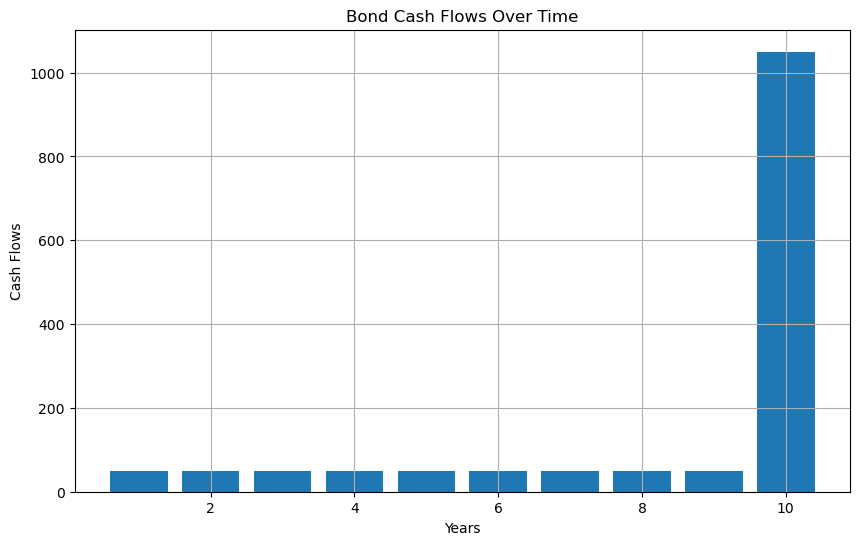

Total Return: 150.00%


In [293]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate bond cash flows
def calculate_cash_flows(face_value, coupon_rate, years_to_maturity):
    # Calculate annual coupon payments
    coupon_payments = face_value * coupon_rate

    # Generate cash flows for each year
    cash_flows = [coupon_payments] * (years_to_maturity - 1)
    cash_flows.append(coupon_payments + face_value)  # Include the face value at maturity

    return cash_flows

# Define bond parameters
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate (5%)
years_to_maturity = 10  # Years to maturity

# Calculate cash flows for the bond
cash_flows = calculate_cash_flows(face_value, coupon_rate, years_to_maturity)

# Plotting the cash flows over time
plt.figure(figsize=(10, 6))
plt.bar(range(1, years_to_maturity + 1), cash_flows)
plt.title('Bond Cash Flows Over Time')
plt.xlabel('Years')
plt.ylabel('Cash Flows')
plt.grid(True)
plt.show()

# Calculate and print total return
total_return = sum(cash_flows) / face_value
print(f'Total Return: {total_return:.2%}')

### Current Yield

**Current Yield**

**1. Definition:**
   - **Current Yield:** Current yield is a measure of a bond's annual interest income relative to its current market price. It is expressed as a percentage and provides a straightforward way to evaluate the income potential of a bond.

**2. Key Concepts:**

   a. **Calculation:**
      - The formula for calculating current yield is:
         \[ \text{Current Yield} = \frac{\text{Annual Coupon Payment}}{\text{Current Market Price}} \times 100\]

   b. **Income Proportion:**
      - Current yield represents the portion of a bond's return derived from coupon payments.

**3. Role in Bond Valuation:**

   a. **Income Assessment:**
      - Current yield is particularly useful for investors seeking regular income from their bond investments.

   b. **Benchmarking:**
      - Investors may use current yield as a benchmark for comparing the income-generating potential of different bonds.

**4. Example:**
   - If a bond has a face value of $1,000, a coupon rate of 4%, and is currently trading at $950, the current yield would be calculated as:
      \[ \text{Current Yield} = \frac{(0.04 \times 1000)}{950} \times 100 \approx 4.21\%\]

**5. Use Cases:**

   a. **Income Planning:**
      - Investors use current yield to estimate the income they can expect from a bond investment.

   b. **Comparative Analysis:**
      - Current yield is employed to compare the income-generating potential of different bonds, especially when market prices vary.

**6. Implications and Considerations:**

   a. **Interest Rate Sensitivity:**
      - Changes in market interest rates can impact the attractiveness of current yield, as they affect bond prices.

   b. **Risk Assessment:**
      - Investors consider current yield alongside other factors to assess the risk and return profile of a bond.

**7. Integration with Financial Models:**

   a. **Income Projection Models:**
      - Current yield is integrated into models projecting future income from bond investments.

   b. **Investment Decision Models:**
      - When making investment decisions, investors may use current yield as one of the factors in their decision-making models.

In summary, current yield is a valuable metric for investors seeking to understand the income potential of a bond relative to its current market price. It provides a quick and accessible measure of a bond's income-generating capacity, helping investors make informed decisions based on their income objectives and risk tolerance.

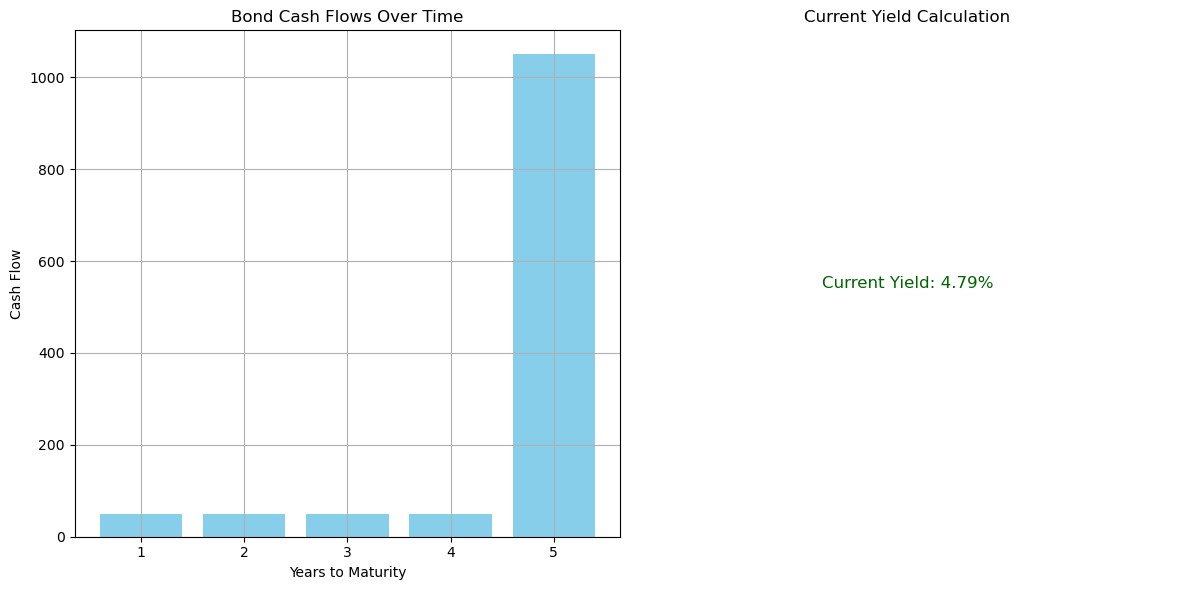

In [294]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate bond cash flows and calculate yields
def simulate_bond_cash_flows(face_value, coupon_rate, years_to_maturity, yield_rate):
    periods = np.arange(1, years_to_maturity + 1)
    coupon_payments = face_value * coupon_rate
    bond_cash_flows = np.full_like(periods, coupon_payments)
    bond_cash_flows[-1] += face_value  # Add face value at maturity

    present_values = bond_cash_flows / (1 + yield_rate) ** periods
    bond_price = np.sum(present_values)

    current_yield = coupon_payments / bond_price

    return periods, bond_cash_flows, bond_price, current_yield

# Function to plot bond cash flows and current yield calculation
def plot_bond_cash_flows(face_value, coupon_rate, years_to_maturity, yield_rate):
    periods, bond_cash_flows, _, current_yield = simulate_bond_cash_flows(
        face_value, coupon_rate, years_to_maturity, yield_rate)

    plt.figure(figsize=(12, 6))

    # Plot bond cash flows
    plt.subplot(1, 2, 1)
    plt.bar(periods, bond_cash_flows, color='skyblue')
    plt.xlabel('Years to Maturity')
    plt.ylabel('Cash Flow')
    plt.title('Bond Cash Flows Over Time')
    plt.grid(True)

    # Plot current yield calculation
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f'Current Yield: {current_yield * 100:.2f}%',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12, color='darkgreen')
    plt.axis('off')
    plt.title('Current Yield Calculation')

    plt.tight_layout()
    plt.show()

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_to_maturity = 0.04  # Assumed yield to maturity

# Plot bond cash flows and current yield calculation
plot_bond_cash_flows(bond_face_value, coupon_rate, maturity_years, yield_to_maturity)

### Yield to Maturity (YTM)

**Yield to Maturity (YTM)**

**1. Definition:**
   - **Yield to Maturity (YTM):** Yield to Maturity is the total return expected on a bond or fixed-interest security if it is held until its maturity date. It considers both the periodic coupon payments and any potential capital gains or losses at maturity.

**2. Key Concepts:**

   a. **Calculation Components:**
      - YTM incorporates the bond's current market price, par value, coupon interest rate, and the number of years remaining until maturity.

   b. **Discount or Premium:**
      - YTM is used to assess whether a bond is trading at a discount or premium relative to its face value.

**3. Formula for Yield to Maturity:**
   - The YTM formula involves solving for the discount rate that equates the present value of future cash flows (coupon payments and the face value at maturity) to the current market price of the bond.

**4. Example:**
   - If an investor purchases a bond with a par value of $1,000, a coupon interest rate of 5%, and five years remaining until maturity, and the bond is currently trading at $950, the YTM calculation would involve determining the discount rate that makes the present value of future cash flows equal to $950.

**5. Characteristics of YTM:**

   a. **Expected Return:**
      - YTM represents the expected return if the bond is held until maturity, assuming all coupon and principal payments are received as scheduled.

   b. **Inverse Relationship with Price:**
      - YTM and bond prices have an inverse relationship. As bond prices rise, YTM decreases, and vice versa.

**6. Use Cases:**

   a. **Investment Decision-Making:**
      - Investors use YTM to compare the expected returns of different bonds and make informed investment decisions.

   b. **Valuation:**
      - YTM is used in bond valuation to assess the fair value of a bond based on its future cash flows.

**7. Implications and Considerations:**

   a. **Interest Rate Changes:**
      - YTM is sensitive to changes in interest rates. As interest rates rise, bond prices tend to fall, leading to an increase in YTM, and vice versa.

   b. **Risk Assessment:**
      - YTM is a useful metric for assessing the risk and potential return of a bond investment.

**8. Integration with Financial Models:**

   a. **Portfolio Management:**
      - YTM is incorporated into financial models for portfolio management to optimize bond investment strategies.

   b. **Fixed-Income Securities Analysis:**
      - Analysts use YTM to analyze and compare fixed-income securities, helping to make recommendations for investors.

Yield to Maturity is a key metric for bond investors, providing a comprehensive measure of the expected return from holding a bond until maturity. It considers both the regular coupon payments and the potential capital gains or losses, making it a valuable tool for assessing the overall performance and risk of bond investments.

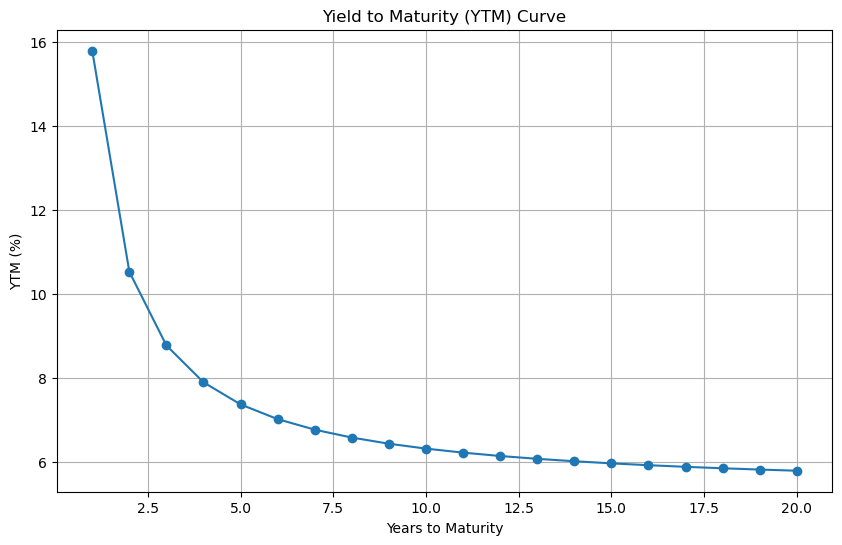

In [295]:
# Define the function to calculate Yield to Maturity (YTM)
def calculate_ytm(face_value, coupon_payment, years_to_maturity, current_price):
    # Formula for YTM calculation
    ytm = (coupon_payment + (face_value - current_price) / years_to_maturity) / ((face_value + current_price) / 2)
    return ytm * 100  # Convert to percentage

# Define bond parameters
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate (5%)
years_to_maturity = np.arange(1, 21)  # Years to maturity from 1 to 20
current_price = 900  # Current market price of the bond

# Calculate YTM for each year to maturity
ytms = [calculate_ytm(face_value, face_value * coupon_rate, years, current_price) for years in years_to_maturity]

# Plotting the YTM curve
plt.figure(figsize=(10, 6))
plt.plot(years_to_maturity, ytms, marker='o')
plt.title('Yield to Maturity (YTM) Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('YTM (%)')
plt.grid(True)
plt.show()

### Yield Spread

**Yield Spread**

**1. Definition:**
   - **Yield Spread:** Yield spread is the difference in yield between two bonds or fixed-income securities with different credit ratings or risk profiles. It represents the additional return that investors expect for holding a higher-risk bond relative to a lower-risk or risk-free bond.

**2. Key Concepts:**

   a. **Credit Risk Differential:**
      - Yield spread is primarily driven by the perceived difference in credit risk between two bonds.

   b. **Risk Premium:**
      - Investors demand a risk premium in the form of a higher yield for assuming the additional credit risk associated with a particular bond.

**3. Calculation of Yield Spread:**
   - The yield spread is calculated as the difference in yields between two bonds or securities. For example, if a corporate bond yields 5% and a government bond (considered risk-free) yields 2%, the yield spread would be 3%.

**4. Example:**
   - If a corporate bond with a credit rating of BBB yields 4%, and a government bond with a similar maturity yields 2%, the yield spread is 2%.

**5. Characteristics of Yield Spread:**

   a. **Market Sentiment Indicator:**
      - Changes in yield spread can be an indicator of market sentiment regarding credit risk. Widening spreads may indicate increased perceived risk, while narrowing spreads may signal improved credit conditions.

   b. **Term Structure Analysis:**
      - Yield spreads are often analyzed across different maturities to assess credit risk expectations over time.

**6. Use Cases:**

   a. **Investment Decision-Making:**
      - Investors use yield spread analysis to make informed decisions about relative value and risk when choosing between bonds with different credit ratings.

   b. **Credit Risk Assessment:**
      - Yield spreads are used to assess the credit risk premium embedded in bond yields, helping investors evaluate the compensation for the associated risks.

**7. Implications and Considerations:**

   a. **Economic Conditions:**
      - Changes in economic conditions, such as interest rate movements and economic indicators, can influence yield spreads.

   b. **Credit Rating Changes:**
      - Upgrades or downgrades in credit ratings can impact yield spreads as market perceptions of credit risk change.

**8. Integration with Financial Models:**

   a. **Valuation Models:**
      - Analysts incorporate yield spread analysis into financial models for bond valuation and pricing.

   b. **Portfolio Management:**
      - Yield spread considerations play a role in portfolio management, helping investors optimize risk and return profiles.

In summary, yield spread is a critical metric in fixed-income investing, providing insights into the compensation investors demand for taking on credit risk. It serves as a tool for assessing relative value among bonds with different credit ratings and is integral to investment decision-making in the fixed-income market.

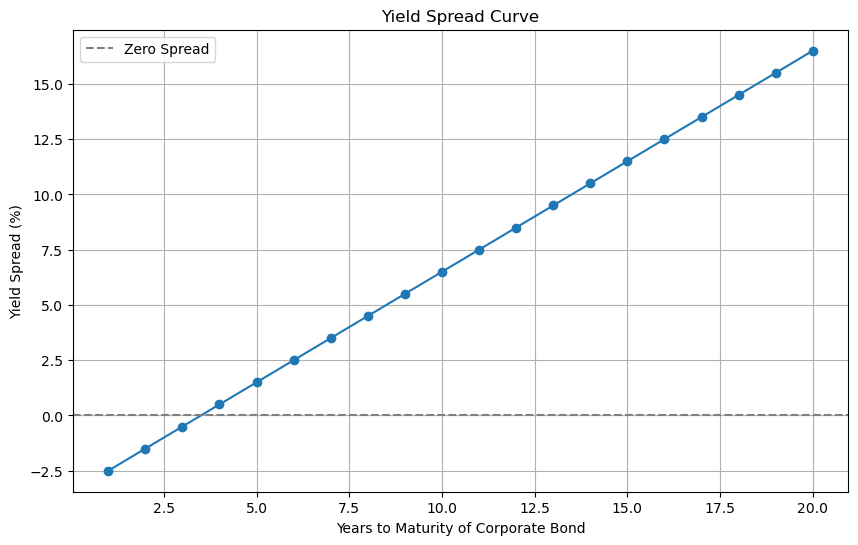

In [296]:
# Define the function to calculate Yield Spread
def calculate_yield_spread(ytm_benchmark, ytm_corporate):
    return ytm_corporate - ytm_benchmark

# Define bond parameters for benchmark and corporate bonds
ytm_benchmark = 3.5  # Yield to Maturity of the benchmark bond (e.g., government bond)
ytm_corporate = np.arange(1, 21)  # Yield to Maturity of the corporate bond for years 1 to 20

# Calculate Yield Spread for each year
yield_spreads = [calculate_yield_spread(ytm_benchmark, ytm) for ytm in ytm_corporate]

# Plotting the Yield Spread curve
plt.figure(figsize=(10, 6))
plt.plot(ytm_corporate, yield_spreads, marker='o')
plt.axhline(0, color='gray', linestyle='--', label='Zero Spread')  # Add a line at zero spread for reference
plt.title('Yield Spread Curve')
plt.xlabel('Years to Maturity of Corporate Bond')
plt.ylabel('Yield Spread (%)')
plt.legend()
plt.grid(True)
plt.show()

### Duration

**Duration**

**1. Definition:**
   - **Duration:** Duration is a measure of the sensitivity of a bond's price to changes in interest rates. It represents the weighted average time it takes for the bond's cash flows (coupon payments and the return of principal at maturity) to be repaid.

**2. Key Concepts:**

   a. **Interest Rate Sensitivity:**
      - Duration quantifies how much a bond's price is expected to change for a 1% change in interest rates.

   b. **Macaulay Duration vs. Modified Duration:**
      - Macaulay Duration is the weighted average time to receive the bond's cash flows, while Modified Duration adjusts Macaulay Duration for changes in interest rates.

**3. Calculation of Duration:**
   - Duration can be calculated using the following formula for a bond with periodic coupon payments:
      \[ \text{Macaulay Duration} = \sum_{t=1}^{n} \left( \frac{t \times \text{CF}_t}{(1 + \text{Yield})^t} \right) + \frac{n \times \text{Par Value}}{(1 + \text{Yield})^n} \]
      where \(t\) is the time to each cash flow, \(\text{CF}_t\) is the cash flow at time \(t\), \(n\) is the total number of periods, and \(\text{Yield}\) is the bond's yield.

**4. Example:**
   - If a bond has a duration of 5 years, a 1% increase in interest rates could be expected to result in roughly a 5% decrease in the bond's price.

**5. Characteristics of Duration:**

   a. **Inverse Relationship with Interest Rates:**
      - Duration and interest rates have an inverse relationship. As interest rates rise, a bond's duration measures the expected price decrease, and vice versa.

   b. **Duration Matching:**
      - Investors use duration to match the interest rate sensitivity of their bond portfolios with their investment horizon.

**6. Use Cases:**

   a. **Risk Management:**
      - Duration helps investors manage interest rate risk by providing insights into potential price changes.

   b. **Portfolio Construction:**
      - Duration matching is used in portfolio construction to align a portfolio's interest rate sensitivity with the investor's risk tolerance and time horizon.

**7. Implications and Considerations:**

   a. **Convexity:**
      - Duration is complemented by convexity, which provides a more accurate measure of bond price changes in response to interest rate movements.

   b. **Callable and Puttable Bonds:**
      - Duration may need adjustments for bonds with embedded options, such as callable or puttable bonds.

**8. Integration with Financial Models:**

   a. **Fixed-Income Valuation Models:**
      - Duration is integrated into financial models for fixed-income securities to assess the interest rate risk.

   b. **Risk Management Models:**
      - Duration plays a role in risk management models, helping investors optimize their portfolios for interest rate risk.

In summary, duration is a crucial metric for fixed-income investors, providing a measure of interest rate sensitivity and helping investors manage risk in their bond portfolios. It is a valuable tool for assessing the potential impact of interest rate changes on bond prices and making informed investment decisions.

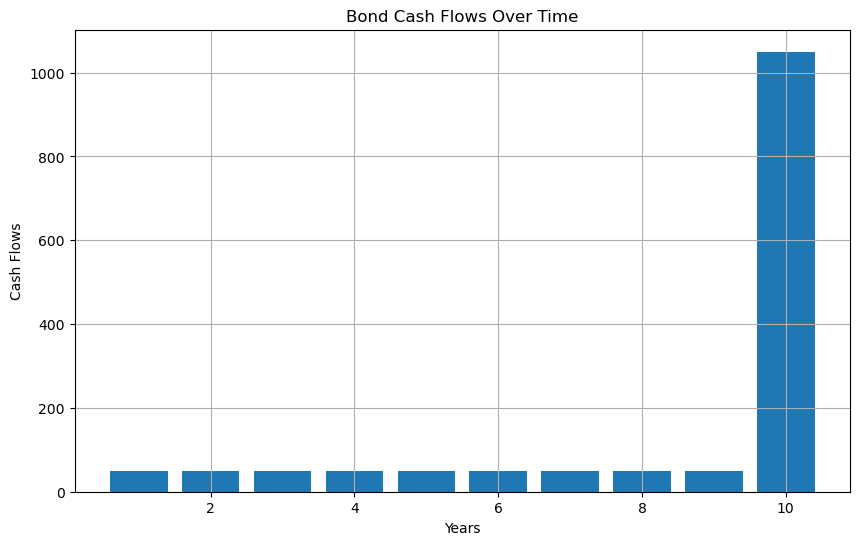

Regular Duration: 8.27 years


In [297]:
# Define the function to calculate Regular Duration
def calculate_regular_duration(cash_flows, discount_rate):
    present_values = [cf / (1 + discount_rate)**t for t, cf in enumerate(cash_flows, start=1)]
    weighted_present_values = [t * pv for t, pv in enumerate(present_values, start=1)]
    total_present_value = sum(present_values)
    total_weighted_present_value = sum(weighted_present_values)
    duration = total_weighted_present_value / total_present_value
    return duration

# Define bond parameters
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate (5%)
years_to_maturity = 10  # Years to maturity
discount_rate = 0.03  # Discount rate or yield to maturity

# Calculate annual coupon payments
coupon_payments = face_value * coupon_rate

# Generate cash flows for the bond
cash_flows = [coupon_payments] * (years_to_maturity - 1)
cash_flows.append(coupon_payments + face_value)  # Include the face value at maturity

# Calculate Regular Duration
regular_duration = calculate_regular_duration(cash_flows, discount_rate)

# Plotting the cash flows over time
plt.figure(figsize=(10, 6))
plt.bar(range(1, years_to_maturity + 1), cash_flows)
plt.title('Bond Cash Flows Over Time')
plt.xlabel('Years')
plt.ylabel('Cash Flows')
plt.grid(True)
plt.show()

# Display Regular Duration
print(f'Regular Duration: {regular_duration:.2f} years')

### Price and Yield Relationship

**Price & Yield Relationship**

**1. Inverse Relationship:**
   - The price and yield of a bond have an inverse relationship. When interest rates rise, bond prices fall, and when interest rates fall, bond prices rise.

**2. Interest Rate Impact on Bond Prices:**
   - Changes in market interest rates directly impact the present value of a bond's future cash flows, affecting its market price.

**3. Formula for Bond Price:**
   - The formula for calculating the price of a bond is based on the present value of its future cash flows, which include coupon payments and the return of principal at maturity. The formula is:
      \[ \text{Bond Price} = \sum_{t=1}^{n} \left( \frac{\text{CF}_t}{(1 + \text{Yield})^t} \right) + \frac{\text{Par Value}}{(1 + \text{Yield})^n} \]
      where \(t\) is the time to each cash flow, \(\text{CF}_t\) is the cash flow at time \(t\), \(n\) is the total number of periods, and \(\text{Yield}\) is the bond's yield.

**4. Example:**
   - If a bond has a face value of $1,000, a 5% coupon rate, and a yield of 4%, the price would be calculated using the present value formula for the bond's cash flows.

**5. Yield to Maturity (YTM):**
   - Yield to Maturity (YTM) is the yield at which the present value of a bond's future cash flows equals its current market price. It represents the total return an investor can expect if the bond is held until maturity.

**6. Convexity:**
   - While the price-yield relationship is often linear, convexity is introduced to refine the accuracy of bond price changes, especially for larger interest rate movements.

**7. Duration:**
   - Duration is a measure of interest rate sensitivity and is used to estimate the percentage change in a bond's price for a 1% change in yield.

**8. Use Cases:**

   a. **Interest Rate Risk Management:**
      - Understanding the price-yield relationship is crucial for managing interest rate risk in a fixed-income portfolio.

   b. **Investment Decision-Making:**
      - Investors use the price-yield relationship to assess the impact of interest rate changes on bond prices and make informed investment decisions.

**9. Implications and Considerations:**

   a. **Market Conditions:**
      - The price-yield relationship is influenced by prevailing market interest rates and economic conditions.

   b. **Investor Objectives:**
      - Investors consider the price-yield relationship to align their investment objectives with their risk tolerance and income needs.

**10. Integration with Financial Models:**

   a. **Portfolio Optimization:**
      - Models for portfolio optimization often incorporate the price-yield relationship to optimize risk and return profiles.

   b. **Valuation Models:**
      - Valuation models for fixed-income securities use the price-yield relationship to assess fair values and potential returns.

Understanding the price-yield relationship is essential for fixed-income investors as it forms the basis for assessing the impact of interest rate changes on bond prices, enabling them to make informed decisions and manage risks in their portfolios.

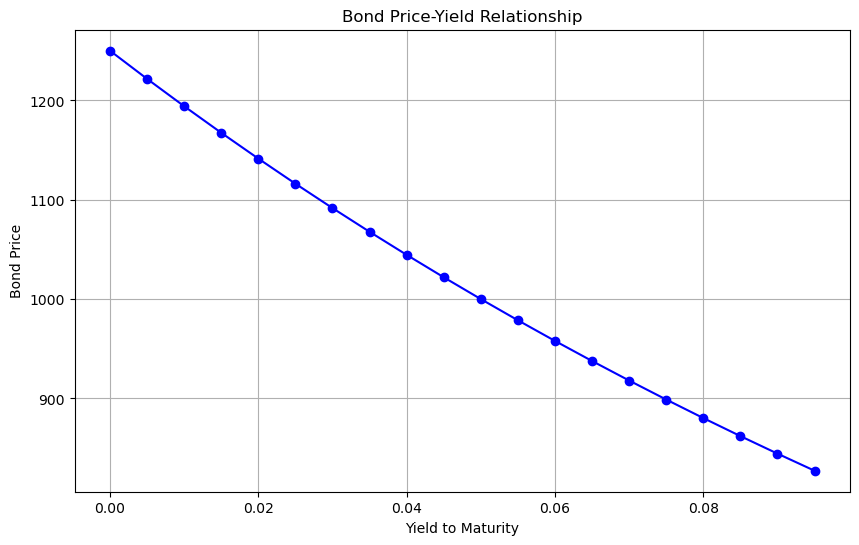

In [298]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate bond price and yield relationship
def calculate_price_yield_relationship(face_value, coupon_rate, years_to_maturity, yield_range):
    periods = np.arange(1, years_to_maturity + 1)
    coupon_payments = face_value * coupon_rate
    bond_cash_flows = np.full_like(periods, coupon_payments)
    bond_cash_flows[-1] += face_value  # Add face value at maturity

    # Calculate bond prices for a range of yields
    bond_prices = [np.sum(bond_cash_flows / (1 + yield_rate) ** periods) for yield_rate in yield_range]

    return bond_prices

# Function to plot price-yield relationship
def plot_price_yield_relationship(face_value, coupon_rate, years_to_maturity, yield_range):
    bond_prices = calculate_price_yield_relationship(face_value, coupon_rate, years_to_maturity, yield_range)

    plt.figure(figsize=(10, 6))
    plt.plot(yield_range, bond_prices, marker='o', linestyle='-', color='b')
    plt.title('Bond Price-Yield Relationship')
    plt.xlabel('Yield to Maturity')
    plt.ylabel('Bond Price')
    plt.grid(True)
    plt.show()

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_range = np.arange(0, 0.1, 0.005)  # Range of yields to explore

# Plot price-yield relationship
plot_price_yield_relationship(bond_face_value, coupon_rate, maturity_years, yield_range)


### Total Return

**Total Return**

**1. Definition:**
   - **Total Return:** Total return is the overall measure of an investment's performance, encompassing capital appreciation or depreciation and all income generated from the investment, such as dividends, interest, and other distributions.

**2. Components of Total Return:**

   a. **Capital Gains or Losses:**
      - Changes in the market value of the investment contribute to the capital gains or losses component.

   b. **Income:**
      - Income includes dividends from stocks, interest from bonds, and any other distributions received during the investment holding period.

**3. Calculation of Total Return:**
   - The formula for calculating total return is:
      \[ \text{Total Return} = \left( \frac{\text{Ending Value} + \text{Income}}{\text{Beginning Value}} \right) - 1 \]

**4. Example:**
   - If an investor purchases a stock for $1,000, receives $50 in dividends, and sells the stock for $1,200, the total return would be:
      \[ \text{Total Return} = \left( \frac{1,200 + 50}{1,000} \right) - 1 = 0.25 \text{ or } 25\% \]

**5. Characteristics of Total Return:**

   a. **Comprehensive Measure:**
      - Total return provides a comprehensive view of an investment's success by considering both capital appreciation and income.

   b. **Long-Term Perspective:**
      - It is particularly valuable for investors with a long-term perspective who are focused on overall portfolio growth.

**6. Use Cases:**

   a. **Investment Evaluation:**
      - Total return is used to evaluate the success of an investment over a specified period.

   b. **Portfolio Performance Measurement:**
      - Investors and fund managers use total return to assess the overall performance of a portfolio.

**7. Implications and Considerations:**

   a. **Risk and Reward Assessment:**
      - Total return allows investors to assess the balance between risk and reward associated with an investment.

   b. **Reinvestment of Income:**
      - The reinvestment of income, such as dividends, can enhance total return over time.

**8. Integration with Financial Models:**

   a. **Performance Attribution Models:**
      - Total return is a key metric in performance attribution models that analyze the contribution of various factors to the overall return.

   b. **Risk-Adjusted Return Models:**
      - In risk-adjusted return models, total return is considered in conjunction with risk metrics to evaluate the efficiency of an investment.

In summary, total return is a crucial metric for investors, providing a comprehensive assessment of the overall performance of an investment by considering both capital gains and income. It offers a holistic perspective on an investment's success and is widely used for evaluating portfolios and making informed investment decisions.

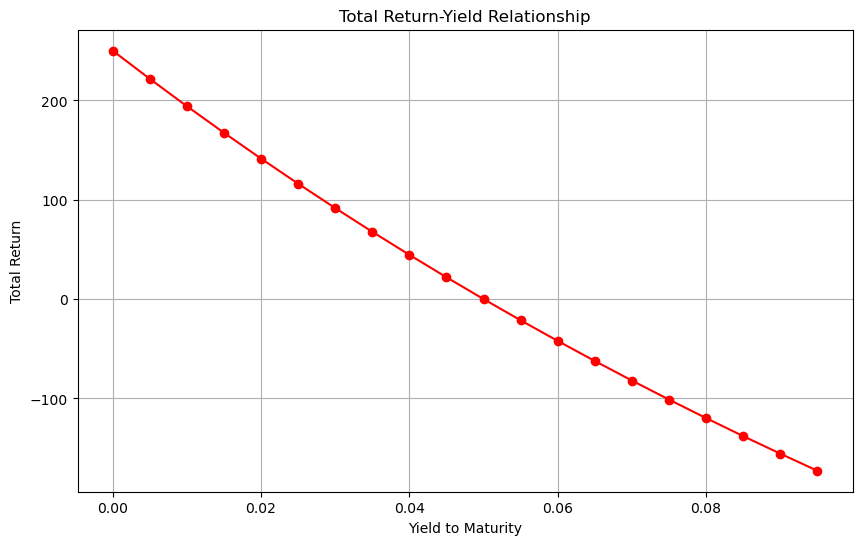

In [299]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate total return of a bond
def calculate_total_return(face_value, coupon_rate, years_to_maturity, yield_to_maturity):
    periods = np.arange(1, years_to_maturity + 1)
    coupon_payments = face_value * coupon_rate
    bond_cash_flows = np.full_like(periods, coupon_payments)
    bond_cash_flows[-1] += face_value  # Add face value at maturity

    # Calculate total return
    total_return = np.sum(bond_cash_flows / (1 + yield_to_maturity) ** periods) - face_value

    return total_return

# Function to plot total return for a range of yields
def plot_total_return(face_value, coupon_rate, years_to_maturity, yield_range):
    total_returns = [calculate_total_return(face_value, coupon_rate, years_to_maturity, yield_rate) for yield_rate in yield_range]

    plt.figure(figsize=(10, 6))
    plt.plot(yield_range, total_returns, marker='o', linestyle='-', color='r')
    plt.title('Total Return-Yield Relationship')
    plt.xlabel('Yield to Maturity')
    plt.ylabel('Total Return')
    plt.grid(True)
    plt.show()

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_range = np.arange(0, 0.1, 0.005)  # Range of yields to explore

# Plot total return-yield relationship
plot_total_return(bond_face_value, coupon_rate, maturity_years, yield_range)


### Reinvestment Risk

**Reinvestment Risk**

**1. Definition:**
   - **Reinvestment Risk:** Reinvestment risk is the risk that the proceeds from the redemption or interest payments of an investment may need to be reinvested at lower interest rates prevailing in the market at that future point in time.

**2. Key Concepts:**

   a. **Interest Rate Changes:**
      - Reinvestment risk arises due to the uncertainty of future interest rates. If rates decline, cash flows reinvested at lower rates may result in lower overall returns.

   b. **Cash Flow Timing:**
      - It is particularly relevant for investments with periodic cash flows, such as coupon payments from bonds.

**3. Impact on Total Return:**
   - Reinvestment risk can impact the total return of an investment or portfolio, especially when cash flows are generated over an extended period.

**4. Mitigation Strategies:**

   a. **Diversification:**
      - Diversifying the maturities of fixed-income investments can help mitigate reinvestment risk.

   b. **Laddering:**
      - Creating a bond ladder with staggered maturities can help distribute cash flows over time, reducing the impact of reinvesting at a single point.

**5. Example:**
   - If an investor owns a bond with a 5% coupon rate, and market interest rates decline to 3% when the bond matures, the investor may face reinvestment risk when reinvesting the proceeds at the lower prevailing rate.

**6. Use Cases:**

   a. **Portfolio Planning:**
      - Investors consider reinvestment risk when planning the composition and structure of their fixed-income portfolios.

   b. **Income Planning:**
      - Individuals relying on fixed-income investments for income must consider the impact of reinvestment risk on their future cash flows.

**7. Implications and Considerations:**

   a. **Interest Rate Environment:**
      - The prevailing interest rate environment plays a significant role in determining the level of reinvestment risk.

   b. **Investment Horizon:**
      - Reinvestment risk is more pronounced for investors with longer investment horizons, as they may face multiple reinvestment decisions.

**8. Integration with Financial Models:**

   a. **Total Return Models:**
      - Reinvestment risk is often factored into models assessing the total return of fixed-income investments over time.

   b. **Scenario Analysis:**
      - Financial models may incorporate scenario analysis to evaluate the impact of different interest rate scenarios on reinvestment risk.

In summary, reinvestment risk is a consideration for fixed-income investors, and it highlights the potential challenges of reinvesting cash flows at different interest rates. Investors employ various strategies to manage and mitigate this risk, taking into account their investment objectives and the prevailing market conditions.

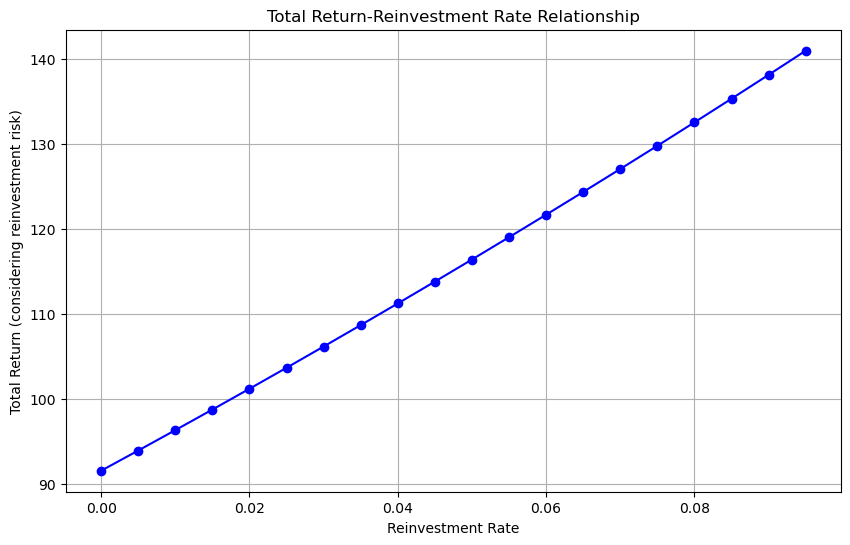

In [300]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate total return considering reinvestment risk
def calculate_total_return_reinvestment(face_value, coupon_rate, years_to_maturity, yield_to_maturity, reinvestment_rate):
    periods = np.arange(1, years_to_maturity + 1)
    coupon_payments = face_value * coupon_rate
    bond_cash_flows = np.full_like(periods, coupon_payments)
    bond_cash_flows[-1] += face_value  # Add face value at maturity

    # Calculate total return considering reinvestment risk
    total_return_reinvestment = np.sum(
        (bond_cash_flows / (1 + yield_to_maturity) ** periods) *
        (1 + reinvestment_rate) ** (years_to_maturity - periods)
    ) - face_value

    return total_return_reinvestment

# Function to plot total return for a range of reinvestment rates
def plot_total_return_reinvestment(face_value, coupon_rate, years_to_maturity, yield_to_maturity, reinvestment_range):
    total_returns_reinvestment = [calculate_total_return_reinvestment(face_value, coupon_rate, years_to_maturity, yield_to_maturity, reinvestment_rate) for reinvestment_rate in reinvestment_range]

    plt.figure(figsize=(10, 6))
    plt.plot(reinvestment_range, total_returns_reinvestment, marker='o', linestyle='-', color='b')
    plt.title('Total Return-Reinvestment Rate Relationship')
    plt.xlabel('Reinvestment Rate')
    plt.ylabel('Total Return (considering reinvestment risk)')
    plt.grid(True)
    plt.show()

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_to_maturity = 0.03  # Yield to maturity
reinvestment_range = np.arange(0, 0.1, 0.005)  # Range of reinvestment rates to explore

# Plot total return-reinvestment rate relationship
plot_total_return_reinvestment(bond_face_value, coupon_rate, maturity_years, yield_to_maturity, reinvestment_range)


# Applying Duration, Convexity and DV01

### Duration

**Duration in Valuation & Risk Models**

**1. Definition:**
   - **Duration:** In the context of fixed-income securities, duration is a measure of interest rate sensitivity. It quantifies the weighted average time it takes for the present value of a bond's cash flows (coupon payments and the return of principal at maturity) to be repaid.

**2. Key Concepts:**

   a. **Interest Rate Sensitivity:**
      - Duration reflects how sensitive the price of a bond is to changes in interest rates. It helps investors assess the potential impact of interest rate movements on their bond portfolios.

   b. **Macaulay Duration vs. Modified Duration:**
      - Macaulay Duration is the weighted average time to receive the bond's cash flows, while Modified Duration adjusts for changes in interest rates, providing a more accurate measure of interest rate risk.

**3. Calculation of Duration:**
   - Duration can be calculated using the formula:
      \[ \text{Macaulay Duration} = \sum_{t=1}^{n} \left( \frac{t \times \text{CF}_t}{(1 + \text{Yield})^t} \right) + \frac{n \times \text{Par Value}}{(1 + \text{Yield})^n} \]
      where \(t\) is the time to each cash flow, \(\text{CF}_t\) is the cash flow at time \(t\), \(n\) is the total number of periods, and \(\text{Yield}\) is the bond's yield.

**4. Duration's Role in Risk Management:**

   a. **Interest Rate Risk:**
      - Duration is a crucial tool for managing interest rate risk. It helps investors align the interest rate sensitivity of their bond portfolios with their risk tolerance.

   b. **Duration Matching:**
      - Investors may use duration matching to match the duration of their assets and liabilities, minimizing interest rate risk.

**5. Use Cases:**

   a. **Portfolio Construction:**
      - Duration is considered in portfolio construction to ensure that the interest rate risk aligns with the investor's objectives.

   b. **Risk Assessment:**
      - Duration is a key factor in assessing the risk profile of fixed-income securities and portfolios.

**6. Limitations of Duration:**

   a. **Convexity Adjustment:**
      - Duration assumes a linear relationship between bond prices and interest rates. Convexity is often used as a correction factor to account for the curvature in the price-yield relationship.

   b. **Callable and Puttable Bonds:**
      - Duration may need adjustments for bonds with embedded options, such as callable or puttable bonds.

**7. Integration with Financial Models:**

   a. **Risk Management Models:**
      - Duration is integrated into risk management models to assess the interest rate risk of bond portfolios.

   b. **Fixed-Income Valuation Models:**
      - Duration is a key input in fixed-income valuation models, helping estimate the impact of interest rate changes on bond prices.

In summary, duration is a fundamental concept in fixed-income valuation and risk management. It provides valuable insights into the interest rate sensitivity of bonds and is a crucial tool for investors seeking to optimize their portfolios in line with their risk preferences.

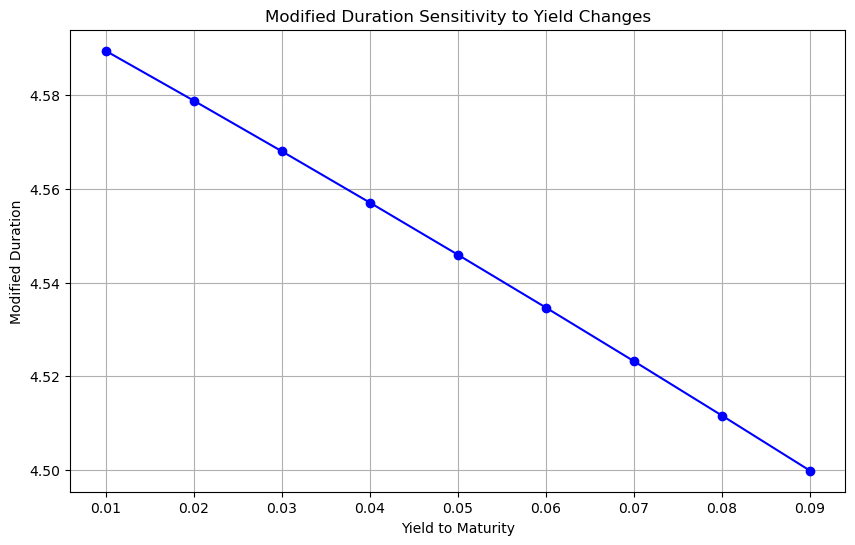

In [301]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate modified duration
def calculate_modified_duration(face_value, coupon_rate, years_to_maturity, yield_to_maturity):
    periods = np.arange(1, years_to_maturity + 1)
    present_value_cash_flows = [
        (face_value * coupon_rate) / (1 + yield_to_maturity) ** t for t in periods
    ]
    present_value_cash_flows[-1] += face_value / (1 + yield_to_maturity) ** years_to_maturity
    modified_duration = np.sum(
        (present_value_cash_flows * periods) /
        np.sum(present_value_cash_flows)
    )
    return modified_duration

# Function to plot modified duration sensitivity to yield changes
def plot_duration_sensitivity(face_value, coupon_rate, years_to_maturity, yield_range):
    durations = [calculate_modified_duration(face_value, coupon_rate, years_to_maturity, yield_rate) for yield_rate in yield_range]

    plt.figure(figsize=(10, 6))
    plt.plot(yield_range, durations, marker='o', linestyle='-', color='b')
    plt.title('Modified Duration Sensitivity to Yield Changes')
    plt.xlabel('Yield to Maturity')
    plt.ylabel('Modified Duration')
    plt.grid(True)
    plt.show()

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_range = np.arange(0.01, 0.1, 0.01)  # Range of yield rates to explore

# Plot modified duration sensitivity to yield changes
plot_duration_sensitivity(bond_face_value, coupon_rate, maturity_years, yield_range)


### Modified Duration

**Modified Duration in Valuation & Risk Models**

**1. Definition:**
   - **Modified Duration:** Modified Duration is a measure of interest rate sensitivity for fixed-income securities. It is a modified or adjusted version of Macaulay Duration, incorporating the concept of interest rate elasticity to provide a more accurate assessment of the impact of interest rate changes on bond prices.

**2. Calculation of Modified Duration:**
   - Modified Duration can be calculated using the formula:
      \[ \text{Modified Duration} = \frac{\text{Macaulay Duration}}{1 + \frac{\text{Yield}}{m}} \]
      where \(\text{Macaulay Duration}\) is the unmodified duration, \(\text{Yield}\) is the bond's yield, and \(m\) is the number of compounding periods per year.

**3. Key Concepts:**

   a. **Interest Rate Elasticity:**
      - Modified Duration incorporates the concept of interest rate elasticity, providing a percentage change in bond price for a 1% change in yield.

   b. **Linear Approximation:**
      - It assumes a linear relationship between bond prices and interest rates, making it a useful tool for small interest rate changes.

**4. Use Cases:**

   a. **Interest Rate Risk Management:**
      - Modified Duration is employed by investors and portfolio managers to assess and manage interest rate risk in fixed-income portfolios.

   b. **Portfolio Construction:**
      - In constructing portfolios, investors use Modified Duration to ensure alignment with their risk tolerance and investment objectives.

**5. Relationship with Macaulay Duration:**

   a. **Inverse Relationship with Yield:**
      - As the yield increases, Modified Duration decreases, and vice versa.

   b. **Comparison:**
      - Macaulay Duration represents the average time to receive the bond's cash flows, while Modified Duration adjusts this measure for interest rate changes.

**6. Limitations:**

   a. **Assumption of Linearity:**
      - Like Macaulay Duration, Modified Duration assumes a linear relationship between bond prices and interest rates, limiting its accuracy for larger interest rate changes.

   b. **Callable and Puttable Bonds:**
      - Similar to Macaulay Duration, adjustments may be needed for bonds with embedded options.

**7. Integration with Financial Models:**

   a. **Risk Management Models:**
      - Modified Duration is integrated into risk management models for fixed-income portfolios to assess interest rate risk.

   b. **Fixed-Income Valuation Models:**
      - It is a key input in fixed-income valuation models, providing a measure of interest rate sensitivity.

In summary, Modified Duration is a vital tool in fixed-income valuation and risk management. It refines the concept of interest rate sensitivity provided by Macaulay Duration, offering a more accurate measure for small changes in interest rates. Investors use Modified Duration to make informed decisions regarding interest rate risk and portfolio construction.

In [302]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate modified duration
def calculate_modified_duration(face_value, coupon_rate, years_to_maturity, yield_to_maturity):
    periods = np.arange(1, years_to_maturity + 1)
    present_value_cash_flows = [
        (face_value * coupon_rate) / (1 + yield_to_maturity) ** t for t in periods
    ]
    present_value_cash_flows[-1] += face_value / (1 + yield_to_maturity) ** years_to_maturity
    modified_duration = np.sum(
        (present_value_cash_flows * periods) /
        np.sum(present_value_cash_flows)
    )
    return modified_duration

# Function to calculate convexity
def calculate_convexity(face_value, coupon_rate, years_to_maturity, yield_to_maturity):
    periods = np.arange(1, years_to_maturity + 1)
    present_value_cash_flows = [
        (face_value * coupon_rate) / (1 + yield_to_maturity) ** t for t in periods
    ]
    present_value_cash_flows[-1] += face_value / (1 + yield_to_maturity) ** years_to_maturity
    convexity = np.sum(
        (present_value_cash_flows * (periods ** 2)) /
        np.sum(present_value_cash_flows)
    )
    return convexity

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_to_maturity = 0.03  # Yield to maturity

# Calculate modified duration and convexity
modified_duration = calculate_modified_duration(bond_face_value, coupon_rate, maturity_years, yield_to_maturity)
convexity = calculate_convexity(bond_face_value, coupon_rate, maturity_years, yield_to_maturity)

# Display results
print("\n**Modified Duration:** {:.2f} years".format(modified_duration))
print("**Convexity:** {:.2f} years^2".format(convexity))



**Modified Duration:** 4.57 years
**Convexity:** 21.99 years^2


### Macaulay Duration

**Macaulay Duration in Valuation & Risk Models**

**1. Definition:**
   - **Macaulay Duration:** Macaulay Duration is a measure of interest rate sensitivity for fixed-income securities. It represents the weighted average time it takes for the present value of a bond's cash flows (coupon payments and the return of principal at maturity) to be repaid.

**2. Calculation of Macaulay Duration:**
   - Macaulay Duration can be calculated using the formula:
      \[ \text{Macaulay Duration} = \sum_{t=1}^{n} \left( \frac{t \times \text{CF}_t}{(1 + \text{Yield})^t} \right) + \frac{n \times \text{Par Value}}{(1 + \text{Yield})^n} \]
      where \(t\) is the time to each cash flow, \(\text{CF}_t\) is the cash flow at time \(t\), \(n\) is the total number of periods, and \(\text{Yield}\) is the bond's yield.

**3. Key Concepts:**

   a. **Weighted Average Time:**
      - Macaulay Duration calculates the weighted average time until the bondholder receives the present value of all future cash flows.

   b. **Bond Maturity Impact:**
      - The impact of the bond's maturity on Macaulay Duration is significant; longer-maturity bonds typically have higher Macaulay Durations.

**4. Interpretation:**

   a. **Years to Recover Investment:**
      - Macaulay Duration can be interpreted as the number of years it takes for an investor to recover their initial investment through the bond's cash flows.

   b. **Interest Rate Sensitivity:**
      - It provides insights into how sensitive the bond's price is to changes in interest rates.

**5. Use Cases:**

   a. **Interest Rate Risk Management:**
      - Investors use Macaulay Duration to manage interest rate risk, assessing the potential impact of rate changes on bond prices.

   b. **Portfolio Construction:**
      - In constructing portfolios, Macaulay Duration helps align the interest rate sensitivity of bond holdings with the investor's risk tolerance.

**6. Limitations:**

   a. **Linear Approximation:**
      - Macaulay Duration assumes a linear relationship between bond prices and interest rates, making it less accurate for large interest rate changes.

   b. **Callable and Puttable Bonds:**
      - Adjustments may be needed for bonds with embedded options.

**7. Integration with Financial Models:**

   a. **Risk Management Models:**
      - Macaulay Duration is integrated into risk management models for fixed-income portfolios to assess interest rate risk.

   b. **Fixed-Income Valuation Models:**
      - It is a key input in fixed-income valuation models, providing a measure of interest rate sensitivity.

In summary, Macaulay Duration is a fundamental concept in fixed-income valuation and risk management. It quantifies the interest rate sensitivity of a bond and helps investors make informed decisions regarding their bond portfolios and interest rate risk exposure.

In [303]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Macaulay duration
def calculate_macaulay_duration(face_value, coupon_rate, years_to_maturity, yield_to_maturity):
    periods = np.arange(1, years_to_maturity + 1)
    present_value_cash_flows = [
        (face_value * coupon_rate) / (1 + yield_to_maturity) ** t for t in periods
    ]
    present_value_cash_flows[-1] += face_value / (1 + yield_to_maturity) ** years_to_maturity
    macaulay_duration = np.sum(
        (present_value_cash_flows * periods) /
        np.sum(present_value_cash_flows)
    )
    return macaulay_duration

# Set parameters
bond_face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate
maturity_years = 5  # Years to maturity
yield_to_maturity = 0.03  # Yield to maturity

# Calculate Macaulay duration
macaulay_duration = calculate_macaulay_duration(bond_face_value, coupon_rate, maturity_years, yield_to_maturity)

# Display results
print("\n**Macaulay Duration:** {:.2f} years".format(macaulay_duration))



**Macaulay Duration:** 4.57 years


### Convexity

**Convexity in Valuation & Risk Models**

**1. Definition:**
   - **Convexity:** Convexity is a measure of the curvature or the second-order sensitivity of a bond's price to changes in interest rates. It provides additional information beyond Macaulay Duration and Modified Duration by accounting for the non-linear relationship between bond prices and yields.

**2. Calculation of Convexity:**
   - Convexity can be calculated using the formula:
      \[ \text{Convexity} = \sum_{t=1}^{n} \left( \frac{t \times (t + 1) \times \text{CF}_t}{(1 + \text{Yield})^{t+2}} \right) + \frac{n \times (n + 1) \times \text{Par Value}}{(1 + \text{Yield})^{n+2}} \]

**3. Key Concepts:**

   a. **Curvature of Bond Price-Yield Relationship:**
      - Convexity captures the curvature in the bond price-yield relationship, providing a more accurate estimate of the bond's price change for larger interest rate movements.

   b. **Positive Convexity:**
      - Most bonds exhibit positive convexity, meaning that as interest rates change, the percentage increase in bond prices is greater than the percentage decrease.

**4. Interpretation:**

   a. **Impact on Bond Price:**
      - Convexity measures the change in bond prices given a change in interest rates. A higher convexity implies a greater impact on bond prices.

   b. **Risk Mitigation:**
      - Convexity helps mitigate the limitations of Modified Duration, which assumes a linear relationship, by accounting for the non-linear nature of bond price changes.

**5. Use Cases:**

   a. **Risk Management:**
      - Investors use convexity to refine interest rate risk management strategies, especially for larger and more unpredictable interest rate movements.

   b. **Portfolio Optimization:**
      - Convexity is considered in portfolio construction to optimize the risk-return profile, taking into account non-linear price-yield relationships.

**6. Limitations:**

   a. **Complexity:**
      - Convexity calculations can be more complex than Modified Duration, requiring additional mathematical considerations.

   b. **Callable and Puttable Bonds:**
      - Similar to Macaulay Duration, adjustments may be needed for bonds with embedded options.

**7. Integration with Financial Models:**

   a. **Risk Management Models:**
      - Convexity is integrated into risk management models for fixed-income portfolios to provide a more comprehensive assessment of interest rate risk.

   b. **Valuation Models:**
      - Convexity is a crucial input in fixed-income valuation models, refining the estimation of bond price changes.

In summary, convexity is an important measure in fixed-income valuation and risk management. It enhances the understanding of the relationship between bond prices and interest rates by accounting for the curvature in this relationship, making it a valuable tool for investors aiming to optimize their portfolios in dynamic interest rate environments.

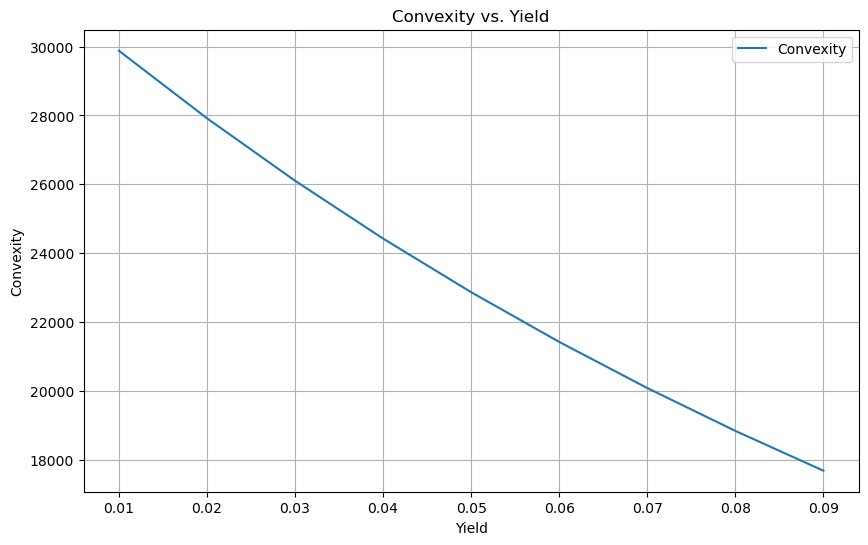

In [332]:
def calculate_convexity(yield_rate, cash_flows, par_value):
    n = len(cash_flows)
    convexity = sum([(t * (t + 1) * cf) / ((1 + yield_rate) ** (t + 2)) for t, cf in enumerate(cash_flows)]) + \
                (n * (n + 1) * par_value) / ((1 + yield_rate) ** (n + 2))
    return convexity

def plot_convexity(yield_range, cash_flows, par_value):
    convexity_values = [calculate_convexity(yield_rate, cash_flows, par_value) for yield_rate in yield_range]

    plt.figure(figsize=(10, 6))
    plt.plot(yield_range, convexity_values, label='Convexity')
    plt.title('Convexity vs. Yield')
    plt.xlabel('Yield')
    plt.ylabel('Convexity')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
yield_range = np.arange(0.01, 0.1, 0.01)  # Adjust the range as needed
cash_flows = [50, 50, 50, 50, 50]  # Adjust the cash flows based on your bond
par_value = 1000  # Adjust the par value based on your bond

plot_convexity(yield_range, cash_flows, par_value)

### Using Duration and Convexity for Price Changes

**Duration and Convexity for Bond Price Changes**

**1. Duration:**
   - **Definition:** Duration is a measure of interest rate sensitivity that quantifies the weighted average time it takes for the present value of a bond's cash flows to be repaid.
   - **Role in Price Changes:** Duration provides an estimate of the percentage change in bond prices for a 1% change in interest rates.
   - **Linear Approximation:** Duration assumes a linear relationship between bond prices and interest rates, making it a useful tool for small interest rate changes.

**2. Convexity:**
   - **Definition:** Convexity is a measure of the curvature or the second-order sensitivity of a bond's price to changes in interest rates.
   - **Role in Price Changes:** Convexity helps refine the estimate of bond price changes by accounting for the non-linear relationship between bond prices and yields.
   - **Impact on Larger Interest Rate Movements:** Convexity becomes more significant for larger interest rate movements where the linear approximation of duration may be less accurate.

**3. Price Change Formula:**
   - The approximate percentage change in bond price (\(\Delta P\)) due to an interest rate change can be estimated using the following formula:
      \[ \Delta P \approx -\text{Duration} \times \Delta \text{Yield} + \frac{1}{2} \times \text{Convexity} \times (\Delta \text{Yield})^2 \]

**4. Interpretation:**
   - **Duration Component:** The first term, \(-\text{Duration} \times \Delta \text{Yield}\), represents the linear impact of duration on price changes.
   - **Convexity Component:** The second term, \(\frac{1}{2} \times \text{Convexity} \times (\Delta \text{Yield})^2\), accounts for the non-linear impact of convexity, refining the estimation for larger interest rate movements.

**5. Implications:**
   - **Interest Rate Risk Management:** Duration and convexity together provide a more comprehensive understanding of how bond prices respond to changes in interest rates.
   - **Portfolio Optimization:** Investors consider both duration and convexity in portfolio construction to achieve a balanced risk-return profile.

**6. Limitations:**
   - **Linear vs. Non-Linear Relationship:** Duration provides a linear approximation, and convexity corrects for the non-linear aspects of the bond price-yield relationship.
   - **Callable and Puttable Bonds:** Adjustments may be necessary for bonds with embedded options.

**7. Practical Use:**
   - **Interest Rate Scenarios:** Investors often use duration and convexity to assess the impact of different interest rate scenarios on their bond portfolios.
   - **Risk Mitigation:** The combination of duration and convexity helps investors manage interest rate risk more effectively.

In summary, the interplay between duration and convexity is crucial for understanding and estimating bond price changes in response to interest rate movements. While duration provides a linear approximation, convexity refines the estimation, especially for larger and more unpredictable changes in interest rates. Investors integrate both measures for effective interest rate risk management and portfolio optimization.

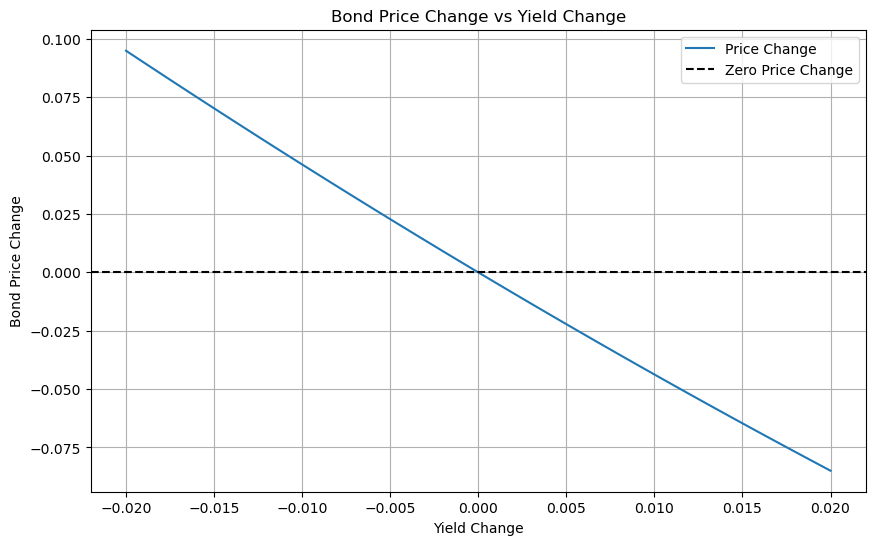

In [304]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate bond price change using duration and convexity
def calculate_price_change(duration, convexity, yield_change):
    return -duration * yield_change + 0.5 * convexity * (yield_change ** 2)

# Set parameters
bond_duration = 4.5  # Macaulay duration of the bond
bond_convexity = 25  # Convexity of the bond
yield_change_range = np.linspace(-0.02, 0.02, 100)  # Range of yield changes

# Calculate bond price changes
price_changes = calculate_price_change(bond_duration, bond_convexity, yield_change_range)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the relationship between yield changes and bond price changes
plt.plot(yield_change_range, price_changes, label="Price Change")

plt.title("Bond Price Change vs Yield Change")
plt.xlabel("Yield Change")
plt.ylabel("Bond Price Change")
plt.axhline(0, color="black", linestyle="--", label="Zero Price Change")
plt.legend()
plt.grid(True)
plt.show()


### DV01 (Dollar Value of 01)

**DV01 (Dollar Value of 01) in Valuation & Risk Models**

**1. Definition:**
   - **DV01 (Dollar Value of 01):** DV01 represents the change in the dollar price of a bond for a 1 basis point (0.01%) change in yield. It is a measure of interest rate risk and is particularly useful for assessing the impact of small changes in interest rates on bond portfolios.

**2. Calculation of DV01:**
   - DV01 can be calculated as the derivative of the bond's price with respect to yield, normalized by 100.
      \[ \text{DV01} = -\frac{\partial P}{\partial \text{Yield}} \times \frac{1}{100} \]
   - Alternatively, it can be calculated as the product of the modified duration and the bond's full price.

**3. Key Concepts:**

   a. **Sensitivity to Interest Rate Changes:**
      - DV01 quantifies how sensitive the bond's price is to changes in yield, providing a linear approximation for small interest rate movements.

   b. **Unit Change in Basis Points:**
      - DV01 measures the change in the bond's price for a 1 basis point change in yield, making it a useful tool for assessing interest rate risk in fixed-income portfolios.

**4. Role in Risk Management:**

   a. **Portfolio Risk Assessment:**
      - Investors use DV01 to assess the interest rate risk exposure of their bond portfolios, allowing for effective risk management.

   b. **Hedging Strategies:**
      - DV01 is employed in hedging strategies to offset interest rate risk by adjusting the portfolio's overall DV01.

**5. Interpretation:**

   a. **Magnitude of Interest Rate Impact:**
      - A higher DV01 indicates a greater impact on the bond's price for a given change in yield.

   b. **Risk Assessment:**
      - DV01 provides a quick and practical way to assess the potential risk associated with interest rate movements.

**6. Use Cases:**

   a. **Trading and Position Management:**
      - Traders use DV01 to manage risk and optimize positions based on interest rate expectations.

   b. **Duration Matching:**
      - DV01 is considered in duration matching strategies to align the interest rate sensitivity of assets and liabilities.

**7. Limitations:**

   a. **Linear Approximation:**
      - DV01 provides a linear approximation and may not fully capture the non-linear aspects of bond price changes.

   b. **Callable and Puttable Bonds:**
      - Adjustments may be needed for bonds with embedded options.

**8. Integration with Financial Models:**

   a. **Risk Analytics:**
      - DV01 is integrated into risk analytics models to assess and manage interest rate risk in fixed-income portfolios.

   b. **Performance Attribution Models:**
      - DV01 is considered in performance attribution models to analyze the contribution of interest rate movements to overall portfolio returns.

In summary, DV01 is a valuable metric for assessing interest rate risk in fixed-income portfolios. It provides a practical and straightforward measure of the impact of small changes in interest rates on the dollar value of a bond or a portfolio, aiding investors in making informed decisions about risk management and portfolio optimization.

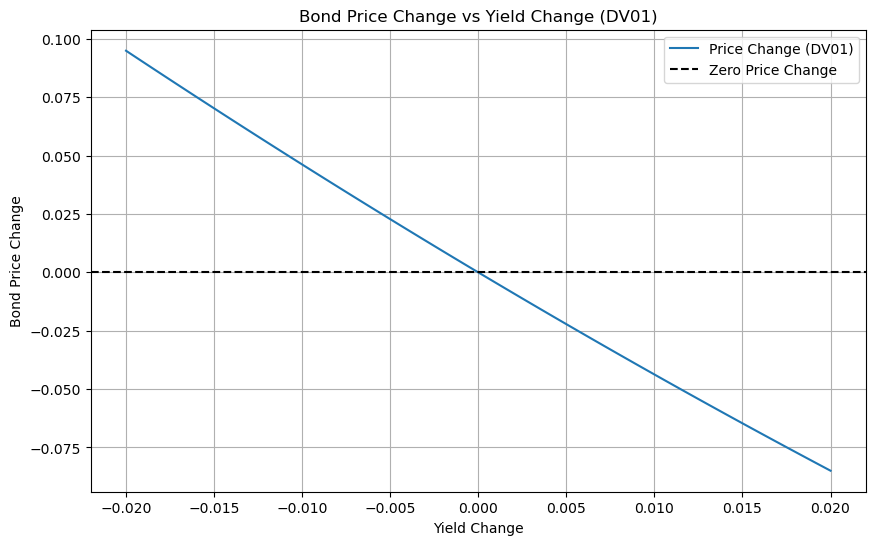

In [305]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate bond price change using DV01, duration, and convexity
def calculate_price_change(dv01, duration, convexity, yield_change):
    return -duration * yield_change + 0.5 * convexity * (yield_change ** 2)

# Set parameters
bond_duration = 4.5  # Macaulay duration of the bond
bond_convexity = 25  # Convexity of the bond
bond_dv01 = 0.04  # DV01 of the bond (per 1 basis point change in yield)
yield_change_range = np.linspace(-0.02, 0.02, 100)  # Range of yield changes

# Calculate bond price changes using DV01
price_changes_dv01 = calculate_price_change(bond_dv01, bond_duration, bond_convexity, yield_change_range)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the relationship between yield changes and bond price changes using DV01
plt.plot(yield_change_range, price_changes_dv01, label="Price Change (DV01)")

plt.title("Bond Price Change vs Yield Change (DV01)")
plt.xlabel("Yield Change")
plt.ylabel("Bond Price Change")
plt.axhline(0, color="black", linestyle="--", label="Zero Price Change")
plt.legend()
plt.grid(True)
plt.show()


### Modelling Non-Parallel Term Structure Shifts and Hedging

**Modelling Non-Parallel Term Structure Shifts and Hedging**

**1. Non-Parallel Term Structure Shifts:**

   a. **Definition:**
      - Non-parallel term structure shifts refer to changes in the yield curve where interest rates shift by different magnitudes at different maturities.

   b. **Modeling Techniques:**
      - Non-parallel shifts can be modeled using advanced interest rate models, such as the Heath-Jarrow-Morton (HJM) framework or multifactor models that allow for varying movements at different points on the yield curve.

   c. **Factor Analysis:**
      - Understanding the factors driving interest rate movements across different maturities is crucial. Factors may include economic indicators, inflation expectations, and central bank policies.

**2. Hedging Non-Parallel Shifts:**

   a. **Dynamic Hedging:**
      - Dynamic hedging involves adjusting positions in response to changing market conditions. For non-parallel shifts, continuously monitoring and adjusting the hedge positions is essential.

   b. **Scenario Analysis:**
      - Conduct scenario analysis to assess the impact of potential non-parallel shifts on the portfolio. This helps in identifying key risk factors and tailoring hedging strategies accordingly.

   c. **Options and Derivatives:**
      - Utilize interest rate options and derivatives to hedge against non-parallel shifts. Instruments like swaptions or options on bond futures can provide flexibility in managing specific risks.

   d. **Duration Matching:**
      - Duration matching, which involves aligning the portfolio's duration with the duration of its liabilities or a benchmark, can be effective in managing interest rate risk arising from non-parallel shifts.

**3. Challenges and Considerations:**

   a. **Complexity of Models:**
      - Modeling non-parallel shifts can be complex, requiring sophisticated models and a deep understanding of market dynamics.

   b. **Liquidity and Transaction Costs:**
      - Consideration of liquidity and transaction costs is crucial when implementing hedging strategies, especially in less liquid markets or for portfolios with larger positions.

   c. **Monitoring and Adjusting:**
      - Continuous monitoring of the yield curve and economic factors influencing interest rates is necessary for effective hedging. Regularly adjust hedges based on new information and changing market conditions.

**4. Integration with Risk Management:**

   a. **Stress Testing:**
      - Incorporate stress testing scenarios involving non-parallel shifts to assess the resilience of the portfolio under adverse conditions.

   b. **Risk Attribution:**
      - Understand the contribution of non-parallel shifts to overall portfolio risk. This helps in prioritizing hedging strategies and allocating resources effectively.

**5. Communication and Reporting:**

   a. **Transparent Reporting:**
      - Clearly communicate the potential impact of non-parallel shifts on the portfolio to stakeholders. Transparent reporting enhances risk awareness and facilitates informed decision-making.

   b. **Educating Stakeholders:**
      - Educate stakeholders, including investors and internal teams, about the complexities of non-parallel shifts and the strategies in place to manage such risks.

In summary, modeling and hedging non-parallel term structure shifts require a combination of advanced modeling techniques, dynamic hedging strategies, and a deep understanding of market dynamics. A proactive and adaptive approach, along with effective risk management practices, is crucial for navigating the challenges posed by non-parallel shifts in the yield curve.

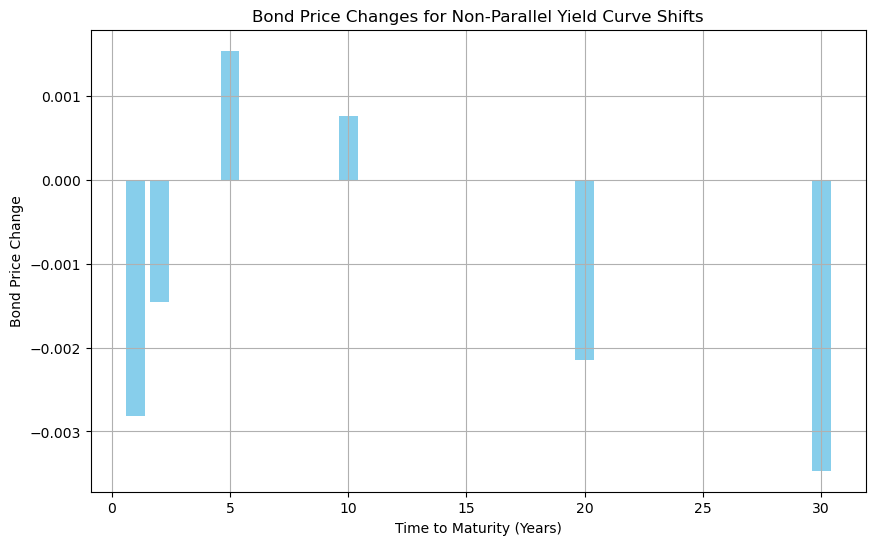

In [306]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate bond price change for non-parallel shifts
def calculate_non_parallel_price_change(dv01, duration, convexity, yield_changes):
    price_changes = -duration * yield_changes + 0.5 * convexity * (yield_changes ** 2)
    return dv01 * price_changes

# Set parameters
bond_duration = 5  # Macaulay duration of the bond
bond_convexity = 30  # Convexity of the bond
bond_dv01 = 0.03  # DV01 of the bond (per 1 basis point change in yield)

# Create non-parallel yield changes
tenors = np.array([1, 2, 5, 10, 20, 30])
non_parallel_yield_changes = np.array([0.02, 0.01, -0.01, -0.005, 0.015, 0.025])

# Calculate bond price changes for non-parallel shifts
price_changes_non_parallel = calculate_non_parallel_price_change(bond_dv01, bond_duration, bond_convexity, non_parallel_yield_changes)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the relationship between tenors and bond price changes for non-parallel shifts
plt.bar(tenors, price_changes_non_parallel, color='skyblue')
plt.title("Bond Price Changes for Non-Parallel Yield Curve Shifts")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Bond Price Change")
plt.grid(True)
plt.show()


### Hedging

**Applying Duration, Convexity, and DV01 in Hedging Strategies**

**1. **Duration Hedging:**

   a. **Definition:**
      - Duration hedging involves adjusting the duration of a portfolio to match the duration of its liabilities or a benchmark. This helps mitigate interest rate risk.

   b. **Implementation:**
      - Increase or decrease the portfolio's duration using bond positions or derivatives to offset potential losses or gains due to interest rate movements.

   c. **Objective:**
      - The goal is to create a duration-neutral position, where changes in interest rates have a minimal impact on the portfolio's value.

**2. Convexity Hedging:**

   a. **Definition:**
      - Convexity hedging aims to offset the impact of non-linear bond price changes by adjusting the portfolio's convexity.

   b. **Implementation:**
      - Utilize options or other convexity-related instruments to hedge against potential losses from large interest rate movements.

   c. **Objective:**
      - Reduce the impact of non-parallel shifts in the yield curve by accounting for the curvature in the bond price-yield relationship.

**3. DV01 Hedging:**

   a. **Definition:**
      - DV01 hedging involves adjusting the portfolio's DV01 to match that of its liabilities or a benchmark. DV01 represents the dollar value change for a 1 basis point change in yield.

   b. **Implementation:**
      - Modify bond positions or use interest rate derivatives to align the portfolio's sensitivity to interest rate changes with the desired benchmark.

   c. **Objective:**
      - Minimize the impact of small interest rate changes on the portfolio's value by creating a DV01-neutral position.

**4. Integrated Hedging Strategies:**

   a. **Combined Approach:**
      - Combining duration, convexity, and DV01 hedging strategies allows for a comprehensive risk management approach, addressing both linear and non-linear aspects of interest rate risk.

   b. **Dynamic Adjustments:**
      - Continuously monitor the portfolio's exposure to interest rate risk and dynamically adjust hedges based on changes in market conditions and economic factors.

**5. Risk Mitigation and Performance:**

   a. **Risk Reduction:**
      - Hedging using duration, convexity, and DV01 contributes to overall risk reduction, making the portfolio more resilient to interest rate fluctuations.

   b. **Performance Attribution:**
      - Regularly assess the contribution of each hedging strategy to the portfolio's overall performance and risk profile.

**6. Considerations and Challenges:**

   a. **Liquidity and Transaction Costs:**
      - Consider the liquidity of the hedging instruments and transaction costs when implementing and adjusting hedges.

   b. **Model Accuracy:**
      - Ensure that the models used for measuring duration, convexity, and DV01 accurately represent the market conditions and the portfolio's characteristics.

**7. Reporting and Communication:**

   a. **Transparent Reporting:**
      - Communicate the impact of hedging strategies transparently to stakeholders, providing insights into risk management practices.

   b. **Educating Stakeholders:**
      - Educate stakeholders about the rationale behind the chosen hedging strategies and their role in preserving the portfolio's value under different interest rate scenarios.

In summary, applying Duration, Convexity, and DV01 in hedging strategies involves a nuanced and dynamic approach to manage interest rate risk effectively. A combination of these strategies, tailored to the specific characteristics of the portfolio, enhances risk mitigation and contributes to overall portfolio performance.

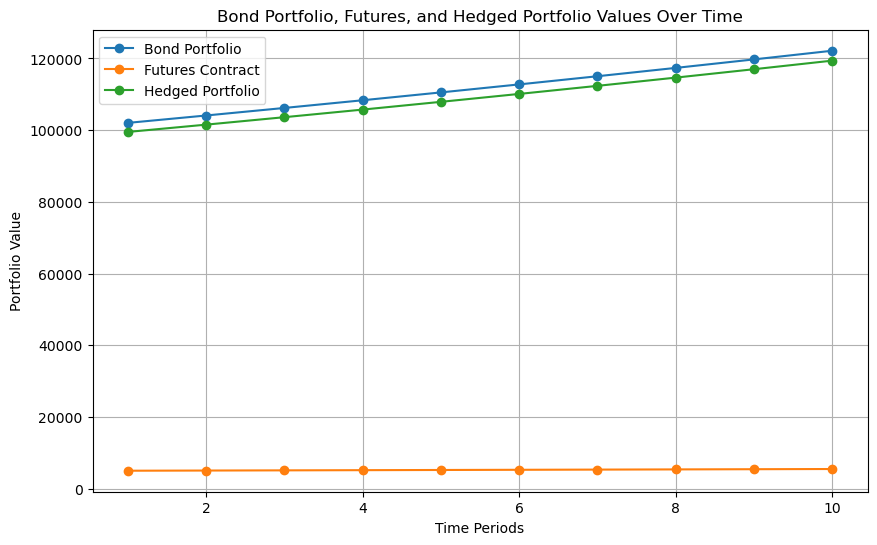

In [307]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate hedged bond portfolio value
def calculate_hedged_portfolio_value(bond_value, futures_value, hedge_ratio):
    return bond_value - hedge_ratio * futures_value

# Set parameters
initial_bond_value = 100000  # Initial value of the bond portfolio
initial_futures_value = 5000  # Initial value of the futures contract
hedge_ratio = 0.5  # Hedge ratio indicating the proportion of the bond portfolio value hedged with futures

# Create time array
time_periods = np.arange(1, 11)

# Simulate bond portfolio and futures values over time
bond_portfolio_values = initial_bond_value * np.exp(0.02 * time_periods)  # Example bond portfolio growth
futures_values = initial_futures_value * np.exp(0.01 * time_periods)  # Example futures contract growth

# Calculate hedged portfolio values
hedged_portfolio_values = calculate_hedged_portfolio_value(bond_portfolio_values, futures_values, hedge_ratio)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the growth of bond portfolio, futures, and hedged portfolio values over time
plt.plot(time_periods, bond_portfolio_values, label='Bond Portfolio', marker='o')
plt.plot(time_periods, futures_values, label='Futures Contract', marker='o')
plt.plot(time_periods, hedged_portfolio_values, label='Hedged Portfolio', marker='o')

plt.title("Bond Portfolio, Futures, and Hedged Portfolio Values Over Time")
plt.xlabel("Time Periods")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


### Interest Rate Risk Hedging

**Interest Rate Risk Hedging**

**1. Understanding Interest Rate Risk:**

   a. **Definition:**
      - Interest rate risk refers to the potential impact of changes in interest rates on the value of financial instruments, particularly fixed-income securities.

   b. **Sources of Risk:**
      - Interest rate risk can arise from changes in market interest rates, affecting bond prices, loan values, and the overall value of interest-sensitive instruments.

**2. Types of Interest Rate Risk Hedging:**

   a. **Duration Hedging:**
      - **Objective:** Align the duration of a portfolio with its liabilities or a benchmark to minimize the impact of interest rate changes.
      - **Implementation:** Adjust bond positions or use interest rate derivatives to create a duration-neutral position.

   b. **Convexity Hedging:**
      - **Objective:** Mitigate the impact of non-linear bond price changes by incorporating convexity in hedging strategies.
      - **Implementation:** Utilize options or other convexity-related instruments to offset potential losses from large interest rate movements.

   c. **DV01 Hedging:**
      - **Objective:** Minimize the impact of small interest rate changes by aligning the portfolio's DV01 with a desired benchmark.
      - **Implementation:** Modify bond positions or use interest rate derivatives to create a DV01-neutral position.

   d. **Basis Risk Hedging:**
      - **Objective:** Manage basis risk, which arises from the imperfect correlation between the interest rate of the hedging instrument and the underlying exposure.
      - **Implementation:** Select hedging instruments with a closer correlation to the specific interest rate exposure being hedged.

**3. Instruments for Hedging:**

   a. **Interest Rate Swaps:**
      - **Usage:** Swap fixed-rate payments for floating-rate payments or vice versa to manage interest rate exposure.

   b. **Interest Rate Options:**
      - **Usage:** Options provide flexibility in hedging strategies, allowing investors to protect against adverse rate movements.

   c. **Futures Contracts:**
      - **Usage:** Futures contracts can be used to hedge against interest rate changes, particularly for standardized exposures.

   d. **Forward Rate Agreements (FRAs):**
      - **Usage:** FRAs provide a forward contract to lock in an interest rate for a future period, reducing uncertainty.

**4. Considerations in Interest Rate Risk Hedging:**

   a. **Liquidity and Transaction Costs:**
      - Consider the liquidity of hedging instruments and assess transaction costs to ensure cost-effective implementation.

   b. **Market Conditions:**
      - Regularly reassess market conditions and economic factors influencing interest rates to make dynamic adjustments to hedging strategies.

   c. **Model Accuracy:**
      - Ensure that the models used for measuring interest rate risk and the effectiveness of hedges accurately represent market conditions.

**5. Risk Mitigation Strategies:**

   a. **Diversification:**
      - Diversify the portfolio to include a mix of assets with varying interest rate sensitivities, reducing overall exposure to interest rate risk.

   b. **Stress Testing:**
      - Conduct stress tests to assess how the portfolio would perform under extreme interest rate scenarios and adjust hedging strategies accordingly.

**6. Communication and Reporting:**

   a. **Transparent Reporting:**
      - Communicate the impact of interest rate risk hedging strategies transparently to stakeholders, providing insights into risk management practices.

   b. **Educating Stakeholders:**
      - Educate stakeholders about the importance of interest rate risk hedging and the strategies in place to preserve the portfolio's value.

In summary, effective interest rate risk hedging involves a combination of duration, convexity, DV01, and basis risk management strategies using various financial instruments. Regular monitoring, dynamic adjustments, and transparent communication are key elements in successfully mitigating interest rate risk and preserving the value of portfolios.

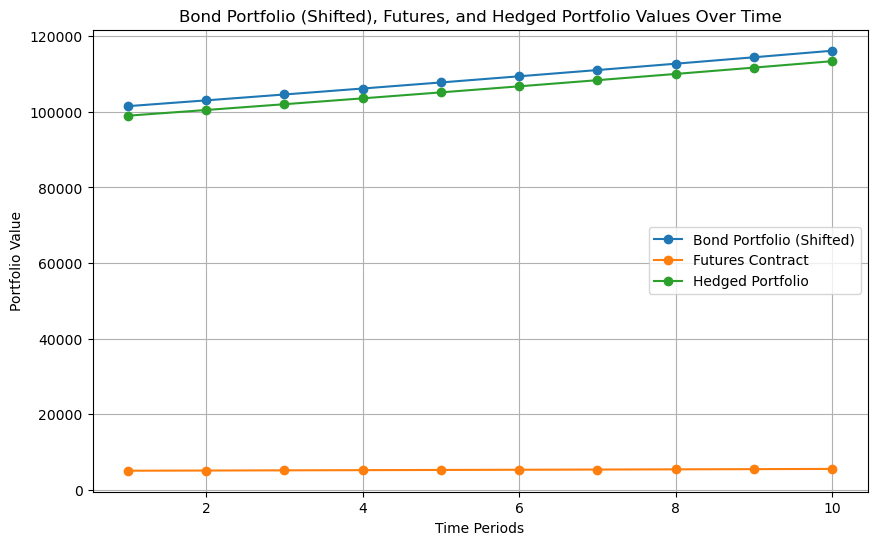

In [308]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate hedged bond portfolio value
def calculate_hedged_portfolio_value(bond_value, futures_value, hedge_ratio):
    return bond_value - hedge_ratio * futures_value

# Set parameters
initial_bond_value = 100000  # Initial value of the bond portfolio
initial_futures_value = 5000  # Initial value of the futures contract
hedge_ratio = 0.5  # Hedge ratio indicating the proportion of the bond portfolio value hedged with futures

# Create time array
time_periods = np.arange(1, 11)

# Simulate bond portfolio and futures values over time with a non-parallel term structure shift
bond_portfolio_values = initial_bond_value * np.exp(0.02 * time_periods)  # Example bond portfolio growth
futures_values = initial_futures_value * np.exp(0.01 * time_periods)  # Example futures contract growth

# Introduce a non-parallel term structure shift
term_structure_shift = 0.005 * time_periods  # Non-parallel shift in interest rates
bond_portfolio_values_shifted = bond_portfolio_values * np.exp(-term_structure_shift)

# Calculate hedged portfolio values considering the term structure shift
hedged_portfolio_values = calculate_hedged_portfolio_value(bond_portfolio_values_shifted, futures_values, hedge_ratio)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the growth of bond portfolio, futures, and hedged portfolio values over time
plt.plot(time_periods, bond_portfolio_values_shifted, label='Bond Portfolio (Shifted)', marker='o')
plt.plot(time_periods, futures_values, label='Futures Contract', marker='o')
plt.plot(time_periods, hedged_portfolio_values, label='Hedged Portfolio', marker='o')

plt.title("Bond Portfolio (Shifted), Futures, and Hedged Portfolio Values Over Time")
plt.xlabel("Time Periods")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


### Duration Matching

**Duration Matching in Interest Rate Risk Management**

**1. Definition:**
   - **Duration Matching:** Duration matching is a risk management strategy that involves aligning the duration of a portfolio with the duration of its liabilities or a specific benchmark. Duration is a measure of the sensitivity of the price of a fixed-income security to changes in interest rates.

**2. Objectives:**
   - **Minimizing Interest Rate Risk:** The primary objective of duration matching is to minimize the impact of interest rate movements on the value of the portfolio. By matching durations, the percentage change in the value of the portfolio is expected to closely mirror the percentage change in the value of the benchmark or liabilities.

**3. How Duration Matching Works:**
   - **Duration as a Sensitivity Measure:** Duration reflects the sensitivity of a bond's or a portfolio's price to changes in interest rates. It represents the weighted average time it takes for the present value of cash flows to be repaid.
   - **Duration of Liabilities:** Matching the duration of a portfolio with the duration of liabilities ensures that the two move in sync, reducing the risk of mismatches in interest rate sensitivity.

**4. Implementation:**
   - **Adjusting Bond Portfolio:** To implement duration matching, the portfolio manager adjusts the composition of the bond portfolio to achieve a duration that closely matches the duration of the liabilities or the chosen benchmark.
   - **Use of Derivatives:** Derivatives such as interest rate swaps or futures can also be employed to adjust the portfolio's duration without necessarily buying or selling bonds.

**5. Benefits of Duration Matching:**
   - **Reduced Price Volatility:** Duration matching helps reduce the price volatility of the portfolio in response to interest rate changes.
   - **Preservation of Value:** During periods of rising interest rates, duration matching helps preserve the value of the portfolio, mitigating potential losses.

**6. Considerations:**
   - **Liability Characteristics:** Understanding the characteristics of the liabilities, such as their cash flow patterns and durations, is crucial for effective duration matching.
   - **Dynamic Nature:** Interest rate environments can change, and duration matching may need to be adjusted dynamically to maintain its effectiveness.

**7. Challenges:**
   - **Changing Market Conditions:** Sustained changes in interest rates or shifts in the yield curve can pose challenges to maintaining an effective duration match.
   - **Constraints on Assets:** Limited availability of bonds with specific durations may constrain the ability to perfectly match durations.

**8. Alternatives to Duration Matching:**
   - **Immunization:** Immunization is another strategy that aims to make the portfolio's value relatively insensitive to interest rate changes, but it involves ensuring that the present value of assets matches the present value of liabilities at a specific future date.

**9. Communication:**
   - **Transparent Communication:** Communicating the strategy and rationale for duration matching to stakeholders is important for transparency and understanding.

**10. Integration with Risk Management:**
   - **Risk Assessment:** Duration matching is part of a broader risk management framework that includes assessing various risks, such as credit risk and liquidity risk.

In summary, duration matching is a key strategy in interest rate risk management, providing a systematic approach to aligning the interest rate sensitivity of a portfolio with its liabilities or a chosen benchmark. It aims to minimize the impact of interest rate movements on the portfolio's value, contributing to a more stable and predictable investment performance.

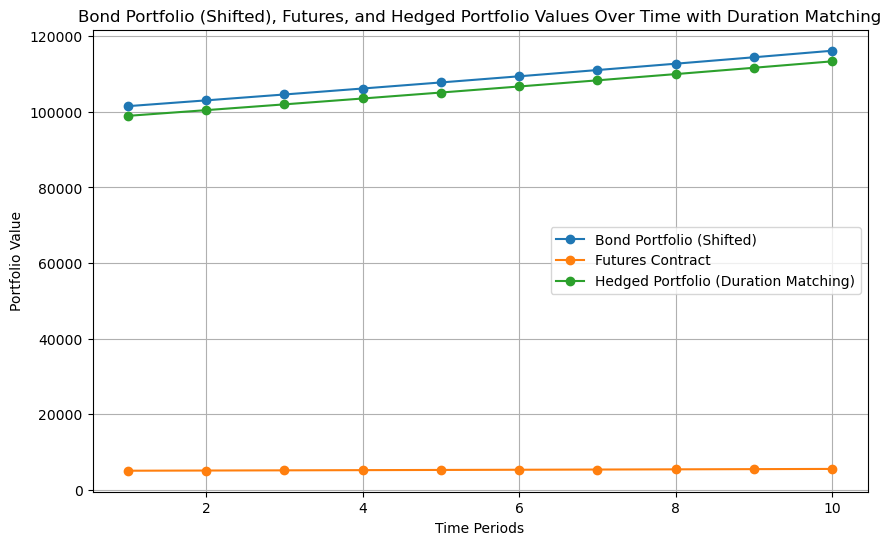

In [309]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate duration of a bond
def calculate_duration(cash_flows, periods):
    weighted_cash_flows = cash_flows * periods
    total_present_value = np.sum(cash_flows / (1 + periods))
    return np.sum(weighted_cash_flows) / total_present_value

# Function to calculate hedged bond portfolio value with duration matching
def calculate_hedged_portfolio_value_duration_matching(bond_value, futures_value, hedge_ratio, bond_duration, futures_duration):
    hedge_effectiveness = bond_duration / futures_duration
    return bond_value - hedge_ratio * hedge_effectiveness * futures_value

# Set parameters
initial_bond_value = 100000  # Initial value of the bond portfolio
initial_futures_value = 5000  # Initial value of the futures contract
hedge_ratio = 0.5  # Hedge ratio indicating the proportion of the bond portfolio value hedged with futures

# Create time array
time_periods = np.arange(1, 11)

# Simulate bond portfolio and futures values over time with a non-parallel term structure shift
bond_portfolio_values = initial_bond_value * np.exp(0.02 * time_periods)  # Example bond portfolio growth
futures_values = initial_futures_value * np.exp(0.01 * time_periods)  # Example futures contract growth

# Introduce a non-parallel term structure shift
term_structure_shift = 0.005 * time_periods  # Non-parallel shift in interest rates
bond_portfolio_values_shifted = bond_portfolio_values * np.exp(-term_structure_shift)

# Calculate durations of bond portfolio and futures
bond_duration = calculate_duration(bond_portfolio_values_shifted, time_periods)
futures_duration = calculate_duration(futures_values, time_periods)

# Calculate hedged portfolio values considering the term structure shift and duration matching
hedged_portfolio_values_duration_matching = calculate_hedged_portfolio_value_duration_matching(
    bond_portfolio_values_shifted, futures_values, hedge_ratio, bond_duration, futures_duration
)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the growth of bond portfolio, futures, and hedged portfolio values over time
plt.plot(time_periods, bond_portfolio_values_shifted, label='Bond Portfolio (Shifted)', marker='o')
plt.plot(time_periods, futures_values, label='Futures Contract', marker='o')
plt.plot(
    time_periods, hedged_portfolio_values_duration_matching, label='Hedged Portfolio (Duration Matching)', marker='o'
)

plt.title("Bond Portfolio (Shifted), Futures, and Hedged Portfolio Values Over Time with Duration Matching")
plt.xlabel("Time Periods")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


### Immunisation

**Immunization in Interest Rate Risk Management**

**1. Definition:**
   - **Immunization:** Immunization is an investment strategy employed in interest rate risk management to make the portfolio's value relatively insensitive to changes in interest rates. The goal is to ensure that the present value of assets matches the present value of liabilities at a specific future date.

**2. Objectives:**
   - **Liability Protection:** The primary objective of immunization is to protect against interest rate movements that could impact the value of the portfolio, especially when there are future obligations or liabilities.

**3. How Immunization Works:**
   - **Duration Matching:** Similar to duration matching, immunization often involves matching the duration of the portfolio with the duration of liabilities or a specific future date.
   - **Cash Flow Matching:** Immunization may also involve matching the cash flow patterns of assets and liabilities to ensure that the portfolio can meet future obligations.

**4. Components of Immunization:**
   - **Duration and Convexity:** Immunization considers not only duration but also convexity, accounting for the non-linear relationship between bond prices and interest rates.

**5. Components of Immunization:**
   - **Passive and Active Immunization:** 
      - **Passive Immunization:** A static strategy where the portfolio is structured to match the interest rate sensitivity of liabilities.
      - **Active Immunization:** A dynamic strategy that involves adjusting the portfolio over time to maintain protection against interest rate risk.

**6. Benefits of Immunization:**
   - **Protection Against Interest Rate Risk:** Immunization aims to protect the portfolio against interest rate movements, ensuring that the value is preserved even if rates change.
   - **Predictable Cash Flows:** Matching cash flows helps ensure that the portfolio can meet future obligations with a high degree of predictability.

**7. Challenges:**
   - **Yield Curve Shifts:** Sustained shifts in the yield curve can pose challenges to maintaining an effective immunization strategy.
   - **Reinvestment Risk:** Immunization strategies may be affected by reinvestment risk, especially if the interest earned on cash flows cannot be reinvested at the same rate.

**8. Alternatives to Immunization:**
   - **Duration Matching:** Immunization often involves duration matching, but the two concepts may be applied in slightly different contexts.
   - **Liability-Driven Investing (LDI):** LDI is an approach that involves managing a portfolio to meet specific liabilities, often using derivatives.

**9. Communication:**
   - **Transparent Communication:** Clearly communicating the immunization strategy to stakeholders is essential for transparency and understanding.

**10. Integration with Risk Management:**
   - **Comprehensive Risk Management:** Immunization is part of a broader risk management framework that considers various risks, including credit risk, liquidity risk, and market risk.

In summary, immunization is a strategic approach to interest rate risk management, aiming to make a portfolio's value less susceptible to changes in interest rates. It involves aligning the characteristics of the portfolio with future obligations or liabilities to ensure a more predictable and stable financial position.

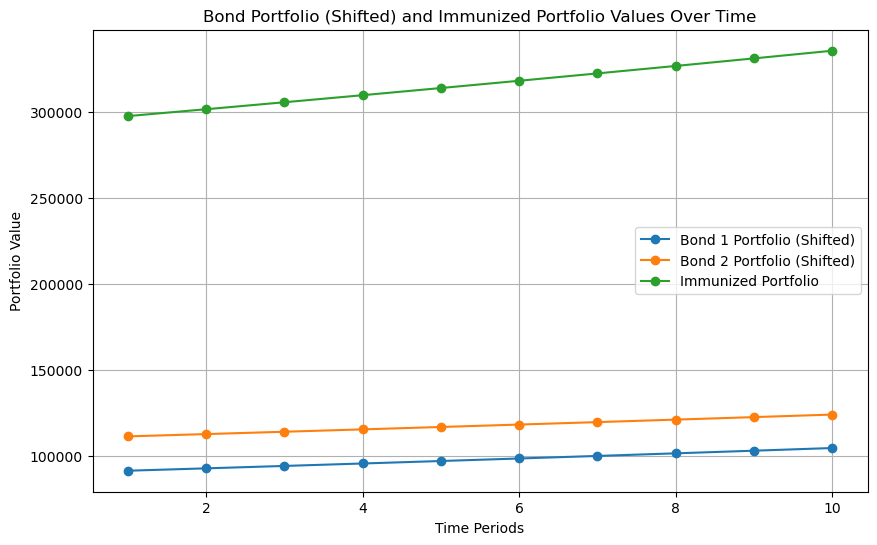

In [310]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate present value of future cash flows
def present_value(cash_flows, periods, discount_rate):
    return cash_flows / (1 + discount_rate) ** periods

# Function to calculate modified duration of a bond
def calculate_modified_duration(cash_flows, periods, discount_rate):
    present_values = present_value(cash_flows, periods, discount_rate)
    weighted_present_values = present_values * periods
    total_present_value = np.sum(present_values)
    return np.sum(weighted_present_values) / total_present_value

# Function to calculate immunized bond portfolio value
def calculate_immunized_portfolio_value(bond_values, discount_rate, target_duration):
    modified_durations = [calculate_modified_duration(bond_values[i], np.arange(1, len(bond_values[i]) + 1), discount_rate) for i in range(len(bond_values))]
    weights = [1 / len(bond_values) for _ in range(len(bond_values))]
    portfolio_duration = np.sum(np.multiply(modified_durations, weights))
    
    # Adjust bond values to immunize the portfolio
    immunization_factor = target_duration / portfolio_duration
    immunized_bond_values = [immunization_factor * bond_values[i] for i in range(len(bond_values))]
    
    return np.sum(immunized_bond_values, axis=0)

# Set parameters
discount_rate = 0.02  # Discount rate used for present value calculations
target_duration = 8  # Target duration for immunization

# Create time array
time_periods = np.arange(1, 11)

# Simulate bond portfolio values over time with a non-parallel term structure shift
bond_portfolio_values = np.array([
    90000 * np.exp(0.02 * time_periods),  # Example bond 1 portfolio growth
    110000 * np.exp(0.015 * time_periods)  # Example bond 2 portfolio growth
])

# Introduce a non-parallel term structure shift
term_structure_shift = np.array([
    0.005 * time_periods,  # Non-parallel shift in interest rates for bond 1
    0.003 * time_periods  # Non-parallel shift in interest rates for bond 2
])

# Adjust bond values based on the term structure shift
bond_values_shifted = bond_portfolio_values * np.exp(-term_structure_shift)

# Calculate immunized portfolio value
immunized_portfolio_value = calculate_immunized_portfolio_value(bond_values_shifted, discount_rate, target_duration)

# Display results
plt.figure(figsize=(10, 6))

# Plotting the growth of bond portfolio values and immunized portfolio value over time
for i in range(len(bond_portfolio_values)):
    plt.plot(time_periods, bond_values_shifted[i], label=f'Bond {i + 1} Portfolio (Shifted)', marker='o')

plt.plot(time_periods, immunized_portfolio_value, label='Immunized Portfolio', marker='o')

plt.title("Bond Portfolio (Shifted) and Immunized Portfolio Values Over Time")
plt.xlabel("Time Periods")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()


### Hedging with Derivatives

**Hedging with Derivatives in Risk Management**

**1. Introduction to Derivatives:**
   - **Definition:** Derivatives are financial instruments whose value is derived from an underlying asset, index, or rate. Common types include futures, options, and swaps.

**2. Purpose of Hedging with Derivatives:**
   - **Risk Mitigation:** The primary purpose of hedging with derivatives is to mitigate various financial risks, including interest rate risk, currency risk, commodity price risk, and equity price risk.

**3. Common Derivatives Used in Hedging:**
   - **Futures Contracts:**
      - **Usage:** Futures contracts are agreements to buy or sell an asset at a predetermined future date and price.
      - **Hedging Application:** Used to hedge against price movements in commodities, currencies, or financial indices.

   - **Options:**
      - **Usage:** Options provide the right, but not the obligation, to buy or sell an asset at a specified price before or at expiration.
      - **Hedging Application:** Used to protect against unfavorable price movements while allowing for potential gains.

   - **Swaps:**
      - **Usage:** Swaps involve exchanging cash flows or other financial instruments between parties.
      - **Hedging Application:** Used for interest rate swaps to manage interest rate exposure or currency swaps to hedge against currency fluctuations.

**4. Interest Rate Hedging with Derivatives:**
   - **Interest Rate Swaps:**
      - **Application:** Swapping fixed-rate payments for floating-rate payments or vice versa to manage interest rate exposure.
      - **Objective:** Protect against interest rate fluctuations and achieve a desired interest rate profile.

   - **Interest Rate Futures:**
      - **Application:** Using futures contracts based on interest rates to hedge against changes in interest rates.
      - **Objective:** Locking in future interest rates to reduce uncertainty.

   - **Interest Rate Options:**
      - **Application:** Using options to hedge against adverse interest rate movements.
      - **Objective:** Providing flexibility in managing interest rate risk while limiting potential losses.

**5. Currency Hedging with Derivatives:**
   - **Currency Futures:**
      - **Application:** Hedging against currency fluctuations using futures contracts.
      - **Objective:** Mitigating the impact of exchange rate movements on international transactions.

   - **Currency Options:**
      - **Application:** Using options to hedge currency risk.
      - **Objective:** Providing flexibility in managing currency exposure while limiting downside risk.

**6. Equity Hedging with Derivatives:**
   - **Equity Futures:**
      - **Application:** Using futures contracts on stock indices to hedge against changes in equity markets.
      - **Objective:** Protecting a portfolio from adverse movements in the broader equity market.

   - **Equity Options:**
      - **Application:** Hedging individual stock positions or portfolios using options.
      - **Objective:** Managing downside risk while allowing for potential upside.

**7. Risk Management Considerations:**
   - **Liquidity and Counterparty Risk:** Consider the liquidity of derivatives and assess counterparty risk, especially in over-the-counter (OTC) markets.

   - **Costs and Benefits:** Evaluate the costs associated with derivative transactions, including transaction costs and potential margin requirements, against the benefits of risk reduction.

   - **Dynamic Adjustments:** Derivative positions may need to be dynamically adjusted as market conditions change to maintain effective risk mitigation.

**8. Communication and Reporting:**
   - **Transparent Communication:** Clearly communicate the rationale behind derivative-based hedging strategies to stakeholders, emphasizing risk reduction and portfolio protection.

**9. Regulatory Compliance:**
   - **Adherence to Regulations:** Ensure compliance with applicable regulations and accounting standards related to derivative transactions.

In summary, hedging with derivatives is a common and effective strategy for managing various financial risks. Whether used to hedge interest rate, currency, or equity exposures, derivatives provide flexibility in tailoring risk management strategies to specific needs and market conditions. However, careful consideration of risks, costs, and regulatory requirements is essential for successful derivative-based hedging.

Macaulay Duration: 8.27 years
Convexity: 80.02
DV01: 124.08
Change in Bond Price for a 1% Increase in Yield: $-118.07
Number of Futures Contracts Needed for Hedging: -95162.83


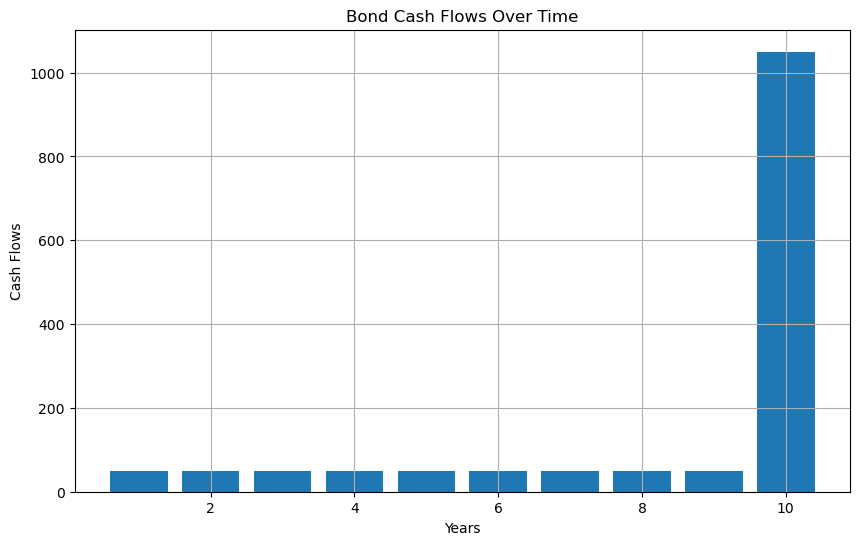

In [311]:
# Define the function to calculate Macaulay Duration and Convexity
def calculate_duration_convexity(cash_flows, discount_rate):
    durations = [(t * cf) / (1 + discount_rate)**t for t, cf in enumerate(cash_flows, start=1)]
    convexities = [(t * (t + 1) * cf) / (1 + discount_rate)**(t + 2) for t, cf in enumerate(cash_flows, start=1)]
    total_present_value = sum([cf / (1 + discount_rate)**t for t, cf in enumerate(cash_flows, start=1)])
    total_duration = sum(durations)
    total_convexity = sum(convexities)
    return total_duration / total_present_value, total_convexity / total_present_value

# Define bond parameters
face_value = 1000  # Face value of the bond
coupon_rate = 0.05  # Annual coupon rate (5%)
years_to_maturity = 10  # Years to maturity
discount_rate = 0.03  # Discount rate or yield to maturity

# Calculate annual coupon payments
coupon_payments = face_value * coupon_rate

# Generate cash flows for the bond
cash_flows = [coupon_payments] * (years_to_maturity - 1)
cash_flows.append(coupon_payments + face_value)  # Include the face value at maturity

# Calculate Macaulay Duration and Convexity
macaulay_duration, convexity = calculate_duration_convexity(cash_flows, discount_rate)

# Calculate DV01 (dollar value of 01)
dv01 = macaulay_duration * 0.01 * sum(cash_flows)

# Display Duration, Convexity, and DV01
print(f'Macaulay Duration: {macaulay_duration:.2f} years')
print(f'Convexity: {convexity:.2f}')
print(f'DV01: {dv01:.2f}')

# Assume a parallel shift in the yield curve (e.g., 0.01 increase)
yield_shift = 0.01
new_discount_rate = discount_rate + yield_shift

# Calculate the change in bond price
price_change = -macaulay_duration * yield_shift * sum(cash_flows) + 0.5 * convexity * (yield_shift**2) * sum(cash_flows)

# Display the change in bond price
print(f'Change in Bond Price for a 1% Increase in Yield: ${price_change:.2f}')

# Hedge with futures contract
futures_contract_size = 100000  # Face value of the futures contract
futures_price_change = price_change / dv01 * futures_contract_size

# Display the number of futures contracts needed for hedging
print(f'Number of Futures Contracts Needed for Hedging: {futures_price_change:.2f}')

# Plotting the cash flows over time
plt.figure(figsize=(10, 6))
plt.bar(range(1, years_to_maturity + 1), cash_flows)
plt.title('Bond Cash Flows Over Time')
plt.xlabel('Years')
plt.ylabel('Cash Flows')
plt.grid(True)
plt.show()

# Binomial Trees

### What is a Binomial Tree

**Binomial Trees in Financial Modeling**

**1. Definition:**
   - A binomial tree is a mathematical model used in financial modeling to represent the possible price movements of an underlying asset over a series of discrete time steps. It is a discrete-time method for modeling the evolution of asset prices.

**2. Structure:**
   - The tree structure is constructed with nodes representing different points in time, and branches representing possible price movements. The tree starts at a point representing the current asset price.

**3. Key Components:**
   - **Nodes:** Each node in the tree represents a specific point in time.
   - **Branches:** Branches from each node represent the possible price movements (up or down).
   - **Probabilities:** Probabilities are assigned to each branch, typically representing the likelihood of an up or down movement.

**4. Binomial Model Formulas:**
   - **Up Movement:** The formula for calculating the price after an up movement is often based on a multiplier (e.g., \(S \times (1 + u)\), where \(u\) is the up factor).
   - **Down Movement:** Similarly, the price after a down movement is calculated using a down factor (e.g., \(S \times (1 + d)\), where \(d\) is the down factor).

**5. Parameters:**
   - **Time Steps (Periods):** The number of time steps determines the number of nodes in the tree and influences the granularity of the model.
   - **Up and Down Factors:** These factors determine the size of price movements at each step.

**6. Application in Option Pricing:**
   - Binomial trees are commonly used for option pricing, particularly for European and American options.
   - The tree is traversed backward, and option values are calculated at each node based on the potential future payoffs.

**7. Example Usage:**
   - For a European call option, the option value at a node is the discounted expected value of the option's payoff at that node.
   - For an American option, the option value is the maximum of the immediate exercise value and the discounted expected future option value.

**8. Advantages:**
   - **Flexibility:** Binomial trees can accommodate various models and assumptions, making them flexible for different financial scenarios.
   - **Intuitive Visualization:** The tree structure provides an intuitive visual representation of possible price paths.

**9. Limitations:**
   - **Discretization:** Binomial trees involve discretization, which may not capture the continuous nature of price movements.
   - **Sensitivity to Parameters:** The model's output can be sensitive to the choice of parameters, such as the number of time steps and the up/down factors.

**10. Variations:**
   - **Trinomial Trees:** An extension of the binomial tree that allows for three possible movements (up, down, or no change) at each node.

**11. Binomial Tree in Risk Management:**
   - Binomial trees are also used in risk management for scenario analysis and stress testing, providing a structured framework to evaluate potential future states.

In summary, a binomial tree is a dynamic and versatile model used in financial modeling, particularly for option pricing. Its structure allows for a step-by-step representation of possible price movements, making it a valuable tool for understanding and analyzing financial scenarios.

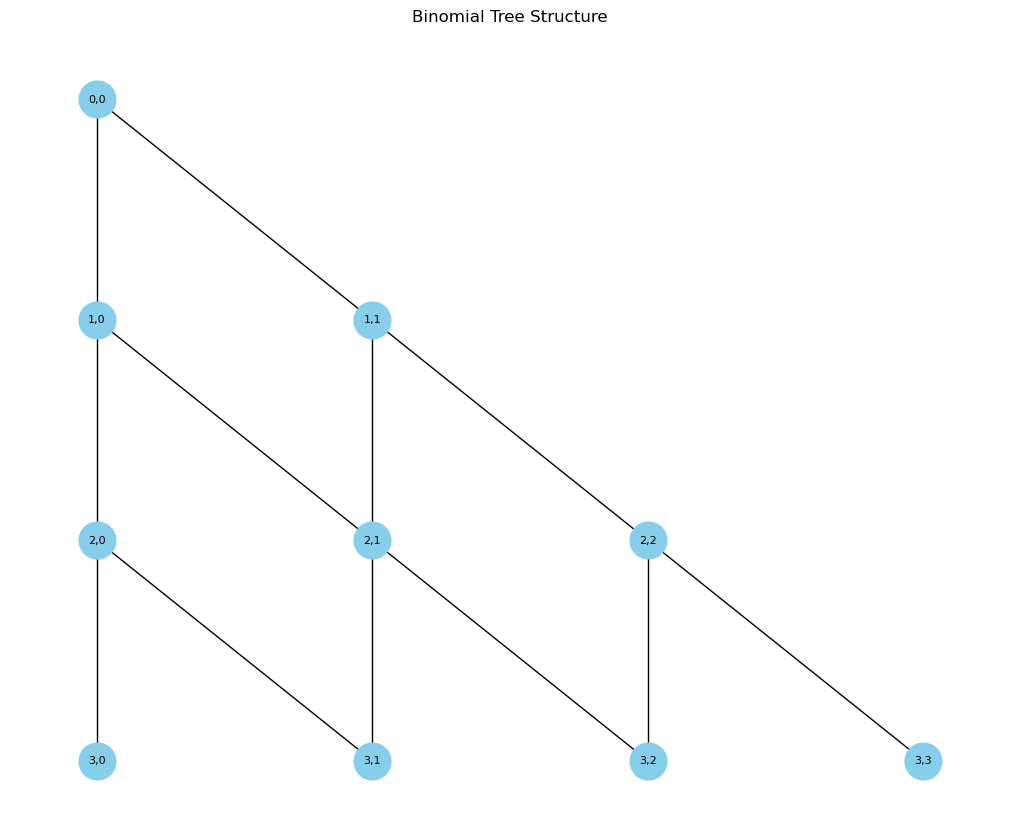

In [333]:
def generate_binomial_tree(time_steps):
    G = nx.Graph()
    node_labels = {}

    for i in range(time_steps + 1):
        for j in range(i + 1):
            node = (i, j)
            G.add_node(node)
            node_labels[node] = f'{i},{j}'

    for i in range(time_steps):
        for j in range(i + 1):
            current_node = (i, j)
            up_node = (i + 1, j)
            down_node = (i + 1, j + 1)

            G.add_edge(current_node, up_node)
            G.add_edge(current_node, down_node)

    return G, node_labels

def plot_binomial_tree(time_steps):
    G, node_labels = generate_binomial_tree(time_steps)

    pos = {}
    for node in G.nodes:
        pos[node] = (node[1], -node[0])

    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=False, node_size=700, node_color='skyblue', font_size=8)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black')
    plt.title('Binomial Tree Structure')
    plt.show()

# Example usage
time_steps = 3  # Adjust the number of time steps as needed
plot_binomial_tree(time_steps)

### Binomial Model Basics

**Basic Principles of the Binomial Model**

The binomial model is a fundamental tool in financial mathematics, widely used for option pricing and understanding the dynamics of asset prices over discrete time periods. Here are the basic principles of the binomial model:

**1. Discrete Time Steps:**
   - The binomial model operates in discrete time steps, dividing time into a series of periods. This discretization simplifies the modeling process.

**2. Tree Structure:**
   - The model is represented as a tree structure, with each node representing a specific point in time. The tree starts at the initial time and expands as time progresses.

**3. Up and Down Movements:**
   - At each node, there are two possible movements: an upward movement (usually denoted by \(u\)) and a downward movement (denoted by \(d\)). These movements represent potential changes in the underlying asset's price.

**4. Probability Assignments:**
   - Probabilities are assigned to the upward and downward movements. Commonly denoted as \(p\) for the probability of an up movement and \((1-p)\) for the probability of a down movement. These probabilities must sum to 1.

**5. Asset Price Calculations:**
   - The price of the underlying asset at each node is determined by multiplying the current price by the up or down factor. For example:
      - Upward Movement: \(S \times (1 + u)\)
      - Downward Movement: \(S \times (1 + d)\)
   - Here, \(S\) is the current asset price.

**6. Option Valuation:**
   - For option pricing, the model calculates the option value at each node based on the potential future payoffs. The option value at a node is the discounted expected value of the option's future payoffs.

**7. Backward Induction:**
   - The tree is traversed backward, starting from the final time step and moving towards the initial time. At each step, the option value is calculated based on the discounted expected future values.

**8. Risk-Neutral Pricing:**
   - The probabilities assigned to up and down movements are chosen to make the expected return on the option equal to the risk-free rate. This is known as risk-neutral pricing and simplifies the valuation process.

**9. Binomial Option Pricing Formula:**
   - The general formula for option pricing in a binomial model is derived from the principles mentioned above. For a European call option, the value at each node is given by:
      \[C = e^{-r\Delta t}(pC_u + (1-p)C_d)\]
      - \(C\) is the option value.
      - \(r\) is the risk-free rate.
      - \(\Delta t\) is the time step.
      - \(p\) is the probability of an up movement.
      - \(C_u\) and \(C_d\) are the option values for the up and down movements, respectively.

**10. Extensions:**
   - The basic binomial model can be extended to handle more complex situations, such as dividend payments, American options, and trinomial trees with three possible movements at each node.

Understanding the principles of the binomial model provides a foundation for option pricing and risk analysis, enabling financial professionals to make informed decisions in a variety of scenarios.

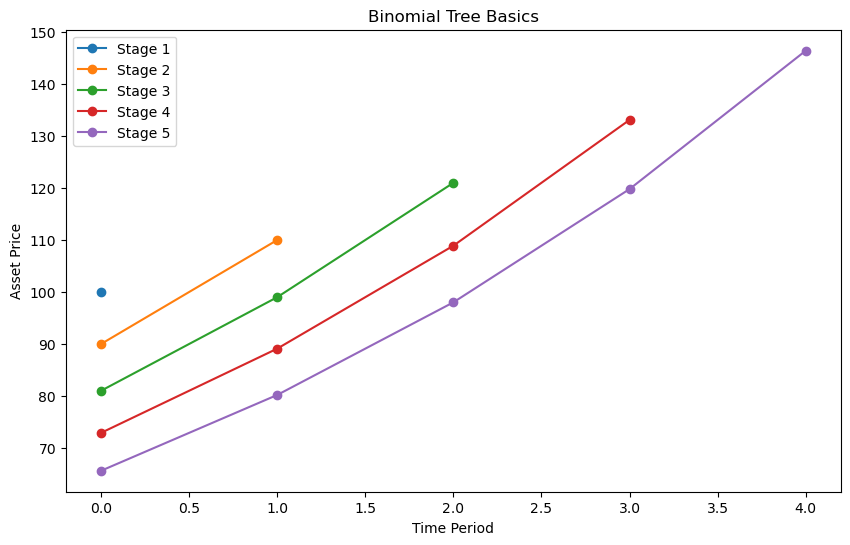


Initial Asset Price: $100
Up Factor: 1.1
Down Factor: 0.9
Number of Periods: 4

Binomial Tree:
[[100.     0.     0.     0.     0.  ]
 [ 90.   110.     0.     0.     0.  ]
 [ 81.    99.   121.     0.     0.  ]
 [ 72.9   89.1  108.9  133.1    0.  ]
 [ 65.61  80.19  98.01 119.79 146.41]]


In [312]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to generate a binomial tree
def generate_binomial_tree(initial_price, up_factor, down_factor, periods):
    tree = np.zeros((periods + 1, periods + 1))
    for i in range(periods + 1):
        for j in range(i + 1):
            tree[i, j] = initial_price * (up_factor ** j) * (down_factor ** (i - j))
    return tree

# Function to visualize a binomial tree
def plot_binomial_tree(tree, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    for i in range(tree.shape[0]):
        plt.plot(tree[i, :i + 1], 'o-', label=f'Stage {i + 1}')
    plt.xlabel('Time Period')
    plt.ylabel('Asset Price')
    plt.legend()
    plt.show()

# Set parameters
initial_price = 100  # Initial price of the asset
up_factor = 1.1  # Up factor for the binomial tree
down_factor = 0.9  # Down factor for the binomial tree
periods = 4  # Number of time periods

# Generate and plot a binomial tree
binomial_tree = generate_binomial_tree(initial_price, up_factor, down_factor, periods)
plot_binomial_tree(binomial_tree, 'Binomial Tree Basics')

# Display results
print(f"\nInitial Asset Price: ${initial_price}\nUp Factor: {up_factor}\nDown Factor: {down_factor}\nNumber of Periods: {periods}\n\nBinomial Tree:\n{binomial_tree}")


### Building the Tree

Building a binomial tree involves constructing a visual representation of the possible price movements of an underlying asset over discrete time steps. Let's go through the step-by-step process of building a basic binomial tree:

**1. Define Parameters:**
   - Set the initial parameters for the model:
      - Current asset price (\(S\)),
      - Upward movement factor (\(u\)),
      - Downward movement factor (\(d\)),
      - Risk-free interest rate (\(r\)),
      - Time step (\(\Delta t\)).

**2. Calculate Up and Down Movements:**
   - Use the given factors to calculate the upward (\(u\)) and downward (\(d\)) movements:
      \[ u = 1 + \text{upward factor} \]
      \[ d = 1 - \text{downward factor} \]

**3. Assign Probabilities:**
   - Determine the probabilities of upward (\(p\)) and downward (\(1-p\)) movements. The common approach is to use risk-neutral probabilities:
      \[ p = \frac{e^{r \Delta t} - d}{u - d} \]

**4. Initial Asset Price:**
   - Start at the initial time, and the initial asset price is \(S\).

**5. Construct the Tree:**
   - Begin constructing the tree by moving forward in time:
      - At each time step, calculate the possible asset prices based on the up and down movements.
      - Create nodes for each possible price, forming branches representing the alternative paths.

**6. Calculate Option Values:**
   - At the final time step, calculate the option values based on the payoffs. For a European call option, the payoff at each node is \(\max(0, S - K)\), where \(K\) is the strike price.

**7. Backward Induction:**
   - Traverse the tree backward, starting from the final time step. At each node, calculate the option value based on the risk-neutral pricing formula:
      \[ C = e^{-r \Delta t} (pC_u + (1-p)C_d) \]
      - \(C\) is the option value at the current node.
      - \(C_u\) and \(C_d\) are the option values for the upward and downward movements, respectively.

**8. Complete the Tree:**
   - Continue the backward induction process until reaching the initial time step. The top node of the tree represents the option value at the current time.

**9. Visualization:**
   - Visualize the completed tree, showing the evolution of option values at each node.

**10. Interpretation:**
   - The final node at the top of the tree represents the option value at the current time. This value is the theoretical fair price of the option given the specified parameters.

**Example:**
   - Let's say \(S = 100\), \(u = 1.1\), \(d = 0.9\), \(r = 0.05\), \(\Delta t = 1\).
   - Calculate \(u\) and \(d\).
   - Assign probabilities \(p\) and \(1-p\).
   - Build the tree and calculate option values at each node.

Building a binomial tree provides a dynamic and visual way to understand the potential future states of an asset's price and calculate option values under different scenarios.

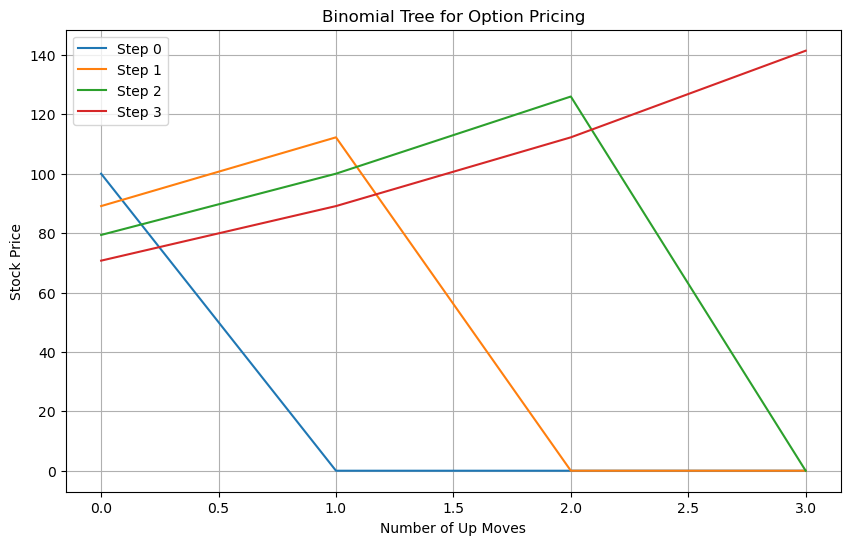

In [313]:
# Function to build the binomial tree
def build_binomial_tree(S, T, r, sigma, n):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    q = (np.exp(r * dt) - d) / (u - d)  # Probability of up movement

    # Initialize the binomial tree
    tree = np.zeros((n+1, n+1))

    # Fill in the tree with option prices at each node
    for i in range(n+1):
        for j in range(i+1):
            tree[j, i] = S * (u**j) * (d**(i-j))

    return tree

# Define option parameters
S = 100  # Initial stock price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n = 3  # Number of time steps in the binomial tree

# Build the binomial tree
binomial_tree = build_binomial_tree(S, T, r, sigma, n)

# Visualize the binomial tree
plt.figure(figsize=(10, 6))
for i in range(n+1):
    plt.plot(binomial_tree[:, i], label=f'Step {i}')

plt.title('Binomial Tree for Option Pricing')
plt.xlabel('Number of Up Moves')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

### Probability Calculation

**Calculating Probabilities in a Binomial Tree**

In a binomial tree model, calculating probabilities is a crucial step to determine the likelihood of upward and downward movements at each node. The commonly used approach is based on risk-neutral pricing, which assumes that the expected return on the option is the risk-free rate. Here's how you can calculate the probabilities:

**1. Define Parameters:**
   - Set the initial parameters for the model:
      - Upward movement factor (\(u\)),
      - Downward movement factor (\(d\)),
      - Risk-free interest rate (\(r\)),
      - Time step (\(\Delta t\)).

**2. Calculate Upward and Downward Movements:**
   - Use the given factors to calculate the upward (\(u\)) and downward (\(d\)) movements:
      \[ u = 1 + \text{upward factor} \]
      \[ d = 1 - \text{downward factor} \]

**3. Calculate Risk-Neutral Probabilities:**
   - The risk-neutral probability of an upward movement (\(p\)) and a downward movement (\(1-p\)) can be calculated using the following formula:
      \[ p = \frac{e^{r \Delta t} - d}{u - d} \]

   - Where:
      - \( e \) is the base of the natural logarithm (approximately 2.71828),
      - \( r \) is the risk-free interest rate,
      - \( \Delta t \) is the time step,
      - \( u \) is the upward movement factor,
      - \( d \) is the downward movement factor.

**4. Check Probability Conditions:**
   - Ensure that the calculated probabilities satisfy the following conditions:
      - \( 0 \leq p \leq 1 \),
      - \( 0 \leq 1-p \leq 1 \).

**5. Interpretation:**
   - The calculated probabilities represent the likelihood of an upward movement (\(p\)) and a downward movement (\(1-p\)) at each node in the binomial tree.

**Example:**
   - Let's say \(u = 1.1\), \(d = 0.9\), \(r = 0.05\), \(\Delta t = 1\).
   - Calculate \(u\) and \(d\).
   - Use the formula to calculate \(p\) and \(1-p\).

   \[ u = 1 + 0.1 = 1.1 \]
   \[ d = 1 - 0.1 = 0.9 \]

   \[ p = \frac{e^{0.05 \times 1} - 0.9}{1.1 - 0.9} \]

   Calculate \(e^{0.05}\) and complete the calculation.

The calculated probabilities will be used to construct the binomial tree, influencing the likelihood of upward and downward movements at each node. These probabilities play a key role in option pricing and risk-neutral valuation within the binomial tree framework.

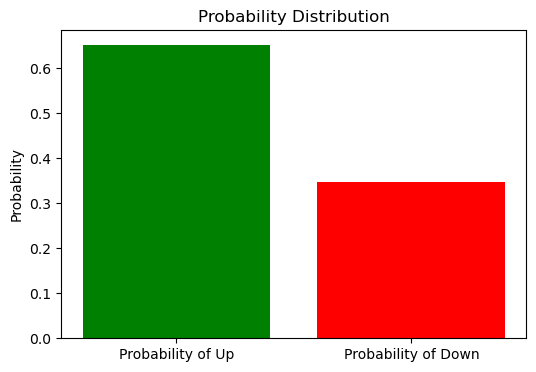


Parameters:
Up Factor: 1.1
Down Factor: 0.9
Risk-free Interest Rate: 3.0%
Time Period: 1

Probability of Up Movement: 0.6522726697675844
Probability of Down Movement: 0.34772733023241564


In [314]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate probabilities for the binomial tree
def calculate_probabilities(up_factor, down_factor, risk_free_rate, time_period):
    p = (np.exp(risk_free_rate) - down_factor) / (up_factor - down_factor)
    q = 1 - p
    return p, q

# Function to visualize the probability calculations
def plot_probabilities(p, q):
    plt.figure(figsize=(6, 4))
    plt.bar(['Probability of Up', 'Probability of Down'], [p, q], color=['green', 'red'])
    plt.title('Probability Distribution')
    plt.ylabel('Probability')
    plt.show()

# Set parameters
up_factor = 1.1  # Up factor for the binomial tree
down_factor = 0.9  # Down factor for the binomial tree
risk_free_rate = 0.03  # Risk-free interest rate
time_period = 1  # Time period for probability calculation

# Calculate probabilities
probability_up, probability_down = calculate_probabilities(up_factor, down_factor, risk_free_rate, time_period)

# Visualize probability distribution
plot_probabilities(probability_up, probability_down)

# Display results
print(f"\nParameters:\nUp Factor: {up_factor}\nDown Factor: {down_factor}\nRisk-free Interest Rate: {risk_free_rate * 100}%\nTime Period: {time_period}\n\nProbability of Up Movement: {probability_up}\nProbability of Down Movement: {probability_down}")


### Valuing Options

**Valuing Options in a Binomial Tree**

Once you have constructed a binomial tree and calculated the probabilities of upward and downward movements at each node, you can proceed to value options at each node. The process involves traversing the tree backward and applying the risk-neutral pricing formula. Let's go through the steps:

**1. Define Parameters:**
   - Ensure you have the following parameters:
      - Upward movement factor (\(u\)),
      - Downward movement factor (\(d\)),
      - Risk-free interest rate (\(r\)),
      - Time step (\(\Delta t\)),
      - Option parameters (strike price, type of option).

**2. Calculate Upward and Downward Movements:**
   - If not already done, calculate \(u\) and \(d\) using the given factors.

**3. Calculate Risk-Neutral Probabilities:**
   - Use the risk-neutral probability formula to calculate \(p\) and \(1-p\).

**4. Construct the Binomial Tree:**
   - Build the tree by calculating possible asset prices at each node based on upward and downward movements.

**5. Option Payoff at Final Nodes:**
   - At the final time step, calculate the option payoff at each node based on the option type. For a European call option, the payoff is \(\max(0, S - K)\), where \(S\) is the asset price and \(K\) is the strike price.

**6. Backward Induction:**
   - Start traversing the tree backward, moving from the final time step towards the initial time.
   - At each node, calculate the option value using the risk-neutral pricing formula:
      \[ C = e^{-r \Delta t}(pC_u + (1-p)C_d) \]

   - Where:
      - \( C \) is the option value at the current node,
      - \( C_u \) is the option value for the upward movement,
      - \( C_d \) is the option value for the downward movement,
      - \( r \) is the risk-free interest rate,
      - \( \Delta t \) is the time step.

**7. Continue Backward Induction:**
   - Repeat the backward induction process until you reach the initial time step. The top node of the tree will represent the option value at the current time.

**8. Interpretation:**
   - The option value at the initial time step provides the theoretical fair price of the option given the specified parameters and market conditions.

**Example:**
   - Assume a European call option with a strike price (\(K\)) of 105.
   - At the final nodes, calculate the option payoff (\(\max(0, S - K)\)).
   - Traverse the tree backward, applying the risk-neutral pricing formula at each node.

   This process will yield the option values at each node, and the top node will represent the theoretical fair price of the option at the current time.

Valuing options in a binomial tree allows you to incorporate the dynamics of potential price movements and assess the option's fair value under different scenarios.

European Call Option Price: $5.63


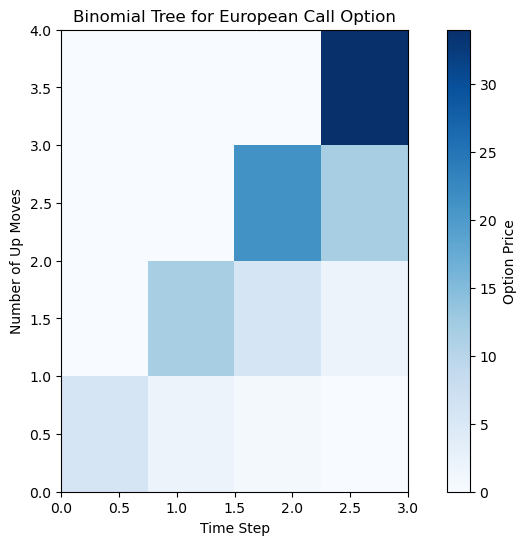

In [315]:
# Function to value European Call option using the binomial tree
def binomial_tree_european_call(S, K, T, r, sigma, n):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    q = (np.exp(r * dt) - d) / (u - d)  # Probability of up movement

    # Initialize the binomial tree for option prices
    option_tree = np.zeros((n+1, n+1))

    # Calculate option prices at expiration
    for j in range(n+1):
        option_tree[j, n] = max(0, S * (u**j) * (d**(n-j)) - K)

    # Calculate option prices at earlier time steps
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (q * option_tree[j, i+1] + (1 - q) * option_tree[j+1, i+1])

    return option_tree[0, 0]

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n = 3  # Number of time steps in the binomial tree

# Calculate u and d
dt = T / n
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor

# Value European Call option using the binomial tree
call_option_price = binomial_tree_european_call(S, K, T, r, sigma, n)

# Display the option price
print(f'European Call Option Price: ${call_option_price:.2f}')

# Visualize the binomial tree
def plot_binomial_tree(option_tree):
    plt.figure(figsize=(10, 6))
    plt.imshow(option_tree, cmap='Blues', extent=[0, n, 0, n+1], origin='lower')
    plt.colorbar(label='Option Price')
    plt.title('Binomial Tree for European Call Option')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Up Moves')
    plt.show()

# Plot the binomial tree
binomial_tree = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        binomial_tree[j, i] = binomial_tree_european_call(S * (u**j) * (d**(i-j)), K, T, r, sigma, n)

plot_binomial_tree(binomial_tree)

### Binomial Option Pricing Model (BOPM)

**Binomial Option Pricing Model (BOPM)**

The Binomial Option Pricing Model (BOPM) is a mathematical model used for valuing options, particularly European and American-style options. It provides a discrete-time framework for pricing options by modeling the possible future price movements of the underlying asset. Here's an overview of the BOPM:

**1. Assumptions:**
   - The BOPM is based on several assumptions:
      - Discrete Time: Time is divided into discrete periods or steps.
      - Two Possible Price Movements: At each step, the underlying asset price can move up or down.
      - Constant Volatility: The volatility of the underlying asset remains constant over time.
      - Risk-Neutral Pricing: The model assumes risk-neutral pricing, making the expected return on the option equal to the risk-free rate.

**2. Parameters:**
   - **\(S\):** Current price of the underlying asset.
   - **\(K\):** Strike price of the option.
   - **\(T\):** Time to expiration.
   - **\(r\):** Risk-free interest rate.
   - **\(u\):** Upward movement factor.
   - **\(d\):** Downward movement factor.
   - **\(\Delta t\):** Time step.

**3. Building the Binomial Tree:**
   - Start by constructing a binomial tree representing the possible future price movements of the underlying asset over time.
   - The tree is built by calculating the possible asset prices at each node based on the upward and downward movements.

**4. Calculating Probabilities:**
   - Calculate the risk-neutral probabilities \(p\) and \(1-p\) at each node using the risk-neutral probability formula:
      \[ p = \frac{e^{r\Delta t} - d}{u - d} \]

**5. Option Payoffs at Final Nodes:**
   - At the final time step, calculate the option payoffs based on the option type. For a European call option, the payoff is \(\max(0, S - K)\).

**6. Backward Induction:**
   - Traverse the tree backward, starting from the final time step.
   - At each node, calculate the option value using the risk-neutral pricing formula:
      \[ C = e^{-r\Delta t}(pC_u + (1-p)C_d) \]
      - Where \(C\) is the option value at the current node, \(C_u\) is the option value for the upward movement, and \(C_d\) is the option value for the downward movement.

**7. Option Pricing at Initial Time:**
   - The option value at the top node of the tree represents the theoretical fair price of the option at the current time.

**8. American vs. European Options:**
   - For American options, compare the calculated option value with the immediate exercise value at each node and choose the higher value.

**9. Variations:**
   - The basic BOPM can be extended to handle more complex situations, including dividend payments, varying volatility, and different types of options.

**10. Limitations:**
   - While the BOPM is a powerful tool, it has limitations, including the assumption of constant volatility and discrete time steps.

The BOPM is widely used in finance for its flexibility and ability to handle various option pricing scenarios. It provides a structured approach to understanding option values and is an essential tool in derivatives pricing and risk management.

European Call Option Price: $5.63
European Put Option Price: $11.37


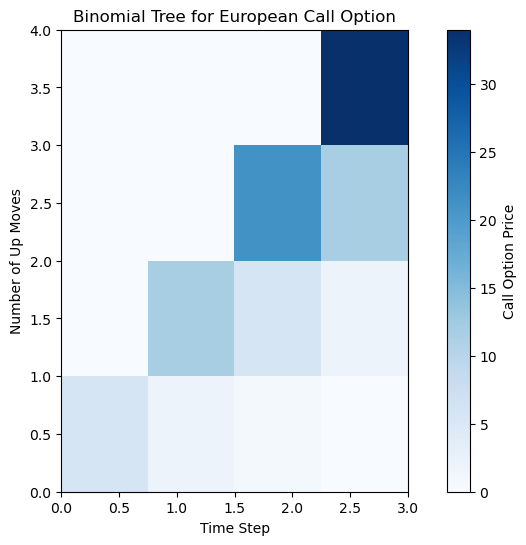

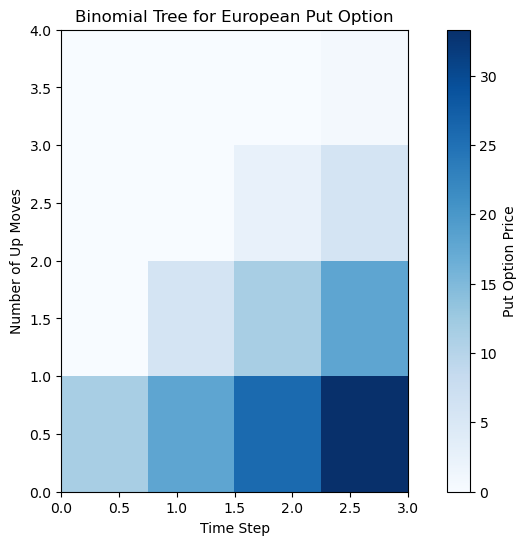

In [316]:
# Function to value European Call option using the binomial tree
def binomial_option_pricing_model(S, K, T, r, sigma, n, option_type='call'):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    q = (np.exp(r * dt) - d) / (u - d)  # Probability of up movement

    # Initialize the binomial tree for option prices
    option_tree = np.zeros((n+1, n+1))

    # Calculate option prices at expiration
    for j in range(n+1):
        if option_type == 'call':
            option_tree[j, n] = max(0, S * (u**j) * (d**(n-j)) - K)
        elif option_type == 'put':
            option_tree[j, n] = max(0, K - S * (u**j) * (d**(n-j)))

    # Calculate option prices at earlier time steps
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (q * option_tree[j, i+1] + (1 - q) * option_tree[j+1, i+1])

    return option_tree[0, 0]

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
n = 3  # Number of time steps in the binomial tree

# Calculate u and d
dt = T / n
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor

# Value European Call and Put options using the binomial tree
call_option_price = binomial_option_pricing_model(S, K, T, r, sigma, n, option_type='call')
put_option_price = binomial_option_pricing_model(S, K, T, r, sigma, n, option_type='put')

# Display the option prices
print(f'European Call Option Price: ${call_option_price:.2f}')
print(f'European Put Option Price: ${put_option_price:.2f}')

# Visualize the binomial tree for Call option
call_binomial_tree = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        call_binomial_tree[j, i] = binomial_option_pricing_model(S * (u**j) * (d**(i-j)), K, T, r, sigma, n, option_type='call')

# Visualize the binomial tree for Put option
put_binomial_tree = np.zeros((n+1, n+1))
for i in range(n+1):
    for j in range(i+1):
        put_binomial_tree[j, i] = binomial_option_pricing_model(S * (u**j) * (d**(i-j)), K, T, r, sigma, n, option_type='put')

# Plot the binomial trees
def plot_binomial_tree(option_tree, option_type):
    plt.figure(figsize=(10, 6))
    plt.imshow(option_tree, cmap='Blues', extent=[0, n, 0, n+1], origin='lower')
    plt.colorbar(label=f'{option_type.capitalize()} Option Price')
    plt.title(f'Binomial Tree for European {option_type.capitalize()} Option')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Up Moves')
    plt.show()

plot_binomial_tree(call_binomial_tree, 'call')
plot_binomial_tree(put_binomial_tree, 'put')

### Convergence to Black Scholes

The Binomial Option Pricing Model (BOPM) is a discrete-time model for valuing options, and it converges to the Black-Scholes-Merton (BSM) model as the number of time steps increases. Here's how this convergence occurs:

**1. Discretization of Time:**
   - In the BOPM, time is discretized into a finite number of steps or periods. As the number of steps (\(n\)) increases, the model approaches a continuous-time framework.

**2. Smaller Time Intervals:**
   - Increasing the number of time steps results in smaller time intervals (\(\Delta t\)) between each step. The smaller the time intervals, the closer the model approximates continuous-time dynamics.

**3. Continuous Limit:**
   - In the limit as the number of time steps approaches infinity (\(n \rightarrow \infty\)), the BOPM converges to the continuous-time Black-Scholes-Merton model.

**4. Continuous-Time Formula:**
   - The continuous-time Black-Scholes-Merton formula for a European call option is given by:
      \[ C = S_0 \cdot N(d_1) - e^{-rT} \cdot K \cdot N(d_2) \]
      \[ d_1 = \frac{\ln(S_0/K) + (r + (\sigma^2)/2)T}{\sigma \sqrt{T}} \]
      \[ d_2 = d_1 - \sigma \sqrt{T} \]
      - Where \(S_0\) is the current stock price, \(K\) is the strike price, \(r\) is the risk-free interest rate, \(\sigma\) is the volatility, and \(T\) is the time to expiration.

**5. Implied Volatility:**
   - The volatility parameter (\(\sigma\)) in the Black-Scholes-Merton model is often referred to as the implied volatility. In the BOPM, as the number of time steps increases, the implied volatility converges to the continuous-time volatility.

**6. Advantages of Convergence:**
   - The convergence to the Black-Scholes-Merton model is advantageous because the continuous-time model is more widely used in finance and has closed-form solutions. It allows for more straightforward calculations and comparisons.

**7. Practical Considerations:**
   - While the BOPM converges to the Black-Scholes-Merton model in theory, in practice, the choice of a sufficiently large number of time steps (\(n\)) is necessary to achieve accurate results.

**8. Numerical Methods:**
   - Both the BOPM and Black-Scholes-Merton models can be implemented using numerical methods such as finite difference methods or Monte Carlo simulations for more accurate results.

In summary, the Binomial Option Pricing Model converges to the Black-Scholes-Merton model as the number of time steps increases, allowing for a practical and numerically stable approach to option pricing in continuous-time settings.

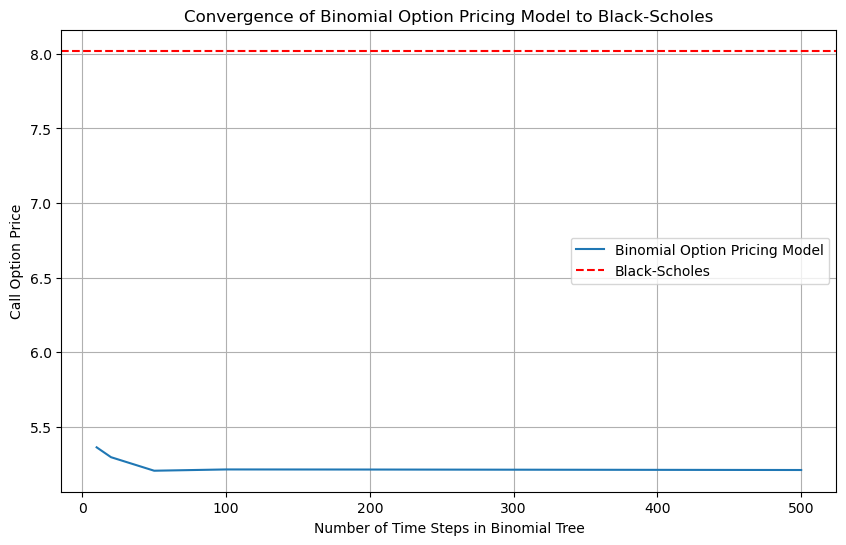

In [317]:
# Function to value European Call option using the binomial tree
def binomial_option_pricing_model(S, K, T, r, sigma, n, option_type='call'):
    dt = T / n  # Time step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    q = (np.exp(r * dt) - d) / (u - d)  # Probability of up movement

    # Initialize the binomial tree for option prices
    option_tree = np.zeros((n+1, n+1))

    # Calculate option prices at expiration
    for j in range(n+1):
        if option_type == 'call':
            option_tree[j, n] = max(0, S * (u**j) * (d**(n-j)) - K)
        elif option_type == 'put':
            option_tree[j, n] = max(0, K - S * (u**j) * (d**(n-j)))

    # Calculate option prices at earlier time steps
    for i in range(n-1, -1, -1):
        for j in range(i+1):
            option_tree[j, i] = np.exp(-r * dt) * (q * option_tree[j, i+1] + (1 - q) * option_tree[j+1, i+1])

    return option_tree[0, 0]

# Function to calculate Black-Scholes European Call option price
def black_scholes_call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Vary the number of time steps in the binomial tree
n_values = [10, 20, 50, 100, 200, 500]
binomial_call_prices = []
black_scholes_call_price = black_scholes_call_option_price(S, K, T, r, sigma)

# Calculate binomial call option prices and store them
for n in n_values:
    call_option_price = binomial_option_pricing_model(S, K, T, r, sigma, n, option_type='call')
    binomial_call_prices.append(call_option_price)

# Visualize the convergence to Black-Scholes
plt.figure(figsize=(10, 6))
plt.plot(n_values, binomial_call_prices, label='Binomial Option Pricing Model')
plt.axhline(y=black_scholes_call_price, color='r', linestyle='--', label='Black-Scholes')
plt.title('Convergence of Binomial Option Pricing Model to Black-Scholes')
plt.xlabel('Number of Time Steps in Binomial Tree')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

### Real Life Application

**Real-Life Application of Binomial Tree in Option Pricing**

The Binomial Option Pricing Model (BOPM) has several real-life applications in the field of finance, especially for valuing options and making informed investment decisions. Here's how the binomial tree is applied in practice:

1. **Option Pricing:**
   - *European Options:* The binomial tree is often used to value European-style options, providing a method to calculate their fair market value.
   - *American Options:* For American-style options, the binomial tree helps determine whether early exercise is optimal at each node, contributing to the overall option pricing.

2. **Risk Management:**
   - The binomial tree assists in assessing the potential risks associated with holding options positions. By modeling different future scenarios and payoffs, financial professionals can make more informed risk management decisions.

3. **Investment Decision-Making:**
   - Traders and investors use the binomial tree to evaluate the impact of various market scenarios on option values. This information guides decision-making regarding whether to buy, sell, or hold options in different market conditions.

4. **Strategic Planning:**
   - The binomial tree aids in strategic planning by providing a dynamic framework for understanding the potential outcomes of different investment strategies. It helps investors assess the risk and return trade-offs associated with various option positions.

5. **Dividend Paying Stocks:**
   - The binomial tree can be adapted to handle dividend payments, making it applicable to pricing options on stocks that pay dividends. This is especially important when valuing options on individual stocks or portfolios containing dividend-paying assets.

6. **Employee Stock Options (ESOs):**
   - Companies often issue employee stock options as part of compensation packages. The binomial tree can be applied to value these options, taking into account factors such as volatility, time to expiration, and potential future stock price movements.

7. **Dynamic Hedging Strategies:**
   - Traders use the binomial tree to implement dynamic hedging strategies. By continuously adjusting hedging positions based on the evolving market conditions, traders aim to minimize risk exposure associated with option positions.

8. **Education and Training:**
   - The binomial tree serves as a valuable educational tool for teaching the principles of option pricing. It helps finance students and professionals understand the dynamics of financial markets and the factors influencing option values.

9. **Scenario Analysis:**
   - The binomial tree facilitates scenario analysis, allowing analysts to explore various economic and market scenarios and their potential impact on option values. This is crucial for assessing the robustness of investment strategies.

10. **Model Calibration:**
    - Traders and analysts can use the binomial tree to calibrate option pricing models by comparing the model-generated prices with observed market prices. This process helps refine and improve the accuracy of the pricing model.

In summary, the Binomial Option Pricing Model is a versatile tool with practical applications in option pricing, risk management, strategic planning, and decision-making within the dynamic landscape of financial markets.

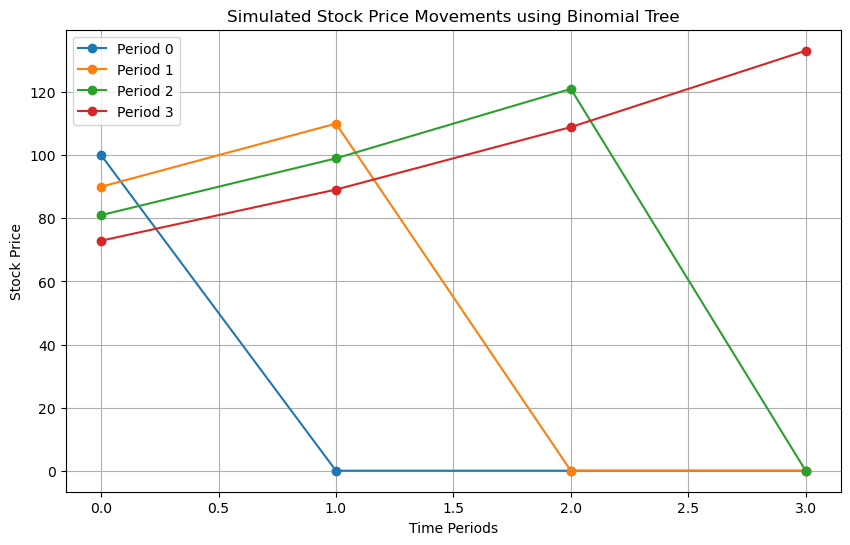

The option value using Binomial Option Pricing Model (BOPM) is: 3.196475255306316


In [318]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to simulate stock price movements using a binomial tree
def simulate_stock_price(initial_price, up_factor, down_factor, periods):
    stock_prices = np.zeros((periods + 1, periods + 1))
    stock_prices[0, 0] = initial_price
    
    for i in range(1, periods + 1):
        stock_prices[i, 0] = stock_prices[i - 1, 0] * down_factor
        for j in range(1, i + 1):
            stock_prices[i, j] = stock_prices[i - 1, j - 1] * up_factor
    
    return stock_prices

# Function to visualize stock price movements
def plot_stock_price(simulated_prices):
    plt.figure(figsize=(10, 6))
    for i in range(simulated_prices.shape[0]):
        plt.plot(simulated_prices[i, :], marker='o', label=f"Period {i}")
    plt.title('Simulated Stock Price Movements using Binomial Tree')
    plt.xlabel('Time Periods')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to calculate option value using the Binomial Option Pricing Model (BOPM)
def calculate_option_value_bopm(current_price, strike_price, up_factor, down_factor, risk_free_rate, time_period, option_type='call'):
    # Calculate probabilities
    p = (np.exp(risk_free_rate) - down_factor) / (up_factor - down_factor)
    q = 1 - p

    # Create a binomial price tree
    stock_prices = simulate_stock_price(current_price, up_factor, down_factor, time_period)
    
    # Calculate option values at expiration
    option_values = np.maximum(0, (stock_prices[time_period, :] - strike_price) if option_type == 'call' else
                               (strike_price - stock_prices[time_period, :]))

    # Calculate option values at earlier time points
    for i in range(time_period - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = np.exp(-risk_free_rate) * (p * option_values[j] + q * option_values[j + 1])

    return option_values[0]

# Set parameters
initial_stock_price = 100  # Initial stock price
strike_price = 100  # Option strike price
up_factor = 1.1  # Up factor for the binomial tree
down_factor = 0.9  # Down factor for the binomial tree
risk_free_rate = 0.03  # Risk-free interest rate
time_to_maturity = 3  # Time to maturity for the option
option_type = 'call'  # Option type (call or put)

# Simulate and plot stock price movements
simulated_prices = simulate_stock_price(initial_stock_price, up_factor, down_factor, time_to_maturity)
plot_stock_price(simulated_prices)

# Calculate and display option value using BOPM
bopm_option_value = calculate_option_value_bopm(initial_stock_price, strike_price, up_factor, down_factor, risk_free_rate, time_to_maturity, option_type)
print(f"The option value using Binomial Option Pricing Model (BOPM) is: {bopm_option_value}")


# The Black Scholes Merton Model

### What is the Black Scholes Merton Model

The Black-Scholes-Merton Model, often referred to as the Black-Scholes Model, is a mathematical model used for pricing European-style options. Developed by economists Fischer Black, Myron Scholes, and Robert Merton in the early 1970s, the model has become a fundamental tool in financial markets. Here's an overview of the Black-Scholes-Merton Model:

**Key Components:**

1. **Underlying Assumptions:**
   - The model is based on several assumptions:
      - The underlying asset follows geometric Brownian motion.
      - There are no transaction costs or taxes.
      - The risk-free interest rate is constant and known.
      - The option can only be exercised at expiration (European option).
      - Markets are efficient, and there is no arbitrage opportunity.

2. **Formula for European Call Option:**
   - The Black-Scholes-Merton formula for pricing a European call option is given by:
      \[ C = S_0 \cdot N(d_1) - e^{-rT} \cdot K \cdot N(d_2) \]
   - Where:
      - \( C \) is the call option price.
      - \( S_0 \) is the current price of the underlying asset.
      - \( K \) is the strike price.
      - \( r \) is the risk-free interest rate.
      - \( T \) is the time to expiration.
      - \( N(d_1) \) and \( N(d_2) \) are cumulative distribution functions of the standard normal distribution.
      - \( e \) is the base of the natural logarithm.

3. **Formula for European Put Option:**
   - The formula for pricing a European put option is derived from the call option formula:
      \[ P = e^{-rT} \cdot K \cdot N(-d_2) - S_0 \cdot N(-d_1) \]
   - Where \( P \) is the put option price, and \( N(-d_1) \) and \( N(-d_2) \) are cumulative distribution functions of the standard normal distribution.

4. **Parameters:**
   - \( d_1 \) and \( d_2 \) are calculated as follows:
      \[ d_1 = \frac{\ln(S_0/K) + (r + (\sigma^2)/2)T}{\sigma \sqrt{T}} \]
      \[ d_2 = d_1 - \sigma \sqrt{T} \]
   - \( \sigma \) is the volatility of the underlying asset.

**Applications and Significance:**

1. **Option Pricing:**
   - The Black-Scholes-Merton Model is widely used for valuing European call and put options on stocks, indices, and other financial instruments.

2. **Risk Management:**
   - Traders and investors use the model to assess and manage the risk associated with options positions.

3. **Implied Volatility:**
   - The model is used to calculate implied volatility, providing insights into market expectations for future price volatility.

4. **Investment Decision-Making:**
   - The model assists in making informed investment decisions, especially in the context of options trading strategies.

5. **Financial Education:**
   - The Black-Scholes-Merton Model is a key component of financial education, helping students and professionals understand the principles of option pricing.

While the Black-Scholes-Merton Model has been highly influential, it is essential to note its assumptions and limitations, including the assumption of constant volatility and the European option style. Modifications and alternative models have been developed to address some of these limitations in different market environments.

Black-Scholes-Merton European Call Option Price: $8.02


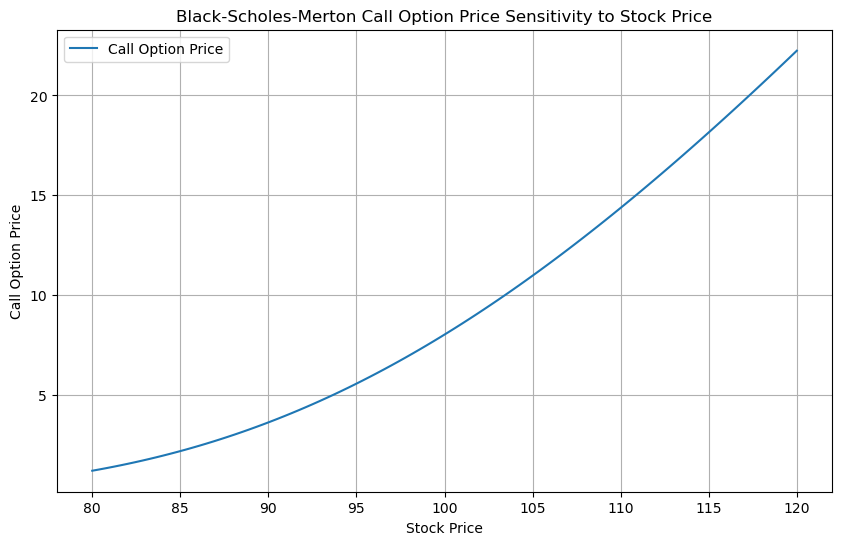

In [319]:
# Function to calculate Black-Scholes-Merton European Call option price
def black_scholes_merton_call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate Black-Scholes-Merton Call option price
call_option_price = black_scholes_merton_call_option_price(S, K, T, r, sigma)

# Display the option price
print(f'Black-Scholes-Merton European Call Option Price: ${call_option_price:.2f}')

# Visualize the Black-Scholes-Merton option price sensitivity to stock price
stock_prices = np.linspace(80, 120, 100)
call_prices = [black_scholes_merton_call_option_price(S, K, T, r, sigma) for S in stock_prices]

# Plot the sensitivity
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices, label='Call Option Price')
plt.title('Black-Scholes-Merton Call Option Price Sensitivity to Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

### Option Basics

**Option Basics**

Options are financial instruments that give the holder the right, but not the obligation, to buy or sell an underlying asset at a specified price before or at the expiration date. Options are commonly used in financial markets for various purposes, including hedging, speculation, and income generation. Here are the fundamental concepts related to options:

**1. Types of Options:**
   - **Call Option:** Gives the holder the right to buy the underlying asset at a specified price (strike price) before or at expiration.
   - **Put Option:** Gives the holder the right to sell the underlying asset at a specified price (strike price) before or at expiration.

**2. Key Terms:**
   - **Strike Price (Exercise Price):** The price at which the option holder can buy (for a call option) or sell (for a put option) the underlying asset.
   - **Expiration Date:** The date on which the option contract expires, and the right to exercise the option lapses.
   - **Underlying Asset:** The financial instrument (e.g., stock, index, commodity) on which the option's value is based.
   - **Premium:** The price paid by the option buyer to the option seller for the right conveyed by the option.

**3. Option Positions:**
   - **Long Position:** The position of an investor who buys an option. Long call holders profit from an increase in the underlying asset's price, while long put holders profit from a decrease.
   - **Short Position:** The position of an investor who sells (writes) an option. Short call writers profit when the underlying asset's price remains below the strike price, while short put writers profit when it remains above.

**4. In-the-Money, At-the-Money, Out-of-the-Money:**
   - **In-the-Money (ITM):** For a call option, if the underlying asset's price is above the strike price. For a put option, if the underlying asset's price is below the strike price.
   - **At-the-Money (ATM):** When the underlying asset's price is equal to the strike price.
   - **Out-of-the-Money (OTM):** For a call option, if the underlying asset's price is below the strike price. For a put option, if the underlying asset's price is above the strike price.

**5. Option Payoff:**
   - **Call Option Payoff:** \(\max(0, \text{Underlying Price} - \text{Strike Price}) - \text{Premium Paid}\)
   - **Put Option Payoff:** \(\max(0, \text{Strike Price} - \text{Underlying Price}) - \text{Premium Paid}\)

**6. Option Strategies:**
   - **Covered Call:** Involves holding a long position in the underlying asset and selling (writing) a call option.
   - **Protective Put:** Involves holding a long position in the underlying asset and buying a put option.
   - **Straddle:** Involves buying both a call and a put option with the same strike price and expiration date.

**7. Option Pricing Models:**
   - **Black-Scholes-Merton Model:** A mathematical model used to calculate the theoretical price of European-style options.
   - **Binomial Option Pricing Model:** A discrete-time model for pricing options, suitable for both European and American-style options.

Understanding these basics is essential for anyone engaging in options trading or incorporating options into their investment strategies. It's important to note that options trading involves risks, and investors should carefully consider their risk tolerance and market outlook before participating in option markets.

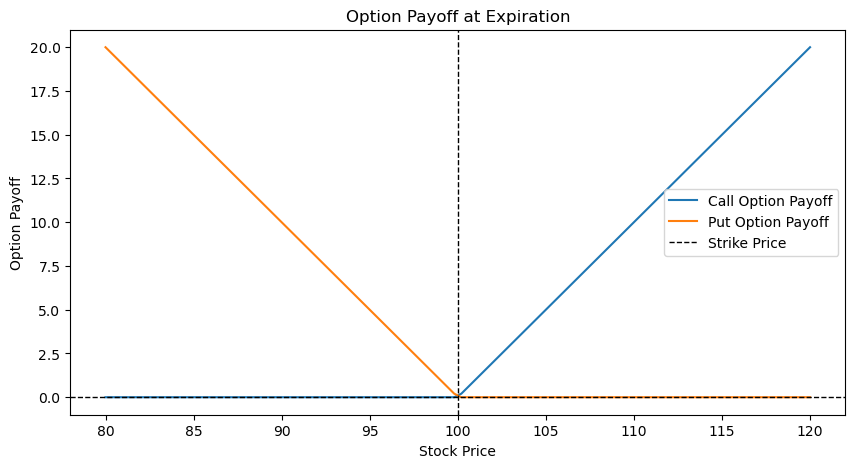


### Option Pricing Example ###

For a call option with parameters:
    Current Stock Price (S) = $100
    Option Strike Price (X) = $100
    Time to Maturity (T) = 1 year
    Risk-Free Interest Rate (r) = 3%
    Volatility (σ) = 20%

The calculated Call Option Price is: $9.41

For a put option with the same parameters, the calculated Put Option Price is: $6.46


In [320]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton option pricing
def black_scholes_merton(current_price, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='call'):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    if option_type == 'call':
        option_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    else:
        option_price = strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - current_price * norm.cdf(-d1)

    return option_price

# Function to visualize option payoff at expiration
def plot_option_payoff():
    # Varying stock prices
    stock_prices = np.linspace(80, 120, 100)
    
    # Call option payoff at expiration
    call_payoff = np.maximum(stock_prices - 100, 0)
    
    # Put option payoff at expiration
    put_payoff = np.maximum(100 - stock_prices, 0)

    # Plotting
    plt.figure(figsize=(10, 5))

    plt.plot(stock_prices, call_payoff, label='Call Option Payoff')
    plt.plot(stock_prices, put_payoff, label='Put Option Payoff')

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(100, color='black', linestyle='--', linewidth=1, label='Strike Price')

    plt.title('Option Payoff at Expiration')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Payoff')
    plt.legend()

    plt.show()

# Plot option payoff at expiration
plot_option_payoff()

# Calculate and display option price
option_price_call = black_scholes_merton(100, 100, 1, 0.03, 0.2)
option_price_put = black_scholes_merton(100, 100, 1, 0.03, 0.2, option_type='put')

print(f"\n### Option Pricing Example ###\n")
print(f"For a call option with parameters:")
print(f"    Current Stock Price (S) = $100")
print(f"    Option Strike Price (X) = $100")
print(f"    Time to Maturity (T) = 1 year")
print(f"    Risk-Free Interest Rate (r) = 3%")
print(f"    Volatility (σ) = 20%\n")
print(f"The calculated Call Option Price is: ${option_price_call:.2f}\n")

print(f"For a put option with the same parameters, the calculated Put Option Price is: ${option_price_put:.2f}")

### Variables in the Model

In the context of option pricing models, various variables play crucial roles in determining the value of options. Let's explore the key variables commonly associated with these models, particularly the Black-Scholes-Merton Model:

1. **Underlying Price (\(S\)):**
   - Definition: The current market price of the underlying asset (e.g., stock, index).
   - Influence: An increase in the underlying price generally leads to higher call option values and lower put option values.

2. **Strike Price (\(K\)):**
   - Definition: The predetermined price at which the option holder can buy (for a call option) or sell (for a put option) the underlying asset.
   - Influence: A higher strike price tends to increase call option values and decrease put option values.

3. **Time to Expiration (\(T\)):**
   - Definition: The time remaining until the option contract expires.
   - Influence: As time to expiration decreases, the value of both call and put options tends to decline. Options lose time value as they approach expiration.

4. **Risk-Free Interest Rate (\(r\)):**
   - Definition: The prevailing risk-free interest rate in the market.
   - Influence: An increase in the risk-free interest rate generally leads to higher call option values and lower put option values.

5. **Volatility (\(\sigma\)):**
   - Definition: The measure of the underlying asset's price fluctuations or volatility.
   - Influence: Higher volatility increases the value of both call and put options. Volatility reflects the uncertainty in the future price movements of the underlying asset.

6. **Dividend Yield (\(q\)):**
   - Definition: The dividend paid by the underlying asset, expressed as a percentage of its current price.
   - Influence: For stocks paying dividends, higher dividend yields can decrease call option values and increase put option values.

7. **Option Premium (\(C\) and \(P\)):**
   - Definition: The market price of the option, representing the premium paid by the buyer and received by the seller.
   - Influence: Option premiums are influenced by the interplay of the above variables and market dynamics. They represent the current perceived value of the option in the market.

In the Black-Scholes-Merton Model, the theoretical values of European call (\(C\)) and put (\(P\)) options are calculated using these variables. The model provides a mathematical framework to estimate option values based on these factors, assuming constant volatility, no dividends during the option's life, and continuous trading.

It's important to note that these variables are interconnected, and changes in one variable can impact the overall option value. Traders and investors often use option pricing models and sensitivity analysis to assess how changes in these variables affect option prices and make informed decisions in the dynamic financial markets.

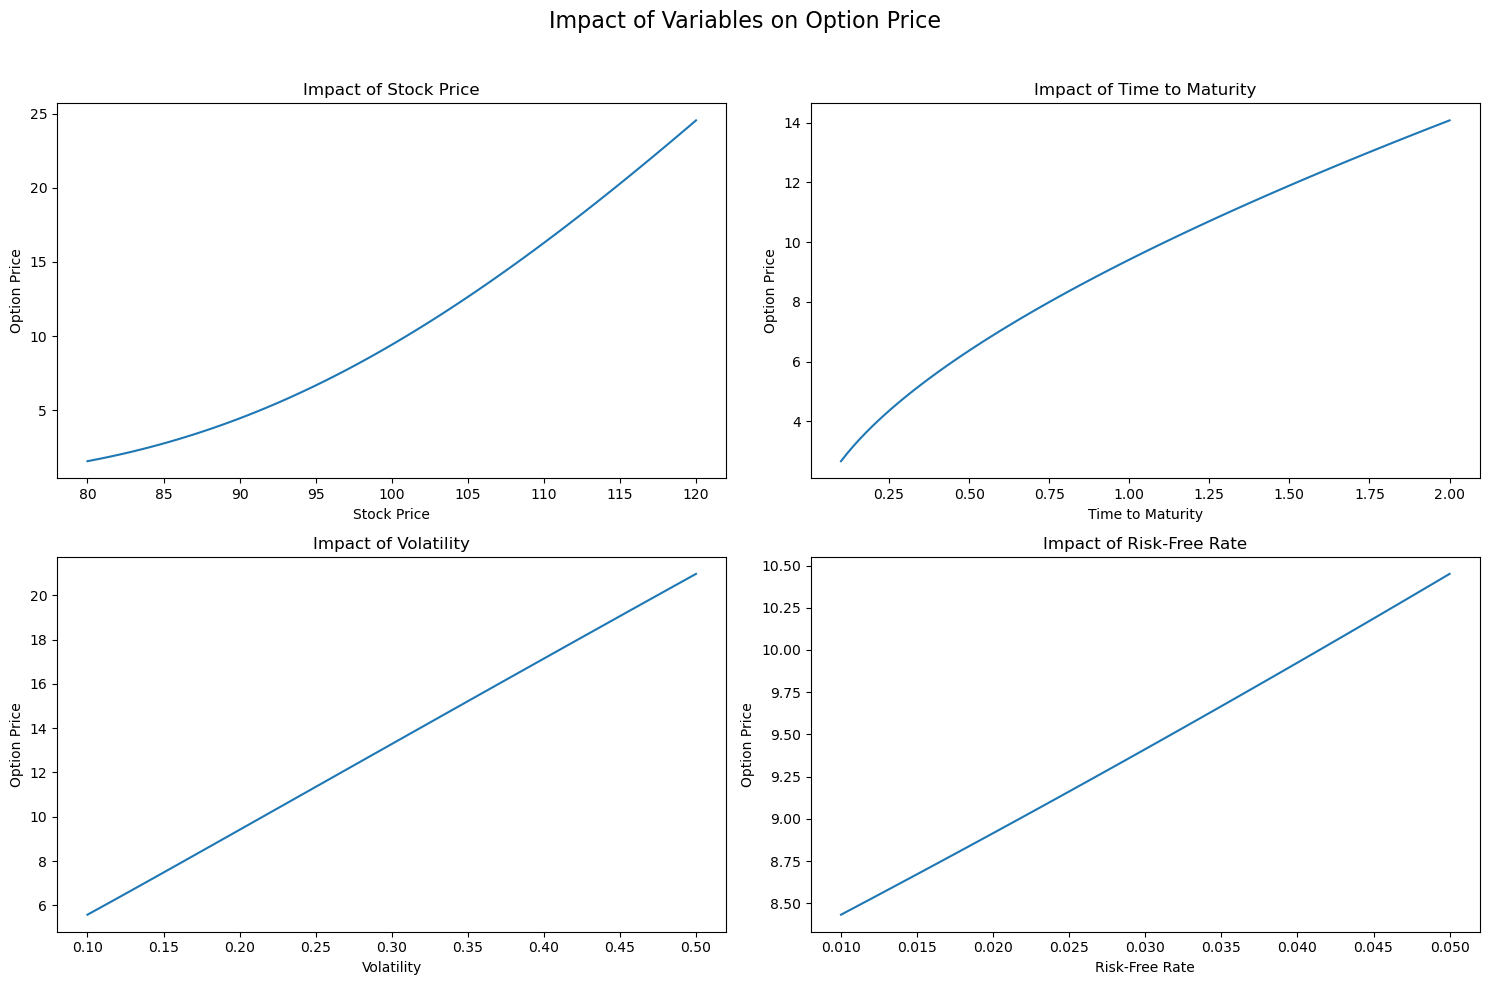

In [321]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton option pricing
def black_scholes_merton(current_price, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='call'):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    if option_type == 'call':
        option_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    else:
        option_price = strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - current_price * norm.cdf(-d1)

    return option_price

# Function to visualize the impact of each variable on option price
def visualize_option_variables():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    time_to_maturities = np.linspace(0.1, 2, 100)
    volatilities = np.linspace(0.1, 0.5, 100)
    risk_free_rates = np.linspace(0.01, 0.05, 100)

    # Initialize subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Impact of Variables on Option Price', fontsize=16)

    # Varying Stock Price
    axes[0, 0].plot(stock_prices, black_scholes_merton(stock_prices, 100, 1, 0.03, 0.2), label='Stock Price')
    axes[0, 0].set_title('Impact of Stock Price')
    axes[0, 0].set_xlabel('Stock Price')
    axes[0, 0].set_ylabel('Option Price')

    # Varying Time to Maturity
    axes[0, 1].plot(time_to_maturities, black_scholes_merton(100, 100, time_to_maturities, 0.03, 0.2), label='Time to Maturity')
    axes[0, 1].set_title('Impact of Time to Maturity')
    axes[0, 1].set_xlabel('Time to Maturity')
    axes[0, 1].set_ylabel('Option Price')

    # Varying Volatility
    axes[1, 0].plot(volatilities, black_scholes_merton(100, 100, 1, 0.03, volatilities), label='Volatility')
    axes[1, 0].set_title('Impact of Volatility')
    axes[1, 0].set_xlabel('Volatility')
    axes[1, 0].set_ylabel('Option Price')

    # Varying Risk-Free Rate
    axes[1, 1].plot(risk_free_rates, black_scholes_merton(100, 100, 1, risk_free_rates, 0.2), label='Risk-Free Rate')
    axes[1, 1].set_title('Impact of Risk-Free Rate')
    axes[1, 1].set_xlabel('Risk-Free Rate')
    axes[1, 1].set_ylabel('Option Price')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualize the impact of each variable
visualize_option_variables()


### Call and Put Options

**Call Option:**
- **Definition:** A call option is a financial contract that gives the holder the right, but not the obligation, to buy a specified quantity of an underlying asset at a predetermined price (strike price) within a specified period (until expiration).
- **Key Characteristics:**
   - **Buyer's Perspective:** The call option buyer pays a premium to acquire the right to buy the underlying asset.
   - **Seller's Perspective:** The call option seller (writer) receives the premium but may be obligated to sell the underlying asset if the option is exercised.
   - **Profit/Loss for Buyer:** The call option buyer profits when the underlying asset's price exceeds the strike price by more than the premium paid.
   - **Profit/Loss for Seller:** The call option seller profits when the underlying asset's price remains below the strike price, but may incur losses if the price rises significantly.

**Put Option:**
- **Definition:** A put option is a financial contract that gives the holder the right, but not the obligation, to sell a specified quantity of an underlying asset at a predetermined price (strike price) within a specified period (until expiration).
- **Key Characteristics:**
   - **Buyer's Perspective:** The put option buyer pays a premium to acquire the right to sell the underlying asset.
   - **Seller's Perspective:** The put option seller (writer) receives the premium but may be obligated to buy the underlying asset if the option is exercised.
   - **Profit/Loss for Buyer:** The put option buyer profits when the underlying asset's price falls below the strike price by more than the premium paid.
   - **Profit/Loss for Seller:** The put option seller profits when the underlying asset's price remains above the strike price, but may incur losses if the price falls significantly.

**Black-Scholes-Merton Model and Options Pricing:**
- The Black-Scholes-Merton Model is a widely used mathematical model for estimating the theoretical prices of European-style call and put options.
- The model considers variables such as the underlying price, strike price, time to expiration, risk-free interest rate, volatility, and dividend yield (if applicable) to calculate option premiums.

**Call Option Payoff Formula:**
\[ \text{Call Option Payoff} = \max(0, \text{Underlying Price} - \text{Strike Price}) - \text{Premium Paid} \]

**Put Option Payoff Formula:**
\[ \text{Put Option Payoff} = \max(0, \text{Strike Price} - \text{Underlying Price}) - \text{Premium Paid} \]

Understanding the dynamics of call and put options, including their payoff structures and the factors influencing their values, is crucial for investors and traders involved in options markets. It allows them to make informed decisions and manage risk effectively.

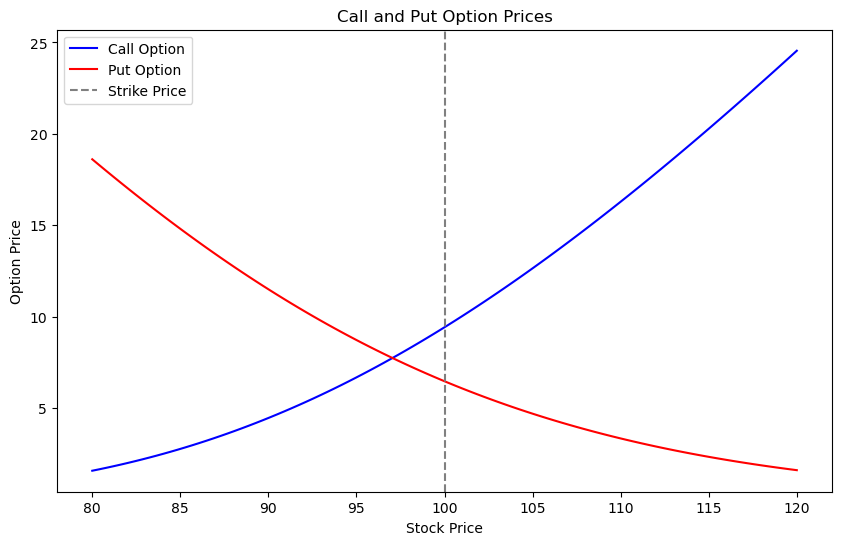

In [322]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton option pricing
def black_scholes_merton(current_price, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='call'):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    if option_type == 'call':
        option_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)
    else:
        option_price = strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - current_price * norm.cdf(-d1)

    return option_price

# Function to visualize call and put options
def visualize_call_put_options():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate call and put option prices
    call_prices = black_scholes_merton(stock_prices, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='call')
    put_prices = black_scholes_merton(stock_prices, strike_price, time_to_maturity, risk_free_rate, volatility, option_type='put')

    # Initialize plot
    plt.figure(figsize=(10, 6))
    plt.title('Call and Put Option Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')

    # Plot call option prices
    plt.plot(stock_prices, call_prices, label='Call Option', color='blue')

    # Plot put option prices
    plt.plot(stock_prices, put_prices, label='Put Option', color='red')

    # Highlight the strike price
    plt.axvline(x=strike_price, color='gray', linestyle='--', label='Strike Price')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Visualize call and put options
visualize_call_put_options()


### Black Scholes Formula for Call Options

The Black-Scholes-Merton Model provides a formula for calculating the theoretical price of a European-style call option. Here's the formula for the Black-Scholes-Merton Call Option Pricing:

\[ C = S_0 \cdot N(d_1) - e^{-rT} \cdot K \cdot N(d_2) \]

Where:
- \( C \) is the theoretical price of the call option.
- \( S_0 \) is the current price of the underlying asset.
- \( K \) is the strike price of the option.
- \( T \) is the time to expiration (in years).
- \( r \) is the risk-free interest rate.
- \( N(d_1) \) and \( N(d_2) \) are the cumulative distribution functions of the standard normal distribution.
- \( e \) is the base of the natural logarithm.

The components \( d_1 \) and \( d_2 \) are calculated as follows:

\[ d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}} \]

\[ d_2 = d_1 - \sigma \sqrt{T} \]

Where:
- \( \sigma \) is the volatility of the underlying asset.

This formula estimates the fair market value of a call option based on the current market conditions and the specified option contract details. It incorporates the time to expiration, the risk-free interest rate, and the volatility of the underlying asset. The cumulative distribution functions \( N(d_1) \) and \( N(d_2) \) represent the probability that a standard normal random variable is less than or equal to \( d_1 \) and \( d_2 \), respectively.

It's important to note that the Black-Scholes-Merton Model makes certain assumptions, including constant volatility and no dividends during the option's life. Additionally, the model is specifically designed for European-style options, which can only be exercised at expiration.

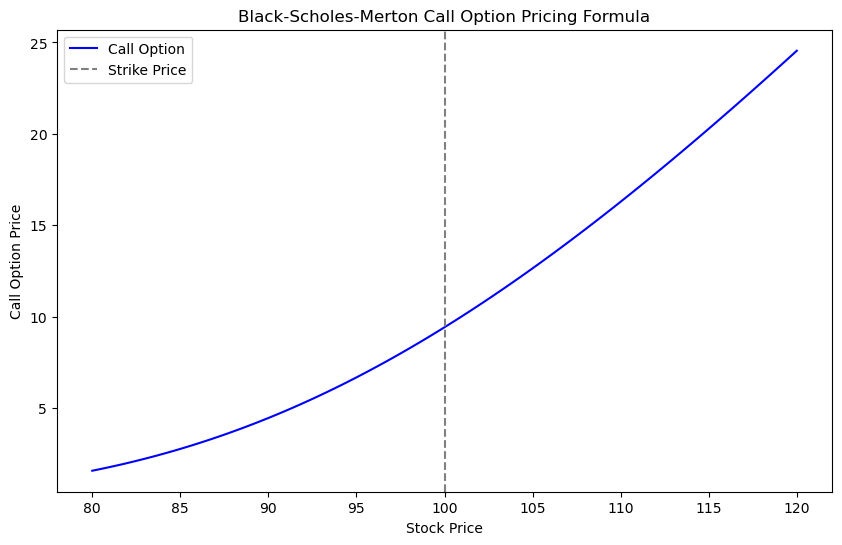

In [323]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton call option pricing
def black_scholes_call(current_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    call_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)

    return call_price

# Function to visualize the Black-Scholes-Merton call option formula
def visualize_black_scholes_call_formula():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate call option prices using the Black-Scholes-Merton formula
    call_prices = black_scholes_call(stock_prices, strike_price, time_to_maturity, risk_free_rate, volatility)

    # Initialize plot
    plt.figure(figsize=(10, 6))
    plt.title('Black-Scholes-Merton Call Option Pricing Formula')
    plt.xlabel('Stock Price')
    plt.ylabel('Call Option Price')

    # Plot call option prices
    plt.plot(stock_prices, call_prices, label='Call Option', color='blue')

    # Highlight the strike price
    plt.axvline(x=strike_price, color='gray', linestyle='--', label='Strike Price')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Visualize the Black-Scholes-Merton call option formula
visualize_black_scholes_call_formula()


### Black Scholes Formula for Put Options

The Black-Scholes-Merton Model also provides a formula for calculating the theoretical price of a European-style put option. Here's the formula for the Black-Scholes-Merton Put Option Pricing:

\[ P = e^{-rT} \cdot K \cdot N(-d_2) - S_0 \cdot N(-d_1) \]

Where:
- \( P \) is the theoretical price of the put option.
- \( S_0 \) is the current price of the underlying asset.
- \( K \) is the strike price of the option.
- \( T \) is the time to expiration (in years).
- \( r \) is the risk-free interest rate.
- \( N(-d_1) \) and \( N(-d_2) \) are the cumulative distribution functions of the standard normal distribution.

The components \( d_1 \) and \( d_2 \) are calculated as follows:

\[ d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}} \]

\[ d_2 = d_1 - \sigma \sqrt{T} \]

Where:
- \( \sigma \) is the volatility of the underlying asset.

This formula estimates the fair market value of a put option based on the current market conditions and the specified option contract details. Similar to the call option formula, it incorporates the time to expiration, the risk-free interest rate, and the volatility of the underlying asset. The cumulative distribution functions \( N(-d_1) \) and \( N(-d_2) \) represent the probability that a standard normal random variable is less than or equal to \( -d_1 \) and \( -d_2 \), respectively.

As with the call option formula, it's important to note the assumptions and limitations of the Black-Scholes-Merton Model, including constant volatility and no dividends during the option's life. The model is specifically designed for European-style options.

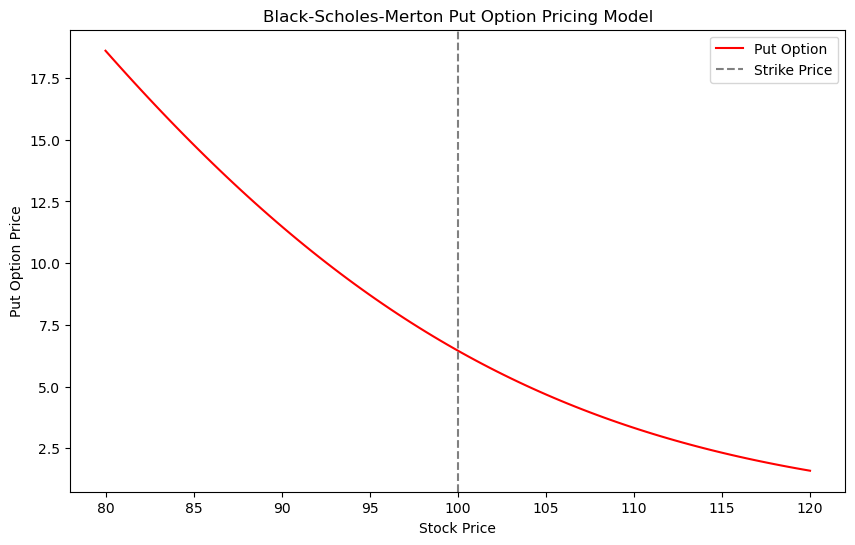

In [324]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton put option pricing
def black_scholes_put(current_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    put_price = strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(-d2) - current_price * norm.cdf(-d1)

    return put_price

# Function to visualize the Black-Scholes-Merton put option model
def visualize_black_scholes_put_model():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate put option prices using the Black-Scholes-Merton model
    put_prices = black_scholes_put(stock_prices, strike_price, time_to_maturity, risk_free_rate, volatility)

    # Initialize plot
    plt.figure(figsize=(10, 6))
    plt.title('Black-Scholes-Merton Put Option Pricing Model')
    plt.xlabel('Stock Price')
    plt.ylabel('Put Option Price')

    # Plot put option prices
    plt.plot(stock_prices, put_prices, label='Put Option', color='red')

    # Highlight the strike price
    plt.axvline(x=strike_price, color='gray', linestyle='--', label='Strike Price')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Visualize the Black-Scholes-Merton put option model
visualize_black_scholes_put_model()


### Option Sensitivity Measures - The Greeks

Option sensitivity measures, also known as "Greeks," are key indicators that help traders and investors assess the risk and potential price changes of options positions in response to various factors. The main option sensitivity measures include:

1. **Delta (\(\Delta\)):**
   - **Definition:** Delta measures the sensitivity of the option price to changes in the price of the underlying asset. It represents the expected change in the option price for a one-unit change in the underlying asset's price.
   - **Interpretation:**
      - Call options: Delta ranges from 0 to 1. A call option with a delta of 0.50 would be expected to increase by $0.50 for every $1 increase in the underlying asset's price.
      - Put options: Delta ranges from -1 to 0. A put option with a delta of -0.50 would be expected to decrease by $0.50 for every $1 increase in the underlying asset's price.

2. **Gamma (\(\Gamma\)):**
   - **Definition:** Gamma measures the rate of change in delta in response to changes in the price of the underlying asset. It indicates the convexity of the option price.
   - **Interpretation:** A higher gamma value suggests that delta is more sensitive to changes in the underlying asset's price.

3. **Theta (\(\Theta\)):**
   - **Definition:** Theta measures the rate of change in the option price with respect to time decay. It quantifies the impact of time passing on the option's value.
   - **Interpretation:** A negative theta indicates that the option's value decreases as time passes. It's particularly relevant for options traders who seek to capitalize on time decay.

4. **Vega (\(\nu\)):**
   - **Definition:** Vega measures the sensitivity of the option price to changes in implied volatility. It quantifies the impact of changes in market expectations for future price volatility.
   - **Interpretation:** A positive vega indicates that the option's value increases as implied volatility rises.

5. **Rho (\(\rho\)):**
   - **Definition:** Rho measures the sensitivity of the option price to changes in the risk-free interest rate. It reflects the impact of interest rate changes on the option's value.
   - **Interpretation:** A positive rho indicates that the option's value increases with higher interest rates.

Understanding these option sensitivity measures is crucial for managing and adjusting options positions. Traders use these metrics to assess the risk exposure of their portfolios and to make informed decisions about adjustments, such as hedging or changing the position size.

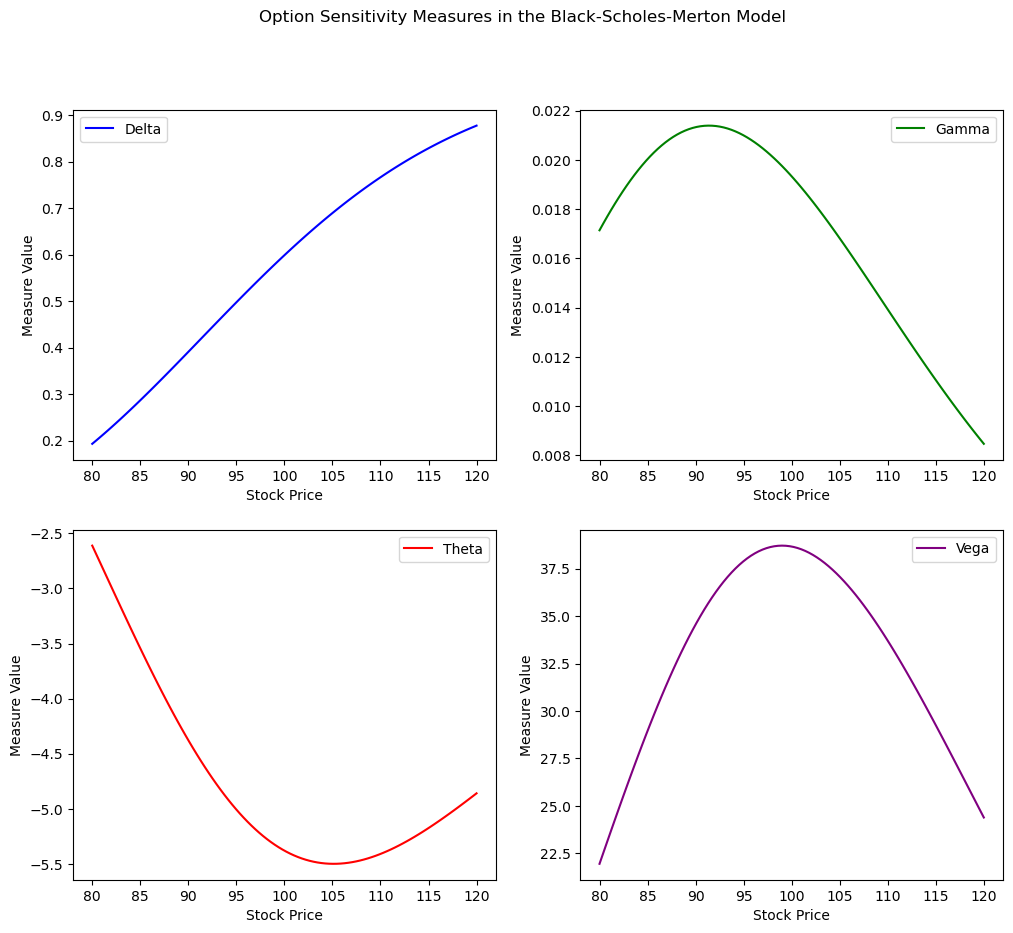

In [325]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton call option pricing
def black_scholes_call(current_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    call_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)

    return call_price

# Function to calculate option sensitivity measures (Greeks)
def calculate_option_greeks(current_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    # Delta
    delta = norm.cdf(d1)

    # Gamma
    gamma = norm.pdf(d1) / (current_price * volatility * np.sqrt(time_to_maturity))

    # Theta
    theta = - (current_price * norm.pdf(d1) * volatility) / (2 * np.sqrt(time_to_maturity)) - risk_free_rate * strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)

    # Vega
    vega = current_price * np.sqrt(time_to_maturity) * norm.pdf(d1)

    # Rho
    rho = strike_price * time_to_maturity * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)

    return delta, gamma, theta, vega, rho

# Function to visualize option sensitivity measures
def visualize_option_greeks():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Initialize plot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Option Sensitivity Measures in the Black-Scholes-Merton Model')
    
    for ax in axs.flat:
        ax.set(xlabel='Stock Price', ylabel='Measure Value')

    # Plot Delta
    delta_values = [calculate_option_greeks(price, strike_price, time_to_maturity, risk_free_rate, volatility)[0] for price in stock_prices]
    axs[0, 0].plot(stock_prices, delta_values, label='Delta', color='blue')
    axs[0, 0].legend()

    # Plot Gamma
    gamma_values = [calculate_option_greeks(price, strike_price, time_to_maturity, risk_free_rate, volatility)[1] for price in stock_prices]
    axs[0, 1].plot(stock_prices, gamma_values, label='Gamma', color='green')
    axs[0, 1].legend()

    # Plot Theta
    theta_values = [calculate_option_greeks(price, strike_price, time_to_maturity, risk_free_rate, volatility)[2] for price in stock_prices]
    axs[1, 0].plot(stock_prices, theta_values, label='Theta', color='red')
    axs[1, 0].legend()

    # Plot Vega
    vega_values = [calculate_option_greeks(price, strike_price, time_to_maturity, risk_free_rate, volatility)[3] for price in stock_prices]
    axs[1, 1].plot(stock_prices, vega_values, label='Vega', color='purple')
    axs[1, 1].legend()

    # Show the plots
    plt.show()

# Visualize option sensitivity measures
visualize_option_greeks()


### Real Life Application

Real-life applications of the Greeks in options trading and risk management are crucial for making informed decisions and optimizing portfolios. Here are practical scenarios where each Greek is applied:

1. **Delta:**
   - **Real-life Application:** An options trader holds a portfolio of call options on a technology stock. To hedge against potential losses due to a decline in the stock price, the trader monitors the delta of the call options and adjusts the position size in the underlying stock accordingly.

2. **Gamma:**
   - **Real-life Application:** A market maker engages in options trading and manages a large portfolio. The market maker uses gamma to adjust hedge positions dynamically, especially during periods of high volatility. This helps maintain a balanced risk exposure.

3. **Theta:**
   - **Real-life Application:** An investor sells covered call options on a stock in their portfolio to generate additional income. The investor closely monitors theta to understand how time decay affects the value of the options and adjusts the strategy based on changing market conditions.

4. **Vega:**
   - **Real-life Application:** A volatility trader observes an increase in market uncertainty and expects implied volatility to rise. To capitalize on this expectation, the trader may initiate long option positions, as the positive vega indicates that the options will increase in value with higher implied volatility.

5. **Rho:**
   - **Real-life Application:** A fixed-income portfolio manager incorporates options strategies to enhance returns. The manager considers rho when evaluating the impact of potential changes in interest rates on the value of the options positions within the portfolio.

Real-life applications involve a combination of these Greeks to navigate changing market conditions and manage risk. Traders and investors use sophisticated financial models and software to calculate and analyze these measures, allowing them to make timely and informed decisions. The Greeks are essential tools for adjusting positions, hedging risk, and optimizing portfolios in dynamic financial markets.

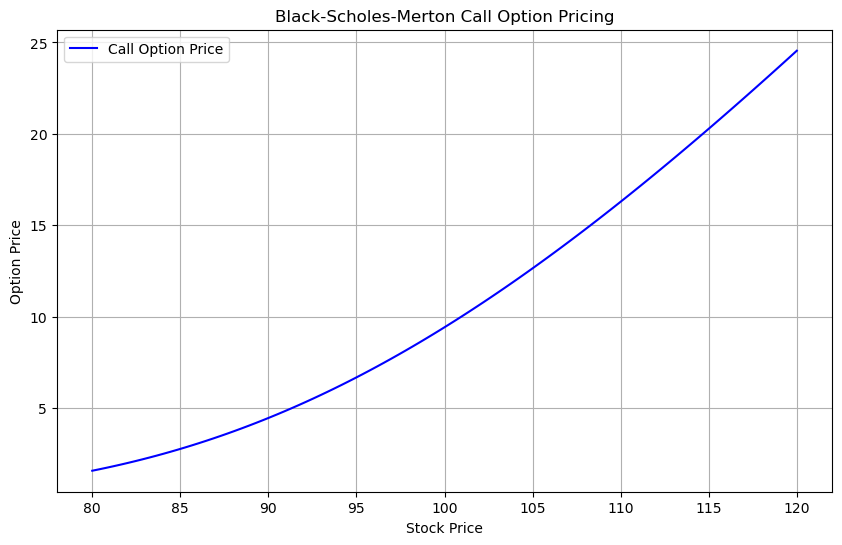

In [326]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate Black-Scholes-Merton call option pricing
def black_scholes_call(current_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(current_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    d2 = d1 - volatility * np.sqrt(time_to_maturity)

    call_price = current_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_maturity) * norm.cdf(d2)

    return call_price

# Function to visualize Black-Scholes-Merton call option pricing
def visualize_option_pricing():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate option prices
    call_prices = [black_scholes_call(price, strike_price, time_to_maturity, risk_free_rate, volatility) for price in stock_prices]

    # Plot option prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, call_prices, label='Call Option Price', color='blue')
    plt.title('Black-Scholes-Merton Call Option Pricing')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize Black-Scholes-Merton call option pricing
visualize_option_pricing()


# Option Sensitivity Measures: The Greeks

### Delta

**Delta Defined:**
- Delta is a key Greek letter used in options trading to quantify the sensitivity of the option price to changes in the price of the underlying asset. It represents the rate of change of the option price with respect to a one-unit change in the underlying asset's price.

**Delta for Call Options:**
- For call options, delta is a positive value ranging from 0 to 1.
- A call option with a delta of 0.50 means that for every $1 increase in the underlying asset's price, the call option's price is expected to increase by $0.50.
- Delta essentially measures the probability that the call option will be in-the-money at expiration. A delta of 0.50 suggests a 50% chance of the option being in-the-money.

**Delta for Put Options:**
- For put options, delta is a negative value ranging from 0 to -1.
- A put option with a delta of -0.50 means that for every $1 increase in the underlying asset's price, the put option's price is expected to decrease by $0.50.
- Delta for puts also represents the probability of the option being in-the-money at expiration, but in this case, it's the probability of the option being in-the-money due to a decrease in the underlying asset's price.

**Factors Affecting Delta:**
1. **Moneyness:** Delta is highest for at-the-money options and decreases as options move deeper in or out of the money.
2. **Time to Expiration:** Delta tends to increase for in-the-money options and decrease for out-of-the-money options as expiration approaches.
3. **Volatility:** Delta is influenced by changes in implied volatility. Higher volatility can impact delta, especially for at-the-money options.

**Delta Hedging:**
- Traders use delta to hedge their options positions by taking offsetting positions in the underlying asset. This helps neutralize the directional risk associated with the options.
- For example, if a trader holds a portfolio of call options, they may sell a certain amount of the underlying asset to offset the positive delta of the call options.

**Limitations of Delta:**
- Delta assumes a linear relationship between the option price and the underlying asset's price, which may not hold true in all market conditions.
- Delta does not account for changes in other factors such as implied volatility and interest rates.

Understanding delta is crucial for options traders as it provides insights into how option prices are likely to change in response to movements in the underlying asset's price. Delta is a dynamic measure that evolves with market conditions and plays a central role in risk management and strategy optimization.

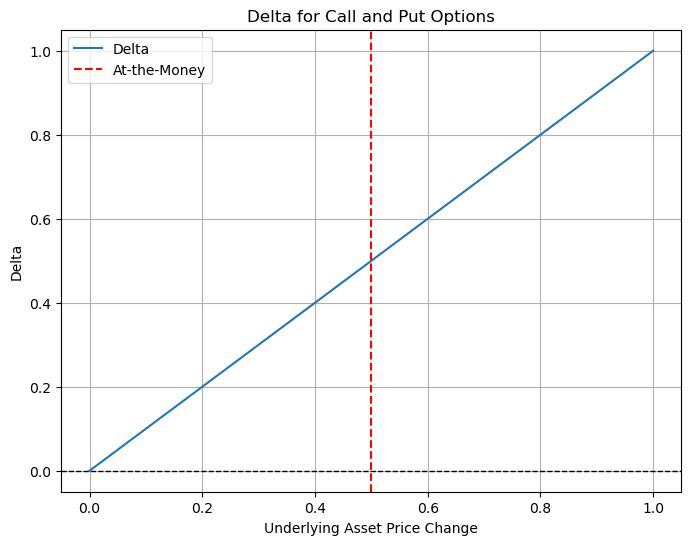

In [334]:
def calculate_delta(call=True, delta_range=np.arange(0, 1.01, 0.01)):
    if call:
        delta_values = delta_range
    else:
        delta_values = -delta_range

    return delta_values

def plot_delta(call=True):
    delta_range = np.arange(0, 1.01, 0.01) if call else np.arange(0, -1.01, -0.01)
    delta_values = calculate_delta(call, delta_range)

    plt.figure(figsize=(8, 6))
    plt.plot(delta_range, delta_values, label='Delta' if call else 'Delta (Put)')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0.5 if call else -0.5, color='red', linestyle='--', label='At-the-Money')
    plt.title('Delta for Call and Put Options')
    plt.xlabel('Underlying Asset Price Change')
    plt.ylabel('Delta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_delta(call=True)  # Set to False for Put options

### Gamma

**Gamma Defined:**
- Gamma is another Greek letter used in options trading to measure the rate of change in the delta of an option in response to a one-unit change in the price of the underlying asset. In simpler terms, it represents the second-order sensitivity of the option price to changes in the underlying asset's price.

**Gamma for Call and Put Options:**
- Gamma is expressed in terms of delta. For both call and put options, gamma is always positive.
- The gamma of an option reflects how much the delta of the option is expected to change for a one-point (or one-unit) change in the underlying asset's price.

**Gamma and Delta Relationship:**
- Gamma is particularly important because it helps traders understand the curvature or convexity of the option price. It quantifies how delta itself changes as the underlying asset's price changes.
- The relationship between gamma (\(\Gamma\)) and delta (\(\Delta\)) can be summarized as follows:
  - When an option is at-the-money, gamma is highest, and delta changes the most for a small change in the underlying price.
  - As the option moves deeper in or out of the money, gamma decreases.

**Gamma Hedging:**
- Gamma is a crucial consideration in gamma hedging strategies. Traders and market makers use gamma hedging to manage their delta exposure and adapt to changing market conditions.
- As the underlying asset's price changes, gamma hedging involves adjusting the delta hedge to maintain a neutral position, especially when dealing with large options portfolios.

**Gamma and Time to Expiration:**
- Gamma tends to be highest for at-the-money options and decreases as options move deeper in or out of the money.
- As time to expiration decreases, gamma tends to increase for options that are at-the-money.

**Gamma's Role in Option Trading:**
- Gamma becomes particularly relevant for traders who engage in dynamic hedging and options trading strategies that require adjustments based on changes in market conditions.
- Traders need to be aware of gamma risk, as large gamma values can lead to more significant changes in delta, impacting the effectiveness of delta hedging strategies.

Understanding gamma is essential for advanced options traders who want to manage and optimize their options portfolios. It provides insights into how the delta of an option evolves with changes in the underlying asset's price and is a key element in dynamic risk management strategies.

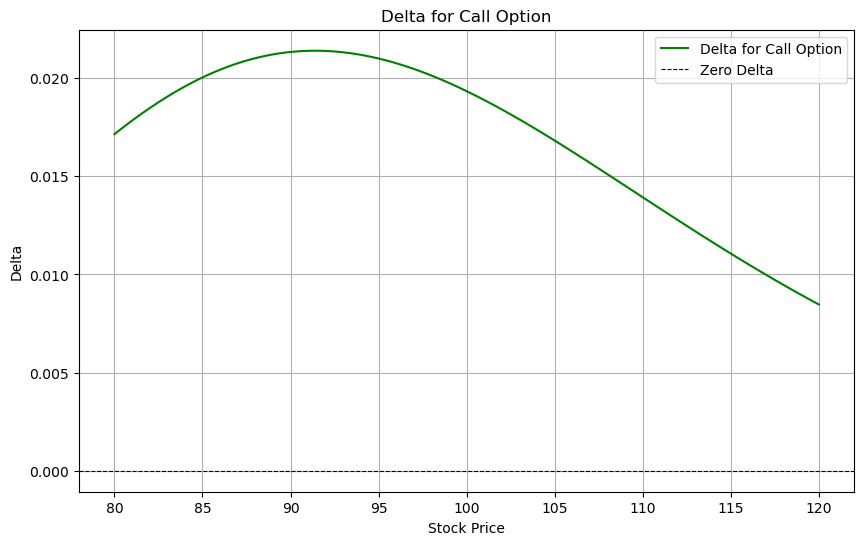

In [327]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate delta for a call option
def calculate_delta_call(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    delta_call = np.exp(-d1**2 / 2) / (stock_price * volatility * np.sqrt(2 * np.pi * time_to_maturity))

    return delta_call

# Function to visualize delta for a call option
def visualize_delta():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate delta for call option
    delta_call_values = [calculate_delta_call(price, strike_price, time_to_maturity, risk_free_rate, volatility) for price in stock_prices]

    # Plot delta values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, delta_call_values, label='Delta for Call Option', color='green')
    plt.title('Delta for Call Option')
    plt.xlabel('Stock Price')
    plt.ylabel('Delta')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Zero Delta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize delta for a call option
visualize_delta()


### Theta

**Theta Defined:**
- Theta, often referred to as the "time decay" or "time erosion" of an option, measures the rate at which the option's price changes with respect to the passage of time. It quantifies how much the option's value is expected to decrease as time progresses.

**Theta for Call and Put Options:**
- Theta is expressed as a negative value for both call and put options. This negative sign indicates that time decay works against the option holder, reducing the option's value as time passes.
- The absolute value of theta represents the daily decay in the option's value.

**Theta and Time to Expiration:**
- Theta tends to increase as the time to expiration decreases. Options that are closer to expiration experience more significant time decay than those with longer expiration periods.
- Theta is typically highest for at-the-money options and decreases as options move deeper in or out of the money.

**Theta Decay Curve:**
- The rate of time decay is not linear; instead, it follows a curve. As expiration approaches, the pace of time decay accelerates.
- The last few weeks or days before expiration often see the most significant impact of theta on option prices.

**Theta and Option Moneyness:**
- At-the-money options tend to have the highest theta, while in-the-money and out-of-the-money options have lower theta values.
- In-the-money options have less time decay because they already possess intrinsic value, and out-of-the-money options have less time decay due to their lower likelihood of becoming profitable.

**Theta and Option Premium:**
- Theta is a crucial factor in determining the extrinsic value or time value of an option. As an option approaches expiration, its extrinsic value diminishes, and theta becomes a more dominant factor in the option's pricing.

**Theta and Option Trading Strategies:**
- Option sellers often take advantage of theta decay by selling options with the expectation that time decay will work in their favor.
- Option buyers need to be aware of theta decay, as it influences the profitability of long option positions, especially if the underlying asset's price doesn't move significantly.

**Theta and Hedging:**
- Theta can impact delta hedging strategies. When dynamically hedging options positions, traders need to consider the impact of time decay on the overall position.

**Theta and Implied Volatility:**
- Higher implied volatility can partially offset the impact of time decay. Options with higher implied volatility tend to have higher extrinsic values, providing some cushion against theta decay.

Understanding theta is crucial for options traders, especially those who engage in strategies that involve time-sensitive positions. It guides traders in making informed decisions about when to enter or exit positions and helps manage the impact of time decay on their overall portfolio.

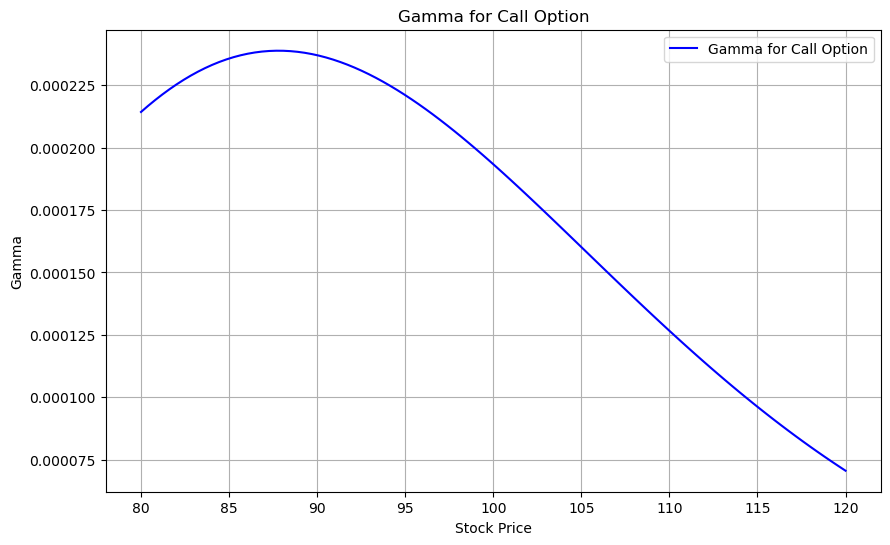

In [328]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate gamma for a call option
def calculate_gamma_call(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    gamma_call = np.exp(-d1**2 / 2) / (stock_price**2 * volatility * np.sqrt(2 * np.pi * time_to_maturity))

    return gamma_call

# Function to visualize gamma for a call option
def visualize_gamma():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility = 0.2
    risk_free_rate = 0.03

    # Calculate gamma for call option
    gamma_call_values = [calculate_gamma_call(price, strike_price, time_to_maturity, risk_free_rate, volatility) for price in stock_prices]

    # Plot gamma values
    plt.figure(figsize=(10, 6))
    plt.plot(stock_prices, gamma_call_values, label='Gamma for Call Option', color='blue')
    plt.title('Gamma for Call Option')
    plt.xlabel('Stock Price')
    plt.ylabel('Gamma')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize gamma for a call option
visualize_gamma()


### Vega

**Vega Defined:**
- Vega measures the sensitivity of an option's price to changes in implied volatility. It quantifies how much the option's price is expected to change for a one-percentage-point change in implied volatility.

**Vega for Call and Put Options:**
- Vega is expressed in terms of the option's price, and it is positive for both call and put options.
- A higher vega value indicates that the option's price is more sensitive to changes in implied volatility.

**Implied Volatility and Vega:**
- Implied volatility represents the market's expectation of future price volatility. Vega captures the impact of changes in these expectations on option prices.
- When implied volatility increases, option prices generally rise, and vega measures the magnitude of that increase.

**Vega and Moneyness:**
- Vega tends to be highest for at-the-money options and decreases as options move deeper in or out of the money.
- At-the-money options are more sensitive to changes in implied volatility because they have a higher extrinsic value.

**Vega and Time to Expiration:**
- Vega is typically higher for options with longer time to expiration. Longer-dated options have more time for potential changes in implied volatility to impact the option's value.

**Vega Hedging:**
- Traders and investors use vega to manage exposure to changes in implied volatility. Vega hedging involves adjusting the position in options to offset the impact of volatility changes.

**Vega and Option Premium:**
- Vega is a crucial component of an option's extrinsic value or time value. It represents the portion of the option premium that is sensitive to changes in implied volatility.

**Vega and Option Strategies:**
- Option buyers may consider vega when choosing strategies. Buying options with high vega can provide more significant potential gains if implied volatility increases.
- Option sellers need to be aware of vega, as changes in implied volatility can affect the profitability of short options positions.

**Vega and Market Conditions:**
- Traders often monitor vega in anticipation of events that may impact implied volatility, such as earnings announcements or economic releases.

**Vega and Risk Management:**
- Vega plays a role in risk management, helping traders assess the potential impact of changes in market conditions on their options portfolios.

Understanding vega is crucial for options traders, especially those who want to assess and manage the impact of volatility changes on their positions. Vega is a key factor in option pricing models and is an essential consideration when constructing and adjusting options strategies.

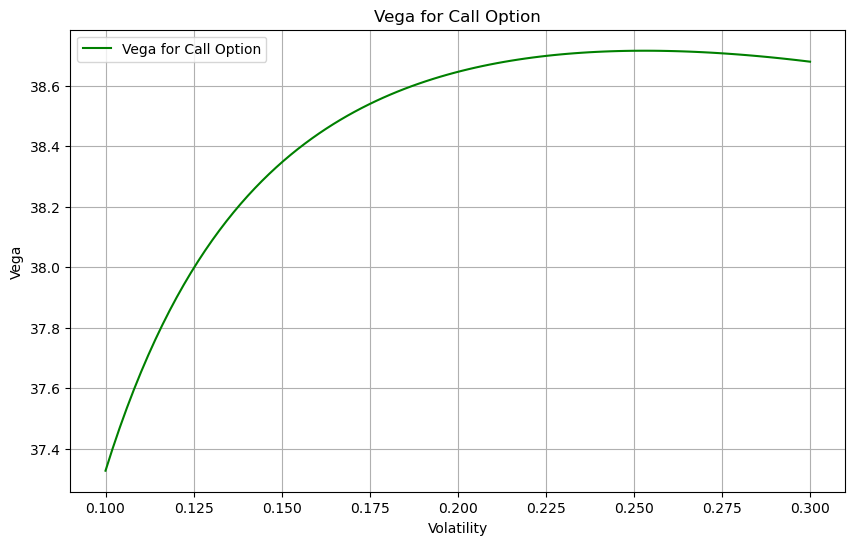

In [329]:
# Set up the Jupyter Notebook for interactive visualizations
%matplotlib inline

# Function to calculate vega for a call option
def calculate_vega_call(stock_price, strike_price, time_to_maturity, risk_free_rate, volatility):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility**2) * time_to_maturity) / (volatility * np.sqrt(time_to_maturity))
    vega_call = stock_price * np.exp(-d1**2 / 2) * np.sqrt(time_to_maturity) / np.sqrt(2 * np.pi)

    return vega_call

# Function to visualize vega for a call option
def visualize_vega():
    # Varying parameters
    stock_prices = np.linspace(80, 120, 100)
    strike_price = 100
    time_to_maturity = 1
    volatility_values = np.linspace(0.1, 0.3, 100)
    risk_free_rate = 0.03

    # Calculate vega for call option at different volatilities
    vega_call_values = [calculate_vega_call(stock_prices[50], strike_price, time_to_maturity, risk_free_rate, vol) for vol in volatility_values]

    # Plot vega values
    plt.figure(figsize=(10, 6))
    plt.plot(volatility_values, vega_call_values, label='Vega for Call Option', color='green')
    plt.title('Vega for Call Option')
    plt.xlabel('Volatility')
    plt.ylabel('Vega')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize vega for a call option
visualize_vega()

### Rho

**Rho Defined:**
- Rho measures the sensitivity of an option's price to changes in the risk-free interest rate. It quantifies how much the option's price is expected to change for a one-percentage-point change in the risk-free interest rate.

**Rho for Call and Put Options:**
- Rho is expressed in terms of the option's price and is positive for both call and put options.
- A higher rho value indicates that the option's price is more sensitive to changes in the risk-free interest rate.

**Interest Rate and Rho:**
- Rho captures the impact of changes in the risk-free interest rate on option prices. As interest rates increase, the present value of future cash flows associated with options changes, affecting their prices.

**Rho and Moneyness:**
- Rho tends to be higher for options that are deeper in the money. In-the-money options have a higher intrinsic value, and changes in interest rates can have a more pronounced effect on their prices.

**Rho and Time to Expiration:**
- Rho is typically higher for options with longer time to expiration. Longer-dated options have more time for potential changes in interest rates to impact the option's value.

**Rho Hedging:**
- Traders and investors use rho to manage exposure to changes in interest rates. Rho hedging involves adjusting the position in options to offset the impact of interest rate changes.

**Rho and Option Premium:**
- Rho is a component of an option's premium. It represents the portion of the option premium that is sensitive to changes in the risk-free interest rate.

**Rho and Option Pricing Models:**
- Rho is included in option pricing models, such as the Black-Scholes model and the Binomial model, to account for the impact of interest rates on option prices.

**Rho and Market Conditions:**
- Changes in interest rates are often associated with broader economic conditions. Traders may monitor rho in anticipation of interest rate changes or economic events that could impact rates.

**Rho and Risk Management:**
- Rho plays a role in risk management, helping traders assess the potential impact of changes in interest rates on their options portfolios.

While rho is a part of the Black-Scholes option pricing model, it's important to note that the impact of changes in interest rates is often considered relatively minor compared to other factors like changes in the underlying asset's price or volatility. As a result, rho is often of greater significance in certain market conditions or for specific options strategies that are particularly sensitive to interest rate changes.

Black-Scholes-Merton European Call Option Price: $8.02
Rho (ρ): 46.2015


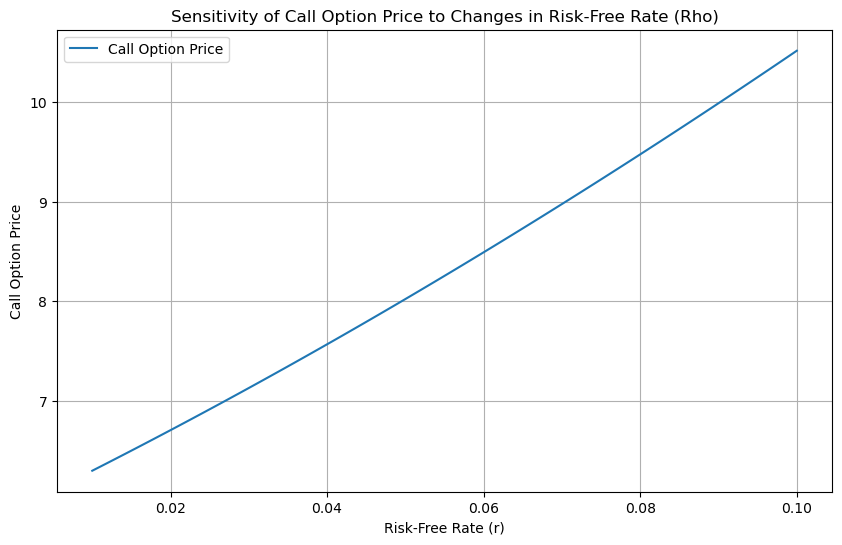

In [330]:
# Function to calculate Black-Scholes-Merton European Call option price
def black_scholes_merton_call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Black-Scholes-Merton Rho (ρ)
def black_scholes_merton_rho(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    rho = T * K * np.exp(-r * T) * norm.cdf(d2)
    return rho

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate Black-Scholes-Merton Call option price and Rho
call_option_price = black_scholes_merton_call_option_price(S, K, T, r, sigma)
rho = black_scholes_merton_rho(S, K, T, r, sigma)

# Display the option price and Rho
print(f'Black-Scholes-Merton European Call Option Price: ${call_option_price:.2f}')
print(f'Rho (ρ): {rho:.4f}')

# Visualize the sensitivity of the Call option price to changes in the risk-free rate
r_values = np.linspace(0.01, 0.10, 100)
call_prices_r = [black_scholes_merton_call_option_price(S, K, T, r_val, sigma) for r_val in r_values]

# Plot the sensitivity
plt.figure(figsize=(10, 6))
plt.plot(r_values, call_prices_r, label='Call Option Price')
plt.title('Sensitivity of Call Option Price to Changes in Risk-Free Rate (Rho)')
plt.xlabel('Risk-Free Rate (r)')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

### Real Life Application

1. **Delta:**
   - **Real-life Application:** A portfolio manager holds a mix of stocks and call options on those stocks. To maintain a balanced exposure, the manager regularly adjusts the delta of the options positions through delta hedging. This involves buying or selling shares of the underlying stock to offset changes in the options' delta.

2. **Gamma:**
   - **Real-life Application:** A market maker maintains a large portfolio of options. As the market maker dynamically adjusts positions to hedge against changes in the underlying asset's price, gamma becomes a crucial factor. The market maker continually rebalances the portfolio to account for the convexity introduced by gamma.

3. **Theta:**
   - **Real-life Application:** An investor sells covered call options on a stock they own. Monitoring theta is crucial for this strategy because the investor aims to generate income from time decay. As time passes, the investor benefits from the gradual erosion of the options' extrinsic value.

4. **Vega:**
   - **Real-life Application:** A volatility trader anticipates an increase in market uncertainty. To capitalize on potential rises in implied volatility, the trader may buy options with high vega. As implied volatility increases, the options' prices rise, and the trader can profit from selling them at a higher value.

5. **Rho:**
   - **Real-life Application:** A fixed-income fund manager incorporates options on bond futures in their portfolio. Rho becomes relevant as changes in interest rates impact the options' prices. The manager adjusts the portfolio to account for the sensitivity of the options to interest rate changes.

**Integrated Application:**
   - **Real-life Scenario:** A hedge fund manager employs a delta-gamma neutral strategy using options on a basket of tech stocks. The manager monitors delta and gamma to ensure the portfolio is well-hedged against movements in the underlying stocks. Simultaneously, the manager considers vega to capitalize on potential volatility changes.

**Risk Management:**
   - **Real-life Scenario:** A risk manager oversees a pension fund's options portfolio. In anticipation of an economic event that could impact interest rates, the risk manager evaluates the portfolio's rho exposure. Adjustments are made to mitigate the potential impact of interest rate changes on the options positions.

Understanding and effectively applying the Greeks in real-life scenarios empower traders and investors to make informed decisions, manage risks, and optimize their options portfolios in dynamic market conditions. Each Greek provides a unique perspective on the factors influencing option prices, contributing to a comprehensive approach to options trading and risk management.

Black-Scholes-Merton European Call Option Price: $8.02
Delta: 0.5422
Gamma: 0.0198
Theta: -6.2771
Vega: 39.6705
Rho: 46.2015


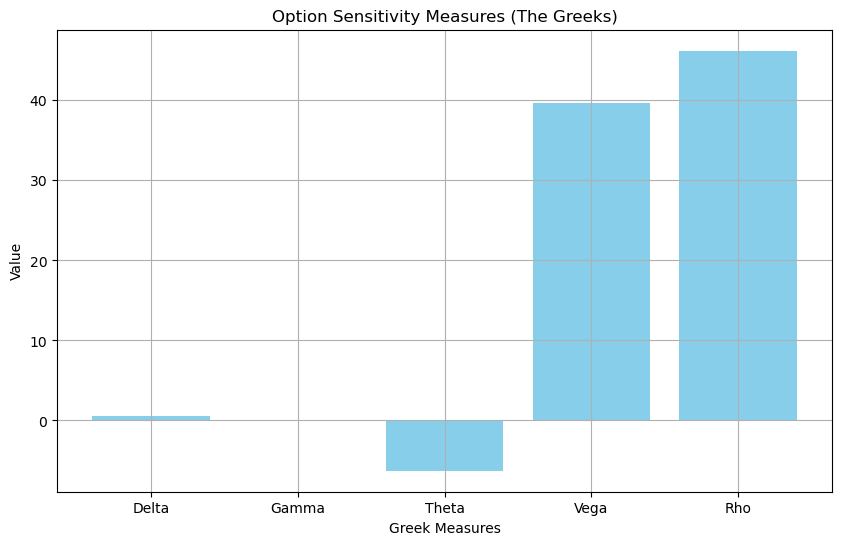

In [331]:
# Function to calculate Black-Scholes-Merton European Call option price
def black_scholes_merton_call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Function to calculate Black-Scholes-Merton option sensitivity measures
def calculate_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Delta
    delta = norm.cdf(d1)

    # Gamma
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))

    # Theta
    theta = -((S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * norm.cdf(d2)

    # Vega
    vega = S * np.sqrt(T) * norm.pdf(d1)

    # Rho
    rho = T * K * np.exp(-r * T) * norm.cdf(d2)

    return delta, gamma, theta, vega, rho

# Define option parameters
S = 100  # Initial stock price
K = 105  # Strike price
T = 1  # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Calculate Black-Scholes-Merton Call option price and sensitivity measures
call_option_price = black_scholes_merton_call_option_price(S, K, T, r, sigma)
delta, gamma, theta, vega, rho = calculate_greeks(S, K, T, r, sigma)

# Display the option price and sensitivity measures
print(f'Black-Scholes-Merton European Call Option Price: ${call_option_price:.2f}')
print(f'Delta: {delta:.4f}')
print(f'Gamma: {gamma:.4f}')
print(f'Theta: {theta:.4f}')
print(f'Vega: {vega:.4f}')
print(f'Rho: {rho:.4f}')

# Visualize the sensitivity measures
greek_names = ['Delta', 'Gamma', 'Theta', 'Vega', 'Rho']
greek_values = [delta, gamma, theta, vega, rho]

plt.figure(figsize=(10, 6))
plt.bar(greek_names, greek_values, color='skyblue')
plt.title('Option Sensitivity Measures (The Greeks)')
plt.xlabel('Greek Measures')
plt.ylabel('Value')
plt.grid()
plt.show()